**ISIC 2018 Challenge - Task 1: Lesion Boundary Segmentation**

**Lesion Boundary Segmentation**

**Domain: Computer Vision**

**Dr. Venkatesh Babu (venky@iisc.ac.in)**

**Short Description:**

Obtain **Lesion Segmentation Boundaries** within Dermoscopic Images Using **Convolutional Neural Networks**
**(CNNs)**.

1. **Input: (512x512x1)**

2. **Output: Segmentation output of size (512x512x1)**

**Models:**

1. **Segmentation networks**

● **UNet** [GitHub - zhixuhao/unet: unet for image segmentation]

● **UNet++** [GitHub - MrGiovanni/UNetPlusPlus: Official Keras Implementation for UNet++ in IEEE Transactions on Medical Imaging and DLMIA 2018]

● **R2U-Net** [ https://arxiv.org/abs/1802.06955 ]

● **Attention U-Net** [ https://arxiv.org/abs/1804.03999 ]

● **SegNet**  

● **Ensemble of Best Models** 

● **Data Resource:** ISIC 2018 [ https://challenge2018.isic-archive.com/task1/training/ ]. 

● This dataset consists of 2594 training and 100 validation images with ground truth response masks.

**GitHub Page: https://github.com/TheInfamousWayne/UNet**

Goal
Submit automated predictions of lesion segmentation boundaries within dermoscopic images.

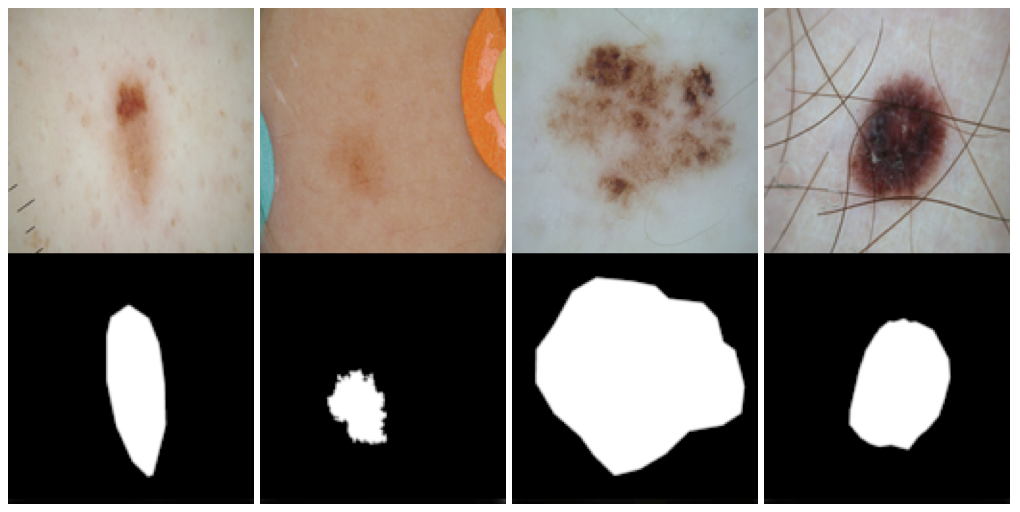

Data
Input Data
The input data are dermoscopic lesion images in JPEG format.

All lesion images are named using the scheme ISIC_<image_id>.jpg, where <image_id> is a 7-digit unique identifier. EXIF tags in the images have been removed; any remaining EXIF tags should not be relied upon to provide accurate metadata.

The lesion images were acquired with a variety of dermatoscope types, from all anatomic sites (excluding mucosa and nails), from a historical sample of patients presented for skin cancer screening, from several different institutions. Every lesion image contains exactly one primary lesion; other fiducial markers, smaller secondary lesions, or other pigmented regions may be neglected.

The distribution of disease states represent a modified "real world" setting whereby there are more benign lesions than malignant lesions, but an over-representation of malignancies.

Response Data
The response data are binary mask images in PNG format, indicating the location of the primary skin lesion within each input lesion image.

Mask images are named using the scheme ISIC_<image_id>_segmentation.png, where <image_id> matches the corresponding lesion image for the mask.

Mask images must have the exact same dimensions as their corresponding lesion image. Mask images are encoded as single-channel (grayscale) 8-bit PNGs (to provide lossless compression), where each pixel is either:

0: representing the background of the image, or areas outside the primary lesion
255: representing the foreground of the image, or areas inside the primary lesion
As the primary skin lesion is a single contiguous region, mask images should also contain only a single contiguous foreground region, without any disconnected components or holes. The foreground region may be of any size (including the entire image) and may abut the borders of the image.

Ground Truth Provenance
Mask image ground truth (provided for training and used internally for scoring validation and test phases) data were generated using several techniques, but all data were reviewed and curated by practicing dermatologists with expertise in dermoscopy.

Ground truth segmentations were generated by either:

fully-automated algorithm, reviewed and accepted by a human expert
a semi-automated flood-fill algorithm, with parameters chosen by a human expert
manual polygon tracing by a human expert
Evaluation
Goal Metric
Predicted responses are scored using a threshold Jaccard index metric.

To compute this metric:

For each image, a pixel-wise comparison of each predicted segmentation with the corresponding ground truth segmentation is made using the Jaccard index.
The final score for each image is computed as a threshold of the Jaccard according to the following:
score = 0, if the Jaccard index is less than 0.65
score = the Jaccard index value, otherwise
The mean of all per-image scores is taken as the final metric value for the entire dataset
Rationale
The choice of threshold Jaccard index metric is based on a previously published analysis which demonstrated using the Jaccard directly as a measure of performance does not accurately reflect the number of images in which automated segmentation fails, or falls outside expert interobserver variability (i.e. the raw Jaccard is overly optimistic). The number of images in which automated segmentation fails is a direct measure of the amount of labor required to correct an algorithm.

In order to determine the threshold, the lowest Jaccard agreement between 3 independent expert annotators was measured on a subset of 100 images. This empirically measured value (~0.74) is the basis for the 0.65 value threshold (with additional error tolerance), which indicates segmentation failure on an image.

Other Metrics
Participants will be ranked and awards granted based only on the Threshold Jaccard index metric. However, for scientific completeness, predicted responses will also have the following metrics computed on a pixel-wise basis (comparing prediction vs. ground truth) for each image:

sensitivity
specificity
accuracy
raw Jaccard index
Dice coefficient
Submission Instructions
To participate in this task:

Train
Download the training input data and training ground truth response data.
Develop an algorithm for generating lesion segmentations in general.
Validate (optional)
Download the validation input data.
Run your algorithm on the validation Input data to produce validation predicted responses.
Submit these validation predicted responses to receive an immediate score. This will provide feedback that your predicted responses have the correct data format and have reasonable performance. You may make unlimited submissions.
Test
Download the test input data.
Run your algorithm on the test input data to produce test predicted responses.
Submit these test predicted responses. You may submit a maximum of 3 separate approaches/algorithms to be evaluat
ed independently. You may make unlimited submissions, but only the most recent submission for each approach will be used for official judging. Use the "brief description of your algorithm’s approach" field on the submission form to distinguish different approaches. Previously submitted approaches are available in the dropdown menu.
Submit a manuscript describing your algorithm’s approach.

**Connecting to Google Drive**

In [1]:
# Mount Data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Check GPU Allocation**

In [2]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not Connected to a GPU')
else:
  print(gpu_info)

Mon Jan 30 09:23:28 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P0    26W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**Check RAM Allocation**

In [3]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 54.8 gigabytes of available RAM

You are using a high-RAM runtime!


**Unzip Traing Groundtruth Data**

In [4]:
!unzip /content/drive/MyDrive/Capstone/ISIC2018_Task1_Training_GroundTruth.zip

Archive:  /content/drive/MyDrive/Capstone/ISIC2018_Task1_Training_GroundTruth.zip
   creating: ISIC2018_Task1_Training_GroundTruth/
  inflating: ISIC2018_Task1_Training_GroundTruth/ATTRIBUTION.txt  
  inflating: ISIC2018_Task1_Training_GroundTruth/ISIC_0000000_segmentation.png  
  inflating: ISIC2018_Task1_Training_GroundTruth/ISIC_0000001_segmentation.png  
  inflating: ISIC2018_Task1_Training_GroundTruth/ISIC_0000003_segmentation.png  
  inflating: ISIC2018_Task1_Training_GroundTruth/ISIC_0000004_segmentation.png  
  inflating: ISIC2018_Task1_Training_GroundTruth/ISIC_0000006_segmentation.png  
  inflating: ISIC2018_Task1_Training_GroundTruth/ISIC_0000007_segmentation.png  
  inflating: ISIC2018_Task1_Training_GroundTruth/ISIC_0000008_segmentation.png  
  inflating: ISIC2018_Task1_Training_GroundTruth/ISIC_0000009_segmentation.png  
  inflating: ISIC2018_Task1_Training_GroundTruth/ISIC_0000011_segmentation.png  
  inflating: ISIC2018_Task1_Training_GroundTruth/ISIC_0000012_segmentati

In [5]:
!unzip /content/drive/MyDrive/Capstone/ISIC2018_Task1-2_Training_Input.zip

Archive:  /content/drive/MyDrive/Capstone/ISIC2018_Task1-2_Training_Input.zip
   creating: ISIC2018_Task1-2_Training_Input/
  inflating: ISIC2018_Task1-2_Training_Input/ATTRIBUTION.txt  
  inflating: ISIC2018_Task1-2_Training_Input/ISIC_0000000.jpg  
  inflating: ISIC2018_Task1-2_Training_Input/ISIC_0000001.jpg  
  inflating: ISIC2018_Task1-2_Training_Input/ISIC_0000003.jpg  
  inflating: ISIC2018_Task1-2_Training_Input/ISIC_0000004.jpg  
  inflating: ISIC2018_Task1-2_Training_Input/ISIC_0000006.jpg  
  inflating: ISIC2018_Task1-2_Training_Input/ISIC_0000007.jpg  
  inflating: ISIC2018_Task1-2_Training_Input/ISIC_0000008.jpg  
  inflating: ISIC2018_Task1-2_Training_Input/ISIC_0000009.jpg  
  inflating: ISIC2018_Task1-2_Training_Input/ISIC_0000011.jpg  
  inflating: ISIC2018_Task1-2_Training_Input/ISIC_0000012.jpg  
  inflating: ISIC2018_Task1-2_Training_Input/ISIC_0000013.jpg  
  inflating: ISIC2018_Task1-2_Training_Input/ISIC_0000014.jpg  
  inflating: ISIC2018_Task1-2_Training_Input/

**Import Packages**

In [6]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import numpy as np
import cv2
from glob import glob
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, ReduceLROnPlateau, EarlyStopping, TensorBoard
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Recall, Precision
from sklearn.metrics import accuracy_score, f1_score, jaccard_score, precision_score, recall_score
np.random.seed(42)
tf.random.set_seed(42)

**Loss Function**

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import backend as K

def iou(y_true, y_pred):
    def f(y_true, y_pred):
        intersection = (y_true * y_pred).sum()
        union = y_true.sum() + y_pred.sum() - intersection
        x = (intersection + 1e-15) / (union + 1e-15)
        x = x.astype(np.float32)
        return x
    return tf.numpy_function(f, [y_true, y_pred], tf.float32)

smooth = 1e-15
def dice_coef(y_true, y_pred):
    y_true = tf.keras.layers.Flatten()(y_true)
    y_pred = tf.keras.layers.Flatten()(y_pred)
    intersection = tf.reduce_sum(y_true * y_pred)
    return (2. * intersection + smooth) / (tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) + smooth)

def dice_loss(y_true, y_pred):
    return 1.0 - dice_coef(y_true, y_pred)

**Basic Helpers Functions**

In [8]:
# H = 512
# W = 512

H = 128
W = 128

def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

def shuffling(x, y):
    x, y = shuffle(x, y, random_state=42)
    return x, y

def load_data(path, split=0.15):
    images = sorted(glob(os.path.join(path, "ISIC2018_Task1-2_Training_Input", "*.jpg")))
    masks = sorted(glob(os.path.join(path, "ISIC2018_Task1_Training_GroundTruth", "*.png")))
    #images = images[:64]
    #masks = masks[:64]
    split_size = int(len(images) * split)

    train_x, valid_x = train_test_split(images, test_size=split_size, random_state=42)
    train_y, valid_y = train_test_split(masks, test_size=split_size, random_state=42)

    train_x, test_x = train_test_split(train_x, test_size=split_size, random_state=42)
    train_y, test_y = train_test_split(train_y, test_size=split_size, random_state=42)

    return (train_x, train_y), (valid_x, valid_y), (test_x, test_y)

def read_image(path):

    x = cv2.imread(path, cv2.IMREAD_COLOR)
    x = cv2.resize(x, (W, H), interpolation=cv2.INTER_LINEAR) # bilinear interpolation
    x = x/255.0
    x = x.astype(np.float32)
    return x
def read_imaged(path):
    path = path.decode()
    x = cv2.imread(path, cv2.IMREAD_COLOR)
    x = cv2.resize(x, (W, H), interpolation=cv2.INTER_LINEAR)# bilinear interpolation
    x = x/255.0
    x = x.astype(np.float32)
    return x

def read_mask(path):
    x = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    x = cv2.resize(x, (W, H), interpolation=cv2.INTER_LINEAR)# bilinear interpolation
    x = x/255.0
    x = x.astype(np.float32)
    x = np.expand_dims(x, axis=-1)
    return x

def read_maskd(path):
    path = path.decode()
    x = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    x = cv2.resize(x, (W, H), interpolation=cv2.INTER_LINEAR)# bilinear interpolation
    x = x/255.0
    x = x.astype(np.float32)
    x = np.expand_dims(x, axis=-1)
    return x


def tf_parse(x, y):
    def _parse(x, y):
        x = read_imaged(x)
        y = read_maskd(y)
        return x, y

    x, y = tf.numpy_function(_parse, [x, y], [tf.float32, tf.float32])
    x.set_shape([H, W, 3])
    y.set_shape([H, W, 1])
    return x, y

def tf_dataset(X, Y, batch_size=4):
    dataset = tf.data.Dataset.from_tensor_slices((X, Y))
    dataset = dataset.map(tf_parse)
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(10)
    return dataset

**EDA On Images Data Set**

**Load Images**

In [9]:
# load images
images = glob("/content/ISIC2018_Task1-2_Training_Input/*.jpg")
masks = glob("/content/ISIC2018_Task1_Training_GroundTruth/*.png")
len(masks)

2594

In [10]:
masks.sort()

In [11]:
images.sort()

In [12]:
print(masks[0])
print(masks[1])
print(masks[2])
print(masks[3])
print(images[0])
print(images[1])
print(images[2])
print(images[3])

/content/ISIC2018_Task1_Training_GroundTruth/ISIC_0000000_segmentation.png
/content/ISIC2018_Task1_Training_GroundTruth/ISIC_0000001_segmentation.png
/content/ISIC2018_Task1_Training_GroundTruth/ISIC_0000003_segmentation.png
/content/ISIC2018_Task1_Training_GroundTruth/ISIC_0000004_segmentation.png
/content/ISIC2018_Task1-2_Training_Input/ISIC_0000000.jpg
/content/ISIC2018_Task1-2_Training_Input/ISIC_0000001.jpg
/content/ISIC2018_Task1-2_Training_Input/ISIC_0000003.jpg
/content/ISIC2018_Task1-2_Training_Input/ISIC_0000004.jpg


**Sample Images**


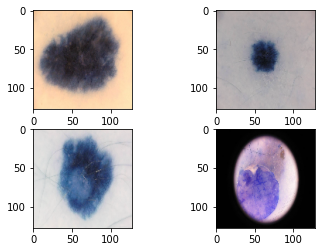

In [13]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(read_image(images[0]))
axarr[0,1].imshow(read_image(images[1]))
axarr[1,0].imshow(read_image(images[2]))
axarr[1,1].imshow(read_image(images[3]))

<Figure size 1440x648 with 0 Axes>

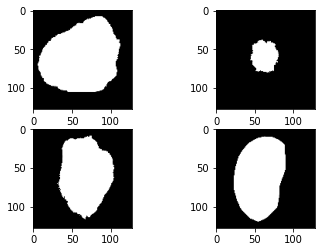

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,9))
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(read_mask(masks[0]).reshape((H, W)), cmap='gray')
axarr[0,1].imshow(read_mask(masks[1]).reshape((H, W)), cmap='gray')
axarr[1,0].imshow(read_mask(masks[2]).reshape((H, W)), cmap='gray')
axarr[1,1].imshow(read_mask(masks[3]).reshape((H, W)), cmap='gray')

**File Sizes**

100%|██████████| 10/10 [00:00<00:00, 103.38it/s]


(array([[1., 0., 0., 0., 0., 1., 2., 2., 3., 1.],
        [1., 0., 0., 0., 0., 1., 4., 2., 2., 0.],
        [0., 1., 0., 0., 1., 2., 1., 2., 1., 2.]]),
 array([ 68.36056815,  80.58162677,  92.80268538, 105.02374399,
        117.24480261, 129.46586122, 141.68691984, 153.90797845,
        166.12903706, 178.35009568, 190.57115429]),
 <a list of 3 Lists of Patches objects>)

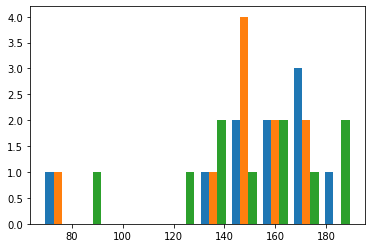

In [15]:
results = [] 
from tqdm import tqdm
for filename in tqdm(images[:10]):
    img = cv2.imread(filename)
    avg_color_per_row = np.average(img, axis=0)
    avg_color = np.average(avg_color_per_row, axis=0)
    results.append(avg_color)
np_results = np.array(results) # to make results a numpy array
plt.hist(np_results)

**Area Of Lesion**

100%|██████████| 10/10 [00:00<00:00, 213.83it/s]


(array([4., 0., 0., 1., 1., 0., 2., 1., 0., 1.]),
 array([0.14859009, 0.27387543, 0.39916077, 0.52444611, 0.64973145,
        0.77501678, 0.90030212, 1.02558746, 1.1508728 , 1.27615814,
        1.40144348]),
 <a list of 10 Patch objects>)

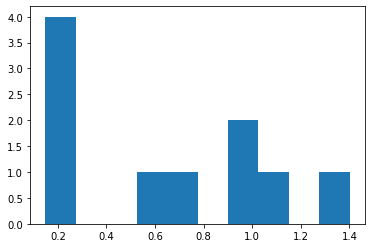

In [16]:
areas = []
for filename in tqdm(masks[:10]):
  mask = cv2.imread(filename)
  mask = cv2.resize(mask,(256, 256))
  area = len(mask[mask==255])/(256*256)
  areas.append(area)
np_results = np.array(areas) # to make results a numpy array
plt.hist(np_results)

A lesion is an area of tissue that has been damaged through injury or disease. In the above graphs we can see the distribution of the size of the lesion across images. The Y axis denotes the count of the images. The X axis denotes the area of the Lesion.

We can see that a significant amount of the lesions are below 0.5 area. This information will be useful to us in choosing an appropriate Loss function.

**Color Maps**

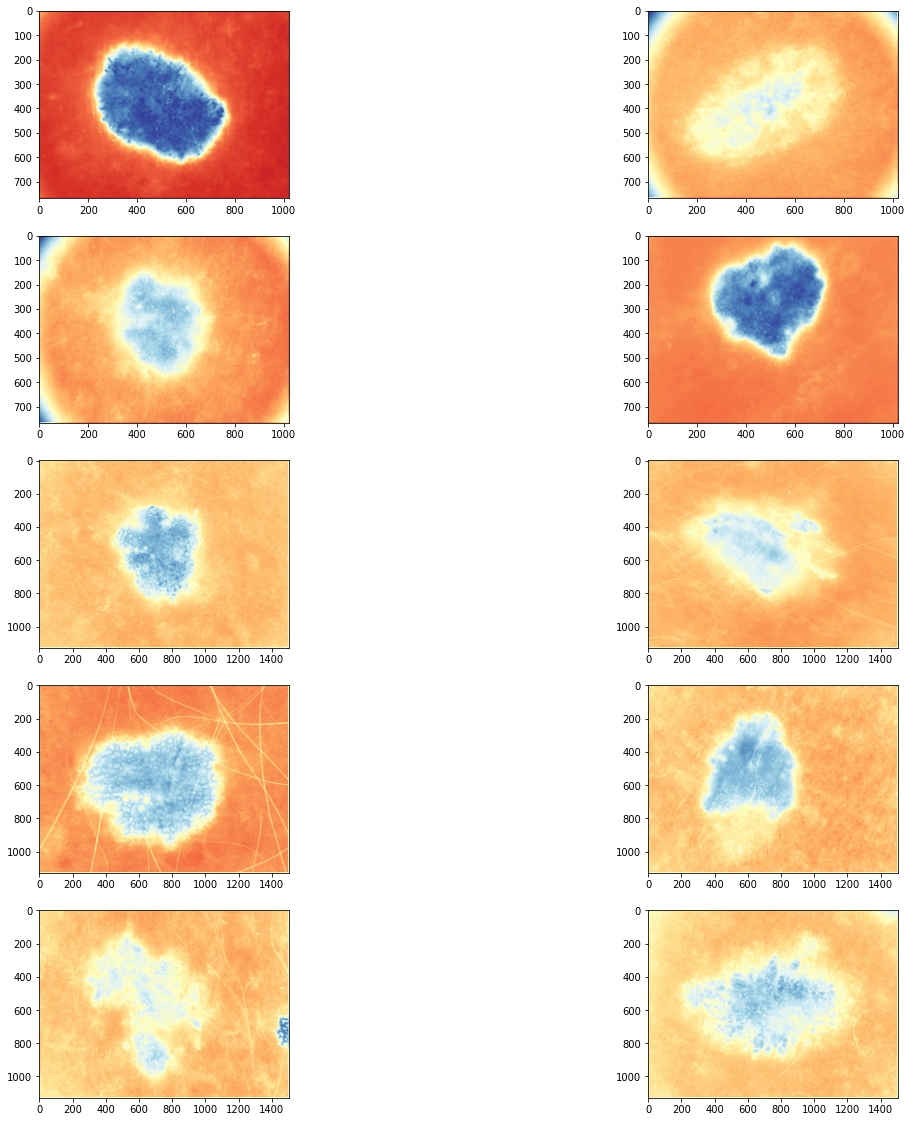

In [17]:
import matplotlib.pyplot as plt
from PIL import Image
f, axarr = plt.subplots(5,2)
f.set_figheight(20)
f.set_figwidth(20)
# plt.figure(figsize=(20,20))

axarr[0,0].imshow(Image.open((images[10])).convert('L'), cmap='RdYlBu_r')
axarr[0,1].imshow(Image.open((images[11])).convert('L'), cmap='RdYlBu_r')
axarr[1,0].imshow(Image.open((images[12])).convert('L'), cmap='RdYlBu_r')
axarr[1,1].imshow(Image.open((images[13])).convert('L'), cmap='RdYlBu_r')
axarr[2,0].imshow(Image.open((images[14])).convert('L'), cmap='RdYlBu_r')
axarr[2,1].imshow(Image.open((images[15])).convert('L'), cmap='RdYlBu_r')
axarr[3,0].imshow(Image.open((images[16])).convert('L'), cmap='RdYlBu_r')
axarr[3,1].imshow(Image.open((images[17])).convert('L'), cmap='RdYlBu_r')
axarr[4,0].imshow(Image.open((images[18])).convert('L'), cmap='RdYlBu_r')
axarr[4,1].imshow(Image.open((images[19])).convert('L'), cmap='RdYlBu_r')

**RDY**

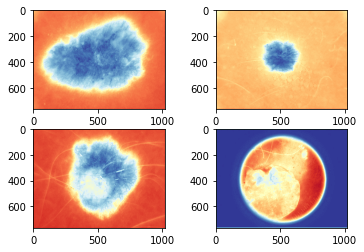

In [18]:
import matplotlib.pyplot as plt
from PIL import Image
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(Image.open((images[0])).convert('L'), cmap='RdYlBu_r')
axarr[0,1].imshow(Image.open((images[1])).convert('L'), cmap='RdYlBu_r')
axarr[1,0].imshow(Image.open((images[2])).convert('L'), cmap='RdYlBu_r')
axarr[1,1].imshow(Image.open((images[3])).convert('L'), cmap='RdYlBu_r')

**Inferno, Plasma, hot, gist_heat**

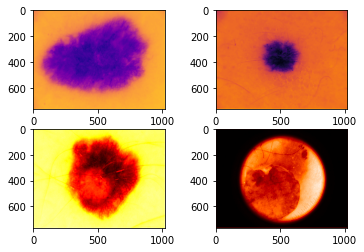

In [19]:
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(Image.open((images[0])).convert('L'), cmap='plasma')
axarr[0,1].imshow(Image.open((images[1])).convert('L'), cmap='inferno')
axarr[1,0].imshow(Image.open((images[2])).convert('L'), cmap='hot')
axarr[1,1].imshow(Image.open((images[3])).convert('L'), cmap='gist_heat')

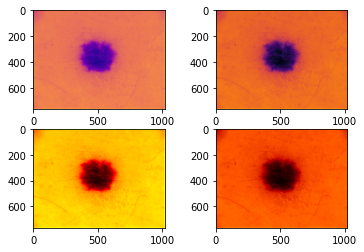

In [20]:
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(Image.open((images[1])).convert('L'), cmap='plasma')
axarr[0,1].imshow(Image.open((images[1])).convert('L'), cmap='inferno')
axarr[1,0].imshow(Image.open((images[1])).convert('L'), cmap='hot')
axarr[1,1].imshow(Image.open((images[1])).convert('L'), cmap='gist_heat')

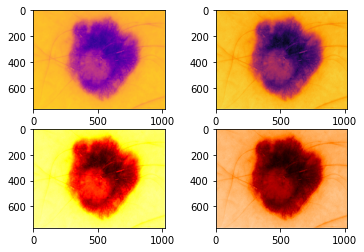

In [21]:
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(Image.open((images[2])).convert('L'), cmap='plasma')
axarr[0,1].imshow(Image.open((images[2])).convert('L'), cmap='inferno')
axarr[1,0].imshow(Image.open((images[2])).convert('L'), cmap='hot')
axarr[1,1].imshow(Image.open((images[2])).convert('L'), cmap='gist_heat')

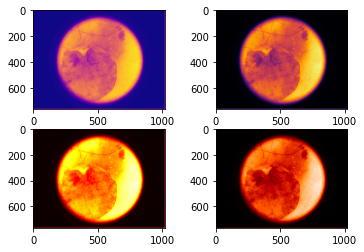

In [22]:
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(Image.open((images[3])).convert('L'), cmap='plasma')
axarr[0,1].imshow(Image.open((images[3])).convert('L'), cmap='inferno')
axarr[1,0].imshow(Image.open((images[3])).convert('L'), cmap='hot')
axarr[1,1].imshow(Image.open((images[3])).convert('L'), cmap='gist_heat')

In the above graphs we have attempted to visualize the lesions using different contour maps. We can observe that some contour maps make the lesions more visible than the others.

In [23]:
def grid_validation(rows,cols,x,x_truth):
    f, axarr = plt.subplots(rows,cols)
    print(rows,cols)
    f.set_figheight(20)
    f.set_figwidth(20)
    for i in range(rows):
        for j in range(cols):
            if j%2:
                axarr[i,j].imshow(cv2.imread(x_truth[i]))
            else:
                axarr[i,j].imshow(cv2.imread(x[i]))

8 2


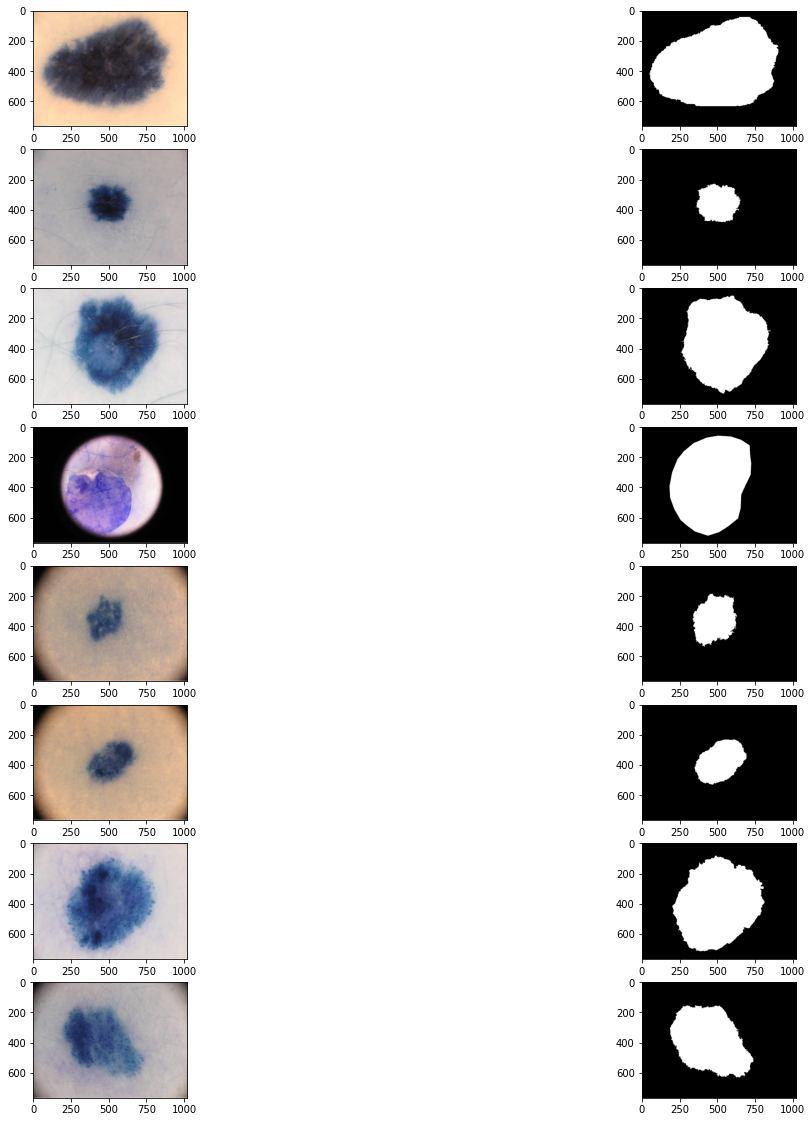

In [24]:
# Grid of images of train and train mask
grid_validation(8,2,images,masks)

**U-Net**

**The Model**

Defining the model in a function which takes two arguments when called
* **epoch_num**: number of epochs to run  
* **savename**: the name of the model for saving after training

#### Optimizer and Learning Rate  
* We adopt adam optimization algorithm or adaptive moments, to adjust the learning rate.   
* It is well known that learning rate is one of the critical hyperparameters that have a signiﬁcant impact on classiﬁcation performance.     
* Advantages of Adam optimizer are:
    - Relatively low memory requirements (though higher than gradient descent and gradient descent with momentum).
    - Usually works well even with a little tuning of hyperparameter
* Adam is fairly robust to the choice of hyperparameters, and set the learning rate **α** as 0.003 to speed up the training procedure in this study as advised in the paper [here](https://arxiv.org/pdf/1703.05165v2.pdf)

**Model Function**

> ![arch](https://raw.githubusercontent.com/hashbanger/Skin_Lesion_Segmentation/master/graphics/unet_arch.png)

**U-Net Architecture Explained**


---


<br>

Semantic segmentation is basically per pixel classification where each pixel of the input image will be assigned with specific label. 
<br><br>

The original research paper is focusing on application of semantic segmentation for biomedical images and it was published back in May 2015.
Back then it was state-of-the-art architecture and was winning competitions by a really huge margin.
<br><br>
As we know, there are very few biomedical images that can be used for training purposes as it's really hard to get high quality labeled images.
This is one of the main motivational aspects for the authors to come up with U-Net architecture. While researching, they just made use of 30 images with extensive data augmentation.
<br><br>

Before U-Net, the state-of-the-art approach was to use sliding window convolutional network to prepare patches or the local regions around pixel that they wanted to classify. It is not the best approach as it is going over the same pixel over and over again.
<br><br>
To overcome this overhead and considering the lack of training images that they had, the authors came up with this elegant and fully convolutional network.
<br><br>
The main idea here was to basically use down sampling path for feature extraction followed by up sampling path for precise localization
of these features 
<br><br>

This architecture uses the overlap tile strategy like much of convolutional neural nets and interestingly, it supports images with higher dimensions much better than any other conv architectures. This is because, the authors did not use any kind of padding, rather, they used something called as valid padding in which the border portion is mirrored instead of null padding.
This also means that the segmentation map contains the pixels for which the full context is available in the input image.

<br><br>

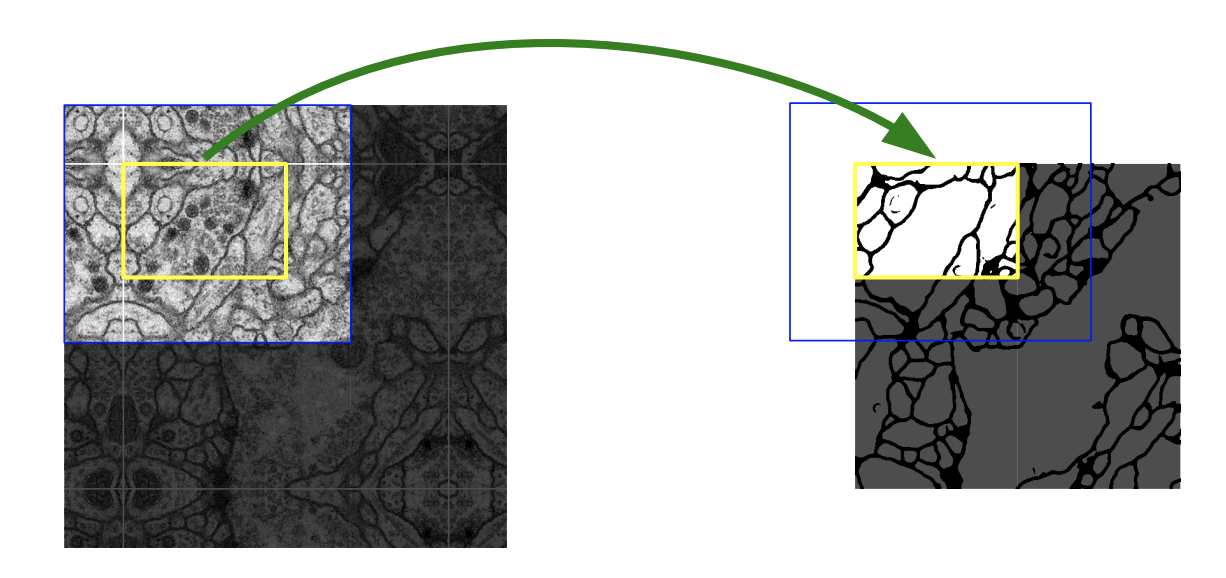

<br><br>
Here in the above image, the blue portion of the image is the input and the yellow portion is basically what is being output as the segmentation map at the end of the network. Also, you can note the mirroring at the border.
<br><br>
Another very important challenge the authors were facing while working on this model was identifying the clear separation between two adjacent segments which were sharing the borders. It was hard because the border was collapsing and the segments were getting merged into one segment. To overcome this, they had to penalize the network for doing so. In the paper they proposed to use weighted loss where the separating background labels between touching cells obtain a large weight in the loss function.
<br><br>

Basically, U-Net consists of a contracting part to its left and an expansive path to its right.
<br><br>

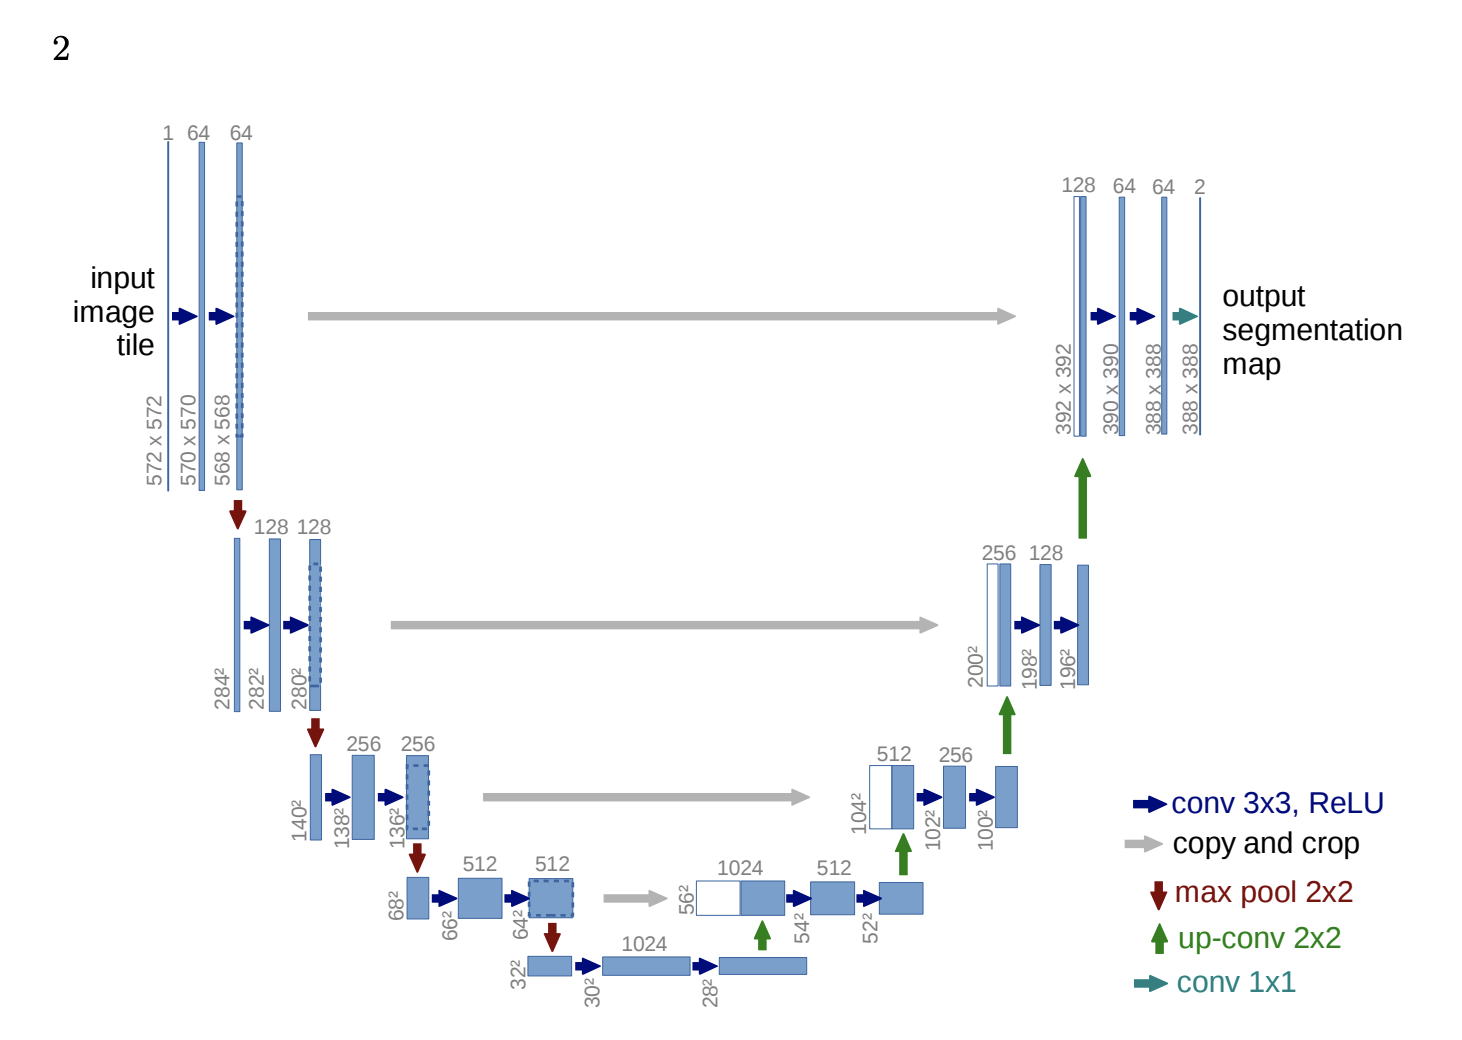
<br><br>
As we can see, the network takes an U shape and hence the name U-Net.
On the left hand side the input flows into the architecture and on the right hand side, the network outputs the segmentation map.

<br><br>
If we look at this architecture more closely, it is made up of some convolutional blocks with each block containing convolutional layers. These blocks are connected by max-pooling unit on the left hand side, while they are connected by up-convolution unit on the right hand side.
<br><br>
One more interesting point to note here is the connection that is established between the left handside and the right handside of the architecture.
This concatenation of the feature map from left handside to the feature map on the right handside is essential to ensure the borders are preserved and also spatial align the feature.
<br><br>
The downsampling path can also be termed as geometric path where the features are captured. On the other hand, the upsampling path can be termed as the spatial path where the features are spatially aligned.

<br><br>
To summarize, we have the following - 

###Downsampling path - 


1. Five conv blocks with two conv layers each.
2. The conv blocks are connected using the max-pooling layer (Kernel 2x2) and stride of 2 for downsampling.
3. The last (5th) conv block is without max-pooling layer.
4. The first conv block has 64 filters at each layer.
5. The number of filters is doubled at every consecutive blocks.
6. The input is not padded or uses valid padding.
7. The filter size used is 3x3 with Relu activation.
8. With the above configuration, the left handside reduces the resolution and increases the depth. Hence the name contracting path.





<br><br>

###Upsampling path -

1. Four conv blocks with two conv layers each.
2. The conv blocks are connected using the up-conv/transposed-conv layer (Kernel 2x2) and stride of 2.
3. The number of filters at each conv block is halfed from its previous block.
4. The input is not padded or uses valid padding.
5. The filter size used is 3x3 with Relu activation.
6. The feature maps are concatenated from the corresponding downsampling layers for precise localization.
7. We do a 1x1 conv twice at the last layer to reduce the number of channels to two. 
8. With the above configuration, the right handside increases the resolution and reduces the depth. Hence the name expansive path.



A note on the loss function.
<br><br>

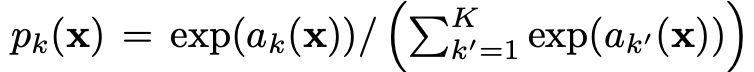


The cross entropy loss - 

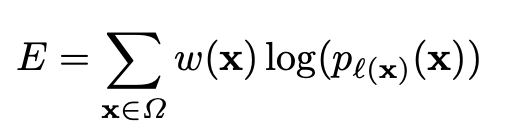

In [25]:
import numpy as np 
import os
import skimage.io as io
import skimage.transform as trans
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras


def unet(input_size = (256,256,1)):
    inputs = Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = tf.keras.Model(inputs = inputs, outputs = conv10)
  
    model.summary()
    return model


**U-Net++**

**U-Net++ Model Explanation**


**Background**

Segmenting lesions or abnormalities in medical images demands a higher level of accuracy than what is desired in natural images. While a precise segmentation mask may not be critical in natural images, even marginal segmentation errors in medical images can lead to poor user experience in clinical settings.

For instance, the subtle spiculation patterns around a nodule may indicate nodule malignancy; and therefore, their exclusion from the segmentation masks would lower the credibility of the model from the clinical perspective.


**Inspiration**

Our architecture is essentially a deeply-supervised encoder-decoder network where the encoder and decoder sub-networks are connected through a series of nested, dense skip pathways.

The re-designed skip pathways aim at reducing the semantic gap between the feature maps of the encoder and decoder sub-networks.


**Prior Art**

Long et al. [8] first introduced fully convolutional networks (FCN), while UNet was introduced by Ronneberger et al. [9]. They both share a key idea: skip connections. In FCN, up-sampled feature maps are summed with feature maps skipped from the encoder, while U-Net concatenates them and add convolutions and non-linearities between each up-sampling step. The skip connections have shown to help recover the full spatial resolution at the network output, making fully convolutional methods suitable for semantic segmentation.



The other two recent related works are GridNet [3] and Mask-RCNN [4]. GridNet is an encoder-decoder architecture wherein the feature maps are wired in a grid fashion, generalizing several classical segmentation architectures. GridNet, however, lacks up-sampling layers between skip connections; and thus, it does not represent UNet++


**Some more about the model**


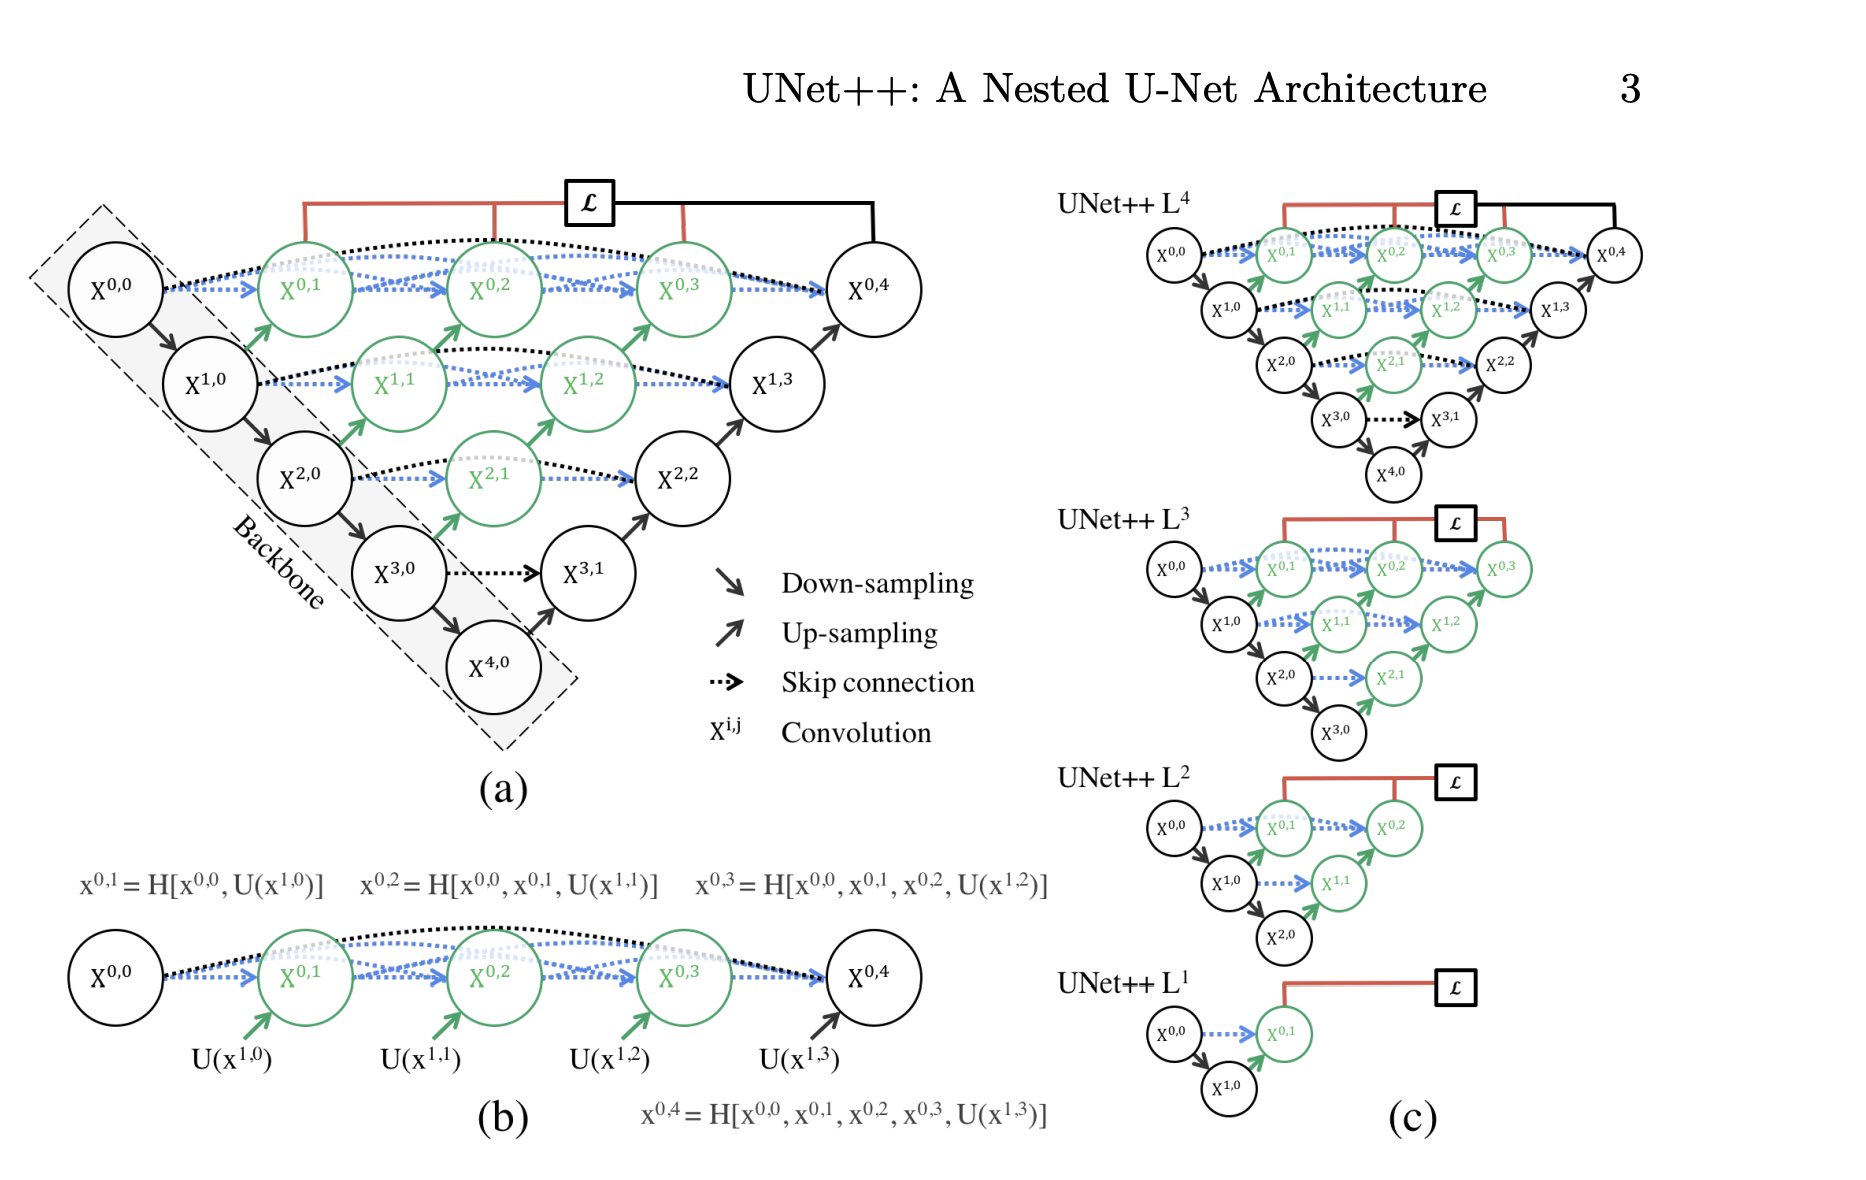

The underlying hypothesis behind our architecture is that the model can more effectively capture fine-grained details of the foreground objects when high-resolution feature maps from the encoder network are gradually enriched prior to fusion with the corresponding semantically rich feature maps from the decoder network. We argue that the network would deal with an easier learning task when the feature maps from the decoder and encoder networks are semantically similar.


This is in contrast to the plain skip connections commonly used in U-Net, which directly fast-forward high-resolution feature maps from the encoder to the decoder network, resulting in the fusion of semantically dissimilar feature maps.

What distinguishes UNet++ from U-Net (the black components in Fig. 1a) is the re-designed skip pathways (shown in green and blue) that connect the two sub-networks and the use of deep supervision (shown red).

We argue that the optimizer would deal with an easier learning task when the feature maps from the decoder and encoder networks are semantically similar.

Our experiments demonstrate that UNet++ with deep supervision achieves an average IoU gain of 3.9 and 3.4 points over U-Net and wide U-Net, respectively


The skip connections have proved effective in recovering fine-grained details of the target objects; generating segmentation masks with fine details even on complex background.


##Two core ideas

###1) Redesigned Skip Pathways


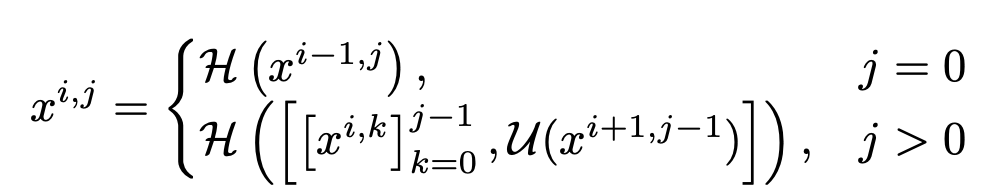

###2) Deep Supervision


We propose to use deep supervision [6] in UNet++, enabling the model to operate in two modes: 
1. accurate mode wherein the outputs from all segmentation branches are averaged; 
2. fast mode wherein the final segmentation mapis selected from only one of the segmentation branches, the choice of which determines the extent of model pruning and speed gain. Fig. 1c shows how the choice of segmentation branch in fast mode results in architectures of varying
complexity


##Summary

In summary, as depicted in Fig. 1a, UNet++ differs from the original U-Net
in three ways: 

1. having convolution layers on skip pathways (shown in green),
which bridges the semantic gap between encoder and decoder feature maps; 
2. having dense skip connections on skip pathways (shown in blue), which improves gradient flow; and 
3. having deep supervision (shown in red), which as will be
shown in Section 4 enables model pruning and improves or in the worst case
achieves comparable performance to using only one loss layer.

##Additional Benefits

It is possible to prune the model at various levels based on the resource constraints, time



**UNet ++ Model**

In [26]:
from keras.layers import Conv2D
from keras.layers import Activation
from keras.models import Model
from keras.applications import VGG16, EfficientNetB4

from keras.layers import Conv2DTranspose
from keras.layers import UpSampling2D
from keras.layers import Conv2D
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import Concatenate
from functools import wraps
import numpy as np


def to_tuple(x):
    if isinstance(x, tuple):
        if len(x) == 2:
            return x
    elif np.isscalar(x):
        return (x, x)

    raise ValueError('Value should be tuple of length 2 or int value, got "{}"'.format(x))

def get_layer_number(model, layer_name):
    """
    Help find layer in Keras model by name
    Args:
        model: Keras `Model`
        layer_name: str, name of layer
    Returns:
        index of layer
    Raises:
        ValueError: if Model does not contains layer with such name
    """
    for i, l in enumerate(model.layers):
        if l.name == layer_name:
            return i
    raise ValueError('No layer with name {} in  model {}.'.format(layer_name, model.name))


def handle_block_names(stage):
    conv_name = 'decoder_stage{}_conv'.format(stage)
    bn_name = 'decoder_stage{}_bn'.format(stage)
    relu_name = 'decoder_stage{}_relu'.format(stage)
    up_name = 'decoder_stage{}_upsample'.format(stage)
    return conv_name, bn_name, relu_name, up_name


def ConvRelu(filters, kernel_size, use_batchnorm=False, conv_name='conv', bn_name='bn', relu_name='relu'):
    def layer(x):
        x = Conv2D(filters, kernel_size, padding="same", name=conv_name, use_bias=not(use_batchnorm))(x)
        if use_batchnorm:
            x = BatchNormalization(name=bn_name)(x)
        x = Activation('relu', name=relu_name)(x)
        return x
    return layer


def Upsample2D_block(filters, stage, kernel_size=(3,3), upsample_rate=(2,2),
                     use_batchnorm=False, skip=None):

    def layer(input_tensor):

        conv_name, bn_name, relu_name, up_name = handle_block_names(stage)

        x = UpSampling2D(size=upsample_rate, name=up_name)(input_tensor)

        if skip is not None:
            x = Concatenate()([x, skip])

        x = ConvRelu(filters, kernel_size, use_batchnorm=use_batchnorm,
                     conv_name=conv_name + '1', bn_name=bn_name + '1', relu_name=relu_name + '1')(x)

        x = ConvRelu(filters, kernel_size, use_batchnorm=use_batchnorm,
                     conv_name=conv_name + '2', bn_name=bn_name + '2', relu_name=relu_name + '2')(x)

        return x
    return layer


def Transpose2D_block(filters, stage, kernel_size=(3,3), upsample_rate=(2,2),
                      transpose_kernel_size=(4,4), use_batchnorm=False, skip=None):

    def layer(input_tensor):

        conv_name, bn_name, relu_name, up_name = handle_block_names(stage)

        x = Conv2DTranspose(filters, transpose_kernel_size, strides=upsample_rate,
                            padding='same', name=up_name, use_bias=not(use_batchnorm))(input_tensor)
        if use_batchnorm:
            x = BatchNormalization(name=bn_name+'1')(x)
        x = Activation('relu', name=relu_name+'1')(x)

        if skip is not None:
            x = Concatenate()([x, skip])

        x = ConvRelu(filters, kernel_size, use_batchnorm=use_batchnorm,
                     conv_name=conv_name + '2', bn_name=bn_name + '2', relu_name=relu_name + '2')(x)

        return x
    return layer

def build_unet_2plus(shape, classes=1,
               decoder_filters=(256,128,64,32,16),
               upsample_rates=(2,2,2,2,2),
               n_upsample_blocks=5,
               block_type='upsampling',
               activation='sigmoid',
               use_batchnorm=True):
  
    skip_connection_layers = ('block5_conv3', 'block4_conv3', 'block3_conv3', 'block2_conv2', 'block1_conv2')
    backbone = VGG16(input_shape=shape, include_top=False)
    # backbone = EfficientNetB4(input_shape=shape, include_top=False)

    input = backbone.input
    x = backbone.output

    if block_type == 'transpose':
        up_block = Transpose2D_block
    else:
        up_block = Upsample2D_block
    skip_connection_idx = ([get_layer_number(backbone, l) if isinstance(l, str) else l
                               for l in skip_connection_layers])
    # convert layer names to indices # Comment for EfficientNetV4
    # skip_connection_idx = ([get_layer_number(backbone, l) if isinstance(l, str) else l
                              #  for l in skip_connection_layers])

    for i in range(n_upsample_blocks):

        # check if there is a skip connection
        skip_connection = None
        if i < len(skip_connection_idx):
            skip_connection = backbone.layers[skip_connection_idx[i]].output
        # # Comment for EfficientNetV4
        # if i < len(skip_connection_idx):
            # skip_connection = backbone.layers[skip_connection_idx[i]].output

        upsample_rate = to_tuple(upsample_rates[i])

        x = up_block(decoder_filters[i], i, upsample_rate=upsample_rate,
                     skip=skip_connection, use_batchnorm=use_batchnorm)(x)

    x = Conv2D(classes, (3,3), padding='same', name='final_conv')(x)
    x = Activation(activation, name=activation)(x)

    model = Model(input, x)

    return model

**Attention U-Net**

This network borrowed the idea of an attention mechanism from NLP and used it in skip connections. It gave the skip connections an extra idea of which region to focus on while segmenting the given object. This works great even with very small objects due to the attention present in the skip connections. This one is a little bit more complex to implement on your own from scratch but the idea behind this is quite ingenious and simple.

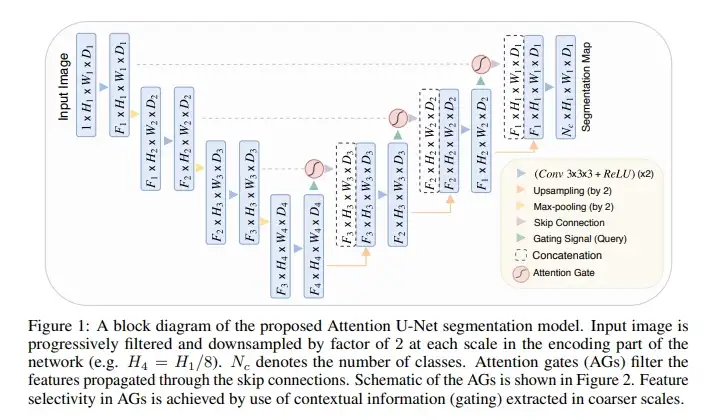

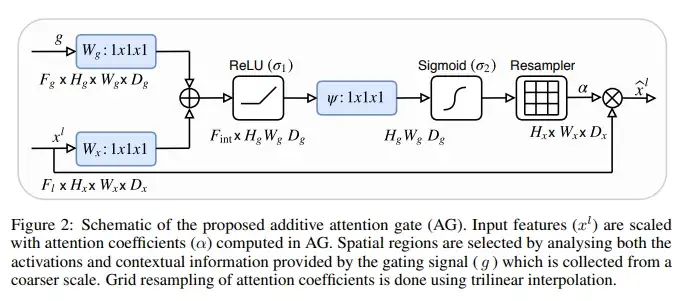

How the attention mechanism works is as follows:

The attention gate takes in two inputs, vectors x and g.
The vector, g, is taken from the next lowest layer of the network. The vector has smaller dimensions and better feature representation, given that it comes from deeper into the network.

In the example figure above, vector x would have dimensions of 64x64x64 (filters x height x width) and vector g would be 32x32x32.
Vector x goes through a stridded convolution such that its dimensions become 64x32x32 and vector g goes through a 1x1 convolution such that its 
dimensions become 64x32x32.

The two vectors are summed element-wise. This process results in aligned weights becoming larger while unaligned weights becoming relatively smaller.
The resultant vector goes through a ReLU activation layer and a 1x1 
convolution that collapses the dimensions to 1x32x32.

This vector goes through a sigmoid layer which scales the vector between the range [0,1], producing the attention coefficients (weights), where 
coefficients closer to 1 indicate more relevant features.

The attention coefficients are upsampled to the original dimensions (64x64) of the x vector using trilinear interpolation. The attention coefficients are multiplied element-wise to the original x vector, scaling the vector according to relevance. This is then passed along in the skip connection as normal.


Breakdown of attention gates - 

1. The attention gate takes in two inputs, vectors x and g.

2. The vector, g, is taken from the next lowest layer of the network. The vector has smaller dimensions and better feature representation, given that it comes from deeper into the network.

3. In the example figure above, vector x would have dimensions of 64x64x64 (filters x height x width) and vector g would be 32x32x32.

4. Vector x goes through a strided convolution such that it’s dimensions become 64x32x32 and vector g goes through a 1x1 convolution such that it’s dimensions become 64x32x32.

5. The two vectors are summed element-wise. This process results in aligned weights becoming larger while unaligned weights become relatively smaller.

6. The resultant vector goes through a ReLU activation layer and a 1x1 convolution that collapses the dimensions to 1x32x32.

7. This vector goes through a sigmoid layer which scales the vector between the range [0,1], producing the attention coefficients (weights), where coefficients closer to 1 indicate more relevant features.

8. The attention coefficients are upsampled to the original dimensions (64x64) of the x vector using trilinear interpolation. The attention coefficients are multiplied element-wise to the original x vector, scaling the vector according to relevance. This is then passed along in the skip connection as normal.


In [27]:
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras import backend as K


#convolutional block
def conv_block(x, kernelsize, filters, dropout, batchnorm=False): 
    conv = layers.Conv2D(filters, (kernelsize, kernelsize), kernel_initializer='he_normal', padding="same")(x)
    if batchnorm is True:
        conv = layers.BatchNormalization(axis=3)(conv)
    conv = layers.Activation("relu")(conv)
    if dropout > 0:
        conv = layers.Dropout(dropout)(conv)
    conv = layers.Conv2D(filters, (kernelsize, kernelsize), kernel_initializer='he_normal', padding="same")(conv)
    if batchnorm is True:
        conv = layers.BatchNormalization(axis=3)(conv)
    conv = layers.Activation("relu")(conv)
    return conv


#residual convolutional block
def res_conv_block(x, kernelsize, filters, dropout, batchnorm=False):
    conv1 = layers.Conv2D(filters, (kernelsize, kernelsize), kernel_initializer='he_normal', padding='same')(x)
    if batchnorm is True:
        conv1 = layers.BatchNormalization(axis=3)(conv1)
    conv1 = layers.Activation('relu')(conv1)    
    conv2 = layers.Conv2D(filters, (kernelsize, kernelsize), kernel_initializer='he_normal', padding='same')(conv1)
    if batchnorm is True:
        conv2 = layers.BatchNormalization(axis=3)(conv2)
        conv2 = layers.Activation("relu")(conv2)
    if dropout > 0:
        conv2 = layers.Dropout(dropout)(conv2)
        
    #skip connection    
    shortcut = layers.Conv2D(filters, kernel_size=(1, 1), kernel_initializer='he_normal', padding='same')(x)
    if batchnorm is True:
        shortcut = layers.BatchNormalization(axis=3)(shortcut)
    shortcut = layers.Activation("relu")(shortcut)
    respath = layers.add([shortcut, conv2])       
    return respath


#gating signal for attention unit
def gatingsignal(input, out_size, batchnorm=False):
    x = layers.Conv2D(out_size, (1, 1), padding='same')(input)
    if batchnorm:
        x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    return x

#attention unit/block based on soft attention
def attention_block(x, gating, inter_shape):
    shape_x = K.int_shape(x)
    shape_g = K.int_shape(gating)
    theta_x = layers.Conv2D(inter_shape, (2, 2), strides=(2, 2), kernel_initializer='he_normal', padding='same')(x) 
    shape_theta_x = K.int_shape(theta_x)
    phi_g = layers.Conv2D(inter_shape, (1, 1), kernel_initializer='he_normal', padding='same')(gating)
    upsample_g = layers.Conv2DTranspose(inter_shape, (3, 3), strides=(shape_theta_x[1] // shape_g[1], shape_theta_x[2] // shape_g[2]), kernel_initializer='he_normal', padding='same')(phi_g)
    concat_xg = layers.add([upsample_g, theta_x])
    act_xg = layers.Activation('relu')(concat_xg)
    psi = layers.Conv2D(1, (1, 1), kernel_initializer='he_normal', padding='same')(act_xg)
    sigmoid_xg = layers.Activation('sigmoid')(psi)
    shape_sigmoid = K.int_shape(sigmoid_xg)
    upsample_psi = layers.UpSampling2D(size=(shape_x[1] // shape_sigmoid[1], shape_x[2] // shape_sigmoid[2]))(sigmoid_xg) 
    upsample_psi = layers.Lambda(lambda x, repnum: K.repeat_elements(x, repnum, axis=3), arguments={'repnum': shape_x[3]})(upsample_psi)                          
    y = layers.multiply([upsample_psi, x])
    result = layers.Conv2D(shape_x[3], (1, 1), kernel_initializer='he_normal', padding='same')(y)
    attenblock = layers.BatchNormalization()(result)
    return attenblock

def attentionunet(input_shape, dropout=0.2, batchnorm=True):
    
    filters = [16, 32, 64, 128, 256]
    kernelsize = 3
    upsample_size = 2

    inputs = layers.Input(input_shape) 

    # Downsampling layers    
    dn_1 = conv_block(inputs, kernelsize, filters[0], dropout, batchnorm)
    pool_1 = layers.MaxPooling2D(pool_size=(2,2))(dn_1)
    
    dn_2 = conv_block(pool_1, kernelsize, filters[1], dropout, batchnorm)
    pool_2 = layers.MaxPooling2D(pool_size=(2,2))(dn_2)
    
    dn_3 = conv_block(pool_2, kernelsize, filters[2], dropout, batchnorm)
    pool_3 = layers.MaxPooling2D(pool_size=(2,2))(dn_3)
    
    dn_4 = conv_block(pool_3, kernelsize, filters[3], dropout, batchnorm)
    pool_4 = layers.MaxPooling2D(pool_size=(2,2))(dn_4)
    
    dn_5 = conv_block(pool_4, kernelsize, filters[4], dropout, batchnorm)

    # Upsampling layers    
    gating_5 = gatingsignal(dn_5, filters[3], batchnorm)
    att_5 = attention_block(dn_4, gating_5, filters[3])
    up_5 = layers.UpSampling2D(size=(upsample_size, upsample_size), data_format="channels_last")(dn_5)
    up_5 = layers.concatenate([up_5, att_5], axis=3)
    up_conv_5 = conv_block(up_5, kernelsize, filters[3], dropout, batchnorm)
    
    gating_4 = gatingsignal(up_conv_5, filters[2], batchnorm)
    att_4 = attention_block(dn_3, gating_4, filters[2])
    up_4 = layers.UpSampling2D(size=(upsample_size, upsample_size), data_format="channels_last")(up_conv_5)
    up_4 = layers.concatenate([up_4, att_4], axis=3)
    up_conv_4 = conv_block(up_4, kernelsize, filters[2], dropout, batchnorm)
   
    gating_3 = gatingsignal(up_conv_4, filters[1], batchnorm)
    att_3 = attention_block(dn_2, gating_3, filters[1])
    up_3 = layers.UpSampling2D(size=(upsample_size, upsample_size), data_format="channels_last")(up_conv_4)
    up_3 = layers.concatenate([up_3, att_3], axis=3)
    up_conv_3 = conv_block(up_3, kernelsize, filters[1], dropout, batchnorm)
    
    gating_2 = gatingsignal(up_conv_3, filters[0], batchnorm)
    att_2 = attention_block(dn_1, gating_2, filters[0])
    up_2 = layers.UpSampling2D(size=(upsample_size, upsample_size), data_format="channels_last")(up_conv_3)
    up_2 = layers.concatenate([up_2, att_2], axis=3)
    up_conv_2 = conv_block(up_2, kernelsize, filters[0], dropout, batchnorm)
    
    conv_final = layers.Conv2D(1, kernel_size=(1,1))(up_conv_2)
    conv_final = layers.BatchNormalization(axis=3)(conv_final)
    outputs = layers.Activation('sigmoid')(conv_final)  

    model = models.Model(inputs=[inputs], outputs=[outputs])
    model.summary()       
    return model  

**R2U-Net**

This paper tried to use the idea of the recurrent neural network to give the temporal dynamic behavior to the network.

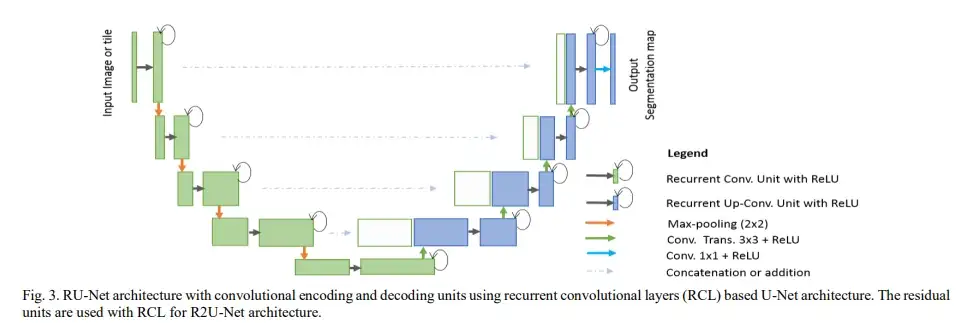

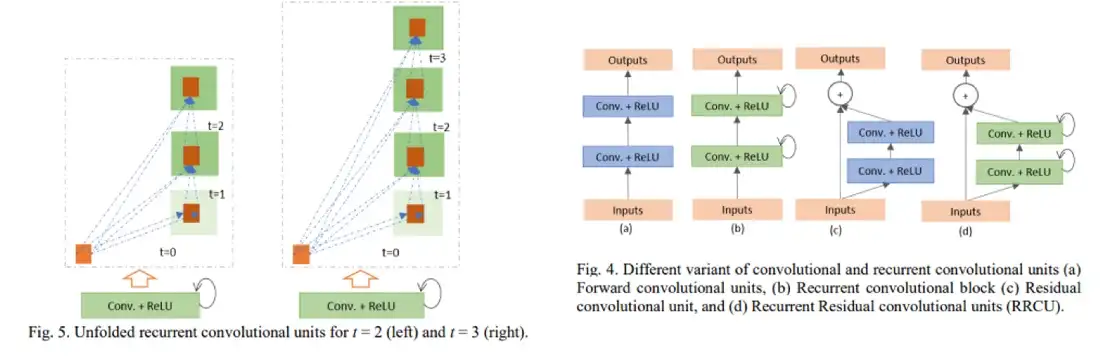

In [28]:

from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

from tensorflow import math
from tensorflow.keras.layers import Layer
import tensorflow.keras.backend as K


def gelu_(X):

    return 0.5*X*(1.0 + math.tanh(0.7978845608028654*(X + 0.044715*math.pow(X, 3))))

def snake_(X, beta):

    return X + (1/beta)*math.square(math.sin(beta*X))


class GELU(Layer):
    
    def __init__(self, trainable=False, **kwargs):
        super(GELU, self).__init__(**kwargs)
        self.supports_masking = True
        self.trainable = trainable

    def build(self, input_shape):
        super(GELU, self).build(input_shape)

    def call(self, inputs, mask=None):
        return gelu_(inputs)

    def get_config(self):
        config = {'trainable': self.trainable}
        base_config = super(GELU, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))
    def compute_output_shape(self, input_shape):
        return input_shape

    
class Snake(Layer):
  
    def __init__(self, beta=0.5, trainable=False, **kwargs):
        super(Snake, self).__init__(**kwargs)
        self.supports_masking = True
        self.beta = beta
        self.trainable = trainable

    def build(self, input_shape):
        self.beta_factor = K.variable(self.beta, dtype=K.floatx(), name='beta_factor')
        if self.trainable:
            self._trainable_weights.append(self.beta_factor)

        super(Snake, self).build(input_shape)

    def call(self, inputs, mask=None):
        return snake_(inputs, self.beta_factor)

    def get_config(self):
        config = {'beta': self.get_weights()[0] if self.trainable else self.beta, 'trainable': self.trainable}
        base_config = super(Snake, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

    def compute_output_shape(self, input_shape):
        return 

def RR_CONV(X, channel, kernel_size=3, stack_num=2, recur_num=2, activation='ReLU', batch_norm=False, name='rr'):
    
    activation_func = eval(activation)
    
    layer_skip = Conv2D(channel, 1, name='{}_conv'.format(name))(X)
    layer_main = layer_skip
    
    for i in range(stack_num):

        layer_res = Conv2D(channel, kernel_size, padding='same', name='{}_conv{}'.format(name, i))(layer_main)
        
        if batch_norm:
            layer_res = BatchNormalization(name='{}_bn{}'.format(name, i))(layer_res)
            
        layer_res = activation_func(name='{}_activation{}'.format(name, i))(layer_res)
            
        for j in range(recur_num):
            
            layer_add = add([layer_res, layer_main], name='{}_add{}_{}'.format(name, i, j))
            
            layer_res = Conv2D(channel, kernel_size, padding='same', name='{}_conv{}_{}'.format(name, i, j))(layer_add)
            
            if batch_norm:
                layer_res = BatchNormalization(name='{}_bn{}_{}'.format(name, i, j))(layer_res)
                
            layer_res = activation_func(name='{}_activation{}_{}'.format(name, i, j))(layer_res)
            
        layer_main = layer_res

    out_layer = add([layer_main, layer_skip], name='{}_add{}'.format(name, i))
    
    return out_layer

from tensorflow import expand_dims
from tensorflow.compat.v1 import image
from tensorflow.keras.layers import MaxPooling2D, AveragePooling2D, UpSampling2D, Conv2DTranspose, GlobalAveragePooling2D
from tensorflow.keras.layers import Conv2D, DepthwiseConv2D, Lambda
from tensorflow.keras.layers import BatchNormalization, Activation, concatenate, multiply, add
from tensorflow.keras.layers import ReLU, LeakyReLU, PReLU, ELU, Softmax

def decode_layer(X, channel, pool_size, unpool, kernel_size=3, 
                 activation='ReLU', batch_norm=False, name='decode'):
    
    # parsers
    if unpool is False:
        # trans conv configurations
        bias_flag = not batch_norm
    
    elif unpool == 'nearest':
        # upsample2d configurations
        unpool = True
        interp = 'nearest'
    
    elif (unpool is True) or (unpool == 'bilinear'):
        # upsample2d configurations
        unpool = True
        interp = 'bilinear'
    
    else:
        raise ValueError('Invalid unpool keyword')
        
    if unpool:
        X = UpSampling2D(size=(pool_size, pool_size), interpolation=interp, name='{}_unpool'.format(name))(X)
    else:
        if kernel_size == 'auto':
            kernel_size = pool_size
            
        X = Conv2DTranspose(channel, kernel_size, strides=(pool_size, pool_size), 
                            padding='same', name='{}_trans_conv'.format(name))(X)
        
        # batch normalization
        if batch_norm:
            X = BatchNormalization(axis=3, name='{}_bn'.format(name))(X)
            
        # activation
        if activation is not None:
            activation_func = eval(activation)
            X = activation_func(name='{}_activation'.format(name))(X)
        
    return X

def encode_layer(X, channel, pool_size, pool, kernel_size='auto', 
                 activation='ReLU', batch_norm=False, name='encode'):
    
    # parsers
    if (pool in [False, True, 'max', 'ave']) is not True:
        raise ValueError('Invalid pool keyword')
        
    # maxpooling2d as default
    if pool is True:
        pool = 'max'
        
    elif pool is False:
        # stride conv configurations
        bias_flag = not batch_norm
    
    if pool == 'max':
        X = MaxPooling2D(pool_size=(pool_size, pool_size), name='{}_maxpool'.format(name))(X)
        
    elif pool == 'ave':
        X = AveragePooling2D(pool_size=(pool_size, pool_size), name='{}_avepool'.format(name))(X)
        
    else:
        if kernel_size == 'auto':
            kernel_size = pool_size
        
        # linear convolution with strides
        X = Conv2D(channel, kernel_size, strides=(pool_size, pool_size), 
                   padding='valid', use_bias=bias_flag, name='{}_stride_conv'.format(name))(X)
        
        # batch normalization
        if batch_norm:
            X = BatchNormalization(axis=3, name='{}_bn'.format(name))(X)
            
        # activation
        if activation is not None:
            activation_func = eval(activation)
            X = activation_func(name='{}_activation'.format(name))(X)
            
    return X

def attention_gate(X, g, channel,  
                   activation='ReLU', 
                   attention='add', name='att'):
  
    activation_func = eval(activation)
    attention_func = eval(attention)
    
    # mapping the input tensor to the intermediate channel
    theta_att = Conv2D(channel, 1, use_bias=True, name='{}_theta_x'.format(name))(X)
    
    # mapping the gate tensor
    phi_g = Conv2D(channel, 1, use_bias=True, name='{}_phi_g'.format(name))(g)
    
    # ----- attention learning ----- #
    query = attention_func([theta_att, phi_g], name='{}_add'.format(name))
    
    # nonlinear activation
    f = activation_func(name='{}_activation'.format(name))(query)
    
    # linear transformation
    psi_f = Conv2D(1, 1, use_bias=True, name='{}_psi_f'.format(name))(f)
    # ------------------------------ #
    
    # sigmoid activation as attention coefficients
    coef_att = Activation('sigmoid', name='{}_sigmoid'.format(name))(psi_f)
    
    # multiplicative attention masking
    X_att = multiply([X, coef_att], name='{}_masking'.format(name))
    
    return X_att

def CONV_stack(X, channel, kernel_size=3, stack_num=2, 
               dilation_rate=1, activation='ReLU', 
               batch_norm=False, name='conv_stack'):
  
    
    bias_flag = not batch_norm
    
    # stacking Convolutional layers
    for i in range(stack_num):
        
        activation_func = eval(activation)
        
        # linear convolution
        X = Conv2D(channel, kernel_size, padding='same', use_bias=bias_flag, 
                   dilation_rate=dilation_rate, name='{}_{}'.format(name, i))(X)
        
        # batch normalization
        if batch_norm:
            X = BatchNormalization(axis=3, name='{}_{}_bn'.format(name, i))(X)
        
        # activation
        activation_func = eval(activation)
        X = activation_func(name='{}_{}_activation'.format(name, i))(X)
        
    return 

def UNET_RR_left(X, channel, kernel_size=3, 
                 stack_num=2, recur_num=2, activation='ReLU', 
                 pool=True, batch_norm=False, name='left0'):
    
    pool_size = 2
    
    # maxpooling layer vs strided convolutional layers
    X = encode_layer(X, channel, pool_size, pool, activation=activation, 
                     batch_norm=batch_norm, name='{}_encode'.format(name))
    
    # stack linear convolutional layers
    X = RR_CONV(X, channel, stack_num=stack_num, recur_num=recur_num, 
                activation=activation, batch_norm=batch_norm, name=name)    
    return X


def UNET_RR_right(X, X_list, channel, kernel_size=3, 
                   stack_num=2, recur_num=2, activation='ReLU',
                   unpool=True, batch_norm=False, name='right0'): 
    pool_size = 2
    
    X = decode_layer(X, channel, pool_size, unpool, 
                     activation=activation, batch_norm=batch_norm, name='{}_decode'.format(name))
    
    # linear convolutional layers before concatenation
    X = CONV_stack(X, channel, kernel_size, stack_num=1, activation=activation, 
                   batch_norm=batch_norm, name='{}_conv_before_concat'.format(name))
    
    # Tensor concatenation
    H = concatenate([X,]+X_list, axis=-1, name='{}_concat'.format(name))
    
    # stacked linear convolutional layers after concatenation
    H = RR_CONV(H, channel, stack_num=stack_num, recur_num=recur_num, 
                      activation=activation, batch_norm=batch_norm, name=name)
    
    return H


def CONV_output(X, n_labels, kernel_size=1, activation='Softmax', name='conv_output'):
    
    X = Conv2D(n_labels, kernel_size, padding='same', use_bias=True, name=name)(X)
    
    if activation:
        
        if activation == 'Sigmoid':
            X = Activation('sigmoid', name='{}_activation'.format(name))(X)
            
        else:
            activation_func = eval(activation)
            X = activation_func(name='{}_activation'.format(name))(X)
            
    return 

def r2_unet_2d_base(input_tensor, filter_num, stack_num_down=2, stack_num_up=2, recur_num=2,
                    activation='ReLU', batch_norm=False, pool=True, unpool=True, name='res_unet'):
    
    activation_func = eval(activation)

    X = input_tensor
    X_skip = []
    
    # downsampling blocks
    X = RR_CONV(X, filter_num[0], stack_num=stack_num_down, recur_num=recur_num, 
                      activation=activation, batch_norm=batch_norm, name='{}_down0'.format(name))
    X_skip.append(X)
    
    for i, f in enumerate(filter_num[1:]):
        X = UNET_RR_left(X, f, kernel_size=3, stack_num=stack_num_down, recur_num=recur_num, 
                          activation=activation, pool=pool, batch_norm=batch_norm, name='{}_down{}'.format(name, i+1))        
        X_skip.append(X)
    
    # upsampling blocks
    X_skip = X_skip[:-1][::-1]
    for i, f in enumerate(filter_num[:-1][::-1]):
        X = UNET_RR_right(X, [X_skip[i],], f, stack_num=stack_num_up, recur_num=recur_num, 
                           activation=activation, unpool=unpool, batch_norm=batch_norm, name='{}_up{}'.format(name, i+1))
    
    return X


def r2_unet_2d(input_size, filter_num=[64, 128, 256, 512], n_labels=1, 
               stack_num_down=2, stack_num_up=2, recur_num=2,
               activation='ReLU', output_activation='Softmax', 
               batch_norm=False, pool=True, unpool=True, name='r2_unet'):
    
    activation_func = eval(activation)

    IN = Input(input_size, name='{}_input'.format(name))

    # base
    X = r2_unet_2d_base(IN, filter_num, 
                        stack_num_down=stack_num_down, stack_num_up=stack_num_up, recur_num=recur_num,
                        activation=activation, batch_norm=batch_norm, pool=pool, unpool=unpool, name=name)
    # output layer
    OUT = CONV_output(X, n_labels, kernel_size=1, activation=output_activation, name='{}_output'.format(name))
    
    # functional API model
    model = Model(inputs=[IN], outputs=[OUT], name='{}_model'.format(name))
    
    return model 

**SegNet**

Encoder-Decoder pairs are used to create feature maps for classifications of different resolutions.

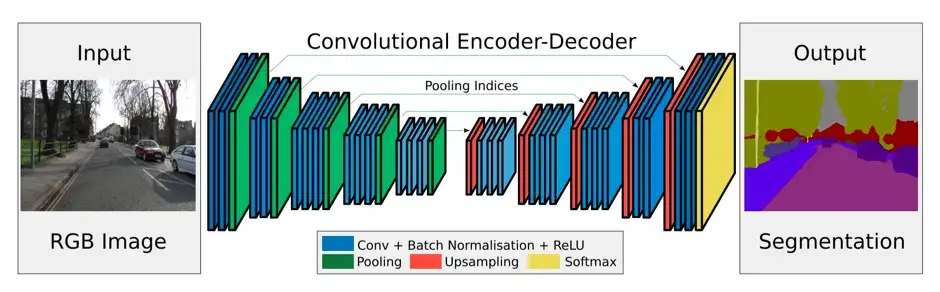


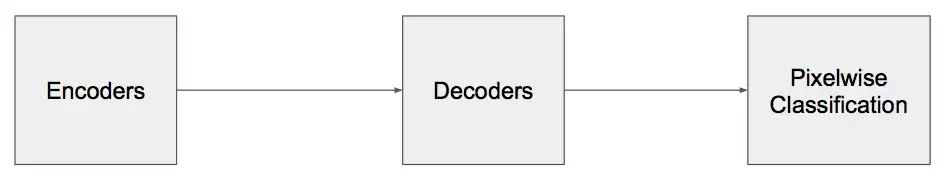

Encoder
13 VGG16 Conv layers

Not fully connected, this reduces parameters from 134M to 14.7M
Good initial weights are available hence these layers are made non trainable

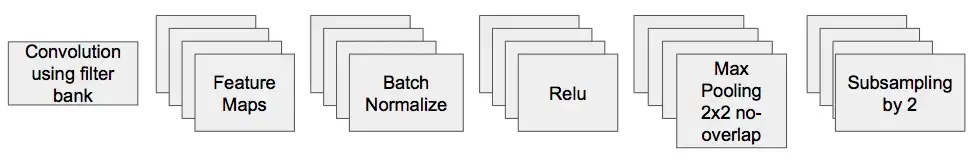

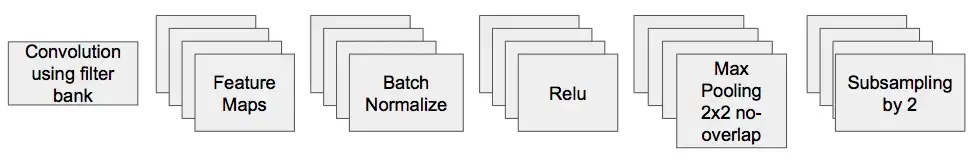

The novelty is in the subsampling stage, Max-pooling is used to achieve translation invariance over small spatial shifts in the image, combine that with Subsampling and it leads to each pixel governing a larger input image context (spatial window). 

Decoder

For each of the 13 encoders there is a corresponding decoder which upsamples the feature map using memorised max-pooling indices
Sparse feature maps of higher resolutions produced
Sparse maps are fed through a trainable filter bank to produce dense feature maps

The last decoder is connected to a softmax classifier which classifies each pixel

In [29]:

from keras.layers import Input
from keras.layers.convolutional import Convolution2D
from keras.layers.core import Activation, Reshape

from tensorflow.keras.layers import BatchNormalization
from keras.models import Model

from keras import backend as K
from keras.layers import Layer


class MaxPoolingWithArgmax2D(Layer):
    def __init__(self, pool_size=(2, 2), strides=(2, 2), padding="same", **kwargs):
        super(MaxPoolingWithArgmax2D, self).__init__(**kwargs)
        self.padding = padding
        self.pool_size = pool_size
        self.strides = strides

    def call(self, inputs, **kwargs):
        padding = self.padding
        pool_size = self.pool_size
        strides = self.strides
        if K.backend() == "tensorflow":
            ksize = [1, pool_size[0], pool_size[1], 1]
            padding = padding.upper()
            strides = [1, strides[0], strides[1], 1]
            output, argmax = K.tf.nn.max_pool_with_argmax(
                inputs, ksize=ksize, strides=strides, padding=padding
            )
        else:
            errmsg = "{} backend is not supported for layer {}".format(
                K.backend(), type(self).__name__
            )
            raise NotImplementedError(errmsg)
        argmax = K.cast(argmax, K.floatx())
        return [output, argmax]

    def compute_output_shape(self, input_shape):
        ratio = (1, 2, 2, 1)
        output_shape = [
            dim // ratio[idx] if dim is not None else None
            for idx, dim in enumerate(input_shape)
        ]
        output_shape = tuple(output_shape)
        return [output_shape, output_shape]

    def compute_mask(self, inputs, mask=None):
        return 2 * [None]


class MaxUnpooling2D(Layer):
    def __init__(self, size=(2, 2), **kwargs):
        super(MaxUnpooling2D, self).__init__(**kwargs)
        self.size = size

    def call(self, inputs, output_shape=None):
        updates, mask = inputs[0], inputs[1]
        with tf.compat.v1.variable_scope(self.name):
            mask = K.cast(mask, "int32")
            input_shape = K.tf.shape(updates, out_type="int32")
            #  calculation new shape
            if output_shape is None:
                output_shape = (
                    input_shape[0],
                    input_shape[1] * self.size[0],
                    input_shape[2] * self.size[1],
                    input_shape[3],
                )
            self.output_shape1 = output_shape

            # calculation indices for batch, height, width and feature maps
            one_like_mask = K.ones_like(mask, dtype="int32")
            batch_shape = K.concatenate([[input_shape[0]], [1], [1], [1]], axis=0)
            batch_range = K.reshape(
                K.tf.range(output_shape[0], dtype="int32"), shape=batch_shape
            )
            b = one_like_mask * batch_range
            y = mask // (output_shape[2] * output_shape[3])
            x = (mask // output_shape[3]) % output_shape[2]
            feature_range = K.tf.range(output_shape[3], dtype="int32")
            f = one_like_mask * feature_range

            # transpose indices & reshape update values to one dimension
            updates_size = K.tf.size(updates)
            indices = K.transpose(K.reshape(K.stack([b, y, x, f]), [4, updates_size]))
            values = K.reshape(updates, [updates_size])
            ret = K.tf.scatter_nd(indices, values, output_shape)
            return ret

    def compute_output_shape(self, input_shape):
        mask_shape = input_shape[1]
        return (
            mask_shape[0],
            mask_shape[1] * self.size[0],
            mask_shape[2] * self.size[1],
            mask_shape[3],
        )


def segnet(input_shape, n_labels=1, kernel=3, pool_size=(2, 2), output_mode="sigmoid"):
    # encoder
    inputs = Input(shape=input_shape)

    conv_1 = Convolution2D(64, (kernel, kernel), padding="same")(inputs)
    conv_1 = BatchNormalization()(conv_1)
    conv_1 = Activation("relu")(conv_1)
    conv_2 = Convolution2D(64, (kernel, kernel), padding="same")(conv_1)
    conv_2 = BatchNormalization()(conv_2)
    conv_2 = Activation("relu")(conv_2)

    pool_1, mask_1 = MaxPoolingWithArgmax2D(pool_size)(conv_2)

    conv_3 = Convolution2D(128, (kernel, kernel), padding="same")(pool_1)
    conv_3 = BatchNormalization()(conv_3)
    conv_3 = Activation("relu")(conv_3)
    conv_4 = Convolution2D(128, (kernel, kernel), padding="same")(conv_3)
    conv_4 = BatchNormalization()(conv_4)
    conv_4 = Activation("relu")(conv_4)

    pool_2, mask_2 = MaxPoolingWithArgmax2D(pool_size)(conv_4)

    conv_5 = Convolution2D(256, (kernel, kernel), padding="same")(pool_2)
    conv_5 = BatchNormalization()(conv_5)
    conv_5 = Activation("relu")(conv_5)
    conv_6 = Convolution2D(256, (kernel, kernel), padding="same")(conv_5)
    conv_6 = BatchNormalization()(conv_6)
    conv_6 = Activation("relu")(conv_6)
    conv_7 = Convolution2D(256, (kernel, kernel), padding="same")(conv_6)
    conv_7 = BatchNormalization()(conv_7)
    conv_7 = Activation("relu")(conv_7)

    pool_3, mask_3 = MaxPoolingWithArgmax2D(pool_size)(conv_7)

    conv_8 = Convolution2D(512, (kernel, kernel), padding="same")(pool_3)
    conv_8 = BatchNormalization()(conv_8)
    conv_8 = Activation("relu")(conv_8)
    conv_9 = Convolution2D(512, (kernel, kernel), padding="same")(conv_8)
    conv_9 = BatchNormalization()(conv_9)
    conv_9 = Activation("relu")(conv_9)
    conv_10 = Convolution2D(512, (kernel, kernel), padding="same")(conv_9)
    conv_10 = BatchNormalization()(conv_10)
    conv_10 = Activation("relu")(conv_10)

    pool_4, mask_4 = MaxPoolingWithArgmax2D(pool_size)(conv_10)

    conv_11 = Convolution2D(512, (kernel, kernel), padding="same")(pool_4)
    conv_11 = BatchNormalization()(conv_11)
    conv_11 = Activation("relu")(conv_11)
    conv_12 = Convolution2D(512, (kernel, kernel), padding="same")(conv_11)
    conv_12 = BatchNormalization()(conv_12)
    conv_12 = Activation("relu")(conv_12)
    conv_13 = Convolution2D(512, (kernel, kernel), padding="same")(conv_12)
    conv_13 = BatchNormalization()(conv_13)
    conv_13 = Activation("relu")(conv_13)

    pool_5, mask_5 = MaxPoolingWithArgmax2D(pool_size)(conv_13)
    print("Build Encoder Done..")

    # decoder

    unpool_1 = MaxUnpooling2D(pool_size)([pool_5, mask_5])

    conv_14 = Convolution2D(512, (kernel, kernel), padding="same")(unpool_1)
    conv_14 = BatchNormalization()(conv_14)
    conv_14 = Activation("relu")(conv_14)
    conv_15 = Convolution2D(512, (kernel, kernel), padding="same")(conv_14)
    conv_15 = BatchNormalization()(conv_15)
    conv_15 = Activation("relu")(conv_15)
    conv_16 = Convolution2D(512, (kernel, kernel), padding="same")(conv_15)
    conv_16 = BatchNormalization()(conv_16)
    conv_16 = Activation("relu")(conv_16)

    unpool_2 = MaxUnpooling2D(pool_size)([conv_16, mask_4])

    conv_17 = Convolution2D(512, (kernel, kernel), padding="same")(unpool_2)
    conv_17 = BatchNormalization()(conv_17)
    conv_17 = Activation("relu")(conv_17)
    conv_18 = Convolution2D(512, (kernel, kernel), padding="same")(conv_17)
    conv_18 = BatchNormalization()(conv_18)
    conv_18 = Activation("relu")(conv_18)
    conv_19 = Convolution2D(256, (kernel, kernel), padding="same")(conv_18)
    conv_19 = BatchNormalization()(conv_19)
    conv_19 = Activation("relu")(conv_19)

    unpool_3 = MaxUnpooling2D(pool_size)([conv_19, mask_3])

    conv_20 = Convolution2D(256, (kernel, kernel), padding="same")(unpool_3)
    conv_20 = BatchNormalization()(conv_20)
    conv_20 = Activation("relu")(conv_20)
    conv_21 = Convolution2D(256, (kernel, kernel), padding="same")(conv_20)
    conv_21 = BatchNormalization()(conv_21)
    conv_21 = Activation("relu")(conv_21)
    conv_22 = Convolution2D(128, (kernel, kernel), padding="same")(conv_21)
    conv_22 = BatchNormalization()(conv_22)
    conv_22 = Activation("relu")(conv_22)

    unpool_4 = MaxUnpooling2D(pool_size)([conv_22, mask_2])

    conv_23 = Convolution2D(128, (kernel, kernel), padding="same")(unpool_4)
    conv_23 = BatchNormalization()(conv_23)
    conv_23 = Activation("relu")(conv_23)
    conv_24 = Convolution2D(64, (kernel, kernel), padding="same")(conv_23)
    conv_24 = BatchNormalization()(conv_24)
    conv_24 = Activation("relu")(conv_24)

    unpool_5 = MaxUnpooling2D(pool_size)([conv_24, mask_1])

    conv_25 = Convolution2D(64, (kernel, kernel), padding="same")(unpool_5)
    conv_25 = BatchNormalization()(conv_25)
    conv_25 = Activation("relu")(conv_25)

    conv_26 = Convolution2D(n_labels, (1, 1), padding="valid")(conv_25)
    conv_26 = BatchNormalization()(conv_26)
    

    outputs = Activation(output_mode)(conv_26)
    print("Build Decoder Done...")

    model = Model(inputs=inputs, outputs=outputs, name="SegNet")
    model.summary()

    return model

**Training**

In [30]:
!pip install keras_unet_collection

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 KB 4.1 MB/s eta 0:00:00


In [31]:
from keras_unet_collection import models as kmodels


def train(model_name="unet"):
  create_dir(f"{model_name}_files")

  batch_size = 16
  lr = 1e-4
  #num_epochs = 2
  num_epochs = 30
  
  model_path = os.path.join(f"{model_name}_files", "model.h5")
  # print(model_path)
  csv_path = os.path.join(f"{model_name}_files", "data.csv")
  print(csv_path)


  dataset_path = "/content"
  (train_x, train_y), (valid_x, valid_y), (test_x, test_y) = load_data(dataset_path)
  train_x, train_y = shuffling(train_x, train_y)

  print(f"Train: {len(train_x)} - {len(train_y)}")
  print(f"Valid: {len(valid_x)} - {len(valid_y)}")
  print(f"Test: {len(test_x)} - {len(test_y)}")

  train_dataset = tf_dataset(train_x, train_y, batch_size)
  valid_dataset = tf_dataset(valid_x, valid_y, batch_size)

  train_steps = len(train_dataset)
  valid_steps = len(valid_dataset)

  if model_name == "unet":
    model = unet(input_size=(H, W, 3))
  if model_name == "unet++":
    model = build_unet_2plus(shape=(H, W, 3))
  elif model_name == "attention_unet":
    model = attentionunet(input_shape=(H,W,3))
  elif model_name == "r2_unet":
    model = kmodels.r2_unet_2d((H, W, 3), [64, 128, 256, 512], n_labels=1,
                          stack_num_down=2, stack_num_up=1, recur_num=2,
                          activation='ReLU', output_activation='Sigmoid', 
                          batch_norm=True, pool='max', unpool='nearest', name='r2unet')

  elif model_name == "segnet":
    model = segnet(input_shape=(H,W,3) )
    


  metrics = [dice_coef, iou, Recall(), Precision()]
  model.compile(loss=dice_loss, optimizer=Adam(lr), metrics=metrics)
  callbacks = [
      #ModelCheckpoint(model_path, verbose=1, save_best_only=True),
      ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-7, verbose=1),
      CSVLogger(csv_path),
      EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=False)
  ]

  history = model.fit(
      train_dataset,
      epochs=num_epochs,
      validation_data=valid_dataset,
      steps_per_epoch=train_steps,
      validation_steps=valid_steps,
      callbacks=callbacks
  )
  # print(history)
  # loss


  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

  # Precision
  plt.plot(history.history['dice_coef'])
  plt.plot(history.history['val_dice_coef'])
  plt.title('Model Dice Coefficient')
  plt.ylabel('Dice Coefficent')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()
  return model

In [32]:
from keras_unet_collection import models as kmodels


def train(model_name="unet"):
  create_dir(f"{model_name}_files")

  batch_size = 16
  lr = 1e-4
  #num_epochs = 2
  num_epochs = 30
  #num_epochs = 3
  model_path = os.path.join(f"{model_name}_files", "model.h5")
  # print(model_path)
  csv_path = os.path.join(f"{model_name}_files", "data.csv")
  print(csv_path)


  dataset_path = "/content"
  (train_x, train_y), (valid_x, valid_y), (test_x, test_y) = load_data(dataset_path)
  train_x, train_y = shuffling(train_x, train_y)

  print(f"Train: {len(train_x)} - {len(train_y)}")
  print(f"Valid: {len(valid_x)} - {len(valid_y)}")
  print(f"Test: {len(test_x)} - {len(test_y)}")

  train_dataset = tf_dataset(train_x, train_y, batch_size)
  valid_dataset = tf_dataset(valid_x, valid_y, batch_size)

  train_steps = len(train_dataset)
  valid_steps = len(valid_dataset)

  if model_name == "unet":
    model = unet(input_size=(H, W, 3))
  if model_name == "unet++":
    model = build_unet_2plus(shape=(H, W, 3))
  elif model_name == "attention_unet":
    model = attentionunet(input_shape=(H,W,3))
  elif model_name == "r2_unet":
    model = kmodels.r2_unet_2d((H, W, 3), [64, 128, 256, 512], n_labels=1,
                          stack_num_down=2, stack_num_up=1, recur_num=2,
                          activation='ReLU', output_activation='Sigmoid', 
                          batch_norm=True, pool='max', unpool='nearest', name='r2unet')

  elif model_name == "segnet":
    model = segnet(input_shape=(H,W,3) )
    


  metrics = [dice_coef, iou, Recall(), Precision()]
  model.compile(loss=dice_loss, optimizer=Adam(lr), metrics=metrics)
  callbacks = [
      #ModelCheckpoint(model_path, verbose=1, save_best_only=True),
      ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-7, verbose=1),
      CSVLogger(csv_path),
      EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=False)
  ]

  history = model.fit(
      train_dataset,
      epochs=num_epochs,
      validation_data=valid_dataset,
      steps_per_epoch=train_steps,
      validation_steps=valid_steps,
      callbacks=callbacks
  )
  # print(history)
  # loss


  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

  # Precision
  plt.plot(history.history['dice_coef'])
  plt.plot(history.history['val_dice_coef'])
  plt.title('Model Dice Coefficient')
  plt.ylabel('Dice Coefficent')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()
  return model

**Train UNET**

unet_files/data.csv
Train: 1816 - 1816
Valid: 389 - 389
Test: 389 - 389
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 128, 128, 64  36928       ['conv2d[0][0]']                 
                      

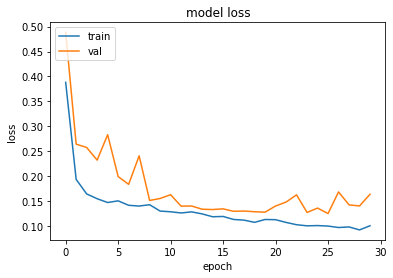

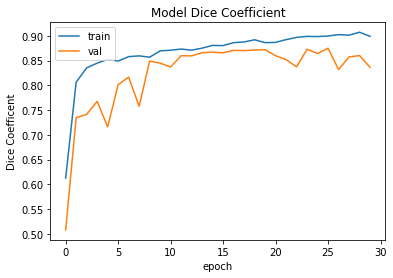

In [33]:
model_unet = train()

**Defining Evaluation Metrics for Lesion Segmentation**

**Jaccard Distance**
The Jaccard distance, which measures dissimilarity between sample sets, is complementary to the Jaccard coefficient and is obtained by subtracting the Jaccard coefficient from 1, or, equivalently, by dividing the difference of the sizes of the union and the intersection of two sets by the size of the union:

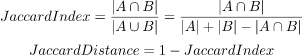


**Intersection over Union**

The Jaccard index, also known as Intersection over Union and the Jaccard similarity coefficient is a statistic used for gauging the similarity and diversity of sample sets. The Jaccard coefficient measures similarity between finite sample sets, and is defined as the size of the intersection divided by the size of the union of the sample sets:

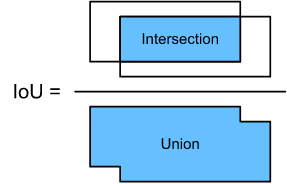

**Dice coefficient**

The Dice score is not only a measure of how many positives you find, but it also penalizes for the false positives that the method finds, similar to precision. so it is more similar to precision than accuracy.

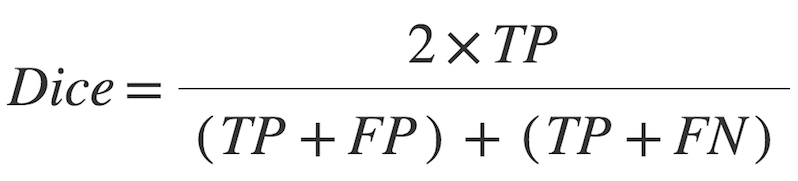

**Precision**

Precision is a good measure to determine, when the costs of False Positive is high.

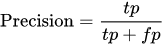

**Recall**

Recall actually calculates how many of the Actual Positives our model capture through labeling it as Positive (True Positive). Applying the same understanding, we know that Recall shall be the model metric we use to select our best model when there is a high cost associated with False Negative.

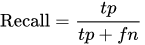

In [34]:
# def iou(groundtruth_mask, pred_mask):
#     print("ground")
#     print(groundtruth_mask)
#     print("pred_mask")
#     print(pred_mask)
#     intersect = np.sum(pred_mask*groundtruth_mask)
#     union = np.sum(pred_mask) + np.sum(groundtruth_mask) - intersect
#     iou = np.mean(intersect/union)
#     return round(iou, 3)

In [35]:
import numpy as np
import cv2
import pandas as pd
from glob import glob
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.utils import CustomObjectScope
from sklearn.metrics import accuracy_score, f1_score, jaccard_score, precision_score, recall_score


def read_image_test(path):
    x = cv2.imread(path, cv2.IMREAD_COLOR)  ## (H, W, 3)
    x = cv2.resize(x, (W, H))
    ori_x = x
    x = x/255.0
    x = x.astype(np.float32)
    x = np.expand_dims(x, axis=0)
    return ori_x, x                                ## (1, 256, 256, 3)


def read_mask_test(path):
    x = cv2.imread(path, cv2.IMREAD_GRAYSCALE)  ## (H, W)
    x = cv2.resize(x, (W, H))
    ori_x = x
    x = x/255.0
    x = x.astype(np.int32)                    ## (256, 256)
    return ori_x, x

def evaluate(model=None, model_name="unet"):
    """ Folder for saving results """
    create_dir("results")

    """ Load the model """
    if not model:
      with CustomObjectScope({'iou': iou, 'dice_coef': dice_coef, 'dice_loss': dice_loss}):
          model = tf.keras.models.load_model(f"{model_name}_files/model.h5")

    """ Load the test data """
    dataset_path = "/content"
    (train_x, train_y), (valid_x, valid_y), (test_x, test_y) = load_data(dataset_path)

    SCORE = []
    for x, y in tqdm(zip(test_x, test_y), total=len(test_x)):
        """ Exctracting the image name """
        name = x.split("/")[-1]

        """ Read the image and mask """
        ori_x, x = read_image_test(x)
        ori_y, y = read_mask_test(y)

        y_pred = model.predict(x)[0] > 0.5
        y_pred = np.squeeze(y_pred, axis=-1)
        y_pred = y_pred.astype(np.int32)


        """ Flatten the array """
        y = y.flatten()
        y_pred = y_pred.flatten()

        """ Calculating metrics values """
        acc_value = accuracy_score(y, y_pred)
        f1_value = f1_score(y, y_pred, labels=[0, 1], average="binary")
        jac_value = jaccard_score(y, y_pred, labels=[0, 1], average="binary")
        recall_value = recall_score(y, y_pred, labels=[0, 1], average="binary")
        precision_value = precision_score(y, y_pred, labels=np.unique(y_pred), average='weighted')
        iou_value = iou(y, y_pred)
        SCORE.append([name, acc_value, f1_value, jac_value, recall_value, precision_value, iou_value])

    """ mean metrics values """
    score = [s[1:] for s in SCORE]
    score = np.mean(score, axis=0)
    print(f"--------------------------------------------------------------------------")
    print(f"Key Metrics")
    print(f"Accuracy: {score[0]:0.5f}")
    print(f"F1: {score[1]:0.5f}")
    print(f"Jaccard: {score[2]:0.5f}")
    print(f"Recall: {score[3]:0.5f}")
    print(f"Precision: {score[4]:0.5f}")
    print(f"IOU: {score[5]:0.5f}")
    return score

**Evaluate U-Net**

In [36]:
unet_score = evaluate(model_unet)

  0%|          | 0/389 [00:00<?, ?it/s]

1/1 [==============================] - 1s 1s/step


  0%|          | 1/389 [00:01<08:43,  1.35s/it]

1/1 [==============================] - 0s 17ms/step


  1%|          | 2/389 [00:01<04:43,  1.37it/s]

1/1 [==============================] - 0s 16ms/step


  1%|          | 3/389 [00:01<03:07,  2.06it/s]

1/1 [==============================] - 0s 17ms/step


  1%|▏         | 5/389 [00:02<01:47,  3.57it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 6/389 [00:02<01:51,  3.43it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 7/389 [00:03<02:34,  2.47it/s]

1/1 [==============================] - 0s 16ms/step


  2%|▏         | 8/389 [00:03<03:05,  2.06it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 9/389 [00:04<03:25,  1.85it/s]

1/1 [==============================] - 0s 16ms/step


  3%|▎         | 11/389 [00:04<02:04,  3.03it/s]

1/1 [==============================] - 0s 16ms/step


  3%|▎         | 12/389 [00:04<01:56,  3.24it/s]

1/1 [==============================] - 0s 16ms/step


  3%|▎         | 13/389 [00:05<02:34,  2.43it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▎         | 14/389 [00:05<02:06,  2.97it/s]

1/1 [==============================] - 0s 16ms/step


  4%|▍         | 16/389 [00:05<01:32,  4.03it/s]

1/1 [==============================] - 0s 16ms/step


  4%|▍         | 17/389 [00:06<01:21,  4.55it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▍         | 18/389 [00:06<01:23,  4.42it/s]

1/1 [==============================] - 0s 16ms/step


  5%|▍         | 19/389 [00:07<02:11,  2.81it/s]

1/1 [==============================] - 0s 18ms/step


  5%|▌         | 20/389 [00:07<01:55,  3.21it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▌         | 21/389 [00:07<02:35,  2.37it/s]

1/1 [==============================] - 0s 17ms/step


  6%|▌         | 22/389 [00:08<03:07,  1.95it/s]

1/1 [==============================] - 0s 17ms/step


  6%|▌         | 23/389 [00:08<02:33,  2.39it/s]

1/1 [==============================] - 0s 17ms/step


  6%|▋         | 25/389 [00:09<02:29,  2.43it/s]

1/1 [==============================] - 0s 18ms/step


  7%|▋         | 26/389 [00:09<02:19,  2.60it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 28/389 [00:10<01:34,  3.84it/s]

1/1 [==============================] - 0s 16ms/step


  8%|▊         | 30/389 [00:10<01:52,  3.19it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 31/389 [00:11<01:42,  3.49it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 32/389 [00:11<01:43,  3.44it/s]

1/1 [==============================] - 0s 16ms/step


  9%|▊         | 34/389 [00:12<01:55,  3.07it/s]

1/1 [==============================] - 0s 17ms/step


  9%|▉         | 35/389 [00:12<01:53,  3.12it/s]

1/1 [==============================] - 0s 16ms/step


  9%|▉         | 36/389 [00:12<01:51,  3.17it/s]

1/1 [==============================] - 0s 16ms/step


 10%|▉         | 38/389 [00:13<01:24,  4.17it/s]

1/1 [==============================] - 0s 17ms/step


 10%|█         | 39/389 [00:13<01:16,  4.58it/s]

1/1 [==============================] - 0s 16ms/step


 11%|█         | 41/389 [00:13<01:12,  4.81it/s]

1/1 [==============================] - 0s 16ms/step


 11%|█         | 42/389 [00:14<01:48,  3.21it/s]

1/1 [==============================] - 0s 16ms/step


 11%|█         | 43/389 [00:14<01:36,  3.60it/s]

1/1 [==============================] - 0s 16ms/step


 11%|█▏        | 44/389 [00:14<01:36,  3.56it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 46/389 [00:14<01:07,  5.08it/s]

1/1 [==============================] - 0s 16ms/step


 12%|█▏        | 48/389 [00:15<01:06,  5.14it/s]

1/1 [==============================] - 0s 16ms/step


 13%|█▎        | 49/389 [00:15<01:44,  3.26it/s]

1/1 [==============================] - 0s 17ms/step


 13%|█▎        | 50/389 [00:16<01:34,  3.60it/s]

1/1 [==============================] - 0s 19ms/step


 13%|█▎        | 51/389 [00:16<02:10,  2.58it/s]

1/1 [==============================] - 0s 18ms/step


 13%|█▎        | 52/389 [00:17<02:05,  2.68it/s]

1/1 [==============================] - 0s 16ms/step


 14%|█▎        | 53/389 [00:17<02:36,  2.15it/s]

1/1 [==============================] - 0s 16ms/step


 14%|█▍        | 54/389 [00:18<02:59,  1.87it/s]

1/1 [==============================] - 0s 17ms/step


 14%|█▍        | 55/389 [00:18<02:25,  2.29it/s]

1/1 [==============================] - 0s 17ms/step


 14%|█▍        | 56/389 [00:18<01:56,  2.86it/s]

1/1 [==============================] - 0s 16ms/step


 15%|█▍        | 57/389 [00:19<02:32,  2.18it/s]

1/1 [==============================] - 0s 16ms/step


 15%|█▍        | 58/389 [00:19<02:14,  2.46it/s]

1/1 [==============================] - 0s 16ms/step


 15%|█▌        | 59/389 [00:20<01:52,  2.94it/s]

1/1 [==============================] - 0s 16ms/step


 15%|█▌        | 60/389 [00:20<01:36,  3.42it/s]

1/1 [==============================] - 0s 16ms/step


 16%|█▌        | 62/389 [00:21<01:48,  3.01it/s]

1/1 [==============================] - 0s 16ms/step


 16%|█▌        | 63/389 [00:21<01:36,  3.38it/s]

1/1 [==============================] - 0s 17ms/step


 17%|█▋        | 65/389 [00:21<01:22,  3.93it/s]

1/1 [==============================] - 0s 16ms/step


 17%|█▋        | 66/389 [00:22<01:57,  2.76it/s]

1/1 [==============================] - 0s 16ms/step


 17%|█▋        | 67/389 [00:23<02:22,  2.26it/s]

1/1 [==============================] - 0s 18ms/step


 17%|█▋        | 68/389 [00:23<02:09,  2.49it/s]

1/1 [==============================] - 0s 16ms/step


 18%|█▊        | 69/389 [00:23<01:49,  2.92it/s]

1/1 [==============================] - 0s 17ms/step


 18%|█▊        | 70/389 [00:24<02:23,  2.22it/s]

1/1 [==============================] - 0s 16ms/step


 18%|█▊        | 71/389 [00:24<01:59,  2.67it/s]

1/1 [==============================] - 0s 16ms/step


 19%|█▊        | 72/389 [00:24<01:55,  2.75it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 74/389 [00:24<01:14,  4.23it/s]

1/1 [==============================] - 0s 15ms/step


 20%|█▉        | 76/389 [00:25<00:54,  5.76it/s]

1/1 [==============================] - 0s 16ms/step


 20%|██        | 78/389 [00:25<00:44,  7.07it/s]

1/1 [==============================] - 0s 16ms/step


 20%|██        | 79/389 [00:25<00:53,  5.75it/s]

1/1 [==============================] - 0s 17ms/step


 21%|██        | 80/389 [00:25<00:54,  5.68it/s]

1/1 [==============================] - 0s 16ms/step


 21%|██        | 81/389 [00:26<01:30,  3.42it/s]

1/1 [==============================] - 0s 16ms/step


 21%|██        | 82/389 [00:26<01:21,  3.79it/s]

1/1 [==============================] - 0s 16ms/step


 21%|██▏       | 83/389 [00:26<01:26,  3.54it/s]

1/1 [==============================] - 0s 16ms/step


 22%|██▏       | 84/389 [00:27<01:18,  3.90it/s]

1/1 [==============================] - 0s 16ms/step


 22%|██▏       | 86/389 [00:27<01:10,  4.30it/s]

1/1 [==============================] - 0s 16ms/step


 22%|██▏       | 87/389 [00:27<01:14,  4.05it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██▎       | 88/389 [00:28<01:17,  3.90it/s]

1/1 [==============================] - 0s 16ms/step


 23%|██▎       | 89/389 [00:28<01:20,  3.73it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██▎       | 90/389 [00:29<01:58,  2.53it/s]

1/1 [==============================] - 0s 17ms/step


 24%|██▎       | 92/389 [00:29<01:32,  3.20it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 94/389 [00:29<01:05,  4.50it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 95/389 [00:29<00:59,  4.91it/s]

1/1 [==============================] - 0s 16ms/step


 25%|██▍       | 96/389 [00:30<01:02,  4.69it/s]

1/1 [==============================] - 0s 17ms/step


 25%|██▌       | 98/389 [00:30<01:23,  3.49it/s]

1/1 [==============================] - 0s 16ms/step


 25%|██▌       | 99/389 [00:31<01:23,  3.47it/s]

1/1 [==============================] - 0s 17ms/step


 26%|██▌       | 100/389 [00:31<01:16,  3.78it/s]

1/1 [==============================] - 0s 17ms/step


 26%|██▌       | 102/389 [00:31<00:54,  5.24it/s]

1/1 [==============================] - 0s 16ms/step


 26%|██▋       | 103/389 [00:31<00:53,  5.34it/s]

1/1 [==============================] - 0s 17ms/step


 27%|██▋       | 105/389 [00:32<00:55,  5.11it/s]

1/1 [==============================] - 0s 17ms/step


 27%|██▋       | 106/389 [00:32<00:55,  5.13it/s]

1/1 [==============================] - 0s 17ms/step


 28%|██▊       | 107/389 [00:32<01:02,  4.54it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 109/389 [00:32<00:45,  6.19it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▊       | 111/389 [00:32<00:36,  7.63it/s]

1/1 [==============================] - 0s 16ms/step


 29%|██▉       | 113/389 [00:33<00:36,  7.61it/s]

1/1 [==============================] - 0s 16ms/step


 29%|██▉       | 114/389 [00:33<00:39,  6.94it/s]

1/1 [==============================] - 0s 16ms/step


 30%|██▉       | 115/389 [00:33<00:39,  6.96it/s]

1/1 [==============================] - 0s 16ms/step


 30%|██▉       | 116/389 [00:34<01:14,  3.68it/s]

1/1 [==============================] - 0s 17ms/step


 30%|███       | 117/389 [00:34<01:41,  2.67it/s]

1/1 [==============================] - 0s 17ms/step


 30%|███       | 118/389 [00:35<01:34,  2.86it/s]

1/1 [==============================] - 0s 17ms/step


 31%|███       | 119/389 [00:35<01:22,  3.27it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 121/389 [00:35<00:54,  4.88it/s]

1/1 [==============================] - 0s 17ms/step


 31%|███▏      | 122/389 [00:35<00:53,  5.03it/s]

1/1 [==============================] - 0s 16ms/step


 32%|███▏      | 123/389 [00:35<00:59,  4.50it/s]

1/1 [==============================] - 0s 16ms/step


 32%|███▏      | 124/389 [00:36<01:32,  2.86it/s]

1/1 [==============================] - 0s 16ms/step


 32%|███▏      | 125/389 [00:36<01:27,  3.03it/s]

1/1 [==============================] - 0s 16ms/step


 33%|███▎      | 127/389 [00:37<01:35,  2.75it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 129/389 [00:37<01:05,  3.94it/s]

1/1 [==============================] - 0s 16ms/step


 34%|███▎      | 131/389 [00:38<00:59,  4.35it/s]

1/1 [==============================] - 0s 16ms/step


 34%|███▍      | 132/389 [00:38<00:56,  4.51it/s]

1/1 [==============================] - 0s 16ms/step


 34%|███▍      | 133/389 [00:38<01:01,  4.18it/s]

1/1 [==============================] - 0s 16ms/step


 34%|███▍      | 134/389 [00:38<00:57,  4.41it/s]

1/1 [==============================] - 0s 17ms/step


 35%|███▍      | 135/389 [00:39<00:55,  4.61it/s]

1/1 [==============================] - 0s 16ms/step


 35%|███▌      | 137/389 [00:39<00:49,  5.11it/s]

1/1 [==============================] - 0s 17ms/step


 35%|███▌      | 138/389 [00:39<00:52,  4.76it/s]

1/1 [==============================] - 0s 16ms/step


 36%|███▌      | 139/389 [00:39<00:49,  5.08it/s]

1/1 [==============================] - 0s 16ms/step


 36%|███▌      | 140/389 [00:40<00:47,  5.28it/s]

1/1 [==============================] - 0s 16ms/step


 36%|███▌      | 141/389 [00:40<00:54,  4.57it/s]

1/1 [==============================] - 0s 16ms/step


 37%|███▋      | 142/389 [00:41<01:24,  2.93it/s]

1/1 [==============================] - 0s 16ms/step


 37%|███▋      | 143/389 [00:41<01:12,  3.37it/s]

1/1 [==============================] - 0s 16ms/step


 37%|███▋      | 144/389 [00:41<01:05,  3.76it/s]

1/1 [==============================] - 0s 16ms/step


 37%|███▋      | 145/389 [00:41<00:59,  4.13it/s]

1/1 [==============================] - 0s 16ms/step


 38%|███▊      | 146/389 [00:41<00:50,  4.82it/s]

1/1 [==============================] - 0s 19ms/step


 38%|███▊      | 147/389 [00:42<00:57,  4.19it/s]

1/1 [==============================] - 0s 17ms/step


 38%|███▊      | 148/389 [00:42<01:01,  3.89it/s]

1/1 [==============================] - 0s 18ms/step


 38%|███▊      | 149/389 [00:42<00:57,  4.20it/s]

1/1 [==============================] - 0s 17ms/step


 39%|███▊      | 150/389 [00:43<01:30,  2.66it/s]

1/1 [==============================] - 0s 16ms/step


 39%|███▉      | 152/389 [00:43<00:57,  4.15it/s]

1/1 [==============================] - 0s 16ms/step


 39%|███▉      | 153/389 [00:43<00:51,  4.61it/s]

1/1 [==============================] - 0s 17ms/step


 40%|███▉      | 155/389 [00:43<00:40,  5.84it/s]

1/1 [==============================] - 0s 17ms/step


 40%|████      | 156/389 [00:44<00:46,  5.03it/s]

1/1 [==============================] - 0s 16ms/step


 40%|████      | 157/389 [00:44<00:45,  5.11it/s]

1/1 [==============================] - 0s 17ms/step


 41%|████      | 158/389 [00:44<00:48,  4.76it/s]

1/1 [==============================] - 0s 15ms/step


 41%|████      | 160/389 [00:44<00:35,  6.49it/s]

1/1 [==============================] - 0s 17ms/step


 41%|████▏     | 161/389 [00:45<01:05,  3.46it/s]

1/1 [==============================] - 0s 17ms/step


 42%|████▏     | 163/389 [00:45<00:47,  4.74it/s]

1/1 [==============================] - 0s 16ms/step


 42%|████▏     | 164/389 [00:46<01:10,  3.18it/s]

1/1 [==============================] - 0s 16ms/step


 42%|████▏     | 165/389 [00:46<01:09,  3.20it/s]

1/1 [==============================] - 0s 17ms/step


 43%|████▎     | 166/389 [00:46<01:02,  3.55it/s]

1/1 [==============================] - 0s 17ms/step


 43%|████▎     | 167/389 [00:47<01:03,  3.51it/s]

1/1 [==============================] - 0s 19ms/step


 43%|████▎     | 168/389 [00:47<01:32,  2.39it/s]

1/1 [==============================] - 0s 18ms/step


 43%|████▎     | 169/389 [00:47<01:15,  2.91it/s]

1/1 [==============================] - 0s 16ms/step


 44%|████▎     | 170/389 [00:48<01:12,  3.01it/s]

1/1 [==============================] - 0s 17ms/step


 44%|████▍     | 171/389 [00:48<01:10,  3.08it/s]

1/1 [==============================] - 0s 18ms/step


 44%|████▍     | 172/389 [00:48<01:08,  3.19it/s]

1/1 [==============================] - 0s 19ms/step


 44%|████▍     | 173/389 [00:49<00:58,  3.67it/s]

1/1 [==============================] - 0s 16ms/step


 45%|████▍     | 174/389 [00:49<01:02,  3.46it/s]

1/1 [==============================] - 0s 17ms/step


 45%|████▍     | 175/389 [00:50<01:26,  2.47it/s]

1/1 [==============================] - 0s 17ms/step


 45%|████▌     | 176/389 [00:50<01:11,  2.97it/s]

1/1 [==============================] - 0s 17ms/step


 46%|████▌     | 178/389 [00:50<00:49,  4.28it/s]

1/1 [==============================] - 0s 19ms/step


 46%|████▌     | 179/389 [00:50<00:52,  3.97it/s]

1/1 [==============================] - 0s 18ms/step


 46%|████▋     | 180/389 [00:51<01:17,  2.71it/s]

1/1 [==============================] - 0s 17ms/step


 47%|████▋     | 182/389 [00:51<00:50,  4.08it/s]

1/1 [==============================] - 0s 17ms/step


 47%|████▋     | 183/389 [00:52<01:12,  2.85it/s]

1/1 [==============================] - 0s 16ms/step


 47%|████▋     | 184/389 [00:52<01:00,  3.38it/s]

1/1 [==============================] - 0s 18ms/step


 48%|████▊     | 185/389 [00:53<01:24,  2.40it/s]

1/1 [==============================] - 0s 20ms/step


 48%|████▊     | 186/389 [00:53<01:17,  2.64it/s]

1/1 [==============================] - 0s 17ms/step


 48%|████▊     | 187/389 [00:53<01:06,  3.06it/s]

1/1 [==============================] - 0s 19ms/step


 49%|████▊     | 189/389 [00:54<01:13,  2.73it/s]

1/1 [==============================] - 0s 19ms/step


 49%|████▉     | 190/389 [00:54<01:09,  2.87it/s]

1/1 [==============================] - 0s 20ms/step


 49%|████▉     | 192/389 [00:55<01:16,  2.59it/s]

1/1 [==============================] - 0s 17ms/step


 50%|████▉     | 193/389 [00:55<01:07,  2.89it/s]

1/1 [==============================] - 0s 19ms/step


 50%|████▉     | 194/389 [00:56<01:06,  2.94it/s]

1/1 [==============================] - 0s 19ms/step


 50%|█████     | 195/389 [00:56<01:03,  3.03it/s]

1/1 [==============================] - 0s 19ms/step


 50%|█████     | 196/389 [00:56<00:57,  3.36it/s]

1/1 [==============================] - 0s 17ms/step


 51%|█████     | 197/389 [00:56<00:54,  3.49it/s]

1/1 [==============================] - 0s 17ms/step


 51%|█████     | 199/389 [00:57<01:06,  2.87it/s]

1/1 [==============================] - 0s 18ms/step


 52%|█████▏    | 201/389 [00:57<00:46,  4.01it/s]

1/1 [==============================] - 0s 17ms/step


 52%|█████▏    | 203/389 [00:58<00:39,  4.70it/s]

1/1 [==============================] - 0s 18ms/step


 52%|█████▏    | 204/389 [00:58<00:42,  4.38it/s]

1/1 [==============================] - 0s 17ms/step


 53%|█████▎    | 206/389 [00:58<00:32,  5.64it/s]

1/1 [==============================] - 0s 21ms/step


 53%|█████▎    | 207/389 [00:58<00:33,  5.51it/s]

1/1 [==============================] - 0s 17ms/step


 53%|█████▎    | 208/389 [00:59<00:33,  5.36it/s]

1/1 [==============================] - 0s 18ms/step


 54%|█████▎    | 209/389 [00:59<00:58,  3.06it/s]

1/1 [==============================] - 0s 21ms/step


 54%|█████▍    | 210/389 [01:00<00:58,  3.07it/s]

1/1 [==============================] - 0s 17ms/step


 54%|█████▍    | 212/389 [01:00<00:40,  4.40it/s]

1/1 [==============================] - 0s 17ms/step


 55%|█████▍    | 213/389 [01:00<00:44,  3.97it/s]

1/1 [==============================] - 0s 16ms/step


 55%|█████▌    | 215/389 [01:01<00:54,  3.19it/s]

1/1 [==============================] - 0s 16ms/step


 56%|█████▌    | 216/389 [01:02<01:08,  2.53it/s]

1/1 [==============================] - 0s 17ms/step


 56%|█████▌    | 217/389 [01:02<00:56,  3.03it/s]

1/1 [==============================] - 0s 17ms/step


 56%|█████▌    | 218/389 [01:02<00:48,  3.54it/s]

1/1 [==============================] - 0s 17ms/step


 56%|█████▋    | 219/389 [01:02<00:43,  3.88it/s]

1/1 [==============================] - 0s 17ms/step


 57%|█████▋    | 221/389 [01:02<00:30,  5.52it/s]

1/1 [==============================] - 0s 20ms/step


 57%|█████▋    | 222/389 [01:03<00:28,  5.85it/s]

1/1 [==============================] - 0s 18ms/step


 57%|█████▋    | 223/389 [01:03<00:34,  4.84it/s]

1/1 [==============================] - 0s 16ms/step


 58%|█████▊    | 224/389 [01:03<00:32,  5.01it/s]

1/1 [==============================] - 0s 17ms/step


 58%|█████▊    | 225/389 [01:03<00:32,  5.10it/s]

1/1 [==============================] - 0s 17ms/step


 58%|█████▊    | 226/389 [01:04<00:54,  3.01it/s]

1/1 [==============================] - 0s 16ms/step


 58%|█████▊    | 227/389 [01:04<00:47,  3.44it/s]

1/1 [==============================] - 0s 17ms/step


 59%|█████▉    | 229/389 [01:04<00:31,  5.06it/s]

1/1 [==============================] - 0s 17ms/step


 59%|█████▉    | 230/389 [01:04<00:31,  5.07it/s]

1/1 [==============================] - 0s 17ms/step


 59%|█████▉    | 231/389 [01:05<00:30,  5.21it/s]

1/1 [==============================] - 0s 16ms/step


 60%|█████▉    | 233/389 [01:05<00:42,  3.65it/s]

1/1 [==============================] - 0s 16ms/step


 60%|██████    | 234/389 [01:06<00:43,  3.57it/s]

1/1 [==============================] - 0s 16ms/step


 60%|██████    | 235/389 [01:06<00:37,  4.08it/s]

1/1 [==============================] - 0s 17ms/step


 61%|██████    | 237/389 [01:06<00:33,  4.50it/s]

1/1 [==============================] - 0s 17ms/step


 61%|██████▏   | 239/389 [01:06<00:26,  5.59it/s]

1/1 [==============================] - 0s 17ms/step


 62%|██████▏   | 241/389 [01:07<00:25,  5.76it/s]

1/1 [==============================] - 0s 17ms/step


 62%|██████▏   | 242/389 [01:07<00:41,  3.56it/s]

1/1 [==============================] - 0s 17ms/step


 62%|██████▏   | 243/389 [01:08<00:41,  3.53it/s]

1/1 [==============================] - 0s 16ms/step


 63%|██████▎   | 245/389 [01:08<00:31,  4.52it/s]

1/1 [==============================] - 0s 16ms/step


 63%|██████▎   | 246/389 [01:08<00:34,  4.19it/s]

1/1 [==============================] - 0s 17ms/step


 63%|██████▎   | 247/389 [01:08<00:32,  4.38it/s]

1/1 [==============================] - 0s 18ms/step


 64%|██████▍   | 248/389 [01:09<00:49,  2.86it/s]

1/1 [==============================] - 0s 16ms/step


 64%|██████▍   | 249/389 [01:09<00:42,  3.26it/s]

1/1 [==============================] - 0s 16ms/step


 64%|██████▍   | 250/389 [01:10<00:38,  3.63it/s]

1/1 [==============================] - 0s 16ms/step


 65%|██████▍   | 251/389 [01:10<00:34,  4.01it/s]

1/1 [==============================] - 0s 17ms/step


 65%|██████▍   | 252/389 [01:10<00:31,  4.31it/s]

1/1 [==============================] - 0s 17ms/step


 65%|██████▌   | 254/389 [01:10<00:25,  5.30it/s]

1/1 [==============================] - 0s 16ms/step


 66%|██████▌   | 255/389 [01:11<00:41,  3.22it/s]

1/1 [==============================] - 0s 17ms/step


 66%|██████▌   | 256/389 [01:11<00:39,  3.38it/s]

1/1 [==============================] - 0s 16ms/step


 66%|██████▋   | 258/389 [01:11<00:29,  4.40it/s]

1/1 [==============================] - 0s 16ms/step


 67%|██████▋   | 259/389 [01:12<00:28,  4.61it/s]

1/1 [==============================] - 0s 17ms/step


 67%|██████▋   | 260/389 [01:12<00:30,  4.20it/s]

1/1 [==============================] - 0s 17ms/step


 67%|██████▋   | 261/389 [01:12<00:32,  3.94it/s]

1/1 [==============================] - 0s 17ms/step


 67%|██████▋   | 262/389 [01:12<00:33,  3.78it/s]

1/1 [==============================] - 0s 16ms/step


 68%|██████▊   | 263/389 [01:13<00:47,  2.63it/s]

1/1 [==============================] - 0s 16ms/step


 68%|██████▊   | 264/389 [01:13<00:44,  2.80it/s]

1/1 [==============================] - 0s 16ms/step


 68%|██████▊   | 265/389 [01:14<00:56,  2.21it/s]

1/1 [==============================] - 0s 17ms/step


 69%|██████▊   | 267/389 [01:14<00:39,  3.10it/s]

1/1 [==============================] - 0s 17ms/step


 69%|██████▉   | 268/389 [01:15<00:36,  3.31it/s]

1/1 [==============================] - 0s 17ms/step


 69%|██████▉   | 269/389 [01:15<00:31,  3.85it/s]

1/1 [==============================] - 0s 18ms/step


 69%|██████▉   | 270/389 [01:16<00:45,  2.59it/s]

1/1 [==============================] - 0s 16ms/step


 70%|██████▉   | 271/389 [01:16<00:56,  2.09it/s]

1/1 [==============================] - 0s 17ms/step


 70%|██████▉   | 272/389 [01:17<01:02,  1.88it/s]

1/1 [==============================] - 0s 16ms/step


 70%|███████   | 273/389 [01:17<00:53,  2.18it/s]

1/1 [==============================] - 0s 16ms/step


 70%|███████   | 274/389 [01:17<00:43,  2.64it/s]

1/1 [==============================] - 0s 17ms/step


 71%|███████   | 275/389 [01:18<00:40,  2.82it/s]

1/1 [==============================] - 0s 16ms/step


 71%|███████   | 277/389 [01:18<00:28,  3.93it/s]

1/1 [==============================] - 0s 16ms/step


 72%|███████▏  | 279/389 [01:18<00:25,  4.36it/s]

1/1 [==============================] - 0s 16ms/step


 72%|███████▏  | 280/389 [01:19<00:36,  3.00it/s]

1/1 [==============================] - 0s 16ms/step


 72%|███████▏  | 281/389 [01:19<00:32,  3.36it/s]

1/1 [==============================] - 0s 18ms/step


 73%|███████▎  | 283/389 [01:20<00:27,  3.91it/s]

1/1 [==============================] - 0s 18ms/step


 73%|███████▎  | 284/389 [01:20<00:39,  2.67it/s]

1/1 [==============================] - 0s 16ms/step


 74%|███████▎  | 286/389 [01:21<00:39,  2.61it/s]

1/1 [==============================] - 0s 16ms/step


 74%|███████▍  | 288/389 [01:21<00:27,  3.64it/s]

1/1 [==============================] - 0s 17ms/step


 74%|███████▍  | 289/389 [01:22<00:27,  3.59it/s]

1/1 [==============================] - 0s 16ms/step


 75%|███████▍  | 290/389 [01:22<00:37,  2.64it/s]

1/1 [==============================] - 0s 17ms/step


 75%|███████▍  | 291/389 [01:23<00:32,  3.01it/s]

1/1 [==============================] - 0s 16ms/step


 75%|███████▌  | 293/389 [01:23<00:23,  4.00it/s]

1/1 [==============================] - 0s 16ms/step


 76%|███████▌  | 295/389 [01:23<00:21,  4.37it/s]

1/1 [==============================] - 0s 16ms/step


 76%|███████▌  | 296/389 [01:23<00:20,  4.52it/s]

1/1 [==============================] - 0s 17ms/step


 76%|███████▋  | 297/389 [01:24<00:30,  3.00it/s]

1/1 [==============================] - 0s 16ms/step


 77%|███████▋  | 299/389 [01:24<00:22,  3.92it/s]

1/1 [==============================] - 0s 16ms/step


 77%|███████▋  | 300/389 [01:25<00:31,  2.79it/s]

1/1 [==============================] - 0s 22ms/step


 77%|███████▋  | 301/389 [01:25<00:28,  3.11it/s]

1/1 [==============================] - 0s 17ms/step


 78%|███████▊  | 302/389 [01:26<00:26,  3.33it/s]

1/1 [==============================] - 0s 16ms/step


 78%|███████▊  | 303/389 [01:26<00:22,  3.89it/s]

1/1 [==============================] - 0s 16ms/step


 78%|███████▊  | 304/389 [01:26<00:20,  4.23it/s]

1/1 [==============================] - 0s 16ms/step


 78%|███████▊  | 305/389 [01:26<00:18,  4.50it/s]

1/1 [==============================] - 0s 16ms/step


 79%|███████▉  | 307/389 [01:27<00:24,  3.38it/s]

1/1 [==============================] - 0s 18ms/step


 79%|███████▉  | 308/389 [01:27<00:21,  3.85it/s]

1/1 [==============================] - 0s 18ms/step


 80%|███████▉  | 310/389 [01:28<00:24,  3.17it/s]

1/1 [==============================] - 0s 17ms/step


 80%|███████▉  | 311/389 [01:29<00:31,  2.45it/s]

1/1 [==============================] - 0s 17ms/step


 80%|████████  | 313/389 [01:29<00:30,  2.49it/s]

1/1 [==============================] - 0s 16ms/step


 81%|████████  | 314/389 [01:30<00:35,  2.12it/s]

1/1 [==============================] - 0s 17ms/step


 81%|████████  | 315/389 [01:30<00:31,  2.33it/s]

1/1 [==============================] - 0s 15ms/step


 81%|████████▏ | 317/389 [01:31<00:20,  3.45it/s]

1/1 [==============================] - 0s 17ms/step


 82%|████████▏ | 318/389 [01:31<00:26,  2.65it/s]

1/1 [==============================] - 0s 16ms/step


 82%|████████▏ | 320/389 [01:32<00:21,  3.28it/s]

1/1 [==============================] - 0s 17ms/step


 83%|████████▎ | 321/389 [01:32<00:19,  3.57it/s]

1/1 [==============================] - 0s 17ms/step


 83%|████████▎ | 322/389 [01:32<00:17,  3.90it/s]

1/1 [==============================] - 0s 17ms/step


 83%|████████▎ | 323/389 [01:32<00:17,  3.72it/s]

1/1 [==============================] - 0s 16ms/step


 83%|████████▎ | 324/389 [01:33<00:24,  2.61it/s]

1/1 [==============================] - 0s 17ms/step


 84%|████████▎ | 325/389 [01:33<00:22,  2.88it/s]

1/1 [==============================] - 0s 16ms/step


 84%|████████▍ | 327/389 [01:34<00:22,  2.74it/s]

1/1 [==============================] - 0s 16ms/step


 85%|████████▍ | 329/389 [01:34<00:17,  3.35it/s]

1/1 [==============================] - 0s 17ms/step


 85%|████████▍ | 330/389 [01:35<00:16,  3.63it/s]

1/1 [==============================] - 0s 17ms/step


 85%|████████▌ | 331/389 [01:35<00:16,  3.54it/s]

1/1 [==============================] - 0s 18ms/step


 85%|████████▌ | 332/389 [01:35<00:16,  3.38it/s]

1/1 [==============================] - 0s 17ms/step


 86%|████████▌ | 334/389 [01:35<00:11,  4.86it/s]

1/1 [==============================] - 0s 16ms/step


 86%|████████▌ | 335/389 [01:36<00:12,  4.35it/s]

1/1 [==============================] - 0s 16ms/step


 86%|████████▋ | 336/389 [01:36<00:18,  2.87it/s]

1/1 [==============================] - 0s 16ms/step


 87%|████████▋ | 337/389 [01:37<00:17,  3.00it/s]

1/1 [==============================] - 0s 17ms/step


 87%|████████▋ | 338/389 [01:37<00:16,  3.06it/s]

1/1 [==============================] - 0s 17ms/step


 87%|████████▋ | 339/389 [01:37<00:16,  3.11it/s]

1/1 [==============================] - 0s 16ms/step


 88%|████████▊ | 341/389 [01:37<00:10,  4.68it/s]

1/1 [==============================] - 0s 16ms/step


 88%|████████▊ | 343/389 [01:38<00:08,  5.50it/s]

1/1 [==============================] - 0s 17ms/step


 88%|████████▊ | 344/389 [01:38<00:07,  5.71it/s]

1/1 [==============================] - 0s 17ms/step


 89%|████████▊ | 345/389 [01:38<00:07,  5.65it/s]

1/1 [==============================] - 0s 16ms/step


 89%|████████▉ | 347/389 [01:38<00:06,  6.26it/s]

1/1 [==============================] - 0s 17ms/step


 89%|████████▉ | 348/389 [01:39<00:07,  5.19it/s]

1/1 [==============================] - 0s 16ms/step


 90%|████████▉ | 350/389 [01:39<00:10,  3.79it/s]

1/1 [==============================] - 0s 16ms/step


 90%|█████████ | 351/389 [01:40<00:10,  3.68it/s]

1/1 [==============================] - 0s 17ms/step


 90%|█████████ | 352/389 [01:40<00:13,  2.74it/s]

1/1 [==============================] - 0s 18ms/step


 91%|█████████ | 353/389 [01:40<00:11,  3.21it/s]

1/1 [==============================] - 0s 16ms/step


 91%|█████████ | 354/389 [01:41<00:09,  3.59it/s]

1/1 [==============================] - 0s 17ms/step


 91%|█████████▏| 355/389 [01:41<00:08,  3.87it/s]

1/1 [==============================] - 0s 16ms/step


 92%|█████████▏| 356/389 [01:41<00:08,  3.71it/s]

1/1 [==============================] - 0s 16ms/step


 92%|█████████▏| 357/389 [01:41<00:07,  4.01it/s]

1/1 [==============================] - 0s 17ms/step


 92%|█████████▏| 358/389 [01:42<00:12,  2.57it/s]

1/1 [==============================] - 0s 17ms/step


 93%|█████████▎| 360/389 [01:42<00:07,  3.67it/s]

1/1 [==============================] - 0s 16ms/step


 93%|█████████▎| 361/389 [01:43<00:10,  2.69it/s]

1/1 [==============================] - 0s 16ms/step


 93%|█████████▎| 363/389 [01:43<00:07,  3.37it/s]

1/1 [==============================] - 0s 17ms/step


 94%|█████████▎| 364/389 [01:44<00:09,  2.60it/s]

1/1 [==============================] - 0s 16ms/step


 94%|█████████▍| 365/389 [01:44<00:08,  2.73it/s]

1/1 [==============================] - 0s 16ms/step


 94%|█████████▍| 366/389 [01:45<00:10,  2.19it/s]

1/1 [==============================] - 0s 18ms/step


 94%|█████████▍| 367/389 [01:45<00:09,  2.37it/s]

1/1 [==============================] - 0s 17ms/step


 95%|█████████▍| 368/389 [01:46<00:10,  1.98it/s]

1/1 [==============================] - 0s 17ms/step


 95%|█████████▌| 370/389 [01:46<00:06,  3.12it/s]

1/1 [==============================] - 0s 17ms/step


 95%|█████████▌| 371/389 [01:47<00:05,  3.44it/s]

1/1 [==============================] - 0s 16ms/step


 96%|█████████▌| 372/389 [01:47<00:04,  3.76it/s]

1/1 [==============================] - 0s 16ms/step


 96%|█████████▌| 373/389 [01:47<00:03,  4.07it/s]

1/1 [==============================] - 0s 17ms/step


 96%|█████████▌| 374/389 [01:47<00:03,  4.26it/s]

1/1 [==============================] - 0s 17ms/step


 97%|█████████▋| 376/389 [01:48<00:02,  4.60it/s]

1/1 [==============================] - 0s 16ms/step


 97%|█████████▋| 377/389 [01:48<00:02,  4.93it/s]

1/1 [==============================] - 0s 17ms/step


 97%|█████████▋| 378/389 [01:48<00:02,  4.38it/s]

1/1 [==============================] - 0s 16ms/step


 97%|█████████▋| 379/389 [01:48<00:02,  4.60it/s]

1/1 [==============================] - 0s 17ms/step


 98%|█████████▊| 380/389 [01:48<00:02,  4.17it/s]

1/1 [==============================] - 0s 16ms/step


 98%|█████████▊| 382/389 [01:49<00:01,  5.89it/s]

1/1 [==============================] - 0s 17ms/step


 99%|█████████▊| 384/389 [01:49<00:00,  5.93it/s]

1/1 [==============================] - 0s 16ms/step


 99%|█████████▉| 385/389 [01:49<00:00,  5.78it/s]

1/1 [==============================] - 0s 16ms/step


 99%|█████████▉| 387/389 [01:50<00:00,  3.90it/s]

1/1 [==============================] - 0s 18ms/step


100%|██████████| 389/389 [01:50<00:00,  3.51it/s]

--------------------------------------------------------------------------
Key Metrics
Accuracy: 0.94977
F1: 0.85349
Jaccard: 0.77792
Recall: 0.83229
Precision: 0.96230
IOU: 0.77792


**Prediction**

In [37]:
# ratio = 1.0
# xleft, xright = ax.get_xlim()
# ybottom, ytop = ax.get_ylim()
# ax.set_aspect(abs((xright-xleft)/(ybottom-ytop))*ratio)

import random

def prediction(model=None):
  pred_masks = []

  
  for i in range(1,5):
   # ix = random.randint(0, len(images))
    image = images[i-1]
    x_orig, x = read_image_test(image)
    y_pred = model.predict(x)[0] > 0.5
    y_pred = np.squeeze(y_pred, axis=-1)
    y_pred = y_pred.astype(np.int32)
    pred_masks.append(y_pred)

  print("images")
  fig=plt.figure()
  for i in range(1,5):
    ax=fig.add_subplot(2,2,i)        
    #ax.imshow(Image.open((images[i-1])))
    ax.imshow(read_image(images[i-1]))
    #ax.set_aspect('equal')

  fig.suptitle('Input Images') # or plt.suptitle('Main title')
  plt.show()

  print("groundtruth")
  fig=plt.figure()
  for i in range(1,5):
    ax=fig.add_subplot(2,2,i)        
    #ax.imshow(Image.open((masks[i-1])))
    ax.imshow(read_image(masks[i-1]))
    #ax.set_aspect('equal')

  fig.suptitle('Ground Truth') # or plt.suptitle('Main title')
  plt.show()
  
  
  print("prediction")
  fig=plt.figure()
  for i in range(1,5):
    ax=fig.add_subplot(2,2,i)        
    ax.imshow(pred_masks[i-1])
    #ax.imshow(read_image(pred_masks[i-1]))
    #ax.set_aspect('equal')

  fig.suptitle('Prediction') # or plt.suptitle('Main title')
  plt.show()

**U-Net Prediction**

1/1 [==============================] - 0s 15ms/step
images


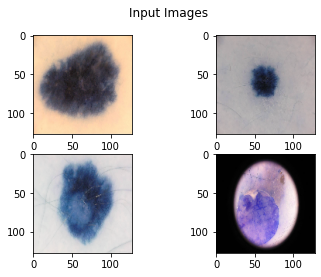

groundtruth


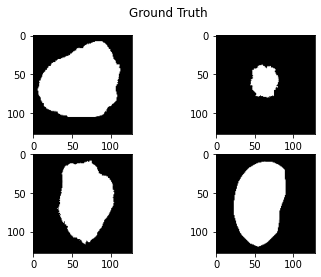

prediction


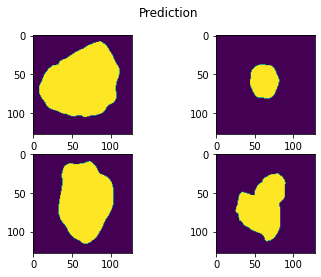

In [38]:
prediction(model=model_unet)

**U-Net++ Training**

unet++_files/data.csv
Train: 1816 - 1816
Valid: 389 - 389
Test: 389 - 389
58889256/58889256 [==============================] - 3s 0us/step
Epoch 1/30
114/114 [==============================] - 398s 3s/step - loss: 0.4395 - dice_coef: 0.5612 - iou: 0.3971 - recall_1: 0.8909 - precision_1: 0.6114 - val_loss: 0.4440 - val_dice_coef: 0.5543 - val_iou: 0.3852 - val_recall_1: 0.6816 - val_precision_1: 0.9002 - lr: 1.0000e-04
Epoch 2/30
114/114 [==============================] - 393s 3s/step - loss: 0.2928 - dice_coef: 0.7077 - iou: 0.5528 - recall_1: 0.9118 - precision_1: 0.7799 - val_loss: 0.4206 - val_dice_coef: 0.5782 - val_iou: 0.4094 - val_recall_1: 0.6998 - val_precision_1: 0.9165 - lr: 1.0000e-04
Epoch 3/30
114/114 [==============================] - 392s 3s/step - loss: 0.2257 - dice_coef: 0.7745 - iou: 0.6363 - recall_1: 0.8959 - precision_1: 0.8374 - val_loss: 0.2556 - val_dice_coef: 0.7433 - val_iou: 0.5933 - val_recall_1: 0.9059 - val_precision_1: 0.8363 - lr: 1.0000e-04
Epoch 4/3

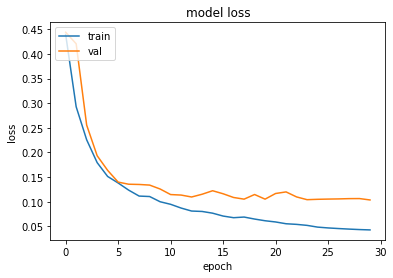

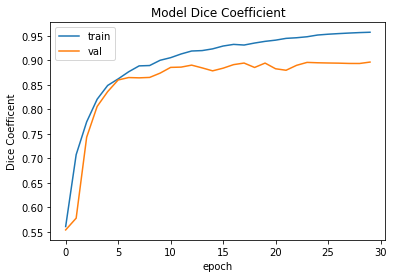

In [39]:
model_unet_plus = train(model_name="unet++")

**U-Net++ Evaluation**

In [40]:
unet_score = evaluate(model_unet_plus)

  0%|          | 0/389 [00:00<?, ?it/s]

1/1 [==============================] - 1s 1s/step


  0%|          | 1/389 [00:01<09:47,  1.51s/it]

1/1 [==============================] - 0s 16ms/step


  1%|          | 2/389 [00:01<05:07,  1.26it/s]

1/1 [==============================] - 0s 16ms/step


  1%|          | 3/389 [00:01<03:19,  1.93it/s]

1/1 [==============================] - 0s 16ms/step


  1%|▏         | 5/389 [00:02<01:51,  3.44it/s]

1/1 [==============================] - 0s 15ms/step


  2%|▏         | 6/389 [00:02<01:51,  3.43it/s]

1/1 [==============================] - 0s 16ms/step


  2%|▏         | 7/389 [00:03<02:32,  2.50it/s]

1/1 [==============================] - 0s 16ms/step


  2%|▏         | 8/389 [00:03<03:02,  2.09it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 9/389 [00:04<03:22,  1.87it/s]

1/1 [==============================] - 0s 16ms/step


  3%|▎         | 11/389 [00:04<02:01,  3.11it/s]

1/1 [==============================] - 0s 16ms/step


  3%|▎         | 12/389 [00:04<01:53,  3.33it/s]

1/1 [==============================] - 0s 16ms/step


  3%|▎         | 13/389 [00:05<02:31,  2.48it/s]

1/1 [==============================] - 0s 16ms/step


  4%|▎         | 14/389 [00:05<02:02,  3.05it/s]

1/1 [==============================] - 0s 16ms/step


  4%|▍         | 16/389 [00:05<01:29,  4.16it/s]

1/1 [==============================] - 0s 16ms/step


  4%|▍         | 17/389 [00:06<01:18,  4.74it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▍         | 18/389 [00:06<01:20,  4.61it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▍         | 19/389 [00:07<02:10,  2.84it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▌         | 20/389 [00:07<01:52,  3.29it/s]

1/1 [==============================] - 0s 16ms/step


  5%|▌         | 21/389 [00:07<02:30,  2.44it/s]

1/1 [==============================] - 0s 16ms/step


  6%|▌         | 22/389 [00:08<03:02,  2.01it/s]

1/1 [==============================] - 0s 16ms/step


  6%|▌         | 23/389 [00:08<02:28,  2.47it/s]

1/1 [==============================] - 0s 17ms/step


  6%|▋         | 25/389 [00:09<02:25,  2.51it/s]

1/1 [==============================] - 0s 16ms/step


  7%|▋         | 26/389 [00:09<02:15,  2.67it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 28/389 [00:10<01:30,  4.00it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 30/389 [00:10<01:48,  3.30it/s]

1/1 [==============================] - 0s 16ms/step


  8%|▊         | 31/389 [00:10<01:39,  3.60it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 32/389 [00:11<01:40,  3.55it/s]

1/1 [==============================] - 0s 17ms/step


  9%|▊         | 34/389 [00:12<01:52,  3.15it/s]

1/1 [==============================] - 0s 17ms/step


  9%|▉         | 35/389 [00:12<01:51,  3.17it/s]

1/1 [==============================] - 0s 16ms/step


  9%|▉         | 36/389 [00:12<01:49,  3.22it/s]

1/1 [==============================] - 0s 17ms/step


 10%|▉         | 38/389 [00:12<01:22,  4.24it/s]

1/1 [==============================] - 0s 16ms/step


 10%|█         | 39/389 [00:13<01:14,  4.70it/s]

1/1 [==============================] - 0s 17ms/step


 11%|█         | 41/389 [00:13<01:09,  4.97it/s]

1/1 [==============================] - 0s 17ms/step


 11%|█         | 42/389 [00:14<01:46,  3.25it/s]

1/1 [==============================] - 0s 17ms/step


 11%|█         | 43/389 [00:14<01:34,  3.65it/s]

1/1 [==============================] - 0s 17ms/step


 11%|█▏        | 44/389 [00:14<01:35,  3.61it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 46/389 [00:14<01:05,  5.20it/s]

1/1 [==============================] - 0s 17ms/step


 12%|█▏        | 48/389 [00:15<01:04,  5.30it/s]

1/1 [==============================] - 0s 17ms/step


 13%|█▎        | 49/389 [00:15<01:40,  3.37it/s]

1/1 [==============================] - 0s 17ms/step


 13%|█▎        | 50/389 [00:15<01:31,  3.72it/s]

1/1 [==============================] - 0s 17ms/step


 13%|█▎        | 51/389 [00:16<02:05,  2.70it/s]

1/1 [==============================] - 0s 17ms/step


 13%|█▎        | 52/389 [00:16<01:56,  2.89it/s]

1/1 [==============================] - 0s 18ms/step


 14%|█▎        | 53/389 [00:17<02:29,  2.24it/s]

1/1 [==============================] - 0s 18ms/step


 14%|█▍        | 54/389 [00:18<02:53,  1.93it/s]

1/1 [==============================] - 0s 16ms/step


 14%|█▍        | 55/389 [00:18<02:20,  2.38it/s]

1/1 [==============================] - 0s 16ms/step


 14%|█▍        | 56/389 [00:18<01:52,  2.97it/s]

1/1 [==============================] - 0s 18ms/step


 15%|█▍        | 57/389 [00:19<02:27,  2.25it/s]

1/1 [==============================] - 0s 18ms/step


 15%|█▍        | 58/389 [00:19<02:13,  2.48it/s]

1/1 [==============================] - 0s 18ms/step


 15%|█▌        | 59/389 [00:19<01:52,  2.93it/s]

1/1 [==============================] - 0s 16ms/step


 15%|█▌        | 60/389 [00:19<01:35,  3.44it/s]

1/1 [==============================] - 0s 16ms/step


 16%|█▌        | 62/389 [00:20<01:46,  3.07it/s]

1/1 [==============================] - 0s 16ms/step


 16%|█▌        | 63/389 [00:20<01:33,  3.48it/s]

1/1 [==============================] - 0s 16ms/step


 17%|█▋        | 65/389 [00:21<01:20,  4.04it/s]

1/1 [==============================] - 0s 16ms/step


 17%|█▋        | 66/389 [00:21<01:54,  2.82it/s]

1/1 [==============================] - 0s 16ms/step


 17%|█▋        | 67/389 [00:22<02:18,  2.32it/s]

1/1 [==============================] - 0s 17ms/step


 17%|█▋        | 68/389 [00:22<02:05,  2.55it/s]

1/1 [==============================] - 0s 16ms/step


 18%|█▊        | 69/389 [00:23<01:47,  2.97it/s]

1/1 [==============================] - 0s 17ms/step


 18%|█▊        | 70/389 [00:23<02:21,  2.26it/s]

1/1 [==============================] - 0s 16ms/step


 18%|█▊        | 71/389 [00:24<01:56,  2.73it/s]

1/1 [==============================] - 0s 17ms/step


 19%|█▊        | 72/389 [00:24<01:52,  2.82it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 74/389 [00:24<01:11,  4.40it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 76/389 [00:24<00:51,  6.07it/s]

1/1 [==============================] - 0s 16ms/step


 20%|██        | 78/389 [00:24<00:41,  7.50it/s]

1/1 [==============================] - 0s 16ms/step


 21%|██        | 80/389 [00:25<00:51,  6.00it/s]

1/1 [==============================] - 0s 17ms/step


 21%|██        | 81/389 [00:25<01:20,  3.83it/s]

1/1 [==============================] - 0s 16ms/step


 21%|██        | 82/389 [00:26<01:14,  4.11it/s]

1/1 [==============================] - 0s 16ms/step


 21%|██▏       | 83/389 [00:26<01:19,  3.83it/s]

1/1 [==============================] - 0s 17ms/step


 22%|██▏       | 84/389 [00:26<01:13,  4.17it/s]

1/1 [==============================] - 0s 17ms/step


 22%|██▏       | 86/389 [00:26<01:05,  4.60it/s]

1/1 [==============================] - 0s 16ms/step


 22%|██▏       | 87/389 [00:27<01:10,  4.28it/s]

1/1 [==============================] - 0s 18ms/step


 23%|██▎       | 88/389 [00:27<01:13,  4.07it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██▎       | 89/389 [00:27<01:16,  3.90it/s]

1/1 [==============================] - 0s 16ms/step


 23%|██▎       | 90/389 [00:28<01:52,  2.66it/s]

1/1 [==============================] - 0s 17ms/step


 24%|██▎       | 92/389 [00:28<01:28,  3.34it/s]

1/1 [==============================] - 0s 16ms/step


 24%|██▍       | 94/389 [00:29<01:02,  4.72it/s]

1/1 [==============================] - 0s 16ms/step


 24%|██▍       | 95/389 [00:29<00:57,  5.13it/s]

1/1 [==============================] - 0s 16ms/step


 25%|██▍       | 96/389 [00:29<01:00,  4.88it/s]

1/1 [==============================] - 0s 16ms/step


 25%|██▌       | 98/389 [00:30<01:19,  3.66it/s]

1/1 [==============================] - 0s 16ms/step


 25%|██▌       | 99/389 [00:30<01:19,  3.65it/s]

1/1 [==============================] - 0s 16ms/step


 26%|██▌       | 100/389 [00:30<01:12,  3.98it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 102/389 [00:30<00:51,  5.58it/s]

1/1 [==============================] - 0s 16ms/step


 26%|██▋       | 103/389 [00:30<00:50,  5.72it/s]

1/1 [==============================] - 0s 16ms/step


 27%|██▋       | 105/389 [00:31<00:51,  5.49it/s]

1/1 [==============================] - 0s 16ms/step


 27%|██▋       | 106/389 [00:31<00:52,  5.42it/s]

1/1 [==============================] - 0s 17ms/step


 28%|██▊       | 107/389 [00:31<01:00,  4.66it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 109/389 [00:31<00:43,  6.42it/s]

1/1 [==============================] - 0s 16ms/step


 29%|██▊       | 111/389 [00:32<00:35,  7.93it/s]

1/1 [==============================] - 0s 17ms/step


 29%|██▉       | 113/389 [00:32<00:34,  7.96it/s]

1/1 [==============================] - 0s 16ms/step


 29%|██▉       | 114/389 [00:32<00:37,  7.31it/s]

1/1 [==============================] - 0s 16ms/step


 30%|██▉       | 115/389 [00:32<00:37,  7.40it/s]

1/1 [==============================] - 0s 16ms/step


 30%|██▉       | 116/389 [00:33<01:12,  3.79it/s]

1/1 [==============================] - 0s 16ms/step


 30%|███       | 117/389 [00:34<01:40,  2.71it/s]

1/1 [==============================] - 0s 16ms/step


 30%|███       | 118/389 [00:34<01:32,  2.92it/s]

1/1 [==============================] - 0s 17ms/step


 31%|███       | 119/389 [00:34<01:20,  3.36it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 121/389 [00:34<00:52,  5.06it/s]

1/1 [==============================] - 0s 16ms/step


 31%|███▏      | 122/389 [00:34<00:50,  5.25it/s]

1/1 [==============================] - 0s 16ms/step


 32%|███▏      | 123/389 [00:35<00:56,  4.68it/s]

1/1 [==============================] - 0s 16ms/step


 32%|███▏      | 124/389 [00:35<01:30,  2.92it/s]

1/1 [==============================] - 0s 17ms/step


 32%|███▏      | 125/389 [00:36<01:25,  3.10it/s]

1/1 [==============================] - 0s 17ms/step


 33%|███▎      | 127/389 [00:36<01:32,  2.82it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 129/389 [00:36<01:03,  4.06it/s]

1/1 [==============================] - 0s 16ms/step


 34%|███▎      | 131/389 [00:37<00:56,  4.55it/s]

1/1 [==============================] - 0s 16ms/step


 34%|███▍      | 132/389 [00:37<00:54,  4.70it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▍      | 133/389 [00:37<00:59,  4.27it/s]

1/1 [==============================] - 0s 17ms/step


 34%|███▍      | 134/389 [00:37<00:56,  4.51it/s]

1/1 [==============================] - 0s 16ms/step


 35%|███▍      | 135/389 [00:38<00:53,  4.77it/s]

1/1 [==============================] - 0s 16ms/step


 35%|███▌      | 137/389 [00:38<00:47,  5.25it/s]

1/1 [==============================] - 0s 16ms/step


 35%|███▌      | 138/389 [00:38<00:51,  4.90it/s]

1/1 [==============================] - 0s 16ms/step


 36%|███▌      | 139/389 [00:38<00:47,  5.24it/s]

1/1 [==============================] - 0s 16ms/step


 36%|███▌      | 140/389 [00:39<00:46,  5.38it/s]

1/1 [==============================] - 0s 17ms/step


 36%|███▌      | 141/389 [00:39<00:52,  4.68it/s]

1/1 [==============================] - 0s 17ms/step


 37%|███▋      | 142/389 [00:39<01:22,  2.98it/s]

1/1 [==============================] - 0s 17ms/step


 37%|███▋      | 143/389 [00:40<01:11,  3.46it/s]

1/1 [==============================] - 0s 17ms/step


 37%|███▋      | 144/389 [00:40<01:02,  3.92it/s]

1/1 [==============================] - 0s 16ms/step


 37%|███▋      | 145/389 [00:40<00:56,  4.31it/s]

1/1 [==============================] - 0s 16ms/step


 38%|███▊      | 146/389 [00:40<00:48,  5.03it/s]

1/1 [==============================] - 0s 16ms/step


 38%|███▊      | 147/389 [00:40<00:54,  4.45it/s]

1/1 [==============================] - 0s 17ms/step


 38%|███▊      | 148/389 [00:41<00:58,  4.15it/s]

1/1 [==============================] - 0s 16ms/step


 38%|███▊      | 149/389 [00:41<00:53,  4.51it/s]

1/1 [==============================] - 0s 16ms/step


 39%|███▊      | 150/389 [00:42<01:25,  2.79it/s]

1/1 [==============================] - 0s 15ms/step


 39%|███▉      | 152/389 [00:42<00:54,  4.39it/s]

1/1 [==============================] - 0s 16ms/step


 39%|███▉      | 153/389 [00:42<00:48,  4.90it/s]

1/1 [==============================] - 0s 17ms/step


 40%|███▉      | 155/389 [00:42<00:37,  6.27it/s]

1/1 [==============================] - 0s 16ms/step


 40%|████      | 156/389 [00:42<00:44,  5.29it/s]

1/1 [==============================] - 0s 16ms/step


 40%|████      | 157/389 [00:42<00:43,  5.37it/s]

1/1 [==============================] - 0s 16ms/step


 41%|████      | 158/389 [00:43<00:46,  5.00it/s]

1/1 [==============================] - 0s 15ms/step


 41%|████      | 160/389 [00:43<00:33,  6.89it/s]

1/1 [==============================] - 0s 17ms/step


 41%|████▏     | 161/389 [00:44<01:03,  3.61it/s]

1/1 [==============================] - 0s 15ms/step


 42%|████▏     | 163/389 [00:44<00:44,  5.10it/s]

1/1 [==============================] - 0s 18ms/step


 42%|████▏     | 164/389 [00:44<01:10,  3.19it/s]

1/1 [==============================] - 0s 17ms/step


 42%|████▏     | 165/389 [00:45<01:10,  3.18it/s]

1/1 [==============================] - 0s 19ms/step


 43%|████▎     | 166/389 [00:45<01:03,  3.53it/s]

1/1 [==============================] - 0s 16ms/step


 43%|████▎     | 167/389 [00:45<01:04,  3.43it/s]

1/1 [==============================] - 0s 19ms/step


 43%|████▎     | 168/389 [00:46<01:29,  2.48it/s]

1/1 [==============================] - 0s 17ms/step


 43%|████▎     | 169/389 [00:46<01:12,  3.04it/s]

1/1 [==============================] - 0s 16ms/step


 44%|████▎     | 170/389 [00:46<01:09,  3.13it/s]

1/1 [==============================] - 0s 17ms/step


 44%|████▍     | 171/389 [00:47<01:07,  3.21it/s]

1/1 [==============================] - 0s 16ms/step


 44%|████▍     | 172/389 [00:47<01:05,  3.32it/s]

1/1 [==============================] - 0s 16ms/step


 44%|████▍     | 173/389 [00:47<00:56,  3.83it/s]

1/1 [==============================] - 0s 16ms/step


 45%|████▍     | 174/389 [00:47<01:00,  3.55it/s]

1/1 [==============================] - 0s 16ms/step


 45%|████▍     | 175/389 [00:48<01:24,  2.55it/s]

1/1 [==============================] - 0s 17ms/step


 45%|████▌     | 176/389 [00:48<01:09,  3.05it/s]

1/1 [==============================] - 0s 16ms/step


 46%|████▌     | 178/389 [00:49<00:47,  4.42it/s]

1/1 [==============================] - 0s 17ms/step


 46%|████▌     | 179/389 [00:49<00:50,  4.15it/s]

1/1 [==============================] - 0s 16ms/step


 46%|████▋     | 180/389 [00:49<01:15,  2.79it/s]

1/1 [==============================] - 0s 15ms/step


 47%|████▋     | 182/389 [00:50<00:48,  4.26it/s]

1/1 [==============================] - 0s 18ms/step


 47%|████▋     | 183/389 [00:50<01:10,  2.94it/s]

1/1 [==============================] - 0s 16ms/step


 47%|████▋     | 184/389 [00:50<00:58,  3.50it/s]

1/1 [==============================] - 0s 16ms/step


 48%|████▊     | 185/389 [00:51<01:20,  2.54it/s]

1/1 [==============================] - 0s 16ms/step


 48%|████▊     | 186/389 [00:51<01:11,  2.83it/s]

1/1 [==============================] - 0s 15ms/step


 48%|████▊     | 187/389 [00:52<01:01,  3.29it/s]

1/1 [==============================] - 0s 16ms/step


 49%|████▊     | 189/389 [00:52<01:06,  3.02it/s]

1/1 [==============================] - 0s 16ms/step


 49%|████▉     | 190/389 [00:53<01:01,  3.22it/s]

1/1 [==============================] - 0s 17ms/step


 49%|████▉     | 192/389 [00:53<01:06,  2.97it/s]

1/1 [==============================] - 0s 17ms/step


 50%|████▉     | 193/389 [00:53<00:59,  3.31it/s]

1/1 [==============================] - 0s 17ms/step


 50%|████▉     | 194/389 [00:54<00:58,  3.34it/s]

1/1 [==============================] - 0s 16ms/step


 50%|█████     | 195/389 [00:54<00:56,  3.42it/s]

1/1 [==============================] - 0s 16ms/step


 50%|█████     | 196/389 [00:54<00:49,  3.86it/s]

1/1 [==============================] - 0s 16ms/step


 51%|█████     | 197/389 [00:54<00:49,  3.89it/s]

1/1 [==============================] - 0s 18ms/step


 51%|█████     | 199/389 [00:55<01:00,  3.13it/s]

1/1 [==============================] - 0s 17ms/step


 52%|█████▏    | 201/389 [00:55<00:42,  4.43it/s]

1/1 [==============================] - 0s 17ms/step


 52%|█████▏    | 203/389 [00:56<00:35,  5.29it/s]

1/1 [==============================] - 0s 16ms/step


 52%|█████▏    | 204/389 [00:56<00:36,  5.01it/s]

1/1 [==============================] - 0s 15ms/step


 53%|█████▎    | 206/389 [00:56<00:27,  6.57it/s]

1/1 [==============================] - 0s 17ms/step


 53%|█████▎    | 207/389 [00:56<00:28,  6.36it/s]

1/1 [==============================] - 0s 17ms/step


 53%|█████▎    | 208/389 [00:56<00:30,  5.91it/s]

1/1 [==============================] - 0s 16ms/step


 54%|█████▎    | 209/389 [00:57<00:52,  3.41it/s]

1/1 [==============================] - 0s 17ms/step


 54%|█████▍    | 210/389 [00:57<00:51,  3.47it/s]

1/1 [==============================] - 0s 16ms/step


 54%|█████▍    | 212/389 [00:58<00:34,  5.07it/s]

1/1 [==============================] - 0s 16ms/step


 55%|█████▍    | 213/389 [00:58<00:38,  4.53it/s]

1/1 [==============================] - 0s 17ms/step


 55%|█████▌    | 215/389 [00:59<00:48,  3.61it/s]

1/1 [==============================] - 0s 16ms/step


 56%|█████▌    | 216/389 [00:59<01:02,  2.76it/s]

1/1 [==============================] - 0s 15ms/step


 56%|█████▌    | 217/389 [00:59<00:52,  3.30it/s]

1/1 [==============================] - 0s 16ms/step


 56%|█████▌    | 218/389 [00:59<00:44,  3.82it/s]

1/1 [==============================] - 0s 16ms/step


 56%|█████▋    | 219/389 [01:00<00:40,  4.21it/s]

1/1 [==============================] - 0s 16ms/step


 57%|█████▋    | 221/389 [01:00<00:27,  6.06it/s]

1/1 [==============================] - 0s 16ms/step


 57%|█████▋    | 222/389 [01:00<00:25,  6.51it/s]

1/1 [==============================] - 0s 16ms/step


 57%|█████▋    | 223/389 [01:00<00:31,  5.35it/s]

1/1 [==============================] - 0s 16ms/step


 58%|█████▊    | 224/389 [01:00<00:30,  5.45it/s]

1/1 [==============================] - 0s 16ms/step


 58%|█████▊    | 225/389 [01:01<00:29,  5.49it/s]

1/1 [==============================] - 0s 16ms/step


 58%|█████▊    | 226/389 [01:01<00:51,  3.15it/s]

1/1 [==============================] - 0s 17ms/step


 58%|█████▊    | 227/389 [01:01<00:44,  3.61it/s]

1/1 [==============================] - 0s 16ms/step


 59%|█████▉    | 229/389 [01:02<00:29,  5.34it/s]

1/1 [==============================] - 0s 16ms/step


 59%|█████▉    | 230/389 [01:02<00:29,  5.38it/s]

1/1 [==============================] - 0s 17ms/step


 59%|█████▉    | 231/389 [01:02<00:28,  5.53it/s]

1/1 [==============================] - 0s 17ms/step


 60%|█████▉    | 233/389 [01:03<00:41,  3.76it/s]

1/1 [==============================] - 0s 17ms/step


 60%|██████    | 234/389 [01:03<00:41,  3.71it/s]

1/1 [==============================] - 0s 16ms/step


 60%|██████    | 235/389 [01:03<00:36,  4.25it/s]

1/1 [==============================] - 0s 17ms/step


 61%|██████    | 237/389 [01:03<00:31,  4.76it/s]

1/1 [==============================] - 0s 16ms/step


 61%|██████▏   | 239/389 [01:04<00:25,  5.94it/s]

1/1 [==============================] - 0s 15ms/step


 62%|██████▏   | 241/389 [01:04<00:23,  6.17it/s]

1/1 [==============================] - 0s 17ms/step


 62%|██████▏   | 242/389 [01:05<00:39,  3.72it/s]

1/1 [==============================] - 0s 17ms/step


 62%|██████▏   | 243/389 [01:05<00:39,  3.71it/s]

1/1 [==============================] - 0s 17ms/step


 63%|██████▎   | 245/389 [01:05<00:30,  4.78it/s]

1/1 [==============================] - 0s 16ms/step


 63%|██████▎   | 246/389 [01:05<00:32,  4.43it/s]

1/1 [==============================] - 0s 17ms/step


 63%|██████▎   | 247/389 [01:06<00:30,  4.67it/s]

1/1 [==============================] - 0s 17ms/step


 64%|██████▍   | 248/389 [01:06<00:47,  3.00it/s]

1/1 [==============================] - 0s 16ms/step


 64%|██████▍   | 249/389 [01:06<00:40,  3.42it/s]

1/1 [==============================] - 0s 17ms/step


 64%|██████▍   | 250/389 [01:07<00:36,  3.81it/s]

1/1 [==============================] - 0s 16ms/step


 65%|██████▍   | 251/389 [01:07<00:32,  4.20it/s]

1/1 [==============================] - 0s 17ms/step


 65%|██████▍   | 252/389 [01:07<00:30,  4.55it/s]

1/1 [==============================] - 0s 17ms/step


 65%|██████▌   | 254/389 [01:07<00:23,  5.64it/s]

1/1 [==============================] - 0s 17ms/step


 66%|██████▌   | 255/389 [01:08<00:40,  3.34it/s]

1/1 [==============================] - 0s 16ms/step


 66%|██████▌   | 256/389 [01:08<00:37,  3.55it/s]

1/1 [==============================] - 0s 16ms/step


 66%|██████▋   | 258/389 [01:08<00:28,  4.62it/s]

1/1 [==============================] - 0s 18ms/step


 67%|██████▋   | 259/389 [01:09<00:27,  4.78it/s]

1/1 [==============================] - 0s 17ms/step


 67%|██████▋   | 260/389 [01:09<00:29,  4.34it/s]

1/1 [==============================] - 0s 18ms/step


 67%|██████▋   | 261/389 [01:09<00:31,  4.06it/s]

1/1 [==============================] - 0s 17ms/step


 67%|██████▋   | 262/389 [01:09<00:32,  3.88it/s]

1/1 [==============================] - 0s 17ms/step


 68%|██████▊   | 263/389 [01:10<00:47,  2.66it/s]

1/1 [==============================] - 0s 16ms/step


 68%|██████▊   | 264/389 [01:10<00:43,  2.85it/s]

1/1 [==============================] - 0s 16ms/step


 68%|██████▊   | 265/389 [01:11<00:54,  2.28it/s]

1/1 [==============================] - 0s 16ms/step


 69%|██████▊   | 267/389 [01:11<00:37,  3.22it/s]

1/1 [==============================] - 0s 16ms/step


 69%|██████▉   | 268/389 [01:12<00:35,  3.42it/s]

1/1 [==============================] - 0s 17ms/step


 69%|██████▉   | 269/389 [01:12<00:30,  3.98it/s]

1/1 [==============================] - 0s 18ms/step


 69%|██████▉   | 270/389 [01:12<00:43,  2.72it/s]

1/1 [==============================] - 0s 17ms/step


 70%|██████▉   | 271/389 [01:13<00:54,  2.17it/s]

1/1 [==============================] - 0s 16ms/step


 70%|██████▉   | 272/389 [01:14<01:00,  1.93it/s]

1/1 [==============================] - 0s 17ms/step


 70%|███████   | 273/389 [01:14<00:51,  2.25it/s]

1/1 [==============================] - 0s 17ms/step


 70%|███████   | 274/389 [01:14<00:42,  2.73it/s]

1/1 [==============================] - 0s 16ms/step


 71%|███████   | 275/389 [01:14<00:38,  2.93it/s]

1/1 [==============================] - 0s 15ms/step


 71%|███████   | 277/389 [01:15<00:27,  4.13it/s]

1/1 [==============================] - 0s 17ms/step


 72%|███████▏  | 279/389 [01:15<00:23,  4.59it/s]

1/1 [==============================] - 0s 16ms/step


 72%|███████▏  | 280/389 [01:16<00:34,  3.12it/s]

1/1 [==============================] - 0s 17ms/step


 72%|███████▏  | 281/389 [01:16<00:30,  3.50it/s]

1/1 [==============================] - 0s 16ms/step


 73%|███████▎  | 283/389 [01:16<00:25,  4.12it/s]

1/1 [==============================] - 0s 19ms/step


 73%|███████▎  | 284/389 [01:17<00:37,  2.81it/s]

1/1 [==============================] - 0s 17ms/step


 74%|███████▎  | 286/389 [01:18<00:37,  2.74it/s]

1/1 [==============================] - 0s 15ms/step


 74%|███████▍  | 288/389 [01:18<00:26,  3.86it/s]

1/1 [==============================] - 0s 16ms/step


 74%|███████▍  | 289/389 [01:18<00:26,  3.75it/s]

1/1 [==============================] - 0s 16ms/step


 75%|███████▍  | 290/389 [01:19<00:36,  2.73it/s]

1/1 [==============================] - 0s 16ms/step


 75%|███████▍  | 291/389 [01:19<00:31,  3.13it/s]

1/1 [==============================] - 0s 16ms/step


 75%|███████▌  | 293/389 [01:19<00:22,  4.20it/s]

1/1 [==============================] - 0s 16ms/step


 76%|███████▌  | 295/389 [01:20<00:20,  4.62it/s]

1/1 [==============================] - 0s 16ms/step


 76%|███████▌  | 296/389 [01:20<00:19,  4.80it/s]

1/1 [==============================] - 0s 17ms/step


 76%|███████▋  | 297/389 [01:21<00:29,  3.09it/s]

1/1 [==============================] - 0s 16ms/step


 77%|███████▋  | 299/389 [01:21<00:22,  4.07it/s]

1/1 [==============================] - 0s 16ms/step


 77%|███████▋  | 300/389 [01:22<00:31,  2.86it/s]

1/1 [==============================] - 0s 17ms/step


 77%|███████▋  | 301/389 [01:22<00:27,  3.24it/s]

1/1 [==============================] - 0s 16ms/step


 78%|███████▊  | 302/389 [01:22<00:23,  3.63it/s]

1/1 [==============================] - 0s 16ms/step


 78%|███████▊  | 303/389 [01:22<00:20,  4.21it/s]

1/1 [==============================] - 0s 16ms/step


 78%|███████▊  | 304/389 [01:22<00:18,  4.54it/s]

1/1 [==============================] - 0s 16ms/step


 78%|███████▊  | 305/389 [01:22<00:17,  4.79it/s]

1/1 [==============================] - 0s 17ms/step


 79%|███████▉  | 307/389 [01:23<00:23,  3.55it/s]

1/1 [==============================] - 0s 16ms/step


 79%|███████▉  | 308/389 [01:23<00:19,  4.13it/s]

1/1 [==============================] - 0s 17ms/step


 80%|███████▉  | 310/389 [01:24<00:23,  3.37it/s]

1/1 [==============================] - 0s 17ms/step


 80%|███████▉  | 311/389 [01:25<00:30,  2.55it/s]

1/1 [==============================] - 0s 16ms/step


 80%|████████  | 313/389 [01:26<00:29,  2.56it/s]

1/1 [==============================] - 0s 17ms/step


 81%|████████  | 314/389 [01:26<00:34,  2.17it/s]

1/1 [==============================] - 0s 17ms/step


 81%|████████  | 315/389 [01:27<00:31,  2.33it/s]

1/1 [==============================] - 0s 15ms/step


 81%|████████▏ | 317/389 [01:27<00:20,  3.51it/s]

1/1 [==============================] - 0s 16ms/step


 82%|████████▏ | 318/389 [01:27<00:26,  2.68it/s]

1/1 [==============================] - 0s 17ms/step


 82%|████████▏ | 320/389 [01:28<00:20,  3.32it/s]

1/1 [==============================] - 0s 16ms/step


 83%|████████▎ | 321/389 [01:28<00:18,  3.64it/s]

1/1 [==============================] - 0s 16ms/step


 83%|████████▎ | 322/389 [01:28<00:16,  3.99it/s]

1/1 [==============================] - 0s 16ms/step


 83%|████████▎ | 323/389 [01:28<00:17,  3.83it/s]

1/1 [==============================] - 0s 18ms/step


 83%|████████▎ | 324/389 [01:29<00:24,  2.67it/s]

1/1 [==============================] - 0s 17ms/step


 84%|████████▎ | 325/389 [01:29<00:21,  2.95it/s]

1/1 [==============================] - 0s 16ms/step


 84%|████████▍ | 327/389 [01:30<00:22,  2.80it/s]

1/1 [==============================] - 0s 16ms/step


 85%|████████▍ | 329/389 [01:31<00:17,  3.44it/s]

1/1 [==============================] - 0s 18ms/step


 85%|████████▍ | 330/389 [01:31<00:15,  3.74it/s]

1/1 [==============================] - 0s 17ms/step


 85%|████████▌ | 331/389 [01:31<00:15,  3.66it/s]

1/1 [==============================] - 0s 17ms/step


 85%|████████▌ | 332/389 [01:31<00:16,  3.46it/s]

1/1 [==============================] - 0s 15ms/step


 86%|████████▌ | 334/389 [01:31<00:10,  5.04it/s]

1/1 [==============================] - 0s 16ms/step


 86%|████████▌ | 335/389 [01:32<00:11,  4.51it/s]

1/1 [==============================] - 0s 17ms/step


 86%|████████▋ | 336/389 [01:32<00:18,  2.94it/s]

1/1 [==============================] - 0s 17ms/step


 87%|████████▋ | 337/389 [01:33<00:16,  3.08it/s]

1/1 [==============================] - 0s 17ms/step


 87%|████████▋ | 338/389 [01:33<00:16,  3.18it/s]

1/1 [==============================] - 0s 16ms/step


 87%|████████▋ | 339/389 [01:33<00:15,  3.23it/s]

1/1 [==============================] - 0s 15ms/step


 88%|████████▊ | 341/389 [01:33<00:09,  4.93it/s]

1/1 [==============================] - 0s 16ms/step


 88%|████████▊ | 343/389 [01:34<00:07,  5.78it/s]

1/1 [==============================] - 0s 16ms/step


 88%|████████▊ | 344/389 [01:34<00:07,  5.98it/s]

1/1 [==============================] - 0s 17ms/step


 89%|████████▊ | 345/389 [01:34<00:07,  5.92it/s]

1/1 [==============================] - 0s 16ms/step


 89%|████████▉ | 347/389 [01:34<00:06,  6.66it/s]

1/1 [==============================] - 0s 16ms/step


 89%|████████▉ | 348/389 [01:35<00:07,  5.45it/s]

1/1 [==============================] - 0s 17ms/step


 90%|████████▉ | 350/389 [01:35<00:10,  3.87it/s]

1/1 [==============================] - 0s 17ms/step


 90%|█████████ | 351/389 [01:36<00:10,  3.77it/s]

1/1 [==============================] - 0s 17ms/step


 90%|█████████ | 352/389 [01:36<00:13,  2.77it/s]

1/1 [==============================] - 0s 16ms/step


 91%|█████████ | 353/389 [01:36<00:11,  3.27it/s]

1/1 [==============================] - 0s 16ms/step


 91%|█████████ | 354/389 [01:37<00:09,  3.68it/s]

1/1 [==============================] - 0s 17ms/step


 91%|█████████▏| 355/389 [01:37<00:08,  4.00it/s]

1/1 [==============================] - 0s 18ms/step


 92%|█████████▏| 356/389 [01:37<00:08,  3.83it/s]

1/1 [==============================] - 0s 16ms/step


 92%|█████████▏| 357/389 [01:37<00:07,  4.19it/s]

1/1 [==============================] - 0s 16ms/step


 92%|█████████▏| 358/389 [01:38<00:11,  2.60it/s]

1/1 [==============================] - 0s 16ms/step


 93%|█████████▎| 360/389 [01:38<00:07,  3.76it/s]

1/1 [==============================] - 0s 17ms/step


 93%|█████████▎| 361/389 [01:39<00:10,  2.72it/s]

1/1 [==============================] - 0s 16ms/step


 93%|█████████▎| 363/389 [01:39<00:07,  3.43it/s]

1/1 [==============================] - 0s 16ms/step


 94%|█████████▎| 364/389 [01:40<00:09,  2.66it/s]

1/1 [==============================] - 0s 16ms/step


 94%|█████████▍| 365/389 [01:40<00:08,  2.81it/s]

1/1 [==============================] - 0s 17ms/step


 94%|█████████▍| 366/389 [01:41<00:10,  2.23it/s]

1/1 [==============================] - 0s 16ms/step


 94%|█████████▍| 367/389 [01:41<00:08,  2.46it/s]

1/1 [==============================] - 0s 16ms/step


 95%|█████████▍| 368/389 [01:42<00:10,  2.06it/s]

1/1 [==============================] - 0s 15ms/step


 95%|█████████▌| 370/389 [01:42<00:05,  3.28it/s]

1/1 [==============================] - 0s 19ms/step


 95%|█████████▌| 371/389 [01:42<00:04,  3.61it/s]

1/1 [==============================] - 0s 16ms/step


 96%|█████████▌| 372/389 [01:42<00:04,  3.97it/s]

1/1 [==============================] - 0s 17ms/step


 96%|█████████▌| 373/389 [01:43<00:03,  4.33it/s]

1/1 [==============================] - 0s 17ms/step


 96%|█████████▌| 374/389 [01:43<00:03,  4.53it/s]

1/1 [==============================] - 0s 17ms/step


 97%|█████████▋| 376/389 [01:43<00:02,  4.93it/s]

1/1 [==============================] - 0s 17ms/step


 97%|█████████▋| 377/389 [01:43<00:02,  5.34it/s]

1/1 [==============================] - 0s 16ms/step


 97%|█████████▋| 378/389 [01:44<00:02,  4.73it/s]

1/1 [==============================] - 0s 17ms/step


 97%|█████████▋| 379/389 [01:44<00:02,  4.95it/s]

1/1 [==============================] - 0s 16ms/step


 98%|█████████▊| 380/389 [01:44<00:02,  4.37it/s]

1/1 [==============================] - 0s 15ms/step


 98%|█████████▊| 382/389 [01:44<00:01,  6.30it/s]

1/1 [==============================] - 0s 16ms/step


 99%|█████████▊| 384/389 [01:45<00:00,  6.31it/s]

1/1 [==============================] - 0s 16ms/step


 99%|█████████▉| 385/389 [01:45<00:00,  6.15it/s]

1/1 [==============================] - 0s 16ms/step


 99%|█████████▉| 387/389 [01:45<00:00,  4.13it/s]

1/1 [==============================] - 0s 17ms/step


100%|██████████| 389/389 [01:46<00:00,  3.66it/s]

--------------------------------------------------------------------------
Key Metrics
Accuracy: 0.96516
F1: 0.90895
Jaccard: 0.84321
Recall: 0.92123
Precision: 0.97202
IOU: 0.84321


**UNET++ Prediction**

1/1 [==============================] - 0s 14ms/step
images


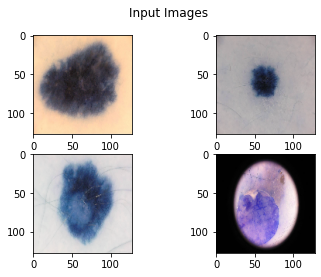

groundtruth


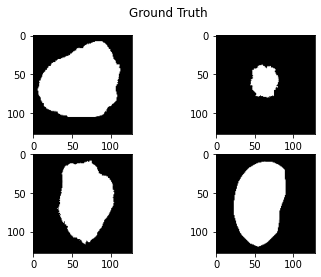

prediction


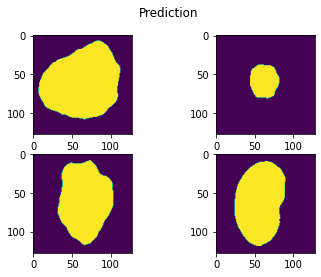

In [41]:
prediction(model=model_unet_plus)

**Attention U-Net Training**

attention_unet_files/data.csv
Train: 1816 - 1816
Valid: 389 - 389
Test: 389 - 389
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_24 (Conv2D)             (None, 128, 128, 16  448         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 128, 128, 16  64         ['conv2d_24[0][0]']              
 alization

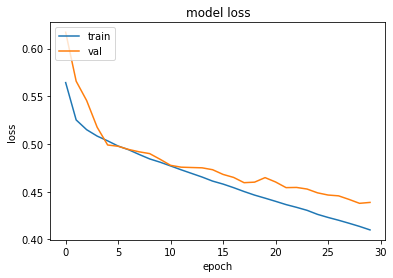

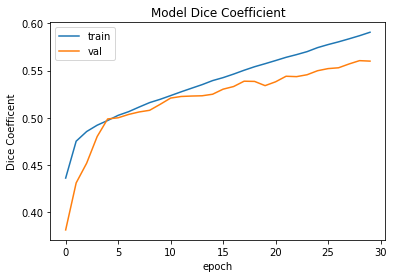

In [42]:
model_attention_unet = train("attention_unet")

**Attention U-Net Evaluation**

In [43]:
model_attention_score = evaluate(model_attention_unet)

  0%|          | 0/389 [00:00<?, ?it/s]

1/1 [==============================] - 1s 1s/step


  0%|          | 1/389 [00:01<07:38,  1.18s/it]

1/1 [==============================] - 0s 18ms/step


  1%|          | 2/389 [00:01<04:17,  1.50it/s]

1/1 [==============================] - 0s 19ms/step


  1%|          | 3/389 [00:01<02:54,  2.21it/s]

1/1 [==============================] - 0s 19ms/step


  1%|▏         | 5/389 [00:01<01:41,  3.77it/s]

1/1 [==============================] - 0s 19ms/step


  2%|▏         | 6/389 [00:02<01:45,  3.63it/s]

1/1 [==============================] - 0s 19ms/step


  2%|▏         | 7/389 [00:02<02:28,  2.57it/s]

1/1 [==============================] - 0s 19ms/step


  2%|▏         | 8/389 [00:03<03:00,  2.11it/s]

1/1 [==============================] - 0s 19ms/step


  2%|▏         | 9/389 [00:04<03:21,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


  3%|▎         | 11/389 [00:04<02:01,  3.12it/s]

1/1 [==============================] - 0s 18ms/step


  3%|▎         | 12/389 [00:04<01:53,  3.33it/s]

1/1 [==============================] - 0s 19ms/step


  3%|▎         | 13/389 [00:05<02:31,  2.49it/s]

1/1 [==============================] - 0s 18ms/step


  4%|▎         | 14/389 [00:05<02:02,  3.06it/s]

1/1 [==============================] - 0s 19ms/step


  4%|▍         | 16/389 [00:05<01:29,  4.18it/s]

1/1 [==============================] - 0s 19ms/step


  4%|▍         | 17/389 [00:05<01:19,  4.69it/s]

1/1 [==============================] - 0s 19ms/step


  5%|▍         | 18/389 [00:06<01:21,  4.57it/s]

1/1 [==============================] - 0s 19ms/step


  5%|▍         | 19/389 [00:06<02:09,  2.87it/s]

1/1 [==============================] - 0s 19ms/step


  5%|▌         | 20/389 [00:06<01:51,  3.31it/s]

1/1 [==============================] - 0s 19ms/step


  5%|▌         | 21/389 [00:07<02:30,  2.44it/s]

1/1 [==============================] - 0s 19ms/step


  6%|▌         | 22/389 [00:08<03:02,  2.01it/s]

1/1 [==============================] - 0s 19ms/step


  6%|▌         | 23/389 [00:08<02:27,  2.48it/s]

1/1 [==============================] - 0s 19ms/step


  6%|▋         | 25/389 [00:09<02:24,  2.52it/s]

1/1 [==============================] - 0s 19ms/step


  7%|▋         | 26/389 [00:09<02:15,  2.68it/s]

1/1 [==============================] - 0s 20ms/step


  7%|▋         | 28/389 [00:09<01:30,  4.00it/s]

1/1 [==============================] - 0s 19ms/step


  8%|▊         | 30/389 [00:10<01:50,  3.26it/s]

1/1 [==============================] - 0s 18ms/step


  8%|▊         | 31/389 [00:10<01:40,  3.56it/s]

1/1 [==============================] - 0s 20ms/step


  8%|▊         | 32/389 [00:11<01:41,  3.52it/s]

1/1 [==============================] - 0s 20ms/step


  9%|▊         | 34/389 [00:11<01:53,  3.14it/s]

1/1 [==============================] - 0s 20ms/step


  9%|▉         | 35/389 [00:12<01:51,  3.19it/s]

1/1 [==============================] - 0s 19ms/step


  9%|▉         | 36/389 [00:12<01:49,  3.23it/s]

1/1 [==============================] - 0s 19ms/step


 10%|▉         | 38/389 [00:12<01:22,  4.24it/s]

1/1 [==============================] - 0s 20ms/step


 10%|█         | 39/389 [00:12<01:14,  4.68it/s]

1/1 [==============================] - 0s 19ms/step


 11%|█         | 41/389 [00:13<01:11,  4.88it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█         | 42/389 [00:13<01:47,  3.23it/s]

1/1 [==============================] - 0s 19ms/step


 11%|█         | 43/389 [00:13<01:34,  3.65it/s]

1/1 [==============================] - 0s 20ms/step


 11%|█▏        | 44/389 [00:14<01:37,  3.56it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█▏        | 46/389 [00:14<01:06,  5.13it/s]

1/1 [==============================] - 0s 19ms/step


 12%|█▏        | 48/389 [00:14<01:05,  5.19it/s]

1/1 [==============================] - 0s 19ms/step


 13%|█▎        | 49/389 [00:15<01:42,  3.31it/s]

1/1 [==============================] - 0s 19ms/step


 13%|█▎        | 50/389 [00:15<01:32,  3.65it/s]

1/1 [==============================] - 0s 19ms/step


 13%|█▎        | 51/389 [00:16<02:05,  2.69it/s]

1/1 [==============================] - 0s 19ms/step


 13%|█▎        | 52/389 [00:16<01:57,  2.86it/s]

1/1 [==============================] - 0s 19ms/step


 14%|█▎        | 53/389 [00:17<02:30,  2.24it/s]

1/1 [==============================] - 0s 19ms/step


 14%|█▍        | 54/389 [00:18<02:54,  1.92it/s]

1/1 [==============================] - 0s 20ms/step


 14%|█▍        | 55/389 [00:18<02:22,  2.35it/s]

1/1 [==============================] - 0s 20ms/step


 14%|█▍        | 56/389 [00:18<01:53,  2.94it/s]

1/1 [==============================] - 0s 19ms/step


 15%|█▍        | 57/389 [00:19<02:29,  2.23it/s]

1/1 [==============================] - 0s 20ms/step


 15%|█▍        | 58/389 [00:19<02:12,  2.49it/s]

1/1 [==============================] - 0s 19ms/step


 15%|█▌        | 59/389 [00:19<01:50,  2.97it/s]

1/1 [==============================] - 0s 19ms/step


 15%|█▌        | 60/389 [00:19<01:35,  3.45it/s]

1/1 [==============================] - 0s 19ms/step


 16%|█▌        | 62/389 [00:20<01:48,  3.03it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█▌        | 63/389 [00:20<01:35,  3.41it/s]

1/1 [==============================] - 0s 19ms/step


 17%|█▋        | 65/389 [00:21<01:20,  4.00it/s]

1/1 [==============================] - 0s 19ms/step


 17%|█▋        | 66/389 [00:21<01:54,  2.82it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█▋        | 67/389 [00:22<02:19,  2.31it/s]

1/1 [==============================] - 0s 19ms/step


 17%|█▋        | 68/389 [00:22<02:05,  2.55it/s]

1/1 [==============================] - 0s 19ms/step


 18%|█▊        | 69/389 [00:22<01:46,  2.99it/s]

1/1 [==============================] - 0s 19ms/step


 18%|█▊        | 70/389 [00:23<02:20,  2.27it/s]

1/1 [==============================] - 0s 20ms/step


 18%|█▊        | 71/389 [00:23<01:56,  2.73it/s]

1/1 [==============================] - 0s 19ms/step


 19%|█▊        | 72/389 [00:24<01:52,  2.81it/s]

1/1 [==============================] - 0s 20ms/step


 19%|█▉        | 74/389 [00:24<01:12,  4.35it/s]

1/1 [==============================] - 0s 19ms/step


 20%|█▉        | 76/389 [00:24<00:52,  5.98it/s]

1/1 [==============================] - 0s 19ms/step


 20%|██        | 78/389 [00:24<00:41,  7.43it/s]

1/1 [==============================] - 0s 20ms/step


 21%|██        | 80/389 [00:25<00:52,  5.89it/s]

1/1 [==============================] - 0s 20ms/step


 21%|██        | 81/389 [00:25<01:21,  3.79it/s]

1/1 [==============================] - 0s 18ms/step


 21%|██        | 82/389 [00:25<01:15,  4.08it/s]

1/1 [==============================] - 0s 19ms/step


 21%|██▏       | 83/389 [00:26<01:20,  3.79it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 84/389 [00:26<01:14,  4.07it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 86/389 [00:26<01:08,  4.45it/s]

1/1 [==============================] - 0s 19ms/step


 22%|██▏       | 87/389 [00:27<01:15,  4.02it/s]

1/1 [==============================] - 0s 20ms/step


 23%|██▎       | 88/389 [00:27<01:19,  3.80it/s]

1/1 [==============================] - 0s 20ms/step


 23%|██▎       | 89/389 [00:27<01:23,  3.60it/s]

1/1 [==============================] - 0s 19ms/step


 23%|██▎       | 90/389 [00:28<01:57,  2.55it/s]

1/1 [==============================] - 0s 19ms/step


 24%|██▎       | 92/389 [00:28<01:31,  3.23it/s]

1/1 [==============================] - 0s 17ms/step


 24%|██▍       | 94/389 [00:28<01:03,  4.62it/s]

1/1 [==============================] - 0s 19ms/step


 24%|██▍       | 95/389 [00:29<00:58,  5.04it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▍       | 96/389 [00:29<01:00,  4.86it/s]

1/1 [==============================] - 0s 19ms/step


 25%|██▌       | 98/389 [00:30<01:19,  3.66it/s]

1/1 [==============================] - 0s 19ms/step


 25%|██▌       | 99/389 [00:30<01:19,  3.64it/s]

1/1 [==============================] - 0s 19ms/step


 26%|██▌       | 100/389 [00:30<01:12,  3.97it/s]

1/1 [==============================] - 0s 17ms/step


 26%|██▌       | 102/389 [00:30<00:51,  5.56it/s]

1/1 [==============================] - 0s 18ms/step


 26%|██▋       | 103/389 [00:30<00:50,  5.67it/s]

1/1 [==============================] - 0s 18ms/step


 27%|██▋       | 105/389 [00:31<00:52,  5.46it/s]

1/1 [==============================] - 0s 19ms/step


 27%|██▋       | 106/389 [00:31<00:51,  5.49it/s]

1/1 [==============================] - 0s 19ms/step


 28%|██▊       | 107/389 [00:31<00:58,  4.80it/s]

1/1 [==============================] - 0s 19ms/step


 28%|██▊       | 109/389 [00:31<00:42,  6.57it/s]

1/1 [==============================] - 0s 17ms/step


 29%|██▊       | 111/389 [00:32<00:34,  8.16it/s]

1/1 [==============================] - 0s 18ms/step


 29%|██▉       | 113/389 [00:32<00:34,  8.08it/s]

1/1 [==============================] - 0s 18ms/step


 29%|██▉       | 114/389 [00:32<00:36,  7.44it/s]

1/1 [==============================] - 0s 19ms/step


 30%|██▉       | 115/389 [00:32<00:36,  7.41it/s]

1/1 [==============================] - 0s 19ms/step


 30%|██▉       | 116/389 [00:33<01:12,  3.75it/s]

1/1 [==============================] - 0s 19ms/step


 30%|███       | 117/389 [00:33<01:40,  2.71it/s]

1/1 [==============================] - 0s 18ms/step


 30%|███       | 118/389 [00:34<01:33,  2.91it/s]

1/1 [==============================] - 0s 19ms/step


 31%|███       | 119/389 [00:34<01:20,  3.33it/s]

1/1 [==============================] - 0s 20ms/step


 31%|███       | 121/389 [00:34<00:53,  4.97it/s]

1/1 [==============================] - 0s 18ms/step


 31%|███▏      | 122/389 [00:34<00:52,  5.10it/s]

1/1 [==============================] - 0s 19ms/step


 32%|███▏      | 123/389 [00:35<00:58,  4.55it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 124/389 [00:35<01:31,  2.88it/s]

1/1 [==============================] - 0s 19ms/step


 32%|███▏      | 125/389 [00:35<01:26,  3.04it/s]

1/1 [==============================] - 0s 20ms/step


 33%|███▎      | 127/389 [00:36<01:34,  2.78it/s]

1/1 [==============================] - 0s 18ms/step


 33%|███▎      | 129/389 [00:36<01:04,  4.02it/s]

1/1 [==============================] - 0s 18ms/step


 34%|███▎      | 131/389 [00:37<00:56,  4.54it/s]

1/1 [==============================] - 0s 18ms/step


 34%|███▍      | 132/389 [00:37<00:55,  4.67it/s]

1/1 [==============================] - 0s 19ms/step


 34%|███▍      | 133/389 [00:37<00:59,  4.31it/s]

1/1 [==============================] - 0s 21ms/step


 34%|███▍      | 134/389 [00:37<00:57,  4.44it/s]

1/1 [==============================] - 0s 18ms/step


 35%|███▍      | 135/389 [00:38<00:54,  4.66it/s]

1/1 [==============================] - 0s 19ms/step


 35%|███▌      | 137/389 [00:38<00:48,  5.22it/s]

1/1 [==============================] - 0s 18ms/step


 35%|███▌      | 138/389 [00:38<00:51,  4.90it/s]

1/1 [==============================] - 0s 19ms/step


 36%|███▌      | 139/389 [00:38<00:47,  5.25it/s]

1/1 [==============================] - 0s 19ms/step


 36%|███▌      | 140/389 [00:39<00:45,  5.46it/s]

1/1 [==============================] - 0s 18ms/step


 36%|███▌      | 141/389 [00:39<00:52,  4.75it/s]

1/1 [==============================] - 0s 18ms/step


 37%|███▋      | 142/389 [00:39<01:21,  3.01it/s]

1/1 [==============================] - 0s 18ms/step


 37%|███▋      | 143/389 [00:40<01:10,  3.49it/s]

1/1 [==============================] - 0s 18ms/step


 37%|███▋      | 144/389 [00:40<01:02,  3.94it/s]

1/1 [==============================] - 0s 20ms/step


 37%|███▋      | 145/389 [00:40<00:56,  4.32it/s]

1/1 [==============================] - 0s 18ms/step


 38%|███▊      | 146/389 [00:40<00:47,  5.06it/s]

1/1 [==============================] - 0s 18ms/step


 38%|███▊      | 147/389 [00:40<00:53,  4.51it/s]

1/1 [==============================] - 0s 19ms/step


 38%|███▊      | 148/389 [00:41<00:58,  4.15it/s]

1/1 [==============================] - 0s 19ms/step


 38%|███▊      | 149/389 [00:41<00:53,  4.50it/s]

1/1 [==============================] - 0s 19ms/step


 39%|███▊      | 150/389 [00:42<01:26,  2.78it/s]

1/1 [==============================] - 0s 18ms/step


 39%|███▉      | 152/389 [00:42<00:54,  4.36it/s]

1/1 [==============================] - 0s 18ms/step


 39%|███▉      | 153/389 [00:42<00:48,  4.88it/s]

1/1 [==============================] - 0s 19ms/step


 40%|███▉      | 155/389 [00:42<00:37,  6.21it/s]

1/1 [==============================] - 0s 19ms/step


 40%|████      | 156/389 [00:42<00:45,  5.17it/s]

1/1 [==============================] - 0s 19ms/step


 40%|████      | 157/389 [00:42<00:44,  5.27it/s]

1/1 [==============================] - 0s 19ms/step


 41%|████      | 158/389 [00:43<00:47,  4.89it/s]

1/1 [==============================] - 0s 18ms/step


 41%|████      | 160/389 [00:43<00:34,  6.73it/s]

1/1 [==============================] - 0s 19ms/step


 41%|████▏     | 161/389 [00:44<01:03,  3.58it/s]

1/1 [==============================] - 0s 20ms/step


 42%|████▏     | 163/389 [00:44<00:45,  4.97it/s]

1/1 [==============================] - 0s 18ms/step


 42%|████▏     | 164/389 [00:44<01:08,  3.30it/s]

1/1 [==============================] - 0s 18ms/step


 42%|████▏     | 165/389 [00:45<01:07,  3.32it/s]

1/1 [==============================] - 0s 19ms/step


 43%|████▎     | 166/389 [00:45<00:59,  3.73it/s]

1/1 [==============================] - 0s 18ms/step


 43%|████▎     | 167/389 [00:45<01:00,  3.67it/s]

1/1 [==============================] - 0s 19ms/step


 43%|████▎     | 168/389 [00:46<01:25,  2.60it/s]

1/1 [==============================] - 0s 19ms/step


 43%|████▎     | 169/389 [00:46<01:09,  3.19it/s]

1/1 [==============================] - 0s 19ms/step


 44%|████▎     | 170/389 [00:46<01:06,  3.30it/s]

1/1 [==============================] - 0s 19ms/step


 44%|████▍     | 171/389 [00:47<01:05,  3.32it/s]

1/1 [==============================] - 0s 19ms/step


 44%|████▍     | 172/389 [00:47<01:04,  3.39it/s]

1/1 [==============================] - 0s 19ms/step


 44%|████▍     | 173/389 [00:47<00:55,  3.88it/s]

1/1 [==============================] - 0s 19ms/step


 45%|████▍     | 174/389 [00:47<00:59,  3.61it/s]

1/1 [==============================] - 0s 19ms/step


 45%|████▍     | 175/389 [00:48<01:24,  2.54it/s]

1/1 [==============================] - 0s 19ms/step


 45%|████▌     | 176/389 [00:48<01:09,  3.06it/s]

1/1 [==============================] - 0s 18ms/step


 46%|████▌     | 178/389 [00:48<00:47,  4.44it/s]

1/1 [==============================] - 0s 19ms/step


 46%|████▌     | 179/389 [00:49<00:50,  4.14it/s]

1/1 [==============================] - 0s 19ms/step


 46%|████▋     | 180/389 [00:49<01:15,  2.78it/s]

1/1 [==============================] - 0s 18ms/step


 47%|████▋     | 182/389 [00:49<00:48,  4.23it/s]

1/1 [==============================] - 0s 18ms/step


 47%|████▋     | 183/389 [00:50<01:10,  2.92it/s]

1/1 [==============================] - 0s 18ms/step


 47%|████▋     | 184/389 [00:50<00:58,  3.49it/s]

1/1 [==============================] - 0s 20ms/step


 48%|████▊     | 185/389 [00:51<01:20,  2.54it/s]

1/1 [==============================] - 0s 19ms/step


 48%|████▊     | 186/389 [00:51<01:11,  2.82it/s]

1/1 [==============================] - 0s 19ms/step


 48%|████▊     | 187/389 [00:51<01:01,  3.29it/s]

1/1 [==============================] - 0s 20ms/step


 49%|████▊     | 189/389 [00:52<01:06,  3.01it/s]

1/1 [==============================] - 0s 19ms/step


 49%|████▉     | 190/389 [00:52<01:01,  3.21it/s]

1/1 [==============================] - 0s 19ms/step


 49%|████▉     | 192/389 [00:53<01:06,  2.97it/s]

1/1 [==============================] - 0s 19ms/step


 50%|████▉     | 193/389 [00:53<00:59,  3.30it/s]

1/1 [==============================] - 0s 18ms/step


 50%|████▉     | 194/389 [00:54<00:58,  3.32it/s]

1/1 [==============================] - 0s 18ms/step


 50%|█████     | 195/389 [00:54<00:57,  3.39it/s]

1/1 [==============================] - 0s 18ms/step


 50%|█████     | 196/389 [00:54<00:50,  3.83it/s]

1/1 [==============================] - 0s 19ms/step


 51%|█████     | 197/389 [00:54<00:49,  3.90it/s]

1/1 [==============================] - 0s 19ms/step


 51%|█████     | 199/389 [00:55<01:00,  3.15it/s]

1/1 [==============================] - 0s 17ms/step


 52%|█████▏    | 201/389 [00:55<00:41,  4.49it/s]

1/1 [==============================] - 0s 19ms/step


 52%|█████▏    | 203/389 [00:56<00:35,  5.30it/s]

1/1 [==============================] - 0s 20ms/step


 52%|█████▏    | 204/389 [00:56<00:36,  5.01it/s]

1/1 [==============================] - 0s 18ms/step


 53%|█████▎    | 206/389 [00:56<00:28,  6.49it/s]

1/1 [==============================] - 0s 19ms/step


 53%|█████▎    | 207/389 [00:56<00:28,  6.29it/s]

1/1 [==============================] - 0s 21ms/step


 53%|█████▎    | 208/389 [00:56<00:29,  6.07it/s]

1/1 [==============================] - 0s 20ms/step


 54%|█████▎    | 209/389 [00:57<00:55,  3.23it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 210/389 [00:57<00:56,  3.20it/s]

1/1 [==============================] - 0s 21ms/step


 54%|█████▍    | 212/389 [00:58<00:38,  4.65it/s]

1/1 [==============================] - 0s 21ms/step


 55%|█████▍    | 213/389 [00:58<00:43,  4.09it/s]

1/1 [==============================] - 0s 19ms/step


 55%|█████▌    | 215/389 [00:59<00:51,  3.40it/s]

1/1 [==============================] - 0s 18ms/step


 56%|█████▌    | 216/389 [00:59<01:04,  2.67it/s]

1/1 [==============================] - 0s 18ms/step


 56%|█████▌    | 217/389 [00:59<00:53,  3.21it/s]

1/1 [==============================] - 0s 19ms/step


 56%|█████▌    | 218/389 [00:59<00:45,  3.75it/s]

1/1 [==============================] - 0s 19ms/step


 56%|█████▋    | 219/389 [01:00<00:41,  4.11it/s]

1/1 [==============================] - 0s 18ms/step


 57%|█████▋    | 221/389 [01:00<00:28,  5.89it/s]

1/1 [==============================] - 0s 18ms/step


 57%|█████▋    | 222/389 [01:00<00:26,  6.35it/s]

1/1 [==============================] - 0s 18ms/step


 57%|█████▋    | 223/389 [01:00<00:31,  5.20it/s]

1/1 [==============================] - 0s 19ms/step


 58%|█████▊    | 224/389 [01:00<00:30,  5.34it/s]

1/1 [==============================] - 0s 19ms/step


 58%|█████▊    | 225/389 [01:01<00:30,  5.41it/s]

1/1 [==============================] - 0s 20ms/step


 58%|█████▊    | 226/389 [01:01<00:52,  3.12it/s]

1/1 [==============================] - 0s 19ms/step


 58%|█████▊    | 227/389 [01:01<00:45,  3.58it/s]

1/1 [==============================] - 0s 18ms/step


 59%|█████▉    | 229/389 [01:02<00:29,  5.37it/s]

1/1 [==============================] - 0s 19ms/step


 59%|█████▉    | 230/389 [01:02<00:29,  5.41it/s]

1/1 [==============================] - 0s 19ms/step


 59%|█████▉    | 231/389 [01:02<00:28,  5.58it/s]

1/1 [==============================] - 0s 19ms/step


 60%|█████▉    | 233/389 [01:03<00:41,  3.76it/s]

1/1 [==============================] - 0s 20ms/step


 60%|██████    | 234/389 [01:03<00:42,  3.65it/s]

1/1 [==============================] - 0s 18ms/step


 60%|██████    | 235/389 [01:03<00:36,  4.19it/s]

1/1 [==============================] - 0s 20ms/step


 61%|██████    | 237/389 [01:03<00:32,  4.69it/s]

1/1 [==============================] - 0s 19ms/step


 61%|██████▏   | 239/389 [01:04<00:25,  5.87it/s]

1/1 [==============================] - 0s 19ms/step


 62%|██████▏   | 241/389 [01:04<00:24,  6.05it/s]

1/1 [==============================] - 0s 18ms/step


 62%|██████▏   | 242/389 [01:05<00:39,  3.73it/s]

1/1 [==============================] - 0s 19ms/step


 62%|██████▏   | 243/389 [01:05<00:39,  3.72it/s]

1/1 [==============================] - 0s 19ms/step


 63%|██████▎   | 245/389 [01:05<00:30,  4.77it/s]

1/1 [==============================] - 0s 21ms/step


 63%|██████▎   | 246/389 [01:05<00:33,  4.31it/s]

1/1 [==============================] - 0s 20ms/step


 63%|██████▎   | 247/389 [01:06<00:31,  4.55it/s]

1/1 [==============================] - 0s 20ms/step


 64%|██████▍   | 248/389 [01:06<00:47,  2.97it/s]

1/1 [==============================] - 0s 19ms/step


 64%|██████▍   | 249/389 [01:07<00:41,  3.40it/s]

1/1 [==============================] - 0s 19ms/step


 64%|██████▍   | 250/389 [01:07<00:36,  3.79it/s]

1/1 [==============================] - 0s 19ms/step


 65%|██████▍   | 251/389 [01:07<00:33,  4.17it/s]

1/1 [==============================] - 0s 19ms/step


 65%|██████▍   | 252/389 [01:07<00:30,  4.51it/s]

1/1 [==============================] - 0s 18ms/step


 65%|██████▌   | 254/389 [01:07<00:24,  5.56it/s]

1/1 [==============================] - 0s 19ms/step


 66%|██████▌   | 255/389 [01:08<00:40,  3.28it/s]

1/1 [==============================] - 0s 20ms/step


 66%|██████▌   | 256/389 [01:08<00:38,  3.47it/s]

1/1 [==============================] - 0s 19ms/step


 66%|██████▋   | 258/389 [01:09<00:28,  4.56it/s]

1/1 [==============================] - 0s 20ms/step


 67%|██████▋   | 259/389 [01:09<00:27,  4.79it/s]

1/1 [==============================] - 0s 19ms/step


 67%|██████▋   | 260/389 [01:09<00:29,  4.37it/s]

1/1 [==============================] - 0s 19ms/step


 67%|██████▋   | 261/389 [01:09<00:31,  4.07it/s]

1/1 [==============================] - 0s 19ms/step


 67%|██████▋   | 262/389 [01:10<00:32,  3.89it/s]

1/1 [==============================] - 0s 19ms/step


 68%|██████▊   | 263/389 [01:10<00:47,  2.68it/s]

1/1 [==============================] - 0s 18ms/step


 68%|██████▊   | 264/389 [01:11<00:43,  2.85it/s]

1/1 [==============================] - 0s 19ms/step


 68%|██████▊   | 265/389 [01:11<00:54,  2.28it/s]

1/1 [==============================] - 0s 19ms/step


 69%|██████▊   | 267/389 [01:11<00:37,  3.23it/s]

1/1 [==============================] - 0s 19ms/step


 69%|██████▉   | 268/389 [01:12<00:35,  3.45it/s]

1/1 [==============================] - 0s 19ms/step


 69%|██████▉   | 269/389 [01:12<00:29,  4.02it/s]

1/1 [==============================] - 0s 19ms/step


 69%|██████▉   | 270/389 [01:13<00:43,  2.72it/s]

1/1 [==============================] - 0s 19ms/step


 70%|██████▉   | 271/389 [01:13<00:54,  2.18it/s]

1/1 [==============================] - 0s 20ms/step


 70%|██████▉   | 272/389 [01:14<01:00,  1.93it/s]

1/1 [==============================] - 0s 19ms/step


 70%|███████   | 273/389 [01:14<00:51,  2.25it/s]

1/1 [==============================] - 0s 18ms/step


 70%|███████   | 274/389 [01:14<00:42,  2.72it/s]

1/1 [==============================] - 0s 18ms/step


 71%|███████   | 275/389 [01:15<00:38,  2.93it/s]

1/1 [==============================] - 0s 19ms/step


 71%|███████   | 277/389 [01:15<00:27,  4.11it/s]

1/1 [==============================] - 0s 19ms/step


 72%|███████▏  | 279/389 [01:15<00:24,  4.57it/s]

1/1 [==============================] - 0s 20ms/step


 72%|███████▏  | 280/389 [01:16<00:35,  3.09it/s]

1/1 [==============================] - 0s 19ms/step


 72%|███████▏  | 281/389 [01:16<00:31,  3.47it/s]

1/1 [==============================] - 0s 18ms/step


 73%|███████▎  | 283/389 [01:16<00:25,  4.10it/s]

1/1 [==============================] - 0s 19ms/step


 73%|███████▎  | 284/389 [01:17<00:36,  2.86it/s]

1/1 [==============================] - 0s 21ms/step


 74%|███████▎  | 286/389 [01:18<00:37,  2.77it/s]

1/1 [==============================] - 0s 18ms/step


 74%|███████▍  | 288/389 [01:18<00:26,  3.87it/s]

1/1 [==============================] - 0s 19ms/step


 74%|███████▍  | 289/389 [01:18<00:26,  3.79it/s]

1/1 [==============================] - 0s 19ms/step


 75%|███████▍  | 290/389 [01:19<00:36,  2.72it/s]

1/1 [==============================] - 0s 19ms/step


 75%|███████▍  | 291/389 [01:19<00:31,  3.12it/s]

1/1 [==============================] - 0s 20ms/step


 75%|███████▌  | 293/389 [01:20<00:23,  4.10it/s]

1/1 [==============================] - 0s 20ms/step


 76%|███████▌  | 295/389 [01:20<00:21,  4.46it/s]

1/1 [==============================] - 0s 21ms/step


 76%|███████▌  | 296/389 [01:20<00:20,  4.57it/s]

1/1 [==============================] - 0s 19ms/step


 76%|███████▋  | 297/389 [01:21<00:30,  2.99it/s]

1/1 [==============================] - 0s 19ms/step


 77%|███████▋  | 299/389 [01:21<00:22,  3.93it/s]

1/1 [==============================] - 0s 19ms/step


 77%|███████▋  | 300/389 [01:22<00:32,  2.76it/s]

1/1 [==============================] - 0s 19ms/step


 77%|███████▋  | 301/389 [01:22<00:28,  3.14it/s]

1/1 [==============================] - 0s 19ms/step


 78%|███████▊  | 302/389 [01:22<00:24,  3.53it/s]

1/1 [==============================] - 0s 19ms/step


 78%|███████▊  | 303/389 [01:22<00:20,  4.10it/s]

1/1 [==============================] - 0s 18ms/step


 78%|███████▊  | 304/389 [01:23<00:19,  4.40it/s]

1/1 [==============================] - 0s 19ms/step


 78%|███████▊  | 305/389 [01:23<00:17,  4.68it/s]

1/1 [==============================] - 0s 20ms/step


 79%|███████▉  | 307/389 [01:23<00:23,  3.49it/s]

1/1 [==============================] - 0s 20ms/step


 79%|███████▉  | 308/389 [01:24<00:19,  4.06it/s]

1/1 [==============================] - 0s 19ms/step


 80%|███████▉  | 310/389 [01:24<00:24,  3.29it/s]

1/1 [==============================] - 0s 19ms/step


 80%|███████▉  | 311/389 [01:25<00:30,  2.52it/s]

1/1 [==============================] - 0s 18ms/step


 80%|████████  | 313/389 [01:26<00:29,  2.56it/s]

1/1 [==============================] - 0s 18ms/step


 81%|████████  | 314/389 [01:27<00:34,  2.16it/s]

1/1 [==============================] - 0s 21ms/step


 81%|████████  | 315/389 [01:27<00:31,  2.35it/s]

1/1 [==============================] - 0s 21ms/step


 81%|████████▏ | 317/389 [01:27<00:20,  3.46it/s]

1/1 [==============================] - 0s 19ms/step


 82%|████████▏ | 318/389 [01:28<00:27,  2.58it/s]

1/1 [==============================] - 0s 20ms/step


 82%|████████▏ | 320/389 [01:28<00:21,  3.16it/s]

1/1 [==============================] - 0s 19ms/step


 83%|████████▎ | 321/389 [01:28<00:19,  3.45it/s]

1/1 [==============================] - 0s 19ms/step


 83%|████████▎ | 322/389 [01:29<00:17,  3.80it/s]

1/1 [==============================] - 0s 20ms/step


 83%|████████▎ | 323/389 [01:29<00:17,  3.70it/s]

1/1 [==============================] - 0s 18ms/step


 83%|████████▎ | 324/389 [01:30<00:25,  2.57it/s]

1/1 [==============================] - 0s 21ms/step


 84%|████████▎ | 325/389 [01:30<00:22,  2.85it/s]

1/1 [==============================] - 0s 19ms/step


 84%|████████▍ | 327/389 [01:31<00:22,  2.74it/s]

1/1 [==============================] - 0s 20ms/step


 85%|████████▍ | 329/389 [01:31<00:17,  3.36it/s]

1/1 [==============================] - 0s 19ms/step


 85%|████████▍ | 330/389 [01:31<00:16,  3.64it/s]

1/1 [==============================] - 0s 20ms/step


 85%|████████▌ | 331/389 [01:31<00:16,  3.57it/s]

1/1 [==============================] - 0s 19ms/step


 85%|████████▌ | 332/389 [01:32<00:16,  3.41it/s]

1/1 [==============================] - 0s 19ms/step


 86%|████████▌ | 334/389 [01:32<00:11,  4.95it/s]

1/1 [==============================] - 0s 20ms/step


 86%|████████▌ | 335/389 [01:32<00:12,  4.38it/s]

1/1 [==============================] - 0s 19ms/step


 86%|████████▋ | 336/389 [01:33<00:18,  2.90it/s]

1/1 [==============================] - 0s 20ms/step


 87%|████████▋ | 337/389 [01:33<00:17,  3.01it/s]

1/1 [==============================] - 0s 20ms/step


 87%|████████▋ | 338/389 [01:34<00:16,  3.13it/s]

1/1 [==============================] - 0s 20ms/step


 87%|████████▋ | 339/389 [01:34<00:15,  3.18it/s]

1/1 [==============================] - 0s 20ms/step


 88%|████████▊ | 341/389 [01:34<00:09,  4.80it/s]

1/1 [==============================] - 0s 19ms/step


 88%|████████▊ | 343/389 [01:34<00:08,  5.58it/s]

1/1 [==============================] - 0s 18ms/step


 88%|████████▊ | 344/389 [01:34<00:07,  5.84it/s]

1/1 [==============================] - 0s 18ms/step


 89%|████████▊ | 345/389 [01:35<00:07,  5.77it/s]

1/1 [==============================] - 0s 19ms/step


 89%|████████▉ | 347/389 [01:35<00:06,  6.49it/s]

1/1 [==============================] - 0s 19ms/step


 89%|████████▉ | 348/389 [01:35<00:07,  5.28it/s]

1/1 [==============================] - 0s 19ms/step


 90%|████████▉ | 350/389 [01:36<00:10,  3.81it/s]

1/1 [==============================] - 0s 19ms/step


 90%|█████████ | 351/389 [01:36<00:10,  3.71it/s]

1/1 [==============================] - 0s 20ms/step


 90%|█████████ | 352/389 [01:37<00:13,  2.75it/s]

1/1 [==============================] - 0s 19ms/step


 91%|█████████ | 353/389 [01:37<00:11,  3.24it/s]

1/1 [==============================] - 0s 19ms/step


 91%|█████████ | 354/389 [01:37<00:09,  3.61it/s]

1/1 [==============================] - 0s 19ms/step


 91%|█████████▏| 355/389 [01:37<00:08,  3.91it/s]

1/1 [==============================] - 0s 20ms/step


 92%|█████████▏| 356/389 [01:38<00:08,  3.69it/s]

1/1 [==============================] - 0s 19ms/step


 92%|█████████▏| 357/389 [01:38<00:07,  4.05it/s]

1/1 [==============================] - 0s 21ms/step


 92%|█████████▏| 358/389 [01:39<00:11,  2.60it/s]

1/1 [==============================] - 0s 19ms/step


 93%|█████████▎| 360/389 [01:39<00:07,  3.75it/s]

1/1 [==============================] - 0s 20ms/step


 93%|█████████▎| 361/389 [01:40<00:10,  2.71it/s]

1/1 [==============================] - 0s 19ms/step


 93%|█████████▎| 363/389 [01:40<00:07,  3.43it/s]

1/1 [==============================] - 0s 19ms/step


 94%|█████████▎| 364/389 [01:41<00:09,  2.62it/s]

1/1 [==============================] - 0s 18ms/step


 94%|█████████▍| 365/389 [01:41<00:08,  2.78it/s]

1/1 [==============================] - 0s 19ms/step


 94%|█████████▍| 366/389 [01:42<00:10,  2.22it/s]

1/1 [==============================] - 0s 19ms/step


 94%|█████████▍| 367/389 [01:42<00:08,  2.44it/s]

1/1 [==============================] - 0s 19ms/step


 95%|█████████▍| 368/389 [01:43<00:10,  2.05it/s]

1/1 [==============================] - 0s 18ms/step


 95%|█████████▌| 370/389 [01:43<00:05,  3.27it/s]

1/1 [==============================] - 0s 19ms/step


 95%|█████████▌| 371/389 [01:43<00:04,  3.63it/s]

1/1 [==============================] - 0s 19ms/step


 96%|█████████▌| 372/389 [01:43<00:04,  3.98it/s]

1/1 [==============================] - 0s 20ms/step


 96%|█████████▌| 373/389 [01:43<00:03,  4.29it/s]

1/1 [==============================] - 0s 20ms/step


 96%|█████████▌| 374/389 [01:43<00:03,  4.44it/s]

1/1 [==============================] - 0s 21ms/step


 97%|█████████▋| 376/389 [01:44<00:02,  4.72it/s]

1/1 [==============================] - 0s 19ms/step


 97%|█████████▋| 377/389 [01:44<00:02,  5.14it/s]

1/1 [==============================] - 0s 19ms/step


 97%|█████████▋| 378/389 [01:44<00:02,  4.62it/s]

1/1 [==============================] - 0s 19ms/step


 97%|█████████▋| 379/389 [01:44<00:02,  4.85it/s]

1/1 [==============================] - 0s 19ms/step


 98%|█████████▊| 380/389 [01:45<00:02,  4.36it/s]

1/1 [==============================] - 0s 18ms/step


 98%|█████████▊| 382/389 [01:45<00:01,  6.21it/s]

1/1 [==============================] - 0s 18ms/step


 99%|█████████▊| 384/389 [01:45<00:00,  6.27it/s]

1/1 [==============================] - 0s 18ms/step


 99%|█████████▉| 385/389 [01:45<00:00,  6.08it/s]

1/1 [==============================] - 0s 19ms/step


 99%|█████████▉| 387/389 [01:46<00:00,  4.07it/s]

1/1 [==============================] - 0s 19ms/step


100%|██████████| 389/389 [01:46<00:00,  3.64it/s]

--------------------------------------------------------------------------
Key Metrics
Accuracy: 0.92737
F1: 0.78256
Jaccard: 0.67925
Recall: 0.92215
Precision: 0.95303
IOU: 0.67925


**Attention U - Net Prediction**

1/1 [==============================] - 0s 19ms/step
images


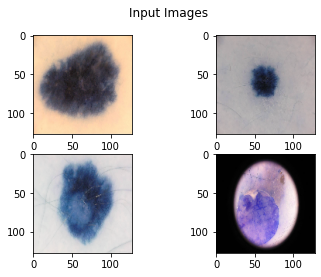

groundtruth


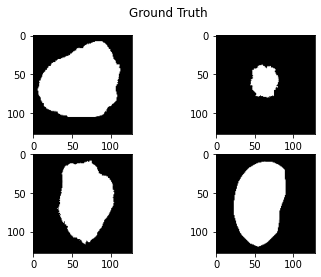

prediction


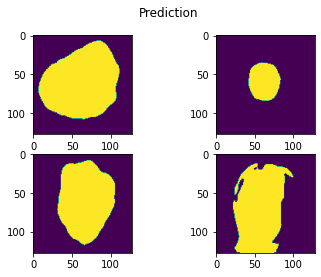

In [44]:
prediction(model=model_attention_unet)

**SegNet Training**

segnet_files/data.csv
Train: 1816 - 1816
Valid: 389 - 389
Test: 389 - 389
Build Encoder Done..
Build Decoder Done...
Model: "SegNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_63 (Conv2D)             (None, 128, 128, 64  1792        ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_27 (BatchN  (None, 128, 128, 64  256        ['conv2d_6

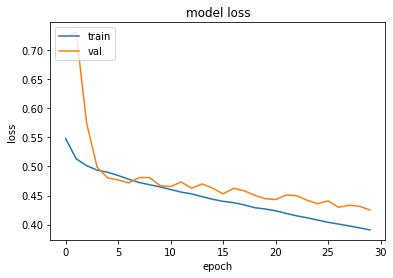

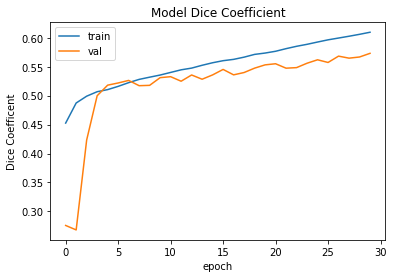

In [45]:
segnet_model = train("segnet")

**SegNet Evaluation**

In [46]:
segnet_model_score = evaluate(segnet_model)

  0%|          | 0/389 [00:00<?, ?it/s]

1/1 [==============================] - 1s 879ms/step


  0%|          | 1/389 [00:01<06:42,  1.04s/it]

1/1 [==============================] - 0s 29ms/step


  1%|          | 2/389 [00:01<03:59,  1.62it/s]

1/1 [==============================] - 0s 29ms/step


  1%|          | 3/389 [00:01<02:46,  2.32it/s]

1/1 [==============================] - 0s 30ms/step


  1%|▏         | 5/389 [00:01<01:40,  3.81it/s]

1/1 [==============================] - 0s 33ms/step


  2%|▏         | 6/389 [00:02<01:47,  3.57it/s]

1/1 [==============================] - 0s 30ms/step


  2%|▏         | 7/389 [00:02<02:32,  2.50it/s]

1/1 [==============================] - 0s 34ms/step


  2%|▏         | 8/389 [00:03<03:08,  2.02it/s]

1/1 [==============================] - 0s 35ms/step


  2%|▏         | 9/389 [00:04<03:29,  1.82it/s]

1/1 [==============================] - 0s 34ms/step


  3%|▎         | 11/389 [00:04<02:08,  2.93it/s]

1/1 [==============================] - 0s 35ms/step


  3%|▎         | 12/389 [00:04<02:01,  3.11it/s]

1/1 [==============================] - 0s 35ms/step


  3%|▎         | 13/389 [00:05<02:40,  2.34it/s]

1/1 [==============================] - 0s 35ms/step


  4%|▎         | 14/389 [00:05<02:11,  2.85it/s]

1/1 [==============================] - 0s 34ms/step


  4%|▍         | 16/389 [00:05<01:37,  3.84it/s]

1/1 [==============================] - 0s 36ms/step


  4%|▍         | 17/389 [00:06<01:26,  4.31it/s]

1/1 [==============================] - 0s 35ms/step


  5%|▍         | 18/389 [00:06<01:28,  4.20it/s]

1/1 [==============================] - 0s 35ms/step


  5%|▍         | 19/389 [00:06<02:16,  2.70it/s]

1/1 [==============================] - 0s 34ms/step


  5%|▌         | 20/389 [00:07<01:59,  3.08it/s]

1/1 [==============================] - 0s 34ms/step


  5%|▌         | 21/389 [00:07<02:41,  2.27it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▌         | 22/389 [00:08<03:13,  1.90it/s]

1/1 [==============================] - 0s 37ms/step


  6%|▌         | 23/389 [00:08<02:40,  2.28it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▋         | 25/389 [00:09<02:35,  2.34it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 26/389 [00:10<02:26,  2.49it/s]

1/1 [==============================] - 0s 34ms/step


  7%|▋         | 28/389 [00:10<01:38,  3.66it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 30/389 [00:11<01:56,  3.07it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 31/389 [00:11<01:46,  3.35it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 32/389 [00:11<01:48,  3.29it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▊         | 34/389 [00:12<01:58,  2.99it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▉         | 35/389 [00:12<01:56,  3.04it/s]

1/1 [==============================] - 0s 37ms/step


  9%|▉         | 36/389 [00:12<01:55,  3.07it/s]

1/1 [==============================] - 0s 35ms/step


 10%|▉         | 38/389 [00:13<01:28,  3.96it/s]

1/1 [==============================] - 0s 35ms/step


 10%|█         | 39/389 [00:13<01:20,  4.32it/s]

1/1 [==============================] - 0s 34ms/step


 11%|█         | 41/389 [00:13<01:17,  4.50it/s]

1/1 [==============================] - 0s 37ms/step


 11%|█         | 42/389 [00:14<01:56,  2.98it/s]

1/1 [==============================] - 0s 37ms/step


 11%|█         | 43/389 [00:14<01:43,  3.33it/s]

1/1 [==============================] - 0s 37ms/step


 11%|█▏        | 44/389 [00:15<01:45,  3.26it/s]

1/1 [==============================] - 0s 36ms/step


 12%|█▏        | 46/389 [00:15<01:14,  4.61it/s]

1/1 [==============================] - 0s 35ms/step


 12%|█▏        | 48/389 [00:15<01:12,  4.70it/s]

1/1 [==============================] - 0s 35ms/step


 13%|█▎        | 49/389 [00:16<01:49,  3.10it/s]

1/1 [==============================] - 0s 34ms/step


 13%|█▎        | 50/389 [00:16<01:39,  3.41it/s]

1/1 [==============================] - 0s 34ms/step


 13%|█▎        | 51/389 [00:17<02:12,  2.55it/s]

1/1 [==============================] - 0s 35ms/step


 13%|█▎        | 52/389 [00:17<02:04,  2.71it/s]

1/1 [==============================] - 0s 35ms/step


 14%|█▎        | 53/389 [00:18<02:36,  2.14it/s]

1/1 [==============================] - 0s 35ms/step


 14%|█▍        | 54/389 [00:19<03:01,  1.85it/s]

1/1 [==============================] - 0s 35ms/step


 14%|█▍        | 55/389 [00:19<02:28,  2.26it/s]

1/1 [==============================] - 0s 35ms/step


 14%|█▍        | 56/389 [00:19<01:59,  2.79it/s]

1/1 [==============================] - 0s 35ms/step


 15%|█▍        | 57/389 [00:20<02:38,  2.10it/s]

1/1 [==============================] - 0s 36ms/step


 15%|█▍        | 58/389 [00:20<02:21,  2.34it/s]

1/1 [==============================] - 0s 35ms/step


 15%|█▌        | 59/389 [00:20<01:59,  2.77it/s]

1/1 [==============================] - 0s 35ms/step


 15%|█▌        | 60/389 [00:20<01:42,  3.20it/s]

1/1 [==============================] - 0s 35ms/step


 16%|█▌        | 62/389 [00:21<01:53,  2.87it/s]

1/1 [==============================] - 0s 35ms/step


 16%|█▌        | 63/389 [00:21<01:41,  3.21it/s]

1/1 [==============================] - 0s 35ms/step


 16%|█▋        | 64/389 [00:21<01:23,  3.90it/s]

1/1 [==============================] - 0s 35ms/step


 17%|█▋        | 65/389 [00:22<01:29,  3.61it/s]

1/1 [==============================] - 0s 35ms/step


 17%|█▋        | 66/389 [00:23<02:13,  2.42it/s]

1/1 [==============================] - 0s 35ms/step


 17%|█▋        | 67/389 [00:23<02:39,  2.02it/s]

1/1 [==============================] - 0s 36ms/step


 17%|█▋        | 68/389 [00:24<02:23,  2.23it/s]

1/1 [==============================] - 0s 35ms/step


 18%|█▊        | 69/389 [00:24<02:00,  2.66it/s]

1/1 [==============================] - 0s 34ms/step


 18%|█▊        | 70/389 [00:25<02:35,  2.06it/s]

1/1 [==============================] - 0s 34ms/step


 18%|█▊        | 71/389 [00:25<02:07,  2.49it/s]

1/1 [==============================] - 0s 35ms/step


 19%|█▊        | 72/389 [00:25<02:02,  2.59it/s]

1/1 [==============================] - 0s 34ms/step


 19%|█▉        | 74/389 [00:25<01:18,  4.00it/s]

1/1 [==============================] - 0s 35ms/step


 20%|█▉        | 76/389 [00:25<00:58,  5.37it/s]

1/1 [==============================] - 0s 34ms/step


 20%|██        | 78/389 [00:26<00:47,  6.55it/s]

1/1 [==============================] - 0s 34ms/step


 20%|██        | 79/389 [00:26<00:57,  5.36it/s]

1/1 [==============================] - 0s 34ms/step


 21%|██        | 80/389 [00:26<00:58,  5.29it/s]

1/1 [==============================] - 0s 34ms/step


 21%|██        | 81/389 [00:27<01:36,  3.20it/s]

1/1 [==============================] - 0s 36ms/step


 21%|██        | 82/389 [00:27<01:26,  3.53it/s]

1/1 [==============================] - 0s 35ms/step


 21%|██▏       | 83/389 [00:27<01:32,  3.32it/s]

1/1 [==============================] - 0s 35ms/step


 22%|██▏       | 84/389 [00:28<01:24,  3.62it/s]

1/1 [==============================] - 0s 40ms/step


 22%|██▏       | 86/389 [00:28<01:13,  4.10it/s]

1/1 [==============================] - 0s 39ms/step


 22%|██▏       | 87/389 [00:28<01:18,  3.83it/s]

1/1 [==============================] - 0s 35ms/step


 23%|██▎       | 88/389 [00:29<01:22,  3.66it/s]

1/1 [==============================] - 0s 35ms/step


 23%|██▎       | 89/389 [00:29<01:25,  3.51it/s]

1/1 [==============================] - 0s 35ms/step


 23%|██▎       | 90/389 [00:30<02:01,  2.45it/s]

1/1 [==============================] - 0s 37ms/step


 23%|██▎       | 91/389 [00:30<01:35,  3.12it/s]

1/1 [==============================] - 0s 35ms/step


 24%|██▎       | 92/389 [00:30<01:38,  3.01it/s]

1/1 [==============================] - 0s 34ms/step


 24%|██▍       | 94/389 [00:30<01:05,  4.50it/s]

1/1 [==============================] - 0s 35ms/step


 24%|██▍       | 95/389 [00:30<01:00,  4.87it/s]

1/1 [==============================] - 0s 36ms/step


 25%|██▍       | 96/389 [00:31<01:04,  4.55it/s]

1/1 [==============================] - 0s 36ms/step


 25%|██▌       | 98/389 [00:32<01:25,  3.41it/s]

1/1 [==============================] - 0s 34ms/step


 25%|██▌       | 99/389 [00:32<01:25,  3.41it/s]

1/1 [==============================] - 0s 34ms/step


 26%|██▌       | 100/389 [00:32<01:18,  3.70it/s]

1/1 [==============================] - 0s 36ms/step


 26%|██▌       | 102/389 [00:32<00:57,  5.00it/s]

1/1 [==============================] - 0s 35ms/step


 26%|██▋       | 103/389 [00:32<00:57,  4.99it/s]

1/1 [==============================] - 0s 36ms/step


 27%|██▋       | 105/389 [00:33<01:00,  4.72it/s]

1/1 [==============================] - 0s 36ms/step


 27%|██▋       | 106/389 [00:33<01:00,  4.70it/s]

1/1 [==============================] - 0s 36ms/step


 28%|██▊       | 107/389 [00:33<01:06,  4.22it/s]

1/1 [==============================] - 0s 35ms/step


 28%|██▊       | 109/389 [00:34<00:49,  5.66it/s]

1/1 [==============================] - 0s 34ms/step


 29%|██▊       | 111/389 [00:34<00:41,  6.76it/s]

1/1 [==============================] - 0s 36ms/step


 29%|██▉       | 113/389 [00:34<00:41,  6.69it/s]

1/1 [==============================] - 0s 35ms/step


 29%|██▉       | 114/389 [00:34<00:44,  6.25it/s]

1/1 [==============================] - 0s 36ms/step


 30%|██▉       | 115/389 [00:34<00:43,  6.28it/s]

1/1 [==============================] - 0s 35ms/step


 30%|██▉       | 116/389 [00:35<01:18,  3.46it/s]

1/1 [==============================] - 0s 34ms/step


 30%|███       | 117/389 [00:36<01:46,  2.56it/s]

1/1 [==============================] - 0s 35ms/step


 30%|███       | 118/389 [00:36<01:39,  2.72it/s]

1/1 [==============================] - 0s 35ms/step


 31%|███       | 119/389 [00:36<01:26,  3.11it/s]

1/1 [==============================] - 0s 36ms/step


 31%|███       | 121/389 [00:37<00:59,  4.49it/s]

1/1 [==============================] - 0s 37ms/step


 31%|███▏      | 122/389 [00:37<00:59,  4.47it/s]

1/1 [==============================] - 0s 35ms/step


 32%|███▏      | 123/389 [00:37<01:05,  4.08it/s]

1/1 [==============================] - 0s 34ms/step


 32%|███▏      | 124/389 [00:38<01:37,  2.72it/s]

1/1 [==============================] - 0s 35ms/step


 32%|███▏      | 125/389 [00:38<01:32,  2.86it/s]

1/1 [==============================] - 0s 35ms/step


 33%|███▎      | 127/389 [00:39<01:39,  2.63it/s]

1/1 [==============================] - 0s 35ms/step


 33%|███▎      | 129/389 [00:39<01:09,  3.74it/s]

1/1 [==============================] - 0s 35ms/step


 34%|███▎      | 131/389 [00:39<01:02,  4.14it/s]

1/1 [==============================] - 0s 35ms/step


 34%|███▍      | 132/389 [00:40<01:00,  4.28it/s]

1/1 [==============================] - 0s 35ms/step


 34%|███▍      | 133/389 [00:40<01:04,  3.99it/s]

1/1 [==============================] - 0s 35ms/step


 34%|███▍      | 134/389 [00:40<01:00,  4.22it/s]

1/1 [==============================] - 0s 35ms/step


 35%|███▍      | 135/389 [00:40<00:57,  4.40it/s]

1/1 [==============================] - 0s 35ms/step


 35%|███▌      | 137/389 [00:41<00:52,  4.84it/s]

1/1 [==============================] - 0s 36ms/step


 35%|███▌      | 138/389 [00:41<00:56,  4.48it/s]

1/1 [==============================] - 0s 35ms/step


 36%|███▌      | 139/389 [00:41<00:52,  4.76it/s]

1/1 [==============================] - 0s 35ms/step


 36%|███▌      | 140/389 [00:41<00:50,  4.89it/s]

1/1 [==============================] - 0s 36ms/step


 36%|███▌      | 141/389 [00:42<00:58,  4.23it/s]

1/1 [==============================] - 0s 34ms/step


 37%|███▋      | 142/389 [00:42<01:30,  2.72it/s]

1/1 [==============================] - 0s 35ms/step


 37%|███▋      | 143/389 [00:43<01:18,  3.15it/s]

1/1 [==============================] - 0s 35ms/step


 37%|███▋      | 144/389 [00:43<01:08,  3.57it/s]

1/1 [==============================] - 0s 36ms/step


 37%|███▋      | 145/389 [00:43<01:02,  3.89it/s]

1/1 [==============================] - 0s 36ms/step


 38%|███▊      | 146/389 [00:43<00:53,  4.53it/s]

1/1 [==============================] - 0s 36ms/step


 38%|███▊      | 147/389 [00:43<00:59,  4.04it/s]

1/1 [==============================] - 0s 34ms/step


 38%|███▊      | 148/389 [00:44<01:04,  3.76it/s]

1/1 [==============================] - 0s 35ms/step


 38%|███▊      | 149/389 [00:44<00:59,  4.07it/s]

1/1 [==============================] - 0s 37ms/step


 39%|███▊      | 150/389 [00:45<01:34,  2.52it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███▉      | 152/389 [00:45<01:01,  3.85it/s]

1/1 [==============================] - 0s 35ms/step


 39%|███▉      | 153/389 [00:45<00:55,  4.25it/s]

1/1 [==============================] - 0s 34ms/step


 40%|███▉      | 155/389 [00:45<00:43,  5.33it/s]

1/1 [==============================] - 0s 36ms/step


 40%|████      | 156/389 [00:46<00:51,  4.51it/s]

1/1 [==============================] - 0s 36ms/step


 40%|████      | 157/389 [00:46<00:50,  4.58it/s]

1/1 [==============================] - 0s 36ms/step


 41%|████      | 158/389 [00:46<00:54,  4.27it/s]

1/1 [==============================] - 0s 35ms/step


 41%|████      | 160/389 [00:46<00:39,  5.76it/s]

1/1 [==============================] - 0s 35ms/step


 41%|████▏     | 161/389 [00:47<01:10,  3.25it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████▏     | 163/389 [00:47<00:50,  4.49it/s]

1/1 [==============================] - 0s 35ms/step


 42%|████▏     | 164/389 [00:48<01:13,  3.07it/s]

1/1 [==============================] - 0s 35ms/step


 42%|████▏     | 165/389 [00:48<01:12,  3.09it/s]

1/1 [==============================] - 0s 35ms/step


 43%|████▎     | 166/389 [00:48<01:04,  3.44it/s]

1/1 [==============================] - 0s 35ms/step


 43%|████▎     | 167/389 [00:49<01:05,  3.36it/s]

1/1 [==============================] - 0s 36ms/step


 43%|████▎     | 168/389 [00:49<01:30,  2.45it/s]

1/1 [==============================] - 0s 35ms/step


 43%|████▎     | 169/389 [00:50<01:13,  2.98it/s]

1/1 [==============================] - 0s 35ms/step


 44%|████▎     | 170/389 [00:50<01:11,  3.06it/s]

1/1 [==============================] - 0s 36ms/step


 44%|████▍     | 171/389 [00:50<01:11,  3.07it/s]

1/1 [==============================] - 0s 34ms/step


 44%|████▍     | 172/389 [00:51<01:09,  3.12it/s]

1/1 [==============================] - 0s 35ms/step


 44%|████▍     | 173/389 [00:51<01:00,  3.54it/s]

1/1 [==============================] - 0s 36ms/step


 45%|████▍     | 174/389 [00:51<01:05,  3.28it/s]

1/1 [==============================] - 0s 35ms/step


 45%|████▍     | 175/389 [00:52<01:30,  2.37it/s]

1/1 [==============================] - 0s 35ms/step


 45%|████▌     | 176/389 [00:52<01:14,  2.85it/s]

1/1 [==============================] - 0s 35ms/step


 46%|████▌     | 178/389 [00:52<00:52,  4.05it/s]

1/1 [==============================] - 0s 34ms/step


 46%|████▌     | 179/389 [00:53<00:55,  3.82it/s]

1/1 [==============================] - 0s 36ms/step


 46%|████▋     | 180/389 [00:53<01:19,  2.64it/s]

1/1 [==============================] - 0s 35ms/step


 47%|████▋     | 182/389 [00:53<00:53,  3.90it/s]

1/1 [==============================] - 0s 35ms/step


 47%|████▋     | 183/389 [00:54<01:14,  2.77it/s]

1/1 [==============================] - 0s 35ms/step


 47%|████▋     | 184/389 [00:54<01:02,  3.29it/s]

1/1 [==============================] - 0s 35ms/step


 48%|████▊     | 185/389 [00:55<01:24,  2.41it/s]

1/1 [==============================] - 0s 35ms/step


 48%|████▊     | 186/389 [00:55<01:16,  2.65it/s]

1/1 [==============================] - 0s 35ms/step


 48%|████▊     | 187/389 [00:55<01:06,  3.05it/s]

1/1 [==============================] - 0s 34ms/step


 49%|████▊     | 189/389 [00:56<01:11,  2.81it/s]

1/1 [==============================] - 0s 36ms/step


 49%|████▉     | 190/389 [00:57<01:06,  2.98it/s]

1/1 [==============================] - 0s 36ms/step


 49%|████▉     | 192/389 [00:57<01:11,  2.76it/s]

1/1 [==============================] - 0s 34ms/step


 50%|████▉     | 193/389 [00:58<01:04,  3.04it/s]

1/1 [==============================] - 0s 36ms/step


 50%|████▉     | 194/389 [00:58<01:04,  3.04it/s]

1/1 [==============================] - 0s 35ms/step


 50%|█████     | 195/389 [00:58<01:02,  3.10it/s]

1/1 [==============================] - 0s 34ms/step


 50%|█████     | 196/389 [00:58<00:55,  3.47it/s]

1/1 [==============================] - 0s 35ms/step


 51%|█████     | 197/389 [00:59<00:54,  3.51it/s]

1/1 [==============================] - 0s 35ms/step


 51%|█████     | 199/389 [01:00<01:06,  2.87it/s]

1/1 [==============================] - 0s 35ms/step


 52%|█████▏    | 201/389 [01:00<00:46,  4.01it/s]

1/1 [==============================] - 0s 34ms/step


 52%|█████▏    | 203/389 [01:00<00:39,  4.67it/s]

1/1 [==============================] - 0s 36ms/step


 52%|█████▏    | 204/389 [01:00<00:41,  4.40it/s]

1/1 [==============================] - 0s 35ms/step


 53%|█████▎    | 206/389 [01:00<00:32,  5.62it/s]

1/1 [==============================] - 0s 35ms/step


 53%|█████▎    | 207/389 [01:01<00:33,  5.45it/s]

1/1 [==============================] - 0s 35ms/step


 53%|█████▎    | 208/389 [01:01<00:34,  5.28it/s]

1/1 [==============================] - 0s 35ms/step


 54%|█████▎    | 209/389 [01:02<00:56,  3.17it/s]

1/1 [==============================] - 0s 36ms/step


 54%|█████▍    | 210/389 [01:02<00:56,  3.20it/s]

1/1 [==============================] - 0s 35ms/step


 54%|█████▍    | 212/389 [01:02<00:39,  4.54it/s]

1/1 [==============================] - 0s 35ms/step


 55%|█████▍    | 213/389 [01:02<00:43,  4.08it/s]

1/1 [==============================] - 0s 36ms/step


 55%|█████▌    | 215/389 [01:03<00:52,  3.33it/s]

1/1 [==============================] - 0s 34ms/step


 56%|█████▌    | 216/389 [01:04<01:06,  2.58it/s]

1/1 [==============================] - 0s 35ms/step


 56%|█████▌    | 217/389 [01:04<00:56,  3.06it/s]

1/1 [==============================] - 0s 37ms/step


 56%|█████▌    | 218/389 [01:04<00:48,  3.53it/s]

1/1 [==============================] - 0s 35ms/step


 56%|█████▋    | 219/389 [01:04<00:44,  3.85it/s]

1/1 [==============================] - 0s 35ms/step


 57%|█████▋    | 221/389 [01:05<00:31,  5.36it/s]

1/1 [==============================] - 0s 34ms/step


 57%|█████▋    | 222/389 [01:05<00:29,  5.72it/s]

1/1 [==============================] - 0s 35ms/step


 57%|█████▋    | 223/389 [01:05<00:34,  4.76it/s]

1/1 [==============================] - 0s 35ms/step


 58%|█████▊    | 224/389 [01:05<00:34,  4.84it/s]

1/1 [==============================] - 0s 35ms/step


 58%|█████▊    | 225/389 [01:05<00:33,  4.91it/s]

1/1 [==============================] - 0s 38ms/step


 58%|█████▊    | 226/389 [01:06<00:55,  2.94it/s]

1/1 [==============================] - 0s 36ms/step


 58%|█████▊    | 227/389 [01:06<00:48,  3.33it/s]

1/1 [==============================] - 0s 35ms/step


 59%|█████▉    | 229/389 [01:06<00:32,  4.85it/s]

1/1 [==============================] - 0s 35ms/step


 59%|█████▉    | 230/389 [01:07<00:32,  4.87it/s]

1/1 [==============================] - 0s 35ms/step


 59%|█████▉    | 231/389 [01:07<00:31,  5.04it/s]

1/1 [==============================] - 0s 34ms/step


 60%|█████▉    | 233/389 [01:08<00:44,  3.51it/s]

1/1 [==============================] - 0s 35ms/step


 60%|██████    | 234/389 [01:08<00:44,  3.45it/s]

1/1 [==============================] - 0s 35ms/step


 60%|██████    | 235/389 [01:08<00:39,  3.91it/s]

1/1 [==============================] - 0s 36ms/step


 61%|██████    | 237/389 [01:08<00:35,  4.25it/s]

1/1 [==============================] - 0s 35ms/step


 61%|██████▏   | 239/389 [01:09<00:28,  5.25it/s]

1/1 [==============================] - 0s 34ms/step


 62%|██████▏   | 241/389 [01:09<00:27,  5.43it/s]

1/1 [==============================] - 0s 35ms/step


 62%|██████▏   | 242/389 [01:10<00:42,  3.45it/s]

1/1 [==============================] - 0s 34ms/step


 62%|██████▏   | 243/389 [01:10<00:42,  3.43it/s]

1/1 [==============================] - 0s 35ms/step


 63%|██████▎   | 245/389 [01:10<00:33,  4.34it/s]

1/1 [==============================] - 0s 35ms/step


 63%|██████▎   | 246/389 [01:11<00:35,  4.02it/s]

1/1 [==============================] - 0s 35ms/step


 63%|██████▎   | 247/389 [01:11<00:33,  4.20it/s]

1/1 [==============================] - 0s 35ms/step


 64%|██████▍   | 248/389 [01:12<00:50,  2.79it/s]

1/1 [==============================] - 0s 35ms/step


 64%|██████▍   | 249/389 [01:12<00:44,  3.16it/s]

1/1 [==============================] - 0s 35ms/step


 64%|██████▍   | 250/389 [01:12<00:39,  3.52it/s]

1/1 [==============================] - 0s 35ms/step


 65%|██████▍   | 251/389 [01:12<00:35,  3.86it/s]

1/1 [==============================] - 0s 34ms/step


 65%|██████▍   | 252/389 [01:12<00:33,  4.11it/s]

1/1 [==============================] - 0s 36ms/step


 65%|██████▌   | 254/389 [01:13<00:26,  5.00it/s]

1/1 [==============================] - 0s 35ms/step


 66%|██████▌   | 255/389 [01:13<00:43,  3.11it/s]

1/1 [==============================] - 0s 35ms/step


 66%|██████▌   | 256/389 [01:14<00:40,  3.25it/s]

1/1 [==============================] - 0s 35ms/step


 66%|██████▋   | 258/389 [01:14<00:31,  4.17it/s]

1/1 [==============================] - 0s 35ms/step


 67%|██████▋   | 259/389 [01:14<00:29,  4.34it/s]

1/1 [==============================] - 0s 35ms/step


 67%|██████▋   | 260/389 [01:14<00:33,  3.90it/s]

1/1 [==============================] - 0s 38ms/step


 67%|██████▋   | 261/389 [01:15<00:34,  3.67it/s]

1/1 [==============================] - 0s 35ms/step


 67%|██████▋   | 262/389 [01:15<00:36,  3.50it/s]

1/1 [==============================] - 0s 34ms/step


 68%|██████▊   | 263/389 [01:16<00:50,  2.49it/s]

1/1 [==============================] - 0s 35ms/step


 68%|██████▊   | 264/389 [01:16<00:47,  2.66it/s]

1/1 [==============================] - 0s 36ms/step


 68%|██████▊   | 265/389 [01:17<00:57,  2.14it/s]

1/1 [==============================] - 0s 35ms/step


 69%|██████▊   | 267/389 [01:17<00:41,  2.96it/s]

1/1 [==============================] - 0s 35ms/step


 69%|██████▉   | 268/389 [01:17<00:38,  3.13it/s]

1/1 [==============================] - 0s 35ms/step


 69%|██████▉   | 269/389 [01:18<00:33,  3.62it/s]

1/1 [==============================] - 0s 36ms/step


 69%|██████▉   | 270/389 [01:18<00:46,  2.55it/s]

1/1 [==============================] - 0s 35ms/step


 70%|██████▉   | 271/389 [01:19<00:57,  2.05it/s]

1/1 [==============================] - 0s 35ms/step


 70%|██████▉   | 272/389 [01:20<01:03,  1.84it/s]

1/1 [==============================] - 0s 35ms/step


 70%|███████   | 273/389 [01:20<00:54,  2.12it/s]

1/1 [==============================] - 0s 34ms/step


 70%|███████   | 274/389 [01:20<00:44,  2.56it/s]

1/1 [==============================] - 0s 34ms/step


 71%|███████   | 275/389 [01:21<00:41,  2.74it/s]

1/1 [==============================] - 0s 35ms/step


 71%|███████   | 277/389 [01:21<00:29,  3.78it/s]

1/1 [==============================] - 0s 35ms/step


 72%|███████▏  | 279/389 [01:21<00:26,  4.19it/s]

1/1 [==============================] - 0s 35ms/step


 72%|███████▏  | 280/389 [01:22<00:37,  2.90it/s]

1/1 [==============================] - 0s 36ms/step


 72%|███████▏  | 281/389 [01:22<00:33,  3.23it/s]

1/1 [==============================] - 0s 35ms/step


 73%|███████▎  | 283/389 [01:23<00:27,  3.79it/s]

1/1 [==============================] - 0s 34ms/step


 73%|███████▎  | 284/389 [01:23<00:38,  2.71it/s]

1/1 [==============================] - 0s 35ms/step


 73%|███████▎  | 285/389 [01:23<00:31,  3.29it/s]

1/1 [==============================] - 0s 34ms/step


 74%|███████▎  | 286/389 [01:24<00:42,  2.44it/s]

1/1 [==============================] - 0s 34ms/step


 74%|███████▍  | 288/389 [01:24<00:27,  3.65it/s]

1/1 [==============================] - 0s 35ms/step


 74%|███████▍  | 289/389 [01:25<00:28,  3.55it/s]

1/1 [==============================] - 0s 35ms/step


 75%|███████▍  | 290/389 [01:25<00:39,  2.52it/s]

1/1 [==============================] - 0s 34ms/step


 75%|███████▍  | 291/389 [01:25<00:33,  2.90it/s]

1/1 [==============================] - 0s 34ms/step


 75%|███████▌  | 293/389 [01:26<00:24,  3.90it/s]

1/1 [==============================] - 0s 35ms/step


 76%|███████▌  | 295/389 [01:26<00:22,  4.21it/s]

1/1 [==============================] - 0s 35ms/step


 76%|███████▌  | 296/389 [01:26<00:21,  4.36it/s]

1/1 [==============================] - 0s 35ms/step


 76%|███████▋  | 297/389 [01:27<00:32,  2.86it/s]

1/1 [==============================] - 0s 35ms/step


 77%|███████▋  | 299/389 [01:27<00:24,  3.73it/s]

1/1 [==============================] - 0s 34ms/step


 77%|███████▋  | 300/389 [01:28<00:33,  2.68it/s]

1/1 [==============================] - 0s 35ms/step


 77%|███████▋  | 301/389 [01:28<00:29,  3.03it/s]

1/1 [==============================] - 0s 34ms/step


 78%|███████▊  | 302/389 [01:29<00:26,  3.34it/s]

1/1 [==============================] - 0s 34ms/step


 78%|███████▊  | 303/389 [01:29<00:22,  3.86it/s]

1/1 [==============================] - 0s 34ms/step


 78%|███████▊  | 304/389 [01:29<00:20,  4.10it/s]

1/1 [==============================] - 0s 36ms/step


 78%|███████▊  | 305/389 [01:29<00:19,  4.31it/s]

1/1 [==============================] - 0s 35ms/step


 79%|███████▉  | 307/389 [01:30<00:25,  3.27it/s]

1/1 [==============================] - 0s 35ms/step


 79%|███████▉  | 308/389 [01:30<00:21,  3.77it/s]

1/1 [==============================] - 0s 35ms/step


 80%|███████▉  | 310/389 [01:31<00:25,  3.13it/s]

1/1 [==============================] - 0s 35ms/step


 80%|███████▉  | 311/389 [01:32<00:32,  2.41it/s]

1/1 [==============================] - 0s 36ms/step


 80%|████████  | 313/389 [01:32<00:31,  2.43it/s]

1/1 [==============================] - 0s 34ms/step


 81%|████████  | 314/389 [01:33<00:36,  2.06it/s]

1/1 [==============================] - 0s 35ms/step


 81%|████████  | 315/389 [01:33<00:32,  2.25it/s]

1/1 [==============================] - 0s 35ms/step


 81%|████████▏ | 317/389 [01:34<00:21,  3.30it/s]

1/1 [==============================] - 0s 35ms/step


 82%|████████▏ | 318/389 [01:34<00:28,  2.53it/s]

1/1 [==============================] - 0s 34ms/step


 82%|████████▏ | 320/389 [01:35<00:22,  3.11it/s]

1/1 [==============================] - 0s 35ms/step


 83%|████████▎ | 321/389 [01:35<00:20,  3.40it/s]

1/1 [==============================] - 0s 34ms/step


 83%|████████▎ | 322/389 [01:35<00:18,  3.69it/s]

1/1 [==============================] - 0s 36ms/step


 83%|████████▎ | 323/389 [01:35<00:18,  3.56it/s]

1/1 [==============================] - 0s 34ms/step


 83%|████████▎ | 324/389 [01:36<00:25,  2.54it/s]

1/1 [==============================] - 0s 35ms/step


 84%|████████▎ | 325/389 [01:36<00:23,  2.77it/s]

1/1 [==============================] - 0s 35ms/step


 84%|████████▍ | 327/389 [01:37<00:23,  2.65it/s]

1/1 [==============================] - 0s 35ms/step


 85%|████████▍ | 329/389 [01:38<00:18,  3.21it/s]

1/1 [==============================] - 0s 35ms/step


 85%|████████▍ | 330/389 [01:38<00:16,  3.48it/s]

1/1 [==============================] - 0s 34ms/step


 85%|████████▌ | 331/389 [01:38<00:17,  3.39it/s]

1/1 [==============================] - 0s 35ms/step


 85%|████████▌ | 332/389 [01:39<00:17,  3.26it/s]

1/1 [==============================] - 0s 33ms/step


 86%|████████▌ | 334/389 [01:39<00:11,  4.62it/s]

1/1 [==============================] - 0s 34ms/step


 86%|████████▌ | 335/389 [01:39<00:13,  4.15it/s]

1/1 [==============================] - 0s 35ms/step


 86%|████████▋ | 336/389 [01:40<00:18,  2.81it/s]

1/1 [==============================] - 0s 34ms/step


 87%|████████▋ | 337/389 [01:40<00:17,  2.95it/s]

1/1 [==============================] - 0s 34ms/step


 87%|████████▋ | 338/389 [01:40<00:16,  3.02it/s]

1/1 [==============================] - 0s 34ms/step


 87%|████████▋ | 339/389 [01:41<00:16,  3.03it/s]

1/1 [==============================] - 0s 34ms/step


 88%|████████▊ | 341/389 [01:41<00:10,  4.52it/s]

1/1 [==============================] - 0s 34ms/step


 88%|████████▊ | 343/389 [01:41<00:08,  5.24it/s]

1/1 [==============================] - 0s 34ms/step


 88%|████████▊ | 344/389 [01:41<00:08,  5.41it/s]

1/1 [==============================] - 0s 35ms/step


 89%|████████▊ | 345/389 [01:41<00:08,  5.32it/s]

1/1 [==============================] - 0s 34ms/step


 89%|████████▉ | 347/389 [01:42<00:07,  5.90it/s]

1/1 [==============================] - 0s 34ms/step


 89%|████████▉ | 348/389 [01:42<00:08,  4.88it/s]

1/1 [==============================] - 0s 35ms/step


 90%|████████▉ | 350/389 [01:43<00:10,  3.64it/s]

1/1 [==============================] - 0s 34ms/step


 90%|█████████ | 351/389 [01:43<00:10,  3.54it/s]

1/1 [==============================] - 0s 36ms/step


 90%|█████████ | 352/389 [01:44<00:14,  2.64it/s]

1/1 [==============================] - 0s 34ms/step


 91%|█████████ | 353/389 [01:44<00:11,  3.08it/s]

1/1 [==============================] - 0s 34ms/step


 91%|█████████ | 354/389 [01:44<00:10,  3.43it/s]

1/1 [==============================] - 0s 35ms/step


 91%|█████████▏| 355/389 [01:44<00:09,  3.71it/s]

1/1 [==============================] - 0s 37ms/step


 92%|█████████▏| 356/389 [01:45<00:09,  3.51it/s]

1/1 [==============================] - 0s 36ms/step


 92%|█████████▏| 357/389 [01:45<00:08,  3.70it/s]

1/1 [==============================] - 0s 34ms/step


 92%|█████████▏| 358/389 [01:46<00:12,  2.44it/s]

1/1 [==============================] - 0s 34ms/step


 93%|█████████▎| 360/389 [01:46<00:08,  3.45it/s]

1/1 [==============================] - 0s 36ms/step


 93%|█████████▎| 361/389 [01:47<00:10,  2.56it/s]

1/1 [==============================] - 0s 35ms/step


 93%|█████████▎| 363/389 [01:47<00:08,  3.18it/s]

1/1 [==============================] - 0s 34ms/step


 94%|█████████▎| 364/389 [01:48<00:10,  2.48it/s]

1/1 [==============================] - 0s 35ms/step


 94%|█████████▍| 365/389 [01:48<00:09,  2.63it/s]

1/1 [==============================] - 0s 35ms/step


 94%|█████████▍| 366/389 [01:49<00:10,  2.10it/s]

1/1 [==============================] - 0s 41ms/step


 94%|█████████▍| 367/389 [01:49<00:09,  2.30it/s]

1/1 [==============================] - 0s 35ms/step


 95%|█████████▍| 368/389 [01:50<00:13,  1.57it/s]

1/1 [==============================] - 0s 34ms/step


 95%|█████████▍| 369/389 [01:51<00:09,  2.07it/s]

1/1 [==============================] - 0s 35ms/step


 95%|█████████▌| 371/389 [01:51<00:05,  3.00it/s]

1/1 [==============================] - 0s 35ms/step


 96%|█████████▌| 372/389 [01:51<00:05,  3.34it/s]

1/1 [==============================] - 0s 34ms/step


 96%|█████████▌| 373/389 [01:51<00:04,  3.67it/s]

1/1 [==============================] - 0s 34ms/step


 96%|█████████▌| 374/389 [01:51<00:03,  3.86it/s]

1/1 [==============================] - 0s 35ms/step


 96%|█████████▋| 375/389 [01:52<00:03,  4.64it/s]

1/1 [==============================] - 0s 35ms/step


 97%|█████████▋| 376/389 [01:52<00:03,  4.09it/s]

1/1 [==============================] - 0s 34ms/step


 97%|█████████▋| 377/389 [01:52<00:02,  4.54it/s]

1/1 [==============================] - 0s 35ms/step


 97%|█████████▋| 378/389 [01:52<00:02,  4.05it/s]

1/1 [==============================] - 0s 35ms/step


 97%|█████████▋| 379/389 [01:53<00:02,  4.25it/s]

1/1 [==============================] - 0s 35ms/step


 98%|█████████▊| 380/389 [01:53<00:02,  3.79it/s]

1/1 [==============================] - 0s 35ms/step


 98%|█████████▊| 382/389 [01:53<00:01,  5.41it/s]

1/1 [==============================] - 0s 35ms/step


 99%|█████████▊| 384/389 [01:53<00:00,  5.47it/s]

1/1 [==============================] - 0s 35ms/step


 99%|█████████▉| 385/389 [01:54<00:00,  5.31it/s]

1/1 [==============================] - 0s 35ms/step


 99%|█████████▉| 387/389 [01:54<00:00,  3.69it/s]

1/1 [==============================] - 0s 34ms/step


100%|██████████| 389/389 [01:55<00:00,  3.37it/s]

--------------------------------------------------------------------------
Key Metrics
Accuracy: 0.94933
F1: 0.85237
Jaccard: 0.76110
Recall: 0.91213
Precision: 0.96110
IOU: 0.76110


**SegNet Prediction**

1/1 [==============================] - 0s 34ms/step
images


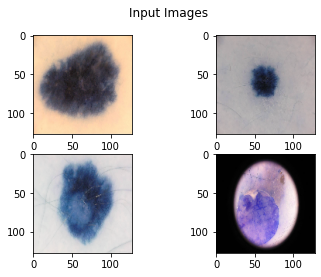

groundtruth


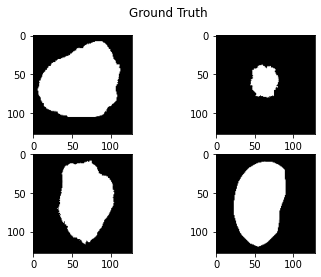

prediction


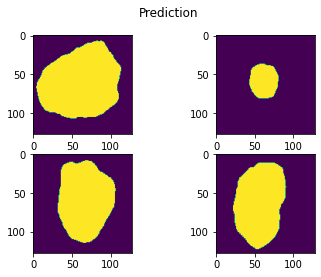

In [47]:
prediction(model=segnet_model)

In [48]:
import gc
gc.collect()

53806

**R2 U-Net Training**

r2_unet_files/data.csv
Train: 1816 - 1816
Valid: 389 - 389
Test: 389 - 389
Epoch 1/30
114/114 [==============================] - 407s 4s/step - loss: 0.2752 - dice_coef: 0.7251 - iou: 0.5788 - recall_4: 0.7339 - precision_4: 0.7455 - val_loss: 0.9937 - val_dice_coef: 0.0063 - val_iou: 0.0032 - val_recall_4: 2.5428e-05 - val_precision_4: 1.0000 - lr: 1.0000e-04
Epoch 2/30
114/114 [==============================] - 400s 3s/step - loss: 0.1926 - dice_coef: 0.8074 - iou: 0.6808 - recall_4: 0.7787 - precision_4: 0.8465 - val_loss: 0.6195 - val_dice_coef: 0.3785 - val_iou: 0.2371 - val_recall_4: 0.2362 - val_precision_4: 0.9365 - lr: 1.0000e-04
Epoch 3/30
114/114 [==============================] - 400s 3s/step - loss: 0.1723 - dice_coef: 0.8277 - iou: 0.7100 - recall_4: 0.7996 - precision_4: 0.8638 - val_loss: 0.2757 - val_dice_coef: 0.7226 - val_iou: 0.5731 - val_recall_4: 0.6148 - val_precision_4: 0.8846 - lr: 1.0000e-04
Epoch 4/30
114/114 [==============================] - 402s 4s/step - 

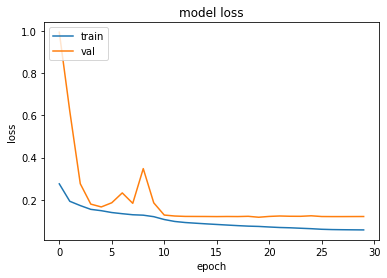

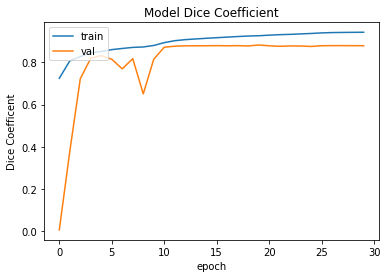

In [49]:
r2unet_model = train("r2_unet")

**R2 - U - Net Evaluation**

In [50]:
r2unet_score = evaluate(r2unet_model)

  0%|          | 0/389 [00:00<?, ?it/s]

1/1 [==============================] - 1s 723ms/step


  0%|          | 1/389 [00:00<05:45,  1.12it/s]

1/1 [==============================] - 0s 19ms/step


  1%|          | 2/389 [00:01<03:31,  1.83it/s]

1/1 [==============================] - 0s 18ms/step


  1%|          | 3/389 [00:01<02:29,  2.58it/s]

1/1 [==============================] - 0s 19ms/step


  1%|▏         | 5/389 [00:01<01:31,  4.17it/s]

1/1 [==============================] - 0s 19ms/step


  2%|▏         | 6/389 [00:01<01:38,  3.88it/s]

1/1 [==============================] - 0s 20ms/step


  2%|▏         | 7/389 [00:02<02:25,  2.63it/s]

1/1 [==============================] - 0s 19ms/step


  2%|▏         | 8/389 [00:03<03:00,  2.12it/s]

1/1 [==============================] - 0s 18ms/step


  2%|▏         | 9/389 [00:04<03:22,  1.87it/s]

1/1 [==============================] - 0s 18ms/step


  3%|▎         | 11/389 [00:04<02:04,  3.03it/s]

1/1 [==============================] - 0s 19ms/step


  3%|▎         | 12/389 [00:04<01:58,  3.18it/s]

1/1 [==============================] - 0s 19ms/step


  3%|▎         | 13/389 [00:05<02:37,  2.38it/s]

1/1 [==============================] - 0s 19ms/step


  4%|▎         | 14/389 [00:05<02:09,  2.89it/s]

1/1 [==============================] - 0s 20ms/step


  4%|▍         | 16/389 [00:05<01:36,  3.88it/s]

1/1 [==============================] - 0s 18ms/step


  4%|▍         | 17/389 [00:05<01:24,  4.38it/s]

1/1 [==============================] - 0s 19ms/step


  5%|▍         | 18/389 [00:05<01:26,  4.27it/s]

1/1 [==============================] - 0s 18ms/step


  5%|▍         | 19/389 [00:06<02:15,  2.74it/s]

1/1 [==============================] - 0s 19ms/step


  5%|▌         | 20/389 [00:06<01:57,  3.14it/s]

1/1 [==============================] - 0s 18ms/step


  5%|▌         | 21/389 [00:07<02:36,  2.35it/s]

1/1 [==============================] - 0s 18ms/step


  6%|▌         | 22/389 [00:08<03:10,  1.93it/s]

1/1 [==============================] - 0s 19ms/step


  6%|▌         | 23/389 [00:08<02:35,  2.36it/s]

1/1 [==============================] - 0s 20ms/step


  6%|▋         | 25/389 [00:09<02:30,  2.42it/s]

1/1 [==============================] - 0s 19ms/step


  7%|▋         | 26/389 [00:09<02:20,  2.58it/s]

1/1 [==============================] - 0s 17ms/step


  7%|▋         | 28/389 [00:09<01:35,  3.80it/s]

1/1 [==============================] - 0s 20ms/step


  8%|▊         | 30/389 [00:10<01:53,  3.16it/s]

1/1 [==============================] - 0s 18ms/step


  8%|▊         | 31/389 [00:10<01:44,  3.43it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 32/389 [00:11<01:46,  3.37it/s]

1/1 [==============================] - 0s 19ms/step


  9%|▊         | 34/389 [00:11<01:57,  3.01it/s]

1/1 [==============================] - 0s 19ms/step


  9%|▉         | 35/389 [00:12<01:56,  3.05it/s]

1/1 [==============================] - 0s 19ms/step


  9%|▉         | 36/389 [00:12<01:53,  3.10it/s]

1/1 [==============================] - 0s 19ms/step


 10%|▉         | 38/389 [00:12<01:27,  4.03it/s]

1/1 [==============================] - 0s 19ms/step


 10%|█         | 39/389 [00:12<01:19,  4.40it/s]

1/1 [==============================] - 0s 19ms/step


 11%|█         | 41/389 [00:13<01:15,  4.60it/s]

1/1 [==============================] - 0s 18ms/step


 11%|█         | 42/389 [00:14<01:51,  3.11it/s]

1/1 [==============================] - 0s 19ms/step


 11%|█         | 43/389 [00:14<01:39,  3.48it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█▏        | 44/389 [00:14<01:43,  3.34it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█▏        | 46/389 [00:14<01:12,  4.71it/s]

1/1 [==============================] - 0s 19ms/step


 12%|█▏        | 48/389 [00:15<01:10,  4.85it/s]

1/1 [==============================] - 0s 18ms/step


 13%|█▎        | 49/389 [00:15<01:46,  3.19it/s]

1/1 [==============================] - 0s 19ms/step


 13%|█▎        | 50/389 [00:16<01:37,  3.49it/s]

1/1 [==============================] - 0s 19ms/step


 13%|█▎        | 51/389 [00:16<02:14,  2.52it/s]

1/1 [==============================] - 0s 18ms/step


 13%|█▎        | 52/389 [00:17<02:04,  2.71it/s]

1/1 [==============================] - 0s 18ms/step


 14%|█▎        | 53/389 [00:17<02:34,  2.17it/s]

1/1 [==============================] - 0s 19ms/step


 14%|█▍        | 54/389 [00:18<02:59,  1.87it/s]

1/1 [==============================] - 0s 19ms/step


 14%|█▍        | 55/389 [00:18<02:25,  2.29it/s]

1/1 [==============================] - 0s 18ms/step


 14%|█▍        | 56/389 [00:18<01:56,  2.86it/s]

1/1 [==============================] - 0s 18ms/step


 15%|█▍        | 57/389 [00:19<02:31,  2.19it/s]

1/1 [==============================] - 0s 20ms/step


 15%|█▍        | 58/389 [00:19<02:15,  2.44it/s]

1/1 [==============================] - 0s 18ms/step


 15%|█▌        | 59/389 [00:20<01:53,  2.90it/s]

1/1 [==============================] - 0s 19ms/step


 15%|█▌        | 60/389 [00:20<01:38,  3.36it/s]

1/1 [==============================] - 0s 19ms/step


 16%|█▌        | 62/389 [00:21<01:49,  2.97it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█▌        | 63/389 [00:21<01:37,  3.34it/s]

1/1 [==============================] - 0s 18ms/step


 17%|█▋        | 65/389 [00:21<01:24,  3.85it/s]

1/1 [==============================] - 0s 19ms/step


 17%|█▋        | 66/389 [00:22<01:58,  2.73it/s]

1/1 [==============================] - 0s 19ms/step


 17%|█▋        | 67/389 [00:23<02:24,  2.23it/s]

1/1 [==============================] - 0s 19ms/step


 17%|█▋        | 68/389 [00:23<02:10,  2.46it/s]

1/1 [==============================] - 0s 18ms/step


 18%|█▊        | 69/389 [00:23<01:51,  2.87it/s]

1/1 [==============================] - 0s 19ms/step


 18%|█▊        | 70/389 [00:24<02:25,  2.20it/s]

1/1 [==============================] - 0s 18ms/step


 18%|█▊        | 71/389 [00:24<02:00,  2.63it/s]

1/1 [==============================] - 0s 18ms/step


 19%|█▊        | 72/389 [00:24<01:57,  2.70it/s]

1/1 [==============================] - 0s 18ms/step


 19%|█▉        | 74/389 [00:24<01:16,  4.13it/s]

1/1 [==============================] - 0s 17ms/step


 20%|█▉        | 76/389 [00:25<00:56,  5.58it/s]

1/1 [==============================] - 0s 18ms/step


 20%|██        | 78/389 [00:25<00:45,  6.82it/s]

1/1 [==============================] - 0s 19ms/step


 20%|██        | 79/389 [00:25<00:55,  5.58it/s]

1/1 [==============================] - 0s 18ms/step


 21%|██        | 80/389 [00:25<00:55,  5.53it/s]

1/1 [==============================] - 0s 18ms/step


 21%|██        | 81/389 [00:26<01:32,  3.32it/s]

1/1 [==============================] - 0s 18ms/step


 21%|██        | 82/389 [00:26<01:24,  3.65it/s]

1/1 [==============================] - 0s 19ms/step


 21%|██▏       | 83/389 [00:27<01:30,  3.39it/s]

1/1 [==============================] - 0s 18ms/step


 22%|██▏       | 84/389 [00:27<01:21,  3.73it/s]

1/1 [==============================] - 0s 18ms/step


 22%|██▏       | 86/389 [00:27<01:11,  4.26it/s]

1/1 [==============================] - 0s 18ms/step


 22%|██▏       | 87/389 [00:27<01:16,  3.96it/s]

1/1 [==============================] - 0s 19ms/step


 23%|██▎       | 88/389 [00:28<01:19,  3.80it/s]

1/1 [==============================] - 0s 19ms/step


 23%|██▎       | 89/389 [00:28<01:22,  3.64it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 90/389 [00:29<02:00,  2.49it/s]

1/1 [==============================] - 0s 20ms/step


 23%|██▎       | 91/389 [00:29<01:34,  3.16it/s]

1/1 [==============================] - 0s 19ms/step


 24%|██▎       | 92/389 [00:29<01:36,  3.07it/s]

1/1 [==============================] - 0s 19ms/step


 24%|██▍       | 94/389 [00:29<01:04,  4.57it/s]

1/1 [==============================] - 0s 19ms/step


 24%|██▍       | 95/389 [00:30<00:59,  4.94it/s]

1/1 [==============================] - 0s 19ms/step


 25%|██▍       | 96/389 [00:30<01:03,  4.61it/s]

1/1 [==============================] - 0s 18ms/step


 25%|██▌       | 98/389 [00:31<01:24,  3.46it/s]

1/1 [==============================] - 0s 18ms/step


 25%|██▌       | 99/389 [00:31<01:24,  3.43it/s]

1/1 [==============================] - 0s 19ms/step


 26%|██▌       | 100/389 [00:31<01:17,  3.73it/s]

1/1 [==============================] - 0s 18ms/step


 26%|██▌       | 102/389 [00:31<00:55,  5.13it/s]

1/1 [==============================] - 0s 19ms/step


 26%|██▋       | 103/389 [00:31<00:55,  5.18it/s]

1/1 [==============================] - 0s 19ms/step


 27%|██▋       | 105/389 [00:32<00:57,  4.97it/s]

1/1 [==============================] - 0s 20ms/step


 27%|██▋       | 106/389 [00:32<00:56,  4.99it/s]

1/1 [==============================] - 0s 18ms/step


 28%|██▊       | 107/389 [00:32<01:03,  4.47it/s]

1/1 [==============================] - 0s 17ms/step


 28%|██▊       | 109/389 [00:32<00:46,  6.05it/s]

1/1 [==============================] - 0s 17ms/step


 29%|██▊       | 111/389 [00:33<00:37,  7.34it/s]

1/1 [==============================] - 0s 19ms/step


 29%|██▉       | 113/389 [00:33<00:38,  7.21it/s]

1/1 [==============================] - 0s 19ms/step


 29%|██▉       | 114/389 [00:33<00:41,  6.68it/s]

1/1 [==============================] - 0s 19ms/step


 30%|██▉       | 115/389 [00:33<00:40,  6.73it/s]

1/1 [==============================] - 0s 19ms/step


 30%|██▉       | 116/389 [00:34<01:17,  3.52it/s]

1/1 [==============================] - 0s 20ms/step


 30%|███       | 117/389 [00:35<01:45,  2.58it/s]

1/1 [==============================] - 0s 19ms/step


 30%|███       | 118/389 [00:35<01:38,  2.74it/s]

1/1 [==============================] - 0s 19ms/step


 31%|███       | 119/389 [00:35<01:25,  3.15it/s]

1/1 [==============================] - 0s 18ms/step


 31%|███       | 121/389 [00:35<00:57,  4.64it/s]

1/1 [==============================] - 0s 18ms/step


 31%|███▏      | 122/389 [00:36<00:55,  4.78it/s]

1/1 [==============================] - 0s 19ms/step


 32%|███▏      | 123/389 [00:36<01:01,  4.31it/s]

1/1 [==============================] - 0s 18ms/step


 32%|███▏      | 124/389 [00:37<01:34,  2.79it/s]

1/1 [==============================] - 0s 19ms/step


 32%|███▏      | 125/389 [00:37<01:30,  2.93it/s]

1/1 [==============================] - 0s 20ms/step


 33%|███▎      | 127/389 [00:38<01:38,  2.66it/s]

1/1 [==============================] - 0s 18ms/step


 33%|███▎      | 129/389 [00:38<01:08,  3.79it/s]

1/1 [==============================] - 0s 19ms/step


 34%|███▎      | 131/389 [00:38<01:01,  4.22it/s]

1/1 [==============================] - 0s 18ms/step


 34%|███▍      | 132/389 [00:38<00:58,  4.38it/s]

1/1 [==============================] - 0s 19ms/step


 34%|███▍      | 133/389 [00:39<01:03,  4.04it/s]

1/1 [==============================] - 0s 18ms/step


 34%|███▍      | 134/389 [00:39<00:59,  4.26it/s]

1/1 [==============================] - 0s 19ms/step


 35%|███▍      | 135/389 [00:39<00:57,  4.44it/s]

1/1 [==============================] - 0s 19ms/step


 35%|███▌      | 137/389 [00:40<00:51,  4.88it/s]

1/1 [==============================] - 0s 19ms/step


 35%|███▌      | 138/389 [00:40<00:54,  4.57it/s]

1/1 [==============================] - 0s 19ms/step


 36%|███▌      | 139/389 [00:40<00:51,  4.85it/s]

1/1 [==============================] - 0s 18ms/step


 36%|███▌      | 140/389 [00:40<00:49,  5.05it/s]

1/1 [==============================] - 0s 19ms/step


 36%|███▌      | 141/389 [00:40<00:56,  4.39it/s]

1/1 [==============================] - 0s 19ms/step


 37%|███▋      | 142/389 [00:41<01:26,  2.86it/s]

1/1 [==============================] - 0s 19ms/step


 37%|███▋      | 143/389 [00:41<01:14,  3.29it/s]

1/1 [==============================] - 0s 18ms/step


 37%|███▋      | 144/389 [00:41<01:06,  3.69it/s]

1/1 [==============================] - 0s 18ms/step


 37%|███▋      | 145/389 [00:42<01:00,  4.06it/s]

1/1 [==============================] - 0s 18ms/step


 38%|███▊      | 146/389 [00:42<00:51,  4.68it/s]

1/1 [==============================] - 0s 19ms/step


 38%|███▊      | 147/389 [00:42<00:57,  4.19it/s]

1/1 [==============================] - 0s 20ms/step


 38%|███▊      | 148/389 [00:42<01:02,  3.88it/s]

1/1 [==============================] - 0s 19ms/step


 38%|███▊      | 149/389 [00:43<00:57,  4.19it/s]

1/1 [==============================] - 0s 20ms/step


 39%|███▊      | 150/389 [00:43<01:29,  2.67it/s]

1/1 [==============================] - 0s 18ms/step


 39%|███▉      | 152/389 [00:43<00:58,  4.08it/s]

1/1 [==============================] - 0s 19ms/step


 39%|███▉      | 153/389 [00:44<00:52,  4.54it/s]

1/1 [==============================] - 0s 20ms/step


 40%|███▉      | 155/389 [00:44<00:41,  5.63it/s]

1/1 [==============================] - 0s 19ms/step


 40%|████      | 156/389 [00:44<00:48,  4.79it/s]

1/1 [==============================] - 0s 18ms/step


 40%|████      | 157/389 [00:44<00:47,  4.86it/s]

1/1 [==============================] - 0s 19ms/step


 41%|████      | 158/389 [00:45<00:50,  4.53it/s]

1/1 [==============================] - 0s 18ms/step


 41%|████      | 160/389 [00:45<00:37,  6.11it/s]

1/1 [==============================] - 0s 18ms/step


 41%|████▏     | 161/389 [00:46<01:07,  3.38it/s]

1/1 [==============================] - 0s 18ms/step


 42%|████▏     | 163/389 [00:46<00:48,  4.66it/s]

1/1 [==============================] - 0s 21ms/step


 42%|████▏     | 164/389 [00:46<01:13,  3.05it/s]

1/1 [==============================] - 0s 20ms/step


 42%|████▏     | 165/389 [00:47<01:14,  3.02it/s]

1/1 [==============================] - 0s 20ms/step


 43%|████▎     | 166/389 [00:47<01:06,  3.34it/s]

1/1 [==============================] - 0s 20ms/step


 43%|████▎     | 167/389 [00:47<01:08,  3.26it/s]

1/1 [==============================] - 0s 19ms/step


 43%|████▎     | 168/389 [00:48<01:32,  2.39it/s]

1/1 [==============================] - 0s 18ms/step


 43%|████▎     | 169/389 [00:48<01:15,  2.92it/s]

1/1 [==============================] - 0s 19ms/step


 44%|████▎     | 170/389 [00:48<01:13,  2.99it/s]

1/1 [==============================] - 0s 19ms/step


 44%|████▍     | 171/389 [00:49<01:11,  3.05it/s]

1/1 [==============================] - 0s 18ms/step


 44%|████▍     | 172/389 [00:49<01:09,  3.12it/s]

1/1 [==============================] - 0s 19ms/step


 44%|████▍     | 173/389 [00:49<01:00,  3.57it/s]

1/1 [==============================] - 0s 19ms/step


 45%|████▍     | 174/389 [00:50<01:04,  3.33it/s]

1/1 [==============================] - 0s 19ms/step


 45%|████▍     | 175/389 [00:50<01:28,  2.41it/s]

1/1 [==============================] - 0s 18ms/step


 45%|████▌     | 176/389 [00:50<01:13,  2.88it/s]

1/1 [==============================] - 0s 18ms/step


 46%|████▌     | 178/389 [00:51<00:51,  4.12it/s]

1/1 [==============================] - 0s 18ms/step


 46%|████▌     | 179/389 [00:51<00:54,  3.86it/s]

1/1 [==============================] - 0s 19ms/step


 46%|████▋     | 180/389 [00:52<01:18,  2.66it/s]

1/1 [==============================] - 0s 18ms/step


 47%|████▋     | 182/389 [00:52<00:51,  3.98it/s]

1/1 [==============================] - 0s 18ms/step


 47%|████▋     | 183/389 [00:53<01:13,  2.79it/s]

1/1 [==============================] - 0s 18ms/step


 47%|████▋     | 184/389 [00:53<01:02,  3.30it/s]

1/1 [==============================] - 0s 20ms/step


 48%|████▊     | 185/389 [00:53<01:23,  2.44it/s]

1/1 [==============================] - 0s 19ms/step


 48%|████▊     | 186/389 [00:54<01:16,  2.65it/s]

1/1 [==============================] - 0s 18ms/step


 48%|████▊     | 187/389 [00:54<01:05,  3.08it/s]

1/1 [==============================] - 0s 19ms/step


 49%|████▊     | 189/389 [00:55<01:10,  2.83it/s]

1/1 [==============================] - 0s 18ms/step


 49%|████▉     | 190/389 [00:55<01:06,  3.01it/s]

1/1 [==============================] - 0s 18ms/step


 49%|████▉     | 192/389 [00:56<01:10,  2.80it/s]

1/1 [==============================] - 0s 19ms/step


 50%|████▉     | 193/389 [00:56<01:03,  3.10it/s]

1/1 [==============================] - 0s 19ms/step


 50%|████▉     | 194/389 [00:56<01:02,  3.13it/s]

1/1 [==============================] - 0s 18ms/step


 50%|█████     | 195/389 [00:57<01:00,  3.21it/s]

1/1 [==============================] - 0s 19ms/step


 50%|█████     | 196/389 [00:57<00:53,  3.60it/s]

1/1 [==============================] - 0s 19ms/step


 51%|█████     | 197/389 [00:57<00:52,  3.67it/s]

1/1 [==============================] - 0s 19ms/step


 51%|█████     | 199/389 [00:58<01:04,  2.97it/s]

1/1 [==============================] - 0s 17ms/step


 52%|█████▏    | 201/389 [00:58<00:45,  4.17it/s]

1/1 [==============================] - 0s 18ms/step


 52%|█████▏    | 203/389 [00:58<00:38,  4.88it/s]

1/1 [==============================] - 0s 19ms/step


 52%|█████▏    | 204/389 [00:59<00:39,  4.67it/s]

1/1 [==============================] - 0s 18ms/step


 53%|█████▎    | 206/389 [00:59<00:30,  5.98it/s]

1/1 [==============================] - 0s 18ms/step


 53%|█████▎    | 207/389 [00:59<00:31,  5.81it/s]

1/1 [==============================] - 0s 19ms/step


 53%|█████▎    | 208/389 [00:59<00:32,  5.59it/s]

1/1 [==============================] - 0s 19ms/step


 54%|█████▎    | 209/389 [01:00<00:54,  3.30it/s]

1/1 [==============================] - 0s 19ms/step


 54%|█████▍    | 210/389 [01:00<00:53,  3.32it/s]

1/1 [==============================] - 0s 17ms/step


 54%|█████▍    | 212/389 [01:00<00:37,  4.75it/s]

1/1 [==============================] - 0s 18ms/step


 55%|█████▍    | 213/389 [01:01<00:41,  4.26it/s]

1/1 [==============================] - 0s 19ms/step


 55%|█████▌    | 215/389 [01:01<00:50,  3.41it/s]

1/1 [==============================] - 0s 19ms/step


 56%|█████▌    | 216/389 [01:02<01:05,  2.65it/s]

1/1 [==============================] - 0s 19ms/step


 56%|█████▌    | 217/389 [01:02<00:54,  3.14it/s]

1/1 [==============================] - 0s 19ms/step


 56%|█████▌    | 218/389 [01:02<00:47,  3.60it/s]

1/1 [==============================] - 0s 19ms/step


 56%|█████▋    | 219/389 [01:03<00:43,  3.94it/s]

1/1 [==============================] - 0s 18ms/step


 57%|█████▋    | 221/389 [01:03<00:30,  5.50it/s]

1/1 [==============================] - 0s 19ms/step


 57%|█████▋    | 222/389 [01:03<00:28,  5.89it/s]

1/1 [==============================] - 0s 19ms/step


 57%|█████▋    | 223/389 [01:03<00:33,  4.89it/s]

1/1 [==============================] - 0s 19ms/step


 58%|█████▊    | 224/389 [01:03<00:32,  5.00it/s]

1/1 [==============================] - 0s 18ms/step


 58%|█████▊    | 225/389 [01:04<00:32,  5.07it/s]

1/1 [==============================] - 0s 19ms/step


 58%|█████▊    | 226/389 [01:04<00:55,  2.95it/s]

1/1 [==============================] - 0s 19ms/step


 58%|█████▊    | 227/389 [01:04<00:48,  3.37it/s]

1/1 [==============================] - 0s 18ms/step


 59%|█████▉    | 229/389 [01:05<00:32,  4.93it/s]

1/1 [==============================] - 0s 20ms/step


 59%|█████▉    | 230/389 [01:05<00:32,  4.96it/s]

1/1 [==============================] - 0s 18ms/step


 59%|█████▉    | 231/389 [01:05<00:31,  5.05it/s]

1/1 [==============================] - 0s 18ms/step


 60%|█████▉    | 233/389 [01:06<00:44,  3.53it/s]

1/1 [==============================] - 0s 18ms/step


 60%|██████    | 234/389 [01:06<00:44,  3.47it/s]

1/1 [==============================] - 0s 19ms/step


 60%|██████    | 235/389 [01:06<00:39,  3.95it/s]

1/1 [==============================] - 0s 18ms/step


 61%|██████    | 237/389 [01:07<00:35,  4.34it/s]

1/1 [==============================] - 0s 19ms/step


 61%|██████▏   | 239/389 [01:07<00:28,  5.34it/s]

1/1 [==============================] - 0s 18ms/step


 62%|██████▏   | 241/389 [01:07<00:26,  5.54it/s]

1/1 [==============================] - 0s 18ms/step


 62%|██████▏   | 242/389 [01:08<00:42,  3.47it/s]

1/1 [==============================] - 0s 18ms/step


 62%|██████▏   | 243/389 [01:08<00:41,  3.50it/s]

1/1 [==============================] - 0s 19ms/step


 63%|██████▎   | 245/389 [01:08<00:32,  4.43it/s]

1/1 [==============================] - 0s 19ms/step


 63%|██████▎   | 246/389 [01:09<00:34,  4.11it/s]

1/1 [==============================] - 0s 19ms/step


 63%|██████▎   | 247/389 [01:09<00:33,  4.27it/s]

1/1 [==============================] - 0s 19ms/step


 64%|██████▍   | 248/389 [01:10<00:50,  2.81it/s]

1/1 [==============================] - 0s 20ms/step


 64%|██████▍   | 249/389 [01:10<00:44,  3.16it/s]

1/1 [==============================] - 0s 18ms/step


 64%|██████▍   | 250/389 [01:10<00:39,  3.54it/s]

1/1 [==============================] - 0s 19ms/step


 65%|██████▍   | 251/389 [01:10<00:35,  3.90it/s]

1/1 [==============================] - 0s 19ms/step


 65%|██████▍   | 252/389 [01:10<00:32,  4.21it/s]

1/1 [==============================] - 0s 18ms/step


 65%|██████▌   | 254/389 [01:11<00:26,  5.12it/s]

1/1 [==============================] - 0s 19ms/step


 66%|██████▌   | 255/389 [01:11<00:43,  3.11it/s]

1/1 [==============================] - 0s 18ms/step


 66%|██████▌   | 256/389 [01:12<00:40,  3.30it/s]

1/1 [==============================] - 0s 19ms/step


 66%|██████▋   | 258/389 [01:12<00:30,  4.29it/s]

1/1 [==============================] - 0s 19ms/step


 67%|██████▋   | 259/389 [01:12<00:29,  4.47it/s]

1/1 [==============================] - 0s 19ms/step


 67%|██████▋   | 260/389 [01:12<00:31,  4.06it/s]

1/1 [==============================] - 0s 19ms/step


 67%|██████▋   | 261/389 [01:13<00:33,  3.82it/s]

1/1 [==============================] - 0s 19ms/step


 67%|██████▋   | 262/389 [01:13<00:34,  3.66it/s]

1/1 [==============================] - 0s 19ms/step


 68%|██████▊   | 263/389 [01:14<00:50,  2.51it/s]

1/1 [==============================] - 0s 18ms/step


 68%|██████▊   | 264/389 [01:14<00:46,  2.67it/s]

1/1 [==============================] - 0s 19ms/step


 68%|██████▊   | 265/389 [01:15<00:57,  2.17it/s]

1/1 [==============================] - 0s 19ms/step


 69%|██████▊   | 267/389 [01:15<00:40,  3.03it/s]

1/1 [==============================] - 0s 19ms/step


 69%|██████▉   | 268/389 [01:15<00:37,  3.25it/s]

1/1 [==============================] - 0s 20ms/step


 69%|██████▉   | 269/389 [01:16<00:32,  3.75it/s]

1/1 [==============================] - 0s 19ms/step


 69%|██████▉   | 270/389 [01:16<00:46,  2.58it/s]

1/1 [==============================] - 0s 19ms/step


 70%|██████▉   | 271/389 [01:17<00:58,  2.02it/s]

1/1 [==============================] - 0s 20ms/step


 70%|██████▉   | 272/389 [01:18<01:04,  1.82it/s]

1/1 [==============================] - 0s 18ms/step


 70%|███████   | 273/389 [01:18<00:54,  2.12it/s]

1/1 [==============================] - 0s 19ms/step


 70%|███████   | 274/389 [01:18<00:44,  2.56it/s]

1/1 [==============================] - 0s 19ms/step


 71%|███████   | 275/389 [01:18<00:41,  2.75it/s]

1/1 [==============================] - 0s 19ms/step


 71%|███████   | 277/389 [01:19<00:29,  3.83it/s]

1/1 [==============================] - 0s 18ms/step


 72%|███████▏  | 279/389 [01:19<00:25,  4.25it/s]

1/1 [==============================] - 0s 19ms/step


 72%|███████▏  | 280/389 [01:20<00:37,  2.94it/s]

1/1 [==============================] - 0s 18ms/step


 72%|███████▏  | 281/389 [01:20<00:32,  3.29it/s]

1/1 [==============================] - 0s 19ms/step


 73%|███████▎  | 283/389 [01:20<00:27,  3.82it/s]

1/1 [==============================] - 0s 19ms/step


 73%|███████▎  | 284/389 [01:21<00:38,  2.71it/s]

1/1 [==============================] - 0s 19ms/step


 74%|███████▎  | 286/389 [01:22<00:38,  2.64it/s]

1/1 [==============================] - 0s 18ms/step


 74%|███████▍  | 288/389 [01:22<00:27,  3.66it/s]

1/1 [==============================] - 0s 19ms/step


 74%|███████▍  | 289/389 [01:22<00:27,  3.57it/s]

1/1 [==============================] - 0s 19ms/step


 75%|███████▍  | 290/389 [01:23<00:37,  2.61it/s]

1/1 [==============================] - 0s 19ms/step


 75%|███████▍  | 291/389 [01:23<00:32,  2.98it/s]

1/1 [==============================] - 0s 19ms/step


 75%|███████▌  | 293/389 [01:24<00:24,  3.94it/s]

1/1 [==============================] - 0s 20ms/step


 76%|███████▌  | 295/389 [01:24<00:21,  4.28it/s]

1/1 [==============================] - 0s 18ms/step


 76%|███████▌  | 296/389 [01:24<00:21,  4.43it/s]

1/1 [==============================] - 0s 19ms/step


 76%|███████▋  | 297/389 [01:25<00:31,  2.95it/s]

1/1 [==============================] - 0s 20ms/step


 77%|███████▋  | 299/389 [01:25<00:23,  3.81it/s]

1/1 [==============================] - 0s 19ms/step


 77%|███████▋  | 300/389 [01:26<00:32,  2.71it/s]

1/1 [==============================] - 0s 19ms/step


 77%|███████▋  | 301/389 [01:26<00:28,  3.07it/s]

1/1 [==============================] - 0s 18ms/step


 78%|███████▊  | 302/389 [01:26<00:25,  3.43it/s]

1/1 [==============================] - 0s 18ms/step


 78%|███████▊  | 303/389 [01:27<00:21,  3.94it/s]

1/1 [==============================] - 0s 19ms/step


 78%|███████▊  | 304/389 [01:27<00:20,  4.21it/s]

1/1 [==============================] - 0s 19ms/step


 78%|███████▊  | 305/389 [01:27<00:18,  4.44it/s]

1/1 [==============================] - 0s 19ms/step


 79%|███████▉  | 307/389 [01:28<00:24,  3.34it/s]

1/1 [==============================] - 0s 19ms/step


 79%|███████▉  | 308/389 [01:28<00:21,  3.86it/s]

1/1 [==============================] - 0s 19ms/step


 80%|███████▉  | 310/389 [01:29<00:24,  3.18it/s]

1/1 [==============================] - 0s 19ms/step


 80%|███████▉  | 311/389 [01:29<00:32,  2.37it/s]

1/1 [==============================] - 0s 20ms/step


 80%|████████  | 313/389 [01:30<00:31,  2.38it/s]

1/1 [==============================] - 0s 19ms/step


 81%|████████  | 314/389 [01:31<00:36,  2.04it/s]

1/1 [==============================] - 0s 19ms/step


 81%|████████  | 315/389 [01:31<00:32,  2.25it/s]

1/1 [==============================] - 0s 18ms/step


 81%|████████▏ | 317/389 [01:31<00:21,  3.31it/s]

1/1 [==============================] - 0s 19ms/step


 82%|████████▏ | 318/389 [01:32<00:28,  2.53it/s]

1/1 [==============================] - 0s 19ms/step


 82%|████████▏ | 320/389 [01:33<00:21,  3.15it/s]

1/1 [==============================] - 0s 19ms/step


 83%|████████▎ | 321/389 [01:33<00:19,  3.43it/s]

1/1 [==============================] - 0s 18ms/step


 83%|████████▎ | 322/389 [01:33<00:17,  3.74it/s]

1/1 [==============================] - 0s 18ms/step


 83%|████████▎ | 323/389 [01:33<00:18,  3.62it/s]

1/1 [==============================] - 0s 18ms/step


 83%|████████▎ | 324/389 [01:34<00:25,  2.53it/s]

1/1 [==============================] - 0s 18ms/step


 84%|████████▎ | 325/389 [01:34<00:22,  2.80it/s]

1/1 [==============================] - 0s 18ms/step


 84%|████████▍ | 327/389 [01:35<00:23,  2.67it/s]

1/1 [==============================] - 0s 19ms/step


 85%|████████▍ | 329/389 [01:35<00:18,  3.29it/s]

1/1 [==============================] - 0s 19ms/step


 85%|████████▍ | 330/389 [01:36<00:16,  3.57it/s]

1/1 [==============================] - 0s 18ms/step


 85%|████████▌ | 331/389 [01:36<00:16,  3.48it/s]

1/1 [==============================] - 0s 19ms/step


 85%|████████▌ | 332/389 [01:36<00:17,  3.32it/s]

1/1 [==============================] - 0s 18ms/step


 86%|████████▌ | 334/389 [01:36<00:11,  4.72it/s]

1/1 [==============================] - 0s 18ms/step


 86%|████████▌ | 335/389 [01:37<00:12,  4.23it/s]

1/1 [==============================] - 0s 19ms/step


 86%|████████▋ | 336/389 [01:37<00:18,  2.85it/s]

1/1 [==============================] - 0s 19ms/step


 87%|████████▋ | 337/389 [01:38<00:17,  2.93it/s]

1/1 [==============================] - 0s 19ms/step


 87%|████████▋ | 338/389 [01:38<00:16,  3.01it/s]

1/1 [==============================] - 0s 18ms/step


 87%|████████▋ | 339/389 [01:38<00:16,  3.09it/s]

1/1 [==============================] - 0s 18ms/step


 88%|████████▊ | 341/389 [01:39<00:10,  4.61it/s]

1/1 [==============================] - 0s 19ms/step


 88%|████████▊ | 343/389 [01:39<00:08,  5.34it/s]

1/1 [==============================] - 0s 18ms/step


 88%|████████▊ | 344/389 [01:39<00:08,  5.52it/s]

1/1 [==============================] - 0s 19ms/step


 89%|████████▊ | 345/389 [01:39<00:08,  5.45it/s]

1/1 [==============================] - 0s 19ms/step


 89%|████████▉ | 347/389 [01:39<00:06,  6.08it/s]

1/1 [==============================] - 0s 19ms/step


 89%|████████▉ | 348/389 [01:40<00:08,  5.01it/s]

1/1 [==============================] - 0s 19ms/step


 90%|████████▉ | 350/389 [01:41<00:10,  3.70it/s]

1/1 [==============================] - 0s 21ms/step


 90%|█████████ | 351/389 [01:41<00:10,  3.58it/s]

1/1 [==============================] - 0s 19ms/step


 90%|█████████ | 352/389 [01:42<00:13,  2.69it/s]

1/1 [==============================] - 0s 18ms/step


 91%|█████████ | 353/389 [01:42<00:11,  3.15it/s]

1/1 [==============================] - 0s 18ms/step


 91%|█████████ | 354/389 [01:42<00:10,  3.49it/s]

1/1 [==============================] - 0s 20ms/step


 91%|█████████▏| 355/389 [01:42<00:09,  3.75it/s]

1/1 [==============================] - 0s 19ms/step


 92%|█████████▏| 356/389 [01:42<00:09,  3.63it/s]

1/1 [==============================] - 0s 19ms/step


 92%|█████████▏| 357/389 [01:43<00:08,  3.96it/s]

1/1 [==============================] - 0s 19ms/step


 92%|█████████▏| 358/389 [01:43<00:12,  2.56it/s]

1/1 [==============================] - 0s 19ms/step


 93%|█████████▎| 360/389 [01:44<00:07,  3.63it/s]

1/1 [==============================] - 0s 19ms/step


 93%|█████████▎| 361/389 [01:44<00:10,  2.66it/s]

1/1 [==============================] - 0s 20ms/step


 93%|█████████▎| 363/389 [01:45<00:07,  3.32it/s]

1/1 [==============================] - 0s 18ms/step


 94%|█████████▎| 364/389 [01:45<00:09,  2.57it/s]

1/1 [==============================] - 0s 19ms/step


 94%|█████████▍| 365/389 [01:46<00:08,  2.71it/s]

1/1 [==============================] - 0s 22ms/step


 94%|█████████▍| 366/389 [01:46<00:10,  2.14it/s]

1/1 [==============================] - 0s 21ms/step


 94%|█████████▍| 367/389 [01:47<00:09,  2.31it/s]

1/1 [==============================] - 0s 19ms/step


 95%|█████████▍| 368/389 [01:48<00:10,  1.92it/s]

1/1 [==============================] - 0s 17ms/step


 95%|█████████▌| 370/389 [01:48<00:06,  3.04it/s]

1/1 [==============================] - 0s 20ms/step


 95%|█████████▌| 371/389 [01:48<00:05,  3.34it/s]

1/1 [==============================] - 0s 19ms/step


 96%|█████████▌| 372/389 [01:48<00:04,  3.68it/s]

1/1 [==============================] - 0s 21ms/step


 96%|█████████▌| 373/389 [01:48<00:04,  3.97it/s]

1/1 [==============================] - 0s 18ms/step


 96%|█████████▌| 374/389 [01:49<00:03,  4.07it/s]

1/1 [==============================] - 0s 19ms/step


 97%|█████████▋| 376/389 [01:49<00:02,  4.41it/s]

1/1 [==============================] - 0s 19ms/step


 97%|█████████▋| 377/389 [01:49<00:02,  4.76it/s]

1/1 [==============================] - 0s 20ms/step


 97%|█████████▋| 378/389 [01:49<00:02,  4.27it/s]

1/1 [==============================] - 0s 19ms/step


 97%|█████████▋| 379/389 [01:50<00:02,  4.46it/s]

1/1 [==============================] - 0s 19ms/step


 98%|█████████▊| 380/389 [01:50<00:02,  4.01it/s]

1/1 [==============================] - 0s 19ms/step


 98%|█████████▊| 382/389 [01:50<00:01,  5.57it/s]

1/1 [==============================] - 0s 18ms/step


 99%|█████████▊| 384/389 [01:50<00:00,  5.68it/s]

1/1 [==============================] - 0s 18ms/step


 99%|█████████▉| 385/389 [01:51<00:00,  5.47it/s]

1/1 [==============================] - 0s 19ms/step


 99%|█████████▉| 387/389 [01:51<00:00,  3.71it/s]

1/1 [==============================] - 0s 19ms/step


100%|██████████| 389/389 [01:52<00:00,  3.46it/s]

--------------------------------------------------------------------------
Key Metrics
Accuracy: 0.95905
F1: 0.88879
Jaccard: 0.81766
Recall: 0.90419
Precision: 0.96730
IOU: 0.81766


**R2 U-Net Prediction**

1/1 [==============================] - 0s 21ms/step
images


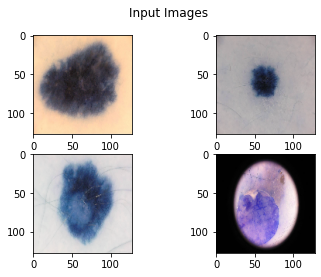

groundtruth


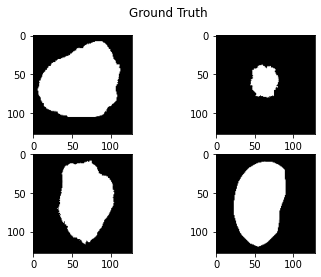

prediction


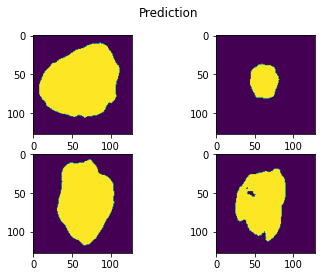

In [51]:
prediction(model=r2unet_model)

In [52]:
gc.collect()

53861

**Ensemble Model - Best 2 Models**

In [53]:
def ensemble_evaluate(models=[]):
    
    """ Load the test data """
    dataset_path = "/content"
    (train_x, train_y), (valid_x, valid_y), (test_x, test_y) = load_data(dataset_path)

    SCORE = []
    for x, y in tqdm(zip(test_x, test_y), total=len(test_x)):
        """ Exctracting the image name """
        name = x.split("/")[-1]

        """ Read the image and mask """
        ori_x, x = read_image_test(x)
        ori_y, y = read_mask_test(y)
        y_preds = []
        for model in models:
          y_pred = model.predict(x)[0]
          y_preds.append(y_pred)
        y_preds = np.asarray(y_preds)
        
        y_pred = np.mean(y_preds, axis=0) > 0.5
       
        y_pred = np.squeeze(y_pred, axis=-1)
        y_pred = y_pred.astype(np.int32)


        """ Flatten the array """
        y = y.flatten()
        y_pred = y_pred.flatten()

        """ Calculating metrics values """
        acc_value = accuracy_score(y, y_pred)
        f1_value = f1_score(y, y_pred, labels=[0, 1], average="binary")
        jac_value = jaccard_score(y, y_pred, labels=[0, 1], average="binary")
        recall_value = recall_score(y, y_pred, labels=[0, 1], average="binary")
        # precision_value = precision_score(y, y_pred, labels=[0, 1], average="binary")
        precision_value = precision_score(y, y_pred, labels=np.unique(y_pred), average='weighted')
        iou_value = iou(y, y_pred)
        SCORE.append([name, acc_value, f1_value, jac_value, recall_value, precision_value,iou_value])

    """ mean metrics values """
    score = [s[1:] for s in SCORE]
    score = np.mean(score, axis=0)
    print(f"--------------------------------------------------------------------------")
    print(f"Accuracy: {score[0]:0.5f}")
    print(f"F1: {score[1]:0.5f}")
    print(f"Jaccard: {score[2]:0.5f}")
    print(f"Recall: {score[3]:0.5f}")
    print(f"Precision: {score[4]:0.5f}")
    print(f"IOU: {score[5]:0.5f}")
    return score

In [54]:
ensemble_evaluate(models=[model_unet, model_unet_plus])
# r2unet_model

  0%|          | 0/389 [00:00<?, ?it/s]

1/1 [==============================] - 0s 15ms/step


  0%|          | 1/389 [00:00<01:27,  4.43it/s]

1/1 [==============================] - 0s 15ms/step


  1%|          | 2/389 [00:00<02:00,  3.22it/s]

1/1 [==============================] - 0s 16ms/step


  1%|          | 3/389 [00:00<01:49,  3.53it/s]

1/1 [==============================] - 0s 15ms/step


  1%|          | 4/389 [00:00<01:25,  4.50it/s]

1/1 [==============================] - 0s 15ms/step


  1%|▏         | 5/389 [00:01<01:26,  4.42it/s]

1/1 [==============================] - 0s 15ms/step


  2%|▏         | 6/389 [00:01<01:43,  3.71it/s]

1/1 [==============================] - 0s 15ms/step


  2%|▏         | 7/389 [00:02<02:40,  2.38it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 8/389 [00:03<03:16,  1.93it/s]

1/1 [==============================] - 0s 15ms/step


  2%|▏         | 9/389 [00:03<03:40,  1.73it/s]

1/1 [==============================] - 0s 15ms/step


  3%|▎         | 10/389 [00:03<02:46,  2.28it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 11/389 [00:03<02:09,  2.91it/s]

1/1 [==============================] - 0s 15ms/step


  3%|▎         | 12/389 [00:04<02:03,  3.06it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 13/389 [00:05<02:52,  2.18it/s]

1/1 [==============================] - 0s 15ms/step


  4%|▎         | 14/389 [00:05<02:20,  2.67it/s]

1/1 [==============================] - 0s 15ms/step


  4%|▍         | 15/389 [00:05<01:51,  3.34it/s]

1/1 [==============================] - 0s 15ms/step


  4%|▍         | 16/389 [00:05<01:44,  3.55it/s]

1/1 [==============================] - 0s 15ms/step


  4%|▍         | 17/389 [00:05<01:33,  4.00it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 18/389 [00:06<01:36,  3.83it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 19/389 [00:06<02:34,  2.39it/s]

1/1 [==============================] - 0s 15ms/step


  5%|▌         | 20/389 [00:07<02:15,  2.73it/s]

1/1 [==============================] - 0s 15ms/step


  5%|▌         | 21/389 [00:07<02:56,  2.09it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▌         | 22/389 [00:08<03:28,  1.76it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 23/389 [00:08<02:50,  2.15it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▌         | 24/389 [00:08<02:13,  2.74it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▋         | 25/389 [00:09<02:54,  2.08it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 26/389 [00:10<02:40,  2.27it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 27/389 [00:10<02:05,  2.89it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 28/389 [00:10<01:40,  3.58it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 29/389 [00:10<01:24,  4.27it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 30/389 [00:11<02:22,  2.51it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 31/389 [00:11<02:03,  2.89it/s]

1/1 [==============================] - 0s 16ms/step


  8%|▊         | 32/389 [00:11<02:03,  2.90it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 33/389 [00:11<01:38,  3.60it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▊         | 34/389 [00:12<02:31,  2.34it/s]

1/1 [==============================] - 0s 19ms/step


  9%|▉         | 35/389 [00:13<02:29,  2.37it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 36/389 [00:13<02:23,  2.46it/s]

1/1 [==============================] - 0s 15ms/step


 10%|▉         | 37/389 [00:13<01:53,  3.10it/s]

1/1 [==============================] - 0s 17ms/step


 10%|▉         | 38/389 [00:13<01:43,  3.39it/s]

1/1 [==============================] - 0s 18ms/step


 10%|█         | 39/389 [00:14<01:34,  3.71it/s]

1/1 [==============================] - 0s 15ms/step


 10%|█         | 40/389 [00:14<01:19,  4.39it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█         | 41/389 [00:14<01:34,  3.70it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█         | 42/389 [00:15<02:23,  2.41it/s]

1/1 [==============================] - 0s 27ms/step


 11%|█         | 43/389 [00:15<02:06,  2.73it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█▏        | 44/389 [00:15<02:08,  2.68it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 45/389 [00:16<01:45,  3.26it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█▏        | 46/389 [00:16<01:29,  3.84it/s]

1/1 [==============================] - 0s 18ms/step


 12%|█▏        | 47/389 [00:16<01:16,  4.45it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 48/389 [00:16<01:32,  3.68it/s]

1/1 [==============================] - 0s 17ms/step


 13%|█▎        | 49/389 [00:17<02:24,  2.35it/s]

1/1 [==============================] - 0s 17ms/step


 13%|█▎        | 50/389 [00:17<02:07,  2.66it/s]

1/1 [==============================] - 0s 18ms/step


 13%|█▎        | 51/389 [00:18<02:48,  2.01it/s]

1/1 [==============================] - 0s 16ms/step


 13%|█▎        | 52/389 [00:18<02:32,  2.22it/s]

1/1 [==============================] - 0s 18ms/step


 14%|█▎        | 53/389 [00:19<03:10,  1.77it/s]

1/1 [==============================] - 0s 15ms/step


 14%|█▍        | 54/389 [00:20<03:35,  1.55it/s]

1/1 [==============================] - 0s 15ms/step


 14%|█▍        | 55/389 [00:20<02:53,  1.92it/s]

1/1 [==============================] - 0s 15ms/step


 14%|█▍        | 56/389 [00:20<02:19,  2.39it/s]

1/1 [==============================] - 0s 15ms/step


 15%|█▍        | 57/389 [00:21<02:54,  1.90it/s]

1/1 [==============================] - 0s 15ms/step


 15%|█▍        | 58/389 [00:22<02:36,  2.12it/s]

1/1 [==============================] - 0s 16ms/step


 15%|█▌        | 59/389 [00:22<02:13,  2.47it/s]

1/1 [==============================] - 0s 15ms/step


 15%|█▌        | 60/389 [00:22<01:57,  2.80it/s]

1/1 [==============================] - 0s 16ms/step


 16%|█▌        | 61/389 [00:22<01:35,  3.44it/s]

1/1 [==============================] - 0s 17ms/step


 16%|█▌        | 62/389 [00:23<02:23,  2.29it/s]

1/1 [==============================] - 0s 17ms/step


 16%|█▌        | 63/389 [00:23<02:05,  2.60it/s]

1/1 [==============================] - 0s 16ms/step


 16%|█▋        | 64/389 [00:23<01:42,  3.17it/s]

1/1 [==============================] - 0s 16ms/step


 17%|█▋        | 65/389 [00:24<01:48,  2.99it/s]

1/1 [==============================] - 0s 15ms/step


 17%|█▋        | 66/389 [00:25<02:32,  2.12it/s]

1/1 [==============================] - 0s 16ms/step


 17%|█▋        | 67/389 [00:25<03:00,  1.78it/s]

1/1 [==============================] - 0s 15ms/step


 17%|█▋        | 68/389 [00:26<02:38,  2.03it/s]

1/1 [==============================] - 0s 16ms/step


 18%|█▊        | 69/389 [00:26<02:14,  2.38it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 70/389 [00:27<02:49,  1.89it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 71/389 [00:27<02:20,  2.27it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▊        | 72/389 [00:27<02:15,  2.34it/s]

1/1 [==============================] - 0s 17ms/step


 19%|█▉        | 73/389 [00:28<01:47,  2.94it/s]

1/1 [==============================] - 0s 17ms/step


 19%|█▉        | 74/389 [00:28<01:28,  3.54it/s]

1/1 [==============================] - 0s 16ms/step


 19%|█▉        | 75/389 [00:28<01:14,  4.21it/s]

1/1 [==============================] - 0s 16ms/step


 20%|█▉        | 76/389 [00:28<01:04,  4.83it/s]

1/1 [==============================] - 0s 18ms/step


 20%|█▉        | 77/389 [00:28<00:58,  5.31it/s]

1/1 [==============================] - 0s 18ms/step


 20%|██        | 78/389 [00:28<00:54,  5.75it/s]

1/1 [==============================] - 0s 15ms/step


 20%|██        | 79/389 [00:29<01:12,  4.26it/s]

1/1 [==============================] - 0s 16ms/step


 21%|██        | 80/389 [00:29<01:13,  4.18it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 81/389 [00:30<01:57,  2.62it/s]

1/1 [==============================] - 0s 16ms/step


 21%|██        | 82/389 [00:30<01:43,  2.96it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██▏       | 83/389 [00:30<01:47,  2.84it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 84/389 [00:30<01:37,  3.11it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 85/389 [00:31<01:20,  3.80it/s]

1/1 [==============================] - 0s 16ms/step


 22%|██▏       | 86/389 [00:31<01:28,  3.41it/s]

1/1 [==============================] - 0s 17ms/step


 22%|██▏       | 87/389 [00:31<01:35,  3.16it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 88/389 [00:32<01:38,  3.07it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 89/389 [00:32<01:43,  2.90it/s]

1/1 [==============================] - 0s 16ms/step


 23%|██▎       | 90/389 [00:33<02:21,  2.11it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██▎       | 91/389 [00:33<01:50,  2.69it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▎       | 92/389 [00:33<01:52,  2.65it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 93/389 [00:33<01:29,  3.30it/s]

1/1 [==============================] - 0s 16ms/step


 24%|██▍       | 94/389 [00:34<01:14,  3.96it/s]

1/1 [==============================] - 0s 17ms/step


 24%|██▍       | 95/389 [00:34<01:09,  4.23it/s]

1/1 [==============================] - 0s 17ms/step


 25%|██▍       | 96/389 [00:34<01:16,  3.82it/s]

1/1 [==============================] - 0s 17ms/step


 25%|██▍       | 97/389 [00:34<01:05,  4.45it/s]

1/1 [==============================] - 0s 17ms/step


 25%|██▌       | 98/389 [00:35<01:55,  2.51it/s]

1/1 [==============================] - 0s 16ms/step


 25%|██▌       | 99/389 [00:35<01:52,  2.58it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 100/389 [00:36<01:40,  2.88it/s]

1/1 [==============================] - 0s 17ms/step


 26%|██▌       | 101/389 [00:36<01:21,  3.52it/s]

1/1 [==============================] - 0s 17ms/step


 26%|██▌       | 102/389 [00:36<01:09,  4.11it/s]

1/1 [==============================] - 0s 16ms/step


 26%|██▋       | 103/389 [00:36<01:07,  4.22it/s]

1/1 [==============================] - 0s 16ms/step


 27%|██▋       | 104/389 [00:36<00:59,  4.82it/s]

1/1 [==============================] - 0s 16ms/step


 27%|██▋       | 105/389 [00:37<01:16,  3.72it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 106/389 [00:37<01:14,  3.81it/s]

1/1 [==============================] - 0s 17ms/step


 28%|██▊       | 107/389 [00:37<01:22,  3.44it/s]

1/1 [==============================] - 0s 16ms/step


 28%|██▊       | 108/389 [00:37<01:08,  4.11it/s]

1/1 [==============================] - 0s 16ms/step


 28%|██▊       | 109/389 [00:38<00:58,  4.79it/s]

1/1 [==============================] - 0s 17ms/step


 28%|██▊       | 110/389 [00:38<00:52,  5.32it/s]

1/1 [==============================] - 0s 17ms/step


 29%|██▊       | 111/389 [00:38<00:47,  5.80it/s]

1/1 [==============================] - 0s 17ms/step


 29%|██▉       | 112/389 [00:38<00:45,  6.12it/s]

1/1 [==============================] - 0s 17ms/step


 29%|██▉       | 113/389 [00:38<00:51,  5.38it/s]

1/1 [==============================] - 0s 16ms/step


 29%|██▉       | 114/389 [00:38<00:56,  4.89it/s]

1/1 [==============================] - 0s 15ms/step


 30%|██▉       | 115/389 [00:39<00:55,  4.95it/s]

1/1 [==============================] - 0s 15ms/step


 30%|██▉       | 116/389 [00:39<01:39,  2.73it/s]

1/1 [==============================] - 0s 16ms/step


 30%|███       | 117/389 [00:40<02:09,  2.09it/s]

1/1 [==============================] - 0s 16ms/step


 30%|███       | 118/389 [00:41<01:59,  2.27it/s]

1/1 [==============================] - 0s 17ms/step


 31%|███       | 119/389 [00:41<01:43,  2.61it/s]

1/1 [==============================] - 0s 16ms/step


 31%|███       | 120/389 [00:41<01:22,  3.25it/s]

1/1 [==============================] - 0s 17ms/step


 31%|███       | 121/389 [00:41<01:08,  3.90it/s]

1/1 [==============================] - 0s 17ms/step


 31%|███▏      | 122/389 [00:41<01:07,  3.98it/s]

1/1 [==============================] - 0s 16ms/step


 32%|███▏      | 123/389 [00:42<01:15,  3.52it/s]

1/1 [==============================] - 0s 16ms/step


 32%|███▏      | 124/389 [00:42<01:54,  2.32it/s]

1/1 [==============================] - 0s 16ms/step


 32%|███▏      | 125/389 [00:43<01:48,  2.44it/s]

1/1 [==============================] - 0s 16ms/step


 32%|███▏      | 126/389 [00:43<01:25,  3.06it/s]

1/1 [==============================] - 0s 16ms/step


 33%|███▎      | 127/389 [00:44<02:03,  2.12it/s]

1/1 [==============================] - 0s 16ms/step


 33%|███▎      | 128/389 [00:44<01:36,  2.69it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 129/389 [00:44<01:17,  3.34it/s]

1/1 [==============================] - 0s 16ms/step


 33%|███▎      | 130/389 [00:44<01:04,  4.00it/s]

1/1 [==============================] - 0s 16ms/step


 34%|███▎      | 131/389 [00:44<01:12,  3.55it/s]

1/1 [==============================] - 0s 16ms/step


 34%|███▍      | 132/389 [00:45<01:09,  3.70it/s]

1/1 [==============================] - 0s 17ms/step


 34%|███▍      | 133/389 [00:45<01:16,  3.33it/s]

1/1 [==============================] - 0s 17ms/step


 34%|███▍      | 134/389 [00:45<01:12,  3.54it/s]

1/1 [==============================] - 0s 16ms/step


 35%|███▍      | 135/389 [00:46<01:09,  3.68it/s]

1/1 [==============================] - 0s 16ms/step


 35%|███▍      | 136/389 [00:46<00:58,  4.35it/s]

1/1 [==============================] - 0s 17ms/step


 35%|███▌      | 137/389 [00:46<01:05,  3.84it/s]

1/1 [==============================] - 0s 16ms/step


 35%|███▌      | 138/389 [00:46<01:09,  3.61it/s]

1/1 [==============================] - 0s 16ms/step


 36%|███▌      | 139/389 [00:47<01:05,  3.84it/s]

1/1 [==============================] - 0s 15ms/step


 36%|███▌      | 140/389 [00:47<01:02,  3.98it/s]

1/1 [==============================] - 0s 17ms/step


 36%|███▌      | 141/389 [00:47<01:11,  3.49it/s]

1/1 [==============================] - 0s 16ms/step


 37%|███▋      | 142/389 [00:48<01:42,  2.40it/s]

1/1 [==============================] - 0s 16ms/step


 37%|███▋      | 143/389 [00:48<01:29,  2.74it/s]

1/1 [==============================] - 0s 16ms/step


 37%|███▋      | 144/389 [00:48<01:20,  3.05it/s]

1/1 [==============================] - 0s 16ms/step


 37%|███▋      | 145/389 [00:49<01:14,  3.29it/s]

1/1 [==============================] - 0s 15ms/step


 38%|███▊      | 146/389 [00:49<01:04,  3.76it/s]

1/1 [==============================] - 0s 16ms/step


 38%|███▊      | 147/389 [00:49<01:11,  3.41it/s]

1/1 [==============================] - 0s 15ms/step


 38%|███▊      | 148/389 [00:50<01:15,  3.20it/s]

1/1 [==============================] - 0s 16ms/step


 38%|███▊      | 149/389 [00:50<01:09,  3.43it/s]

1/1 [==============================] - 0s 16ms/step


 39%|███▊      | 150/389 [00:51<01:42,  2.32it/s]

1/1 [==============================] - 0s 16ms/step


 39%|███▉      | 151/389 [00:51<01:21,  2.92it/s]

1/1 [==============================] - 0s 15ms/step


 39%|███▉      | 152/389 [00:51<01:06,  3.56it/s]

1/1 [==============================] - 0s 17ms/step


 39%|███▉      | 153/389 [00:51<01:00,  3.91it/s]

1/1 [==============================] - 0s 17ms/step


 40%|███▉      | 154/389 [00:51<00:51,  4.55it/s]

1/1 [==============================] - 0s 16ms/step


 40%|███▉      | 155/389 [00:51<00:49,  4.75it/s]

1/1 [==============================] - 0s 16ms/step


 40%|████      | 156/389 [00:52<00:59,  3.89it/s]

1/1 [==============================] - 0s 16ms/step


 40%|████      | 157/389 [00:52<00:59,  3.93it/s]

1/1 [==============================] - 0s 17ms/step


 41%|████      | 158/389 [00:52<01:02,  3.70it/s]

1/1 [==============================] - 0s 15ms/step


 41%|████      | 159/389 [00:52<00:52,  4.35it/s]

1/1 [==============================] - 0s 16ms/step


 41%|████      | 160/389 [00:53<00:46,  4.97it/s]

1/1 [==============================] - 0s 15ms/step


 41%|████▏     | 161/389 [00:53<01:26,  2.64it/s]

1/1 [==============================] - 0s 15ms/step


 42%|████▏     | 162/389 [00:53<01:08,  3.30it/s]

1/1 [==============================] - 0s 16ms/step


 42%|████▏     | 163/389 [00:54<00:57,  3.92it/s]

1/1 [==============================] - 0s 18ms/step


 42%|████▏     | 164/389 [00:54<01:29,  2.51it/s]

1/1 [==============================] - 0s 16ms/step


 42%|████▏     | 165/389 [00:55<01:27,  2.57it/s]

1/1 [==============================] - 0s 15ms/step


 43%|████▎     | 166/389 [00:55<01:18,  2.85it/s]

1/1 [==============================] - 0s 15ms/step


 43%|████▎     | 167/389 [00:55<01:18,  2.82it/s]

1/1 [==============================] - 0s 16ms/step


 43%|████▎     | 168/389 [00:56<01:45,  2.10it/s]

1/1 [==============================] - 0s 16ms/step


 43%|████▎     | 169/389 [00:56<01:26,  2.55it/s]

1/1 [==============================] - 0s 16ms/step


 44%|████▎     | 170/389 [00:57<01:22,  2.66it/s]

1/1 [==============================] - 0s 15ms/step


 44%|████▍     | 171/389 [00:57<01:20,  2.70it/s]

1/1 [==============================] - 0s 15ms/step


 44%|████▍     | 172/389 [00:57<01:18,  2.75it/s]

1/1 [==============================] - 0s 15ms/step


 44%|████▍     | 173/389 [00:58<01:09,  3.13it/s]

1/1 [==============================] - 0s 15ms/step


 45%|████▍     | 174/389 [00:58<01:13,  2.94it/s]

1/1 [==============================] - 0s 15ms/step


 45%|████▍     | 175/389 [00:59<01:37,  2.19it/s]

1/1 [==============================] - 0s 15ms/step


 45%|████▌     | 176/389 [00:59<01:22,  2.57it/s]

1/1 [==============================] - 0s 15ms/step


 46%|████▌     | 177/389 [00:59<01:05,  3.22it/s]

1/1 [==============================] - 0s 15ms/step


 46%|████▌     | 178/389 [00:59<00:58,  3.61it/s]

1/1 [==============================] - 0s 16ms/step


 46%|████▌     | 179/389 [01:00<01:04,  3.24it/s]

1/1 [==============================] - 0s 15ms/step


 46%|████▋     | 180/389 [01:00<01:32,  2.26it/s]

1/1 [==============================] - 0s 15ms/step


 47%|████▋     | 181/389 [01:00<01:12,  2.87it/s]

1/1 [==============================] - 0s 15ms/step


 47%|████▋     | 182/389 [01:01<00:58,  3.56it/s]

1/1 [==============================] - 0s 15ms/step


 47%|████▋     | 183/389 [01:01<01:26,  2.39it/s]

1/1 [==============================] - 0s 15ms/step


 47%|████▋     | 184/389 [01:01<01:10,  2.89it/s]

1/1 [==============================] - 0s 14ms/step


 48%|████▊     | 185/389 [01:02<01:35,  2.14it/s]

1/1 [==============================] - 0s 14ms/step


 48%|████▊     | 186/389 [01:03<01:25,  2.37it/s]

1/1 [==============================] - 0s 15ms/step


 48%|████▊     | 187/389 [01:03<01:13,  2.73it/s]

1/1 [==============================] - 0s 16ms/step


 48%|████▊     | 188/389 [01:03<00:59,  3.40it/s]

1/1 [==============================] - 0s 16ms/step


 49%|████▊     | 189/389 [01:04<01:25,  2.34it/s]

1/1 [==============================] - 0s 15ms/step


 49%|████▉     | 190/389 [01:04<01:17,  2.57it/s]

1/1 [==============================] - 0s 15ms/step


 49%|████▉     | 191/389 [01:04<01:01,  3.20it/s]

1/1 [==============================] - 0s 15ms/step


 49%|████▉     | 192/389 [01:05<01:27,  2.26it/s]

1/1 [==============================] - 0s 16ms/step


 50%|████▉     | 193/389 [01:05<01:15,  2.61it/s]

1/1 [==============================] - 0s 15ms/step


 50%|████▉     | 194/389 [01:05<01:12,  2.69it/s]

1/1 [==============================] - 0s 16ms/step


 50%|█████     | 195/389 [01:06<01:10,  2.76it/s]

1/1 [==============================] - 0s 15ms/step


 50%|█████     | 196/389 [01:06<01:02,  3.09it/s]

1/1 [==============================] - 0s 15ms/step


 51%|█████     | 197/389 [01:06<01:01,  3.14it/s]

1/1 [==============================] - 0s 14ms/step


 51%|█████     | 198/389 [01:06<00:49,  3.84it/s]

1/1 [==============================] - 0s 15ms/step


 51%|█████     | 199/389 [01:07<01:19,  2.38it/s]

1/1 [==============================] - 0s 15ms/step


 51%|█████▏    | 200/389 [01:07<01:02,  3.01it/s]

1/1 [==============================] - 0s 17ms/step


 52%|█████▏    | 201/389 [01:07<00:51,  3.68it/s]

1/1 [==============================] - 0s 15ms/step


 52%|█████▏    | 202/389 [01:08<00:42,  4.36it/s]

1/1 [==============================] - 0s 15ms/step


 52%|█████▏    | 203/389 [01:08<00:43,  4.30it/s]

1/1 [==============================] - 0s 15ms/step


 52%|█████▏    | 204/389 [01:08<00:47,  3.93it/s]

1/1 [==============================] - 0s 15ms/step


 53%|█████▎    | 205/389 [01:08<00:39,  4.62it/s]

1/1 [==============================] - 0s 15ms/step


 53%|█████▎    | 206/389 [01:08<00:34,  5.25it/s]

1/1 [==============================] - 0s 16ms/step


 53%|█████▎    | 207/389 [01:09<00:36,  4.93it/s]

1/1 [==============================] - 0s 15ms/step


 53%|█████▎    | 208/389 [01:09<00:38,  4.66it/s]

1/1 [==============================] - 0s 15ms/step


 54%|█████▎    | 209/389 [01:10<01:06,  2.70it/s]

1/1 [==============================] - 0s 15ms/step


 54%|█████▍    | 210/389 [01:10<01:04,  2.76it/s]

1/1 [==============================] - 0s 15ms/step


 54%|█████▍    | 211/389 [01:10<00:51,  3.43it/s]

1/1 [==============================] - 0s 15ms/step


 54%|█████▍    | 212/389 [01:10<00:43,  4.11it/s]

1/1 [==============================] - 0s 15ms/step


 55%|█████▍    | 213/389 [01:11<00:48,  3.61it/s]

1/1 [==============================] - 0s 16ms/step


 55%|█████▌    | 214/389 [01:11<00:40,  4.31it/s]

1/1 [==============================] - 0s 14ms/step


 55%|█████▌    | 215/389 [01:11<01:05,  2.66it/s]

1/1 [==============================] - 0s 15ms/step


 56%|█████▌    | 216/389 [01:12<01:23,  2.07it/s]

1/1 [==============================] - 0s 15ms/step


 56%|█████▌    | 217/389 [01:12<01:06,  2.57it/s]

1/1 [==============================] - 0s 15ms/step


 56%|█████▌    | 218/389 [01:13<00:56,  3.03it/s]

1/1 [==============================] - 0s 16ms/step


 56%|█████▋    | 219/389 [01:13<00:51,  3.31it/s]

1/1 [==============================] - 0s 15ms/step


 57%|█████▋    | 220/389 [01:13<00:42,  4.01it/s]

1/1 [==============================] - 0s 16ms/step


 57%|█████▋    | 221/389 [01:13<00:35,  4.68it/s]

1/1 [==============================] - 0s 15ms/step


 57%|█████▋    | 222/389 [01:13<00:33,  4.96it/s]

1/1 [==============================] - 0s 15ms/step


 57%|█████▋    | 223/389 [01:14<00:41,  4.05it/s]

1/1 [==============================] - 0s 17ms/step


 58%|█████▊    | 224/389 [01:14<00:41,  4.00it/s]

1/1 [==============================] - 0s 16ms/step


 58%|█████▊    | 225/389 [01:14<00:40,  4.08it/s]

1/1 [==============================] - 0s 15ms/step


 58%|█████▊    | 226/389 [01:15<01:03,  2.57it/s]

1/1 [==============================] - 0s 16ms/step


 58%|█████▊    | 227/389 [01:15<00:55,  2.91it/s]

1/1 [==============================] - 0s 15ms/step


 59%|█████▊    | 228/389 [01:15<00:44,  3.59it/s]

1/1 [==============================] - 0s 15ms/step


 59%|█████▉    | 229/389 [01:15<00:37,  4.32it/s]

1/1 [==============================] - 0s 14ms/step


 59%|█████▉    | 230/389 [01:15<00:37,  4.28it/s]

1/1 [==============================] - 0s 14ms/step


 59%|█████▉    | 231/389 [01:16<00:36,  4.34it/s]

1/1 [==============================] - 0s 15ms/step


 60%|█████▉    | 232/389 [01:16<00:31,  5.02it/s]

1/1 [==============================] - 0s 15ms/step


 60%|█████▉    | 233/389 [01:17<00:56,  2.75it/s]

1/1 [==============================] - 0s 15ms/step


 60%|██████    | 234/389 [01:17<00:55,  2.78it/s]

1/1 [==============================] - 0s 16ms/step


 60%|██████    | 235/389 [01:17<00:48,  3.18it/s]

1/1 [==============================] - 0s 15ms/step


 61%|██████    | 236/389 [01:17<00:39,  3.85it/s]

1/1 [==============================] - 0s 15ms/step


 61%|██████    | 237/389 [01:18<00:44,  3.45it/s]

1/1 [==============================] - 0s 15ms/step


 61%|██████    | 238/389 [01:18<00:36,  4.17it/s]

1/1 [==============================] - 0s 16ms/step


 61%|██████▏   | 239/389 [01:18<00:33,  4.47it/s]

1/1 [==============================] - 0s 14ms/step


 62%|██████▏   | 240/389 [01:18<00:28,  5.18it/s]

1/1 [==============================] - 0s 15ms/step


 62%|██████▏   | 241/389 [01:18<00:33,  4.43it/s]

1/1 [==============================] - 0s 16ms/step


 62%|██████▏   | 242/389 [01:19<00:56,  2.59it/s]

1/1 [==============================] - 0s 15ms/step


 62%|██████▏   | 243/389 [01:19<00:53,  2.72it/s]

1/1 [==============================] - 0s 15ms/step


 63%|██████▎   | 244/389 [01:20<00:42,  3.39it/s]

1/1 [==============================] - 0s 15ms/step


 63%|██████▎   | 245/389 [01:20<00:39,  3.68it/s]

1/1 [==============================] - 0s 15ms/step


 63%|██████▎   | 246/389 [01:20<00:42,  3.33it/s]

1/1 [==============================] - 0s 15ms/step


 63%|██████▎   | 247/389 [01:20<00:40,  3.55it/s]

1/1 [==============================] - 0s 15ms/step


 64%|██████▍   | 248/389 [01:21<00:59,  2.37it/s]

1/1 [==============================] - 0s 15ms/step


 64%|██████▍   | 249/389 [01:21<00:51,  2.73it/s]

1/1 [==============================] - 0s 15ms/step


 64%|██████▍   | 250/389 [01:22<00:45,  3.05it/s]

1/1 [==============================] - 0s 15ms/step


 65%|██████▍   | 251/389 [01:22<00:41,  3.32it/s]

1/1 [==============================] - 0s 15ms/step


 65%|██████▍   | 252/389 [01:22<00:38,  3.53it/s]

1/1 [==============================] - 0s 16ms/step


 65%|██████▌   | 253/389 [01:22<00:32,  4.16it/s]

1/1 [==============================] - 0s 15ms/step


 65%|██████▌   | 254/389 [01:22<00:32,  4.15it/s]

1/1 [==============================] - 0s 15ms/step


 66%|██████▌   | 255/389 [01:23<00:52,  2.56it/s]

1/1 [==============================] - 0s 15ms/step


 66%|██████▌   | 256/389 [01:24<00:48,  2.73it/s]

1/1 [==============================] - 0s 15ms/step


 66%|██████▌   | 257/389 [01:24<00:38,  3.40it/s]

1/1 [==============================] - 0s 16ms/step


 66%|██████▋   | 258/389 [01:24<00:36,  3.61it/s]

1/1 [==============================] - 0s 17ms/step


 67%|██████▋   | 259/389 [01:24<00:34,  3.73it/s]

1/1 [==============================] - 0s 16ms/step


 67%|██████▋   | 260/389 [01:24<00:38,  3.37it/s]

1/1 [==============================] - 0s 15ms/step


 67%|██████▋   | 261/389 [01:25<00:40,  3.17it/s]

1/1 [==============================] - 0s 16ms/step


 67%|██████▋   | 262/389 [01:25<00:42,  3.01it/s]

1/1 [==============================] - 0s 15ms/step


 68%|██████▊   | 263/389 [01:26<00:57,  2.20it/s]

1/1 [==============================] - 0s 15ms/step


 68%|██████▊   | 264/389 [01:26<00:53,  2.34it/s]

1/1 [==============================] - 0s 15ms/step


 68%|██████▊   | 265/389 [01:27<01:03,  1.94it/s]

1/1 [==============================] - 0s 16ms/step


 68%|██████▊   | 266/389 [01:27<00:49,  2.49it/s]

1/1 [==============================] - 0s 16ms/step


 69%|██████▊   | 267/389 [01:27<00:45,  2.71it/s]

1/1 [==============================] - 0s 15ms/step


 69%|██████▉   | 268/389 [01:28<00:41,  2.89it/s]

1/1 [==============================] - 0s 15ms/step


 69%|██████▉   | 269/389 [01:28<00:35,  3.35it/s]

1/1 [==============================] - 0s 16ms/step


 69%|██████▉   | 270/389 [01:29<00:51,  2.31it/s]

1/1 [==============================] - 0s 17ms/step


 70%|██████▉   | 271/389 [01:30<01:04,  1.84it/s]

1/1 [==============================] - 0s 15ms/step


 70%|██████▉   | 272/389 [01:30<01:10,  1.66it/s]

1/1 [==============================] - 0s 16ms/step


 70%|███████   | 273/389 [01:31<01:00,  1.91it/s]

1/1 [==============================] - 0s 15ms/step


 70%|███████   | 274/389 [01:31<00:50,  2.28it/s]

1/1 [==============================] - 0s 16ms/step


 71%|███████   | 275/389 [01:31<00:47,  2.41it/s]

1/1 [==============================] - 0s 16ms/step


 71%|███████   | 276/389 [01:31<00:37,  3.03it/s]

1/1 [==============================] - 0s 15ms/step


 71%|███████   | 277/389 [01:32<00:34,  3.28it/s]

1/1 [==============================] - 0s 18ms/step


 71%|███████▏  | 278/389 [01:32<00:28,  3.94it/s]

1/1 [==============================] - 0s 16ms/step


 72%|███████▏  | 279/389 [01:32<00:31,  3.49it/s]

1/1 [==============================] - 0s 15ms/step


 72%|███████▏  | 280/389 [01:33<00:47,  2.31it/s]

1/1 [==============================] - 0s 15ms/step


 72%|███████▏  | 281/389 [01:33<00:40,  2.66it/s]

1/1 [==============================] - 0s 16ms/step


 72%|███████▏  | 282/389 [01:33<00:32,  3.30it/s]

1/1 [==============================] - 0s 16ms/step


 73%|███████▎  | 283/389 [01:34<00:34,  3.09it/s]

1/1 [==============================] - 0s 15ms/step


 73%|███████▎  | 284/389 [01:34<00:48,  2.16it/s]

1/1 [==============================] - 0s 16ms/step


 73%|███████▎  | 285/389 [01:35<00:37,  2.74it/s]

1/1 [==============================] - 0s 16ms/step


 74%|███████▎  | 286/389 [01:35<00:49,  2.10it/s]

1/1 [==============================] - 0s 16ms/step


 74%|███████▍  | 287/389 [01:35<00:38,  2.66it/s]

1/1 [==============================] - 0s 16ms/step


 74%|███████▍  | 288/389 [01:36<00:30,  3.30it/s]

1/1 [==============================] - 0s 16ms/step


 74%|███████▍  | 289/389 [01:36<00:32,  3.11it/s]

1/1 [==============================] - 0s 16ms/step


 75%|███████▍  | 290/389 [01:37<00:45,  2.17it/s]

1/1 [==============================] - 0s 15ms/step


 75%|███████▍  | 291/389 [01:37<00:38,  2.52it/s]

1/1 [==============================] - 0s 16ms/step


 75%|███████▌  | 292/389 [01:37<00:30,  3.14it/s]

1/1 [==============================] - 0s 17ms/step


 75%|███████▌  | 293/389 [01:37<00:28,  3.37it/s]

1/1 [==============================] - 0s 16ms/step


 76%|███████▌  | 294/389 [01:37<00:23,  4.03it/s]

1/1 [==============================] - 0s 17ms/step


 76%|███████▌  | 295/389 [01:38<00:27,  3.42it/s]

1/1 [==============================] - 0s 17ms/step


 76%|███████▌  | 296/389 [01:38<00:26,  3.54it/s]

1/1 [==============================] - 0s 17ms/step


 76%|███████▋  | 297/389 [01:39<00:39,  2.32it/s]

1/1 [==============================] - 0s 17ms/step


 77%|███████▋  | 298/389 [01:39<00:31,  2.90it/s]

1/1 [==============================] - 0s 17ms/step


 77%|███████▋  | 299/389 [01:39<00:28,  3.18it/s]

1/1 [==============================] - 0s 16ms/step


 77%|███████▋  | 300/389 [01:40<00:40,  2.19it/s]

1/1 [==============================] - 0s 15ms/step


 77%|███████▋  | 301/389 [01:40<00:34,  2.55it/s]

1/1 [==============================] - 0s 16ms/step


 78%|███████▊  | 302/389 [01:41<00:30,  2.86it/s]

1/1 [==============================] - 0s 15ms/step


 78%|███████▊  | 303/389 [01:41<00:26,  3.29it/s]

1/1 [==============================] - 0s 16ms/step


 78%|███████▊  | 304/389 [01:41<00:24,  3.52it/s]

1/1 [==============================] - 0s 16ms/step


 78%|███████▊  | 305/389 [01:41<00:22,  3.69it/s]

1/1 [==============================] - 0s 15ms/step


 79%|███████▊  | 306/389 [01:41<00:18,  4.37it/s]

1/1 [==============================] - 0s 15ms/step


 79%|███████▉  | 307/389 [01:42<00:31,  2.59it/s]

1/1 [==============================] - 0s 16ms/step


 79%|███████▉  | 308/389 [01:42<00:26,  3.10it/s]

1/1 [==============================] - 0s 15ms/step


 79%|███████▉  | 309/389 [01:42<00:21,  3.78it/s]

1/1 [==============================] - 0s 17ms/step


 80%|███████▉  | 310/389 [01:43<00:32,  2.40it/s]

1/1 [==============================] - 0s 16ms/step


 80%|███████▉  | 311/389 [01:44<00:41,  1.88it/s]

1/1 [==============================] - 0s 16ms/step


 80%|████████  | 312/389 [01:44<00:31,  2.43it/s]

1/1 [==============================] - 0s 16ms/step


 80%|████████  | 313/389 [01:45<00:39,  1.93it/s]

1/1 [==============================] - 0s 18ms/step


 81%|████████  | 314/389 [01:46<00:45,  1.67it/s]

1/1 [==============================] - 0s 16ms/step


 81%|████████  | 315/389 [01:46<00:39,  1.89it/s]

1/1 [==============================] - 0s 17ms/step


 81%|████████  | 316/389 [01:46<00:29,  2.44it/s]

1/1 [==============================] - 0s 17ms/step


 81%|████████▏ | 317/389 [01:46<00:23,  3.02it/s]

1/1 [==============================] - 0s 17ms/step


 82%|████████▏ | 318/389 [01:47<00:32,  2.17it/s]

1/1 [==============================] - 0s 17ms/step


 82%|████████▏ | 319/389 [01:47<00:25,  2.75it/s]

1/1 [==============================] - 0s 16ms/step


 82%|████████▏ | 320/389 [01:48<00:25,  2.74it/s]

1/1 [==============================] - 0s 15ms/step


 83%|████████▎ | 321/389 [01:48<00:22,  3.03it/s]

1/1 [==============================] - 0s 18ms/step


 83%|████████▎ | 322/389 [01:48<00:20,  3.27it/s]

1/1 [==============================] - 0s 17ms/step


 83%|████████▎ | 323/389 [01:48<00:21,  3.07it/s]

1/1 [==============================] - 0s 16ms/step


 83%|████████▎ | 324/389 [01:49<00:30,  2.16it/s]

1/1 [==============================] - 0s 16ms/step


 84%|████████▎ | 325/389 [01:50<00:26,  2.37it/s]

1/1 [==============================] - 0s 16ms/step


 84%|████████▍ | 326/389 [01:50<00:21,  2.99it/s]

1/1 [==============================] - 0s 16ms/step


 84%|████████▍ | 327/389 [01:50<00:28,  2.16it/s]

1/1 [==============================] - 0s 15ms/step


 84%|████████▍ | 328/389 [01:51<00:22,  2.77it/s]

1/1 [==============================] - 0s 17ms/step


 85%|████████▍ | 329/389 [01:51<00:21,  2.76it/s]

1/1 [==============================] - 0s 16ms/step


 85%|████████▍ | 330/389 [01:51<00:19,  3.05it/s]

1/1 [==============================] - 0s 15ms/step


 85%|████████▌ | 331/389 [01:52<00:19,  2.95it/s]

1/1 [==============================] - 0s 16ms/step


 85%|████████▌ | 332/389 [01:52<00:20,  2.80it/s]

1/1 [==============================] - 0s 16ms/step


 86%|████████▌ | 333/389 [01:52<00:16,  3.46it/s]

1/1 [==============================] - 0s 15ms/step


 86%|████████▌ | 334/389 [01:52<00:13,  4.12it/s]

1/1 [==============================] - 0s 16ms/step


 86%|████████▌ | 335/389 [01:53<00:15,  3.56it/s]

1/1 [==============================] - 0s 16ms/step


 86%|████████▋ | 336/389 [01:53<00:22,  2.36it/s]

1/1 [==============================] - 0s 16ms/step


 87%|████████▋ | 337/389 [01:54<00:21,  2.47it/s]

1/1 [==============================] - 0s 16ms/step


 87%|████████▋ | 338/389 [01:54<00:19,  2.59it/s]

1/1 [==============================] - 0s 16ms/step


 87%|████████▋ | 339/389 [01:54<00:19,  2.63it/s]

1/1 [==============================] - 0s 16ms/step


 87%|████████▋ | 340/389 [01:55<00:14,  3.28it/s]

1/1 [==============================] - 0s 16ms/step


 88%|████████▊ | 341/389 [01:55<00:12,  3.96it/s]

1/1 [==============================] - 0s 15ms/step


 88%|████████▊ | 342/389 [01:55<00:10,  4.62it/s]

1/1 [==============================] - 0s 15ms/step


 88%|████████▊ | 343/389 [01:55<00:10,  4.50it/s]

1/1 [==============================] - 0s 15ms/step


 88%|████████▊ | 344/389 [01:55<00:09,  4.63it/s]

1/1 [==============================] - 0s 17ms/step


 89%|████████▊ | 345/389 [01:55<00:09,  4.48it/s]

1/1 [==============================] - 0s 16ms/step


 89%|████████▉ | 346/389 [01:56<00:08,  5.10it/s]

1/1 [==============================] - 0s 15ms/step


 89%|████████▉ | 347/389 [01:56<00:08,  4.75it/s]

1/1 [==============================] - 0s 15ms/step


 89%|████████▉ | 348/389 [01:56<00:10,  3.89it/s]

1/1 [==============================] - 0s 16ms/step


 90%|████████▉ | 349/389 [01:56<00:08,  4.57it/s]

1/1 [==============================] - 0s 15ms/step


 90%|████████▉ | 350/389 [01:57<00:14,  2.68it/s]

1/1 [==============================] - 0s 15ms/step


 90%|█████████ | 351/389 [01:57<00:13,  2.73it/s]

1/1 [==============================] - 0s 15ms/step


 90%|█████████ | 352/389 [01:58<00:17,  2.10it/s]

1/1 [==============================] - 0s 15ms/step


 91%|█████████ | 353/389 [01:58<00:14,  2.54it/s]

1/1 [==============================] - 0s 16ms/step


 91%|█████████ | 354/389 [01:59<00:12,  2.88it/s]

1/1 [==============================] - 0s 16ms/step


 91%|█████████▏| 355/389 [01:59<00:10,  3.12it/s]

1/1 [==============================] - 0s 15ms/step


 92%|█████████▏| 356/389 [01:59<00:10,  3.03it/s]

1/1 [==============================] - 0s 15ms/step


 92%|█████████▏| 357/389 [01:59<00:09,  3.22it/s]

1/1 [==============================] - 0s 15ms/step


 92%|█████████▏| 358/389 [02:00<00:14,  2.18it/s]

1/1 [==============================] - 0s 16ms/step


 92%|█████████▏| 359/389 [02:00<00:10,  2.78it/s]

1/1 [==============================] - 0s 15ms/step


 93%|█████████▎| 360/389 [02:01<00:09,  3.11it/s]

1/1 [==============================] - 0s 16ms/step


 93%|█████████▎| 361/389 [02:01<00:12,  2.24it/s]

1/1 [==============================] - 0s 16ms/step


 93%|█████████▎| 362/389 [02:02<00:09,  2.83it/s]

1/1 [==============================] - 0s 15ms/step


 93%|█████████▎| 363/389 [02:02<00:09,  2.82it/s]

1/1 [==============================] - 0s 16ms/step


 94%|█████████▎| 364/389 [02:03<00:11,  2.13it/s]

1/1 [==============================] - 0s 15ms/step


 94%|█████████▍| 365/389 [02:03<00:10,  2.30it/s]

1/1 [==============================] - 0s 15ms/step


 94%|█████████▍| 366/389 [02:04<00:12,  1.85it/s]

1/1 [==============================] - 0s 16ms/step


 94%|█████████▍| 367/389 [02:04<00:10,  2.04it/s]

1/1 [==============================] - 0s 16ms/step


 95%|█████████▍| 368/389 [02:05<00:12,  1.75it/s]

1/1 [==============================] - 0s 15ms/step


 95%|█████████▍| 369/389 [02:05<00:08,  2.26it/s]

1/1 [==============================] - 0s 16ms/step


 95%|█████████▌| 370/389 [02:05<00:06,  2.87it/s]

1/1 [==============================] - 0s 15ms/step


 95%|█████████▌| 371/389 [02:05<00:05,  3.13it/s]

1/1 [==============================] - 0s 16ms/step


 96%|█████████▌| 372/389 [02:06<00:05,  3.37it/s]

1/1 [==============================] - 0s 16ms/step


 96%|█████████▌| 373/389 [02:06<00:04,  3.56it/s]

1/1 [==============================] - 0s 16ms/step


 96%|█████████▌| 374/389 [02:06<00:04,  3.64it/s]

1/1 [==============================] - 0s 15ms/step


 96%|█████████▋| 375/389 [02:06<00:03,  4.26it/s]

1/1 [==============================] - 0s 15ms/step


 97%|█████████▋| 376/389 [02:07<00:03,  3.69it/s]

1/1 [==============================] - 0s 15ms/step


 97%|█████████▋| 377/389 [02:07<00:02,  4.00it/s]

1/1 [==============================] - 0s 17ms/step


 97%|█████████▋| 378/389 [02:07<00:03,  3.54it/s]

1/1 [==============================] - 0s 16ms/step


 97%|█████████▋| 379/389 [02:07<00:02,  3.71it/s]

1/1 [==============================] - 0s 15ms/step


 98%|█████████▊| 380/389 [02:08<00:02,  3.42it/s]

1/1 [==============================] - 0s 15ms/step


 98%|█████████▊| 381/389 [02:08<00:01,  4.11it/s]

1/1 [==============================] - 0s 16ms/step


 98%|█████████▊| 382/389 [02:08<00:01,  4.75it/s]

1/1 [==============================] - 0s 16ms/step


 98%|█████████▊| 383/389 [02:08<00:01,  5.37it/s]

1/1 [==============================] - 0s 17ms/step


 99%|█████████▊| 384/389 [02:08<00:01,  4.47it/s]

1/1 [==============================] - 0s 16ms/step


 99%|█████████▉| 385/389 [02:09<00:00,  4.33it/s]

1/1 [==============================] - 0s 16ms/step


 99%|█████████▉| 386/389 [02:09<00:00,  4.94it/s]

1/1 [==============================] - 0s 15ms/step


 99%|█████████▉| 387/389 [02:10<00:00,  2.72it/s]

1/1 [==============================] - 0s 16ms/step


100%|█████████▉| 388/389 [02:10<00:00,  3.37it/s]

1/1 [==============================] - 0s 16ms/step


100%|██████████| 389/389 [02:10<00:00,  2.98it/s]

--------------------------------------------------------------------------
Accuracy: 0.95323
F1: 0.86999
Jaccard: 0.79665
Recall: 0.85087
Precision: 0.96466
IOU: 0.79665


array([0.9532284 , 0.86999075, 0.79665129, 0.8508688 , 0.96466174,
       0.79665129])

**Ensemble Model - Prediction**

In [55]:
def ensemble_prediction(models=[]):
  pred_masks = []

  for image in images[:4]:
    x_orig, x = read_image_test(image)
    
    y_preds = []
    for model in models:
          y_pred = model.predict(x)[0]
          y_preds.append(y_pred)
    y_preds = np.asarray(y_preds)
        
    y_pred = np.mean(y_preds, axis=0) > 0.5
    y_pred = np.squeeze(y_pred, axis=-1)
    y_pred = y_pred.astype(np.int32)
    pred_masks.append(y_pred)

  print("images")
  fig=plt.figure()
  for i in range(1,5):
    ax=fig.add_subplot(2,2,i)        
    #ax.imshow(Image.open((images[i-1])))
    ax.imshow(read_image(images[i-1]))
  fig.suptitle('Input Images') # or plt.suptitle('Main title')
  plt.show()

  print("groundtruth")
  fig=plt.figure()
  for i in range(1,5):
    ax=fig.add_subplot(2,2,i)        
    #ax.imshow(Image.open((masks[i-1])))
    ax.imshow(read_image(images[i-1]))

  fig.suptitle('Ground Truth') # or plt.suptitle('Main title')
  plt.show()
  
  
  print("prediction")
  fig=plt.figure()
  for i in range(1,5):
    ax=fig.add_subplot(2,2,i)        
    ax.imshow(pred_masks[i-1])

  fig.suptitle('Prediction') # or plt.suptitle('Main title')
  plt.show()

1/1 [==============================] - 0s 16ms/step
images


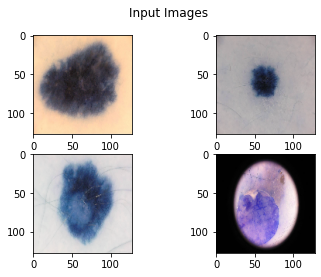

groundtruth


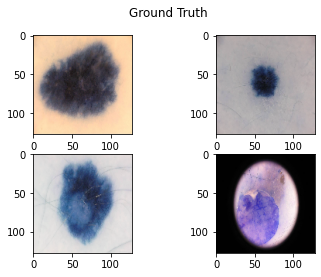

prediction


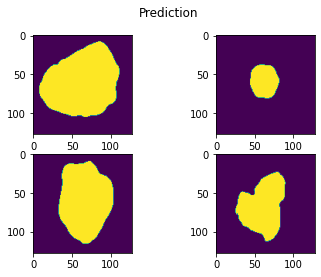

In [56]:
ensemble_prediction(models=[model_unet, model_unet_plus])

**MFSNet Model Training**

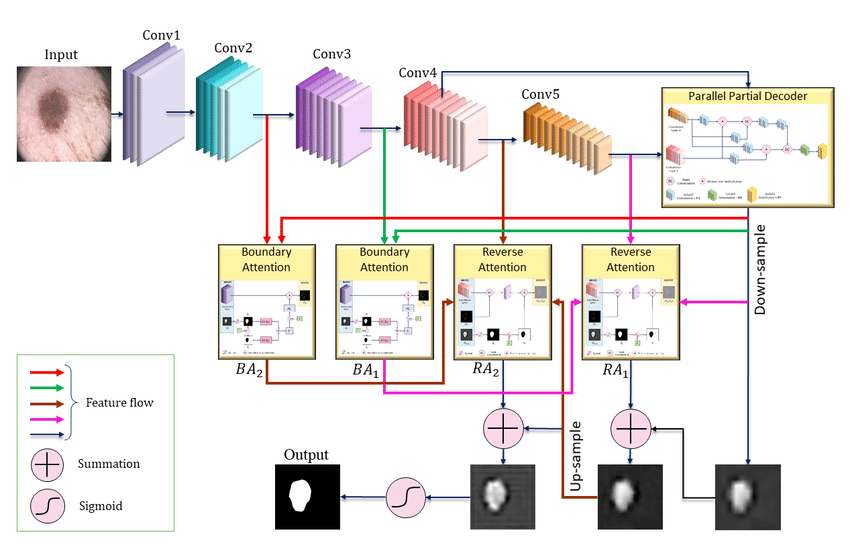

**Proposed Method**

This section describes the architecture of our proposed MFSNet, which combines the high-level semantics and the low-level edge information by using a series of RA modules, BA block, and a PPD module. We propose a hybrid loss function that integrates the widely used Binary Cross-Entropy (BCE) loss with the Weighted IoU loss functions. The whole segmentation process is followed by image inpainting and a preprocessing step for artifact removal

We propose a novel skin lesion segmentation framework, called Multi-Focus Segmentation Network (MFSNet), that produces the final segmentation map by focusing on image information at multiple scales. Taking a clue from the standard clinical practice, we can say that the area and boundary are the two essential aspects to produce the accurate pixel-level segmentation map based on local appearance from a coarse localization of the melanoma region. The proposed model generates a coarse segmentation map implicitly by aggregating image features at multiple levels, followed by a series of reverse and boundary attention networks by iteratively learning pixel-level information of area and boundary by explicitly using the coarse map and ground truth the global guidance. We have evaluated the performance of the proposed model on ISIC 2018 DataSet

In [57]:
!pip install thop

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [58]:
import torch
from torch.autograd import Variable
import os
import argparse
from datetime import datetime
import torch.nn.functional as F
import os
from PIL import Image
import torch.utils.data as data
import torchvision.transforms as transforms
import math
import torch.utils.model_zoo as model_zoo
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from thop import profile
from thop import clever_format

__all__ = ['Res2Net', 'res2net50_v1b', 'res2net101_v1b', 'res2net50_v1b_26w_4s']

lr = 1e-4
#epoch = 5
epoch = 30
batchsize = 16
trainsize = 128
clip=0.5
decay_rate=0.5
train_path="/content/ISIC2018_Task1-2_Training_Input/"
gt_path="/content/ISIC2018_Task1_Training_GroundTruth/"
train_save="mfsnet"
dataset_path = "/content"
(train_x, train_y), (valid_x, valid_y), (test_x, test_y) = load_data(dataset_path)

class SkinDataset(data.Dataset):
    def __init__(self, image_root, gt_root, trainsize):
        self.trainsize = trainsize
        self.images = train_x #[image_root + f for f in os.listdir(image_root) if f.endswith('.jpg') or f.endswith('.png')]
        self.gts = train_y #[gt_root + f for f in os.listdir(gt_root) if f.endswith('.png')]
        self.images = sorted(self.images)
        self.gts = sorted(self.gts)
  
        self.size = len(self.images)
        self.img_transform = transforms.Compose([
            transforms.Resize((self.trainsize, self.trainsize)),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406],
                                 [0.229, 0.224, 0.225])])
        self.gt_transform = transforms.Compose([
            transforms.Resize((self.trainsize, self.trainsize)),
            transforms.ToTensor()])

    def __getitem__(self, index):
        image = self.rgb_loader(self.images[index])
        gt = self.binary_loader(self.gts[index])
        image = self.img_transform(image)
        gt = self.gt_transform(gt)
        return image, gt

    def rgb_loader(self, path):
        with open(path, 'rb') as f:
            img = Image.open(f)
            return img.convert('RGB')

    def binary_loader(self, path):
        with open(path, 'rb') as f:
            img = Image.open(f)
            # return img.convert('1')
            return img.convert('L')

    def resize(self, img, gt):
        assert img.size == gt.size
        w, h = img.size
        if h < self.trainsize or w < self.trainsize:
            h = max(h, self.trainsize)
            w = max(w, self.trainsize)
            return img.resize((w, h), Image.BILINEAR), gt.resize((w, h), Image.NEAREST)
        else:
            return img, gt

    def __len__(self):
        return self.size

class Bottle2neck(nn.Module):
    expansion = 4

    def __init__(self, inplanes, planes, stride=1, downsample=None, baseWidth=26, scale=4, stype='normal'):
       
        super(Bottle2neck, self).__init__()

        width = int(math.floor(planes * (baseWidth / 64.0)))
        self.conv1 = nn.Conv2d(inplanes, width * scale, kernel_size=1, bias=False)
        self.bn1 = nn.BatchNorm2d(width * scale)

        if scale == 1:
            self.nums = 1
        else:
            self.nums = scale - 1
        if stype == 'stage':
            self.pool = nn.AvgPool2d(kernel_size=3, stride=stride, padding=1)
        convs = []
        bns = []
        for i in range(self.nums):
            convs.append(nn.Conv2d(width, width, kernel_size=3, stride=stride, padding=1, bias=False))
            bns.append(nn.BatchNorm2d(width))
        self.convs = nn.ModuleList(convs)
        self.bns = nn.ModuleList(bns)

        self.conv3 = nn.Conv2d(width * scale, planes * self.expansion, kernel_size=1, bias=False)
        self.bn3 = nn.BatchNorm2d(planes * self.expansion)

        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample
        self.stype = stype
        self.scale = scale
        self.width = width

    def forward(self, x):
        residual = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        spx = torch.split(out, self.width, 1)
        for i in range(self.nums):
            if i == 0 or self.stype == 'stage':
                sp = spx[i]
            else:
                sp = sp + spx[i]
            sp = self.convs[i](sp)
            sp = self.relu(self.bns[i](sp))
            if i == 0:
                out = sp
            else:
                out = torch.cat((out, sp), 1)
        if self.scale != 1 and self.stype == 'normal':
            out = torch.cat((out, spx[self.nums]), 1)
        elif self.scale != 1 and self.stype == 'stage':
            out = torch.cat((out, self.pool(spx[self.nums])), 1)

        out = self.conv3(out)
        out = self.bn3(out)

        if self.downsample is not None:
            residual = self.downsample(x)

        out += residual
        out = self.relu(out)

        return out


class Res2Net(nn.Module):

    def __init__(self, block, layers, baseWidth=26, scale=4, num_classes=1000):
        self.inplanes = 64
        super(Res2Net, self).__init__()
        self.baseWidth = baseWidth
        self.scale = scale
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 32, 3, 2, 1, bias=False),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.Conv2d(32, 32, 3, 1, 1, bias=False),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.Conv2d(32, 64, 3, 1, 1, bias=False)
        )
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.layer1 = self._make_layer(block, 64, layers[0])
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2)
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2)
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2)
        self.avgpool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Linear(512 * block.expansion, num_classes)

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

    def _make_layer(self, block, planes, blocks, stride=1):
        downsample = None
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                nn.AvgPool2d(kernel_size=stride, stride=stride,
                             ceil_mode=True, count_include_pad=False),
                nn.Conv2d(self.inplanes, planes * block.expansion,
                          kernel_size=1, stride=1, bias=False),
                nn.BatchNorm2d(planes * block.expansion),
            )

        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample=downsample,
                            stype='stage', baseWidth=self.baseWidth, scale=self.scale))
        self.inplanes = planes * block.expansion
        for i in range(1, blocks):
            layers.append(block(self.inplanes, planes, baseWidth=self.baseWidth, scale=self.scale))

        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)

        return x


def res2net50_v1b(pretrained=False, **kwargs):
    
    model = Res2Net(Bottle2neck, [3, 4, 6, 3], baseWidth=26, scale=4, **kwargs)
    return model


def res2net101_v1b(pretrained=False, **kwargs):
    
    model = Res2Net(Bottle2neck, [3, 4, 23, 3], baseWidth=26, scale=4, **kwargs)
    if pretrained:
        model.load_state_dict(model_zoo.load_url(model_urls['res2net101_v1b_26w_4s']))
    return model


def res2net50_v1b_26w_4s(pretrained=False, **kwargs):
    
    model = Res2Net(Bottle2neck, [3, 4, 6, 3], baseWidth=26, scale=4, **kwargs)
    if pretrained:
        model_state = torch.load('Snapshots/Res2net/res2net50.pth')
        model.load_state_dict(model_state)
        # lib.load_state_dict(model_zoo.load_url(model_urls['res2net50_v1b_26w_4s']))
    return model


def res2net101_v1b_26w_4s(pretrained=False, **kwargs):
   
    model = Res2Net(Bottle2neck, [3, 4, 23, 3], baseWidth=26, scale=4, **kwargs)
    if pretrained:
        model.load_state_dict(model_zoo.load_url(model_urls['res2net101_v1b_26w_4s']))
    return model


def res2net152_v1b_26w_4s(pretrained=False, **kwargs):
   
    model = Res2Net(Bottle2neck, [3, 8, 36, 3], baseWidth=26, scale=4, **kwargs)
    if pretrained:
        model.load_state_dict(model_zoo.load_url(model_urls['res2net152_v1b_26w_4s']))
    return model

def clip_gradient(optimizer, grad_clip):
    
    for group in optimizer.param_groups:
        for param in group['params']:
            if param.grad is not None:
                param.grad.data.clamp_(-grad_clip, grad_clip)


def adjust_lr(optimizer, init_lr, epoch, decay_rate=0.1, decay_epoch=30):
    decay = decay_rate ** (epoch // decay_epoch)
    for param_group in optimizer.param_groups:
        param_group['lr'] *= decay


class AvgMeter(object):
    def __init__(self, num=40):
        self.num = num
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0
        self.losses = []

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count
        self.losses.append(val)

    def show(self):
        return torch.mean(torch.stack(self.losses[np.maximum(len(self.losses)-self.num, 0):]))


def CalParams(model, input_tensor):
   
    flops, params = profile(model, inputs=(input_tensor,))
    flops, params = clever_format([flops, params], "%.3f")
    print('[Statistics Information]\nFLOPs: {}\nParams: {}'.format(flops, params))

class BasicConv2d(nn.Module):
    def __init__(self, in_planes, out_planes, kernel_size, stride=1, padding=0, dilation=1):
        super(BasicConv2d, self).__init__()
        self.conv = nn.Conv2d(in_planes, out_planes,
                              kernel_size=kernel_size, stride=stride,
                              padding=padding, dilation=dilation, bias=False)
        self.bn = nn.BatchNorm2d(out_planes)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        x = self.conv(x)
        x = self.bn(x)
        return x


class RFB_modified(nn.Module):
    def __init__(self, in_channel, out_channel):
        super(RFB_modified, self).__init__()
        self.relu = nn.ReLU(True)
        self.branch0 = nn.Sequential(
            BasicConv2d(in_channel, out_channel, 1),
        )
        self.branch1 = nn.Sequential(
            BasicConv2d(in_channel, out_channel, 1),
            BasicConv2d(out_channel, out_channel, kernel_size=(1, 3), padding=(0, 1)),
            BasicConv2d(out_channel, out_channel, kernel_size=(3, 1), padding=(1, 0)),
            BasicConv2d(out_channel, out_channel, 3, padding=3, dilation=3)
        )
        self.branch2 = nn.Sequential(
            BasicConv2d(in_channel, out_channel, 1),
            BasicConv2d(out_channel, out_channel, kernel_size=(1, 5), padding=(0, 2)),
            BasicConv2d(out_channel, out_channel, kernel_size=(5, 1), padding=(2, 0)),
            BasicConv2d(out_channel, out_channel, 3, padding=5, dilation=5)
        )
        self.branch3 = nn.Sequential(
            BasicConv2d(in_channel, out_channel, 1),
            BasicConv2d(out_channel, out_channel, kernel_size=(1, 7), padding=(0, 3)),
            BasicConv2d(out_channel, out_channel, kernel_size=(7, 1), padding=(3, 0)),
            BasicConv2d(out_channel, out_channel, 3, padding=7, dilation=7)
        )
        self.conv_cat = BasicConv2d(4*out_channel, out_channel, 3, padding=1)
        self.conv_res = BasicConv2d(in_channel, out_channel, 1)

    def forward(self, x):
        x0 = self.branch0(x)
        x1 = self.branch1(x)
        x2 = self.branch2(x)
        x3 = self.branch3(x)
        x_cat = self.conv_cat(torch.cat((x0, x1, x2, x3), 1))

        x = self.relu(x_cat + self.conv_res(x))
        return x


class aggregation(nn.Module):
    # dense aggregation, it can be replaced by other aggregation previous, such as DSS, amulet, and so on.
    # used after MSF
    def __init__(self, channel,n_class):
        super(aggregation, self).__init__()
        self.relu = nn.ReLU(True)

        self.upsample = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        self.conv_upsample1 = BasicConv2d(channel, channel, 3, padding=1)
        self.conv_upsample2 = BasicConv2d(channel, channel, 3, padding=1)
        self.conv_upsample3 = BasicConv2d(channel, channel, 3, padding=1)
        self.conv_upsample4 = BasicConv2d(channel, channel, 3, padding=1)
        self.conv_upsample5 = BasicConv2d(2*channel, 2*channel, 3, padding=1)

        self.conv_concat2 = BasicConv2d(2*channel, 2*channel, 3, padding=1)
        self.conv_concat3 = BasicConv2d(3*channel, 3*channel, 3, padding=1)
        self.conv4 = BasicConv2d(3*channel, 3*channel, 3, padding=1)
        self.conv5 = nn.Conv2d(3*channel, 1, 1)

    def forward(self, x1, x2, x3):
        x1_1 = x1
        x2_1 = self.conv_upsample1(self.upsample(x1)) * x2
        x3_1 = self.conv_upsample2(self.upsample(self.upsample(x1))) \
               * self.conv_upsample3(self.upsample(x2)) * x3

        x2_2 = torch.cat((x2_1, self.conv_upsample4(self.upsample(x1_1))), 1)
        x2_2 = self.conv_concat2(x2_2)

        x3_2 = torch.cat((x3_1, self.conv_upsample5(self.upsample(x2_2))), 1)
        x3_2 = self.conv_concat3(x3_2)

        x = self.conv4(x3_2)
        x = self.conv5(x)

        return x


class MFSNet(nn.Module):
    # res2net based encoder decoder
    def __init__(self, channel=32,n_class=1):
        super(MFSNet, self).__init__()
        # ---- ResNet Backbone ----
        self.resnet = res2net50_v1b_26w_4s()
        # ---- Receptive Field Block like module ----
        self.rfb2_1 = RFB_modified(512, channel)
        self.rfb3_1 = RFB_modified(1024, channel)
        self.rfb4_1 = RFB_modified(2048, channel)
        # ---- Partial Decoder ----
        self.agg1 = aggregation(channel,n_class)
        # ---- reverse attention branch 4 ----
        self.ra4_conv1 = BasicConv2d(2048, 256, kernel_size=1)
        self.ra4_conv2 = BasicConv2d(256, 256, kernel_size=5, padding=2)
        self.ra4_conv3 = BasicConv2d(256, 256, kernel_size=5, padding=2)
        self.ra4_conv4 = BasicConv2d(256, 256, kernel_size=5, padding=2)
        self.ra4_conv5 = BasicConv2d(256, n_class, kernel_size=1)
        # ---- reverse attention branch 3 ----
        self.ra3_conv1 = BasicConv2d(1024, 64, kernel_size=1)
        self.ra3_conv2 = BasicConv2d(64, 64, kernel_size=3, padding=1)
        self.ra3_conv3 = BasicConv2d(64, 64, kernel_size=3, padding=1)
        self.ra3_conv4 = BasicConv2d(64, n_class, kernel_size=3, padding=1)
        # ---- reverse attention branch 2 ----
        self.ra2_conv1 = BasicConv2d(512, 64, kernel_size=1)
        self.ra2_conv2 = BasicConv2d(64, 64, kernel_size=3, padding=1)
        self.ra2_conv3 = BasicConv2d(64, 64, kernel_size=3, padding=1)
        self.ra2_conv4 = BasicConv2d(64, n_class, kernel_size=3, padding=1)

        
        self.edge_conv1 = BasicConv2d(256, 64, kernel_size=1)
        self.edge_conv2 = BasicConv2d(64, 64, kernel_size=3, padding=1)
        self.edge_conv3 = BasicConv2d(64, 64, kernel_size=3, padding=1)
        self.edge_conv4 = BasicConv2d(64, n_class, kernel_size=3, padding=1)

    def forward(self, x):
        x = self.resnet.conv1(x)
        x = self.resnet.bn1(x)
        x = self.resnet.relu(x)
        x = self.resnet.maxpool(x)      # bs, 64, 88, 88
        # ---- low-level features ----
        x1 = self.resnet.layer1(x)      # bs, 256, 88, 88
        x2 = self.resnet.layer2(x1)     # bs, 512, 44, 44
        # ---- high-level features ----
        #x2 = self.resnet.layer2(x1)     # bs, 512, 44, 44
        x3 = self.resnet.layer3(x2)     # bs, 1024, 22, 22
        x4 = self.resnet.layer4(x3)     # bs, 2048, 11, 11
        x2_rfb = self.rfb2_1(x2)        # channel -> 32
        x3_rfb = self.rfb3_1(x3)        # channel -> 32
        x4_rfb = self.rfb4_1(x4)        # channel -> 32

        
        x = self.edge_conv1(x1)
        x = self.edge_conv2(x)
        edge_guidance = self.edge_conv3(x)  # torch.Size([1, 64, 88, 88])
        lateral_edge = self.edge_conv4(edge_guidance)   # NOTES: Sup-2 (bs, 1, 88, 88) -> (bs, 1, 352, 352)
        lateral_edge = F.interpolate(lateral_edge,
                                     scale_factor=4,
                                     mode='bilinear')

        # ---- global guidance ----
        ra5_feat = self.agg1(x4_rfb, x3_rfb, x2_rfb)
        lateral_map_5 = F.interpolate(ra5_feat, scale_factor=8, mode='bilinear')    # NOTES: Sup-1 (bs, 1, 44, 44) -> (bs, 1, 352, 352)


        # ---- reverse attention branch_4 ----
        crop_4 = F.interpolate(ra5_feat, scale_factor=0.25, mode='bilinear')
        x = -1*(torch.sigmoid(crop_4)) + 1
        x = x.expand(-1, 2048, -1, -1).mul(x4)
        x = self.ra4_conv1(x)
        x = F.relu(self.ra4_conv2(x))
        x = F.relu(self.ra4_conv3(x))
        x = F.relu(self.ra4_conv4(x))
        ra4_feat = self.ra4_conv5(x)
        x = ra4_feat + crop_4
        lateral_map_4 = F.interpolate(x, scale_factor=32, mode='bilinear')  # NOTES: Sup-2 (bs, 1, 11, 11) -> (bs, 1, 352, 352)

        # ---- reverse attention branch_3 ----
        crop_3 = F.interpolate(x, scale_factor=2, mode='bilinear')
        x = -1*(torch.sigmoid(crop_3)) + 1
        x = x.expand(-1, 1024, -1, -1).mul(x3)
        x = self.ra3_conv1(x)
        x = F.relu(self.ra3_conv2(x))
        x = F.relu(self.ra3_conv3(x))
        ra3_feat = self.ra3_conv4(x)
        x = ra3_feat + crop_3
        lateral_map_3 = F.interpolate(x, scale_factor=16, mode='bilinear')  # NOTES: Sup-3 (bs, 1, 22, 22) -> (bs, 1, 352, 352)

        # ---- reverse attention branch_2 ----
        crop_2 = F.interpolate(x, scale_factor=2, mode='bilinear')
        x = -1*(torch.sigmoid(crop_2)) + 1
        x = x.expand(-1, 512, -1, -1).mul(x2)
        x = self.ra2_conv1(x)
        x = F.relu(self.ra2_conv2(x))
        x = F.relu(self.ra2_conv3(x))
        ra2_feat = self.ra2_conv4(x)
        x = ra2_feat + crop_2
        lateral_map_2 = F.interpolate(x, scale_factor=8, mode='bilinear')   # NOTES: Sup-4 (bs, 1, 44, 44) -> (bs, 1, 352, 352)

        return lateral_map_5, lateral_map_4, lateral_map_3, lateral_map_2

def get_loader(image_root, gt_root, batchsize, trainsize, shuffle=True, num_workers=4, pin_memory=True):

    dataset = SkinDataset(image_root, gt_root, trainsize)
    data_loader = data.DataLoader(dataset=dataset,
                                  batch_size=batchsize,
                                  shuffle=shuffle,
                                  num_workers=num_workers,
                                  pin_memory=pin_memory)
    return data_loader



"""
Training 
"""

def structure_loss(pred, mask):
    weit = 1 + 5*torch.abs(F.avg_pool2d(mask, kernel_size=31, stride=1, padding=15) - mask)
    wbce = F.binary_cross_entropy_with_logits(pred, mask, reduce='none')
    wbce = (weit*wbce).sum(dim=(2, 3)) / weit.sum(dim=(2, 3))

    pred = torch.sigmoid(pred)
    inter = ((pred * mask)*weit).sum(dim=(2, 3))
    union = ((pred + mask)*weit).sum(dim=(2, 3))
    wiou = 1 - (inter + 1)/(union - inter+1)
    return (wbce + wiou).mean()


def train(train_loader, model, optimizer, epoch, trainsize):
    model.train()
    # ---- multi-scale training ----
    size_rates = [0.75, 1, 1.25]
    loss_record2, loss_record3, loss_record4, loss_record5 = AvgMeter(), AvgMeter(), AvgMeter(), AvgMeter()
    for i, pack in enumerate(train_loader, start=1):
        for rate in size_rates:
            optimizer.zero_grad()
            # ---- data prepare ----
            images, gts = pack
            images = Variable(images)
            gts = Variable(gts)
            # ---- rescale ----
            trainsize = int(round(trainsize*rate/32)*32)
            if rate != 1:
                images = F.upsample(images, size=(trainsize, trainsize), mode='bilinear', align_corners=True)
                gts = F.upsample(gts, size=(trainsize, trainsize), mode='bilinear', align_corners=True)
            # ---- forward ----
            lateral_map_5, lateral_map_4, lateral_map_3, lateral_map_2 = model(images)
            # ---- loss function ----
            loss5 = structure_loss(lateral_map_5, gts)
            loss4 = structure_loss(lateral_map_4, gts)
            loss3 = structure_loss(lateral_map_3, gts)
            loss2 = structure_loss(lateral_map_2, gts)
            loss = loss2 + loss3 + loss4 + loss5    # TODO: try different weights for loss
            # ---- backward ----
            loss.backward()
            clip_gradient(optimizer, clip)
            optimizer.step()
            # ---- recording loss ----
            if rate == 1:
                loss_record2.update(loss2.data, batchsize)
                loss_record3.update(loss3.data, batchsize)
                loss_record4.update(loss4.data, batchsize)
                loss_record5.update(loss5.data, batchsize)
        # ---- train visualization ----
        if i % 20 == 0 or i == total_step:
            print('{} Epoch [{:03d}/{:03d}], Step [{:04d}/{:04d}], '
                  '[lateral-2: {:.4f}, lateral-3: {:0.4f}, lateral-4: {:0.4f}, lateral-5: {:0.4f}]'.
                  format(datetime.now(), epoch, epoch, i, total_step,
                         loss_record2.show(), loss_record3.show(), loss_record4.show(), loss_record5.show()))
    save_path = '/content/Snapshots/{}/'.format(train_save)
    os.makedirs(save_path, exist_ok=True)

    if (epoch+1) % 2 == 0:
        torch.save(model.state_dict(), save_path + 'MFSNet.pth')
        print('[Saving Snapshot:]', save_path + 'MFSNet.pth')




model = MFSNet()

# ---- flops and params ----
params = model.parameters()
optimizer = torch.optim.Adam(params, lr)

image_root = '{}'.format(train_path)
gt_root = '{}'.format(gt_path)

train_loader = get_loader(image_root, gt_root, batchsize=batchsize, trainsize=trainsize)
total_step = len(train_loader)

print("#"*20, "Start Training", "#"*20)
from tqdm import tqdm


# epoch = 5
for epoch in tqdm(range(1, epoch)):
    adjust_lr(optimizer, lr, epoch, decay_rate, 15)
    train(train_loader, model, optimizer, epoch, trainsize)

#################### Start Training ####################


  0%|          | 0/29 [00:00<?, ?it/s]/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:3734: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/usr/local/lib/python3.8/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


2023-01-31 02:15:56.538077 Epoch [001/001], Step [0020/0114], [lateral-2: 1.1600, lateral-3: 1.1948, lateral-4: 1.1824, lateral-5: 1.3592]
2023-01-31 02:17:23.005037 Epoch [001/001], Step [0040/0114], [lateral-2: 1.0576, lateral-3: 1.1051, lateral-4: 1.1088, lateral-5: 1.3283]
2023-01-31 02:18:49.006978 Epoch [001/001], Step [0060/0114], [lateral-2: 0.9005, lateral-3: 0.9656, lateral-4: 0.9880, lateral-5: 1.1939]
2023-01-31 02:20:16.152441 Epoch [001/001], Step [0080/0114], [lateral-2: 0.8660, lateral-3: 0.9414, lateral-4: 0.9814, lateral-5: 1.1249]
2023-01-31 02:21:45.812636 Epoch [001/001], Step [0100/0114], [lateral-2: 0.8590, lateral-3: 0.9362, lateral-4: 0.9925, lateral-5: 1.1089]
2023-01-31 02:22:39.082807 Epoch [001/001], Step [0114/0114], [lateral-2: 0.8123, lateral-3: 0.8877, lateral-4: 0.9489, lateral-5: 1.0647]


  3%|▎         | 1/29 [08:24<3:55:28, 504.57s/it]

[Saving Snapshot:] /content/Snapshots/mfsnet/MFSNet.pth
2023-01-31 02:24:16.200416 Epoch [002/002], Step [0020/0114], [lateral-2: 0.7196, lateral-3: 0.8005, lateral-4: 0.8750, lateral-5: 0.9702]
2023-01-31 02:25:44.500798 Epoch [002/002], Step [0040/0114], [lateral-2: 0.7112, lateral-3: 0.7939, lateral-4: 0.8768, lateral-5: 0.9577]
2023-01-31 02:27:14.135461 Epoch [002/002], Step [0060/0114], [lateral-2: 0.7169, lateral-3: 0.8004, lateral-4: 0.8897, lateral-5: 0.9337]
2023-01-31 02:28:40.721501 Epoch [002/002], Step [0080/0114], [lateral-2: 0.7006, lateral-3: 0.7776, lateral-4: 0.8684, lateral-5: 0.8872]
2023-01-31 02:30:08.931510 Epoch [002/002], Step [0100/0114], [lateral-2: 0.6670, lateral-3: 0.7445, lateral-4: 0.8416, lateral-5: 0.8661]


  7%|▋         | 2/29 [16:48<3:46:55, 504.27s/it]

2023-01-31 02:31:03.246801 Epoch [002/002], Step [0114/0114], [lateral-2: 0.6667, lateral-3: 0.7450, lateral-4: 0.8416, lateral-5: 0.8580]
2023-01-31 02:32:37.639857 Epoch [003/003], Step [0020/0114], [lateral-2: 0.6759, lateral-3: 0.7355, lateral-4: 0.8376, lateral-5: 0.8054]
2023-01-31 02:34:04.252202 Epoch [003/003], Step [0040/0114], [lateral-2: 0.6387, lateral-3: 0.7096, lateral-4: 0.8135, lateral-5: 0.7876]
2023-01-31 02:35:30.348526 Epoch [003/003], Step [0060/0114], [lateral-2: 0.5859, lateral-3: 0.6668, lateral-4: 0.7761, lateral-5: 0.7510]
2023-01-31 02:36:58.923636 Epoch [003/003], Step [0080/0114], [lateral-2: 0.5811, lateral-3: 0.6597, lateral-4: 0.7777, lateral-5: 0.7454]
2023-01-31 02:38:27.892982 Epoch [003/003], Step [0100/0114], [lateral-2: 0.6145, lateral-3: 0.6900, lateral-4: 0.8066, lateral-5: 0.7662]
2023-01-31 02:39:21.218226 Epoch [003/003], Step [0114/0114], [lateral-2: 0.6209, lateral-3: 0.6943, lateral-4: 0.8025, lateral-5: 0.7588]


 10%|█         | 3/29 [25:06<3:37:20, 501.54s/it]

[Saving Snapshot:] /content/Snapshots/mfsnet/MFSNet.pth
2023-01-31 02:41:00.391740 Epoch [004/004], Step [0020/0114], [lateral-2: 0.5466, lateral-3: 0.6170, lateral-4: 0.7235, lateral-5: 0.6751]
2023-01-31 02:42:27.617258 Epoch [004/004], Step [0040/0114], [lateral-2: 0.5739, lateral-3: 0.6462, lateral-4: 0.7570, lateral-5: 0.6995]
2023-01-31 02:43:58.050071 Epoch [004/004], Step [0060/0114], [lateral-2: 0.5610, lateral-3: 0.6396, lateral-4: 0.7643, lateral-5: 0.6983]
2023-01-31 02:45:24.342949 Epoch [004/004], Step [0080/0114], [lateral-2: 0.5447, lateral-3: 0.6223, lateral-4: 0.7487, lateral-5: 0.6737]
2023-01-31 02:46:51.400445 Epoch [004/004], Step [0100/0114], [lateral-2: 0.5532, lateral-3: 0.6255, lateral-4: 0.7475, lateral-5: 0.6709]


 14%|█▍        | 4/29 [33:28<3:29:02, 501.71s/it]

2023-01-31 02:47:43.521043 Epoch [004/004], Step [0114/0114], [lateral-2: 0.5461, lateral-3: 0.6222, lateral-4: 0.7422, lateral-5: 0.6724]
2023-01-31 02:49:20.496046 Epoch [005/005], Step [0020/0114], [lateral-2: 0.5012, lateral-3: 0.5831, lateral-4: 0.7101, lateral-5: 0.6314]
2023-01-31 02:50:47.733422 Epoch [005/005], Step [0040/0114], [lateral-2: 0.5250, lateral-3: 0.6026, lateral-4: 0.7224, lateral-5: 0.6566]
2023-01-31 02:52:17.517005 Epoch [005/005], Step [0060/0114], [lateral-2: 0.5443, lateral-3: 0.6181, lateral-4: 0.7345, lateral-5: 0.6556]
2023-01-31 02:53:44.571099 Epoch [005/005], Step [0080/0114], [lateral-2: 0.5298, lateral-3: 0.6041, lateral-4: 0.7264, lateral-5: 0.6227]
2023-01-31 02:55:11.109943 Epoch [005/005], Step [0100/0114], [lateral-2: 0.5041, lateral-3: 0.5830, lateral-4: 0.7102, lateral-5: 0.6087]
2023-01-31 02:56:04.251317 Epoch [005/005], Step [0114/0114], [lateral-2: 0.5077, lateral-3: 0.5851, lateral-4: 0.7063, lateral-5: 0.6074]


 17%|█▋        | 5/29 [41:49<3:20:35, 501.48s/it]

[Saving Snapshot:] /content/Snapshots/mfsnet/MFSNet.pth
2023-01-31 02:57:40.779286 Epoch [006/006], Step [0020/0114], [lateral-2: 0.4904, lateral-3: 0.5580, lateral-4: 0.6716, lateral-5: 0.5819]
2023-01-31 02:59:09.021230 Epoch [006/006], Step [0040/0114], [lateral-2: 0.4968, lateral-3: 0.5700, lateral-4: 0.6907, lateral-5: 0.6039]
2023-01-31 03:00:37.072117 Epoch [006/006], Step [0060/0114], [lateral-2: 0.4663, lateral-3: 0.5477, lateral-4: 0.6778, lateral-5: 0.5716]
2023-01-31 03:02:09.611507 Epoch [006/006], Step [0080/0114], [lateral-2: 0.4660, lateral-3: 0.5429, lateral-4: 0.6643, lateral-5: 0.5474]
2023-01-31 03:03:43.761404 Epoch [006/006], Step [0100/0114], [lateral-2: 0.5033, lateral-3: 0.5778, lateral-4: 0.6946, lateral-5: 0.5902]


 21%|██        | 6/29 [50:23<3:13:46, 505.50s/it]

2023-01-31 03:04:37.871470 Epoch [006/006], Step [0114/0114], [lateral-2: 0.4915, lateral-3: 0.5703, lateral-4: 0.6917, lateral-5: 0.5859]
2023-01-31 03:06:15.635145 Epoch [007/007], Step [0020/0114], [lateral-2: 0.4378, lateral-3: 0.5166, lateral-4: 0.6408, lateral-5: 0.5243]
2023-01-31 03:07:42.951230 Epoch [007/007], Step [0040/0114], [lateral-2: 0.4449, lateral-3: 0.5250, lateral-4: 0.6541, lateral-5: 0.5395]
2023-01-31 03:09:10.786500 Epoch [007/007], Step [0060/0114], [lateral-2: 0.4474, lateral-3: 0.5269, lateral-4: 0.6498, lateral-5: 0.5368]
2023-01-31 03:10:36.637451 Epoch [007/007], Step [0080/0114], [lateral-2: 0.4512, lateral-3: 0.5221, lateral-4: 0.6335, lateral-5: 0.5212]
2023-01-31 03:12:05.492225 Epoch [007/007], Step [0100/0114], [lateral-2: 0.4678, lateral-3: 0.5347, lateral-4: 0.6525, lateral-5: 0.5453]
2023-01-31 03:12:58.271108 Epoch [007/007], Step [0114/0114], [lateral-2: 0.4759, lateral-3: 0.5497, lateral-4: 0.6731, lateral-5: 0.5518]


 24%|██▍       | 7/29 [58:43<3:04:46, 503.93s/it]

[Saving Snapshot:] /content/Snapshots/mfsnet/MFSNet.pth
2023-01-31 03:14:31.207560 Epoch [008/008], Step [0020/0114], [lateral-2: 0.4357, lateral-3: 0.5120, lateral-4: 0.6339, lateral-5: 0.5154]
2023-01-31 03:15:58.572964 Epoch [008/008], Step [0040/0114], [lateral-2: 0.4229, lateral-3: 0.5008, lateral-4: 0.6260, lateral-5: 0.4996]
2023-01-31 03:17:28.444851 Epoch [008/008], Step [0060/0114], [lateral-2: 0.4265, lateral-3: 0.5016, lateral-4: 0.6268, lateral-5: 0.4994]
2023-01-31 03:18:54.923310 Epoch [008/008], Step [0080/0114], [lateral-2: 0.4344, lateral-3: 0.5063, lateral-4: 0.6249, lateral-5: 0.5047]
2023-01-31 03:20:26.155974 Epoch [008/008], Step [0100/0114], [lateral-2: 0.4265, lateral-3: 0.4961, lateral-4: 0.6132, lateral-5: 0.4892]


 28%|██▊       | 8/29 [1:07:08<2:56:27, 504.18s/it]

2023-01-31 03:21:23.289190 Epoch [008/008], Step [0114/0114], [lateral-2: 0.4403, lateral-3: 0.5060, lateral-4: 0.6221, lateral-5: 0.5004]
2023-01-31 03:23:03.572562 Epoch [009/009], Step [0020/0114], [lateral-2: 0.3963, lateral-3: 0.4725, lateral-4: 0.6018, lateral-5: 0.4750]
2023-01-31 03:24:36.688978 Epoch [009/009], Step [0040/0114], [lateral-2: 0.3973, lateral-3: 0.4732, lateral-4: 0.5984, lateral-5: 0.4690]
2023-01-31 03:26:08.162055 Epoch [009/009], Step [0060/0114], [lateral-2: 0.3998, lateral-3: 0.4735, lateral-4: 0.5965, lateral-5: 0.4664]
2023-01-31 03:27:38.960931 Epoch [009/009], Step [0080/0114], [lateral-2: 0.4037, lateral-3: 0.4745, lateral-4: 0.5958, lateral-5: 0.4660]
2023-01-31 03:29:09.191805 Epoch [009/009], Step [0100/0114], [lateral-2: 0.4036, lateral-3: 0.4713, lateral-4: 0.5865, lateral-5: 0.4593]
2023-01-31 03:30:03.837195 Epoch [009/009], Step [0114/0114], [lateral-2: 0.4009, lateral-3: 0.4727, lateral-4: 0.5932, lateral-5: 0.4616]


 31%|███       | 9/29 [1:15:50<2:49:51, 509.58s/it]

[Saving Snapshot:] /content/Snapshots/mfsnet/MFSNet.pth
2023-01-31 03:31:44.070463 Epoch [010/010], Step [0020/0114], [lateral-2: 0.3958, lateral-3: 0.4657, lateral-4: 0.5821, lateral-5: 0.4654]
2023-01-31 03:33:12.162141 Epoch [010/010], Step [0040/0114], [lateral-2: 0.3857, lateral-3: 0.4540, lateral-4: 0.5726, lateral-5: 0.4470]
2023-01-31 03:34:39.109461 Epoch [010/010], Step [0060/0114], [lateral-2: 0.3796, lateral-3: 0.4519, lateral-4: 0.5777, lateral-5: 0.4374]
2023-01-31 03:36:08.344506 Epoch [010/010], Step [0080/0114], [lateral-2: 0.3794, lateral-3: 0.4518, lateral-4: 0.5794, lateral-5: 0.4442]
2023-01-31 03:37:38.038067 Epoch [010/010], Step [0100/0114], [lateral-2: 0.3949, lateral-3: 0.4624, lateral-4: 0.5819, lateral-5: 0.4512]


 34%|███▍      | 10/29 [1:24:16<2:41:01, 508.49s/it]

2023-01-31 03:38:30.800143 Epoch [010/010], Step [0114/0114], [lateral-2: 0.4088, lateral-3: 0.4777, lateral-4: 0.5981, lateral-5: 0.4650]
2023-01-31 03:40:04.741517 Epoch [011/011], Step [0020/0114], [lateral-2: 0.3752, lateral-3: 0.4451, lateral-4: 0.5625, lateral-5: 0.4208]
2023-01-31 03:41:34.231738 Epoch [011/011], Step [0040/0114], [lateral-2: 0.3713, lateral-3: 0.4396, lateral-4: 0.5592, lateral-5: 0.4179]
2023-01-31 03:43:01.846962 Epoch [011/011], Step [0060/0114], [lateral-2: 0.3801, lateral-3: 0.4495, lateral-4: 0.5730, lateral-5: 0.4357]
2023-01-31 03:44:29.905197 Epoch [011/011], Step [0080/0114], [lateral-2: 0.3849, lateral-3: 0.4545, lateral-4: 0.5775, lateral-5: 0.4415]
2023-01-31 03:45:59.637824 Epoch [011/011], Step [0100/0114], [lateral-2: 0.3826, lateral-3: 0.4485, lateral-4: 0.5681, lateral-5: 0.4357]
2023-01-31 03:46:51.223244 Epoch [011/011], Step [0114/0114], [lateral-2: 0.3833, lateral-3: 0.4487, lateral-4: 0.5705, lateral-5: 0.4396]


 38%|███▊      | 11/29 [1:32:36<2:31:50, 506.12s/it]

[Saving Snapshot:] /content/Snapshots/mfsnet/MFSNet.pth
2023-01-31 03:48:26.948889 Epoch [012/012], Step [0020/0114], [lateral-2: 0.3593, lateral-3: 0.4247, lateral-4: 0.5514, lateral-5: 0.4004]
2023-01-31 03:49:54.764158 Epoch [012/012], Step [0040/0114], [lateral-2: 0.3693, lateral-3: 0.4367, lateral-4: 0.5579, lateral-5: 0.4199]
2023-01-31 03:51:22.681115 Epoch [012/012], Step [0060/0114], [lateral-2: 0.3743, lateral-3: 0.4477, lateral-4: 0.5721, lateral-5: 0.4391]
2023-01-31 03:52:51.717870 Epoch [012/012], Step [0080/0114], [lateral-2: 0.3693, lateral-3: 0.4385, lateral-4: 0.5634, lateral-5: 0.4285]
2023-01-31 03:54:19.841478 Epoch [012/012], Step [0100/0114], [lateral-2: 0.3687, lateral-3: 0.4317, lateral-4: 0.5532, lateral-5: 0.4156]


 41%|████▏     | 12/29 [1:41:00<2:23:12, 505.46s/it]

2023-01-31 03:55:15.482491 Epoch [012/012], Step [0114/0114], [lateral-2: 0.3646, lateral-3: 0.4291, lateral-4: 0.5485, lateral-5: 0.4109]
2023-01-31 03:56:54.168192 Epoch [013/013], Step [0020/0114], [lateral-2: 0.3194, lateral-3: 0.3897, lateral-4: 0.5158, lateral-5: 0.3673]
2023-01-31 03:58:23.682008 Epoch [013/013], Step [0040/0114], [lateral-2: 0.3327, lateral-3: 0.4024, lateral-4: 0.5288, lateral-5: 0.3790]
2023-01-31 03:59:54.304078 Epoch [013/013], Step [0060/0114], [lateral-2: 0.3361, lateral-3: 0.3999, lateral-4: 0.5168, lateral-5: 0.3794]
2023-01-31 04:01:23.610526 Epoch [013/013], Step [0080/0114], [lateral-2: 0.3407, lateral-3: 0.4032, lateral-4: 0.5187, lateral-5: 0.3856]
2023-01-31 04:02:53.094203 Epoch [013/013], Step [0100/0114], [lateral-2: 0.3612, lateral-3: 0.4272, lateral-4: 0.5499, lateral-5: 0.4099]
2023-01-31 04:03:47.284812 Epoch [013/013], Step [0114/0114], [lateral-2: 0.3575, lateral-3: 0.4244, lateral-4: 0.5478, lateral-5: 0.4086]


 45%|████▍     | 13/29 [1:49:33<2:15:19, 507.49s/it]

[Saving Snapshot:] /content/Snapshots/mfsnet/MFSNet.pth
2023-01-31 04:05:26.983346 Epoch [014/014], Step [0020/0114], [lateral-2: 0.3231, lateral-3: 0.3898, lateral-4: 0.5174, lateral-5: 0.3702]
2023-01-31 04:06:57.227579 Epoch [014/014], Step [0040/0114], [lateral-2: 0.3230, lateral-3: 0.3891, lateral-4: 0.5125, lateral-5: 0.3698]
2023-01-31 04:08:27.235358 Epoch [014/014], Step [0060/0114], [lateral-2: 0.3317, lateral-3: 0.3943, lateral-4: 0.5148, lateral-5: 0.3745]
2023-01-31 04:09:56.815135 Epoch [014/014], Step [0080/0114], [lateral-2: 0.3273, lateral-3: 0.3900, lateral-4: 0.5103, lateral-5: 0.3670]
2023-01-31 04:11:26.884985 Epoch [014/014], Step [0100/0114], [lateral-2: 0.3208, lateral-3: 0.3856, lateral-4: 0.5091, lateral-5: 0.3637]


 48%|████▊     | 14/29 [1:58:06<2:07:18, 509.22s/it]

2023-01-31 04:12:20.853873 Epoch [014/014], Step [0114/0114], [lateral-2: 0.3263, lateral-3: 0.3907, lateral-4: 0.5126, lateral-5: 0.3673]
2023-01-31 04:13:58.743312 Epoch [015/015], Step [0020/0114], [lateral-2: 0.3038, lateral-3: 0.3703, lateral-4: 0.4997, lateral-5: 0.3510]
2023-01-31 04:15:29.170642 Epoch [015/015], Step [0040/0114], [lateral-2: 0.3127, lateral-3: 0.3754, lateral-4: 0.5013, lateral-5: 0.3566]
2023-01-31 04:17:01.747384 Epoch [015/015], Step [0060/0114], [lateral-2: 0.3033, lateral-3: 0.3660, lateral-4: 0.4912, lateral-5: 0.3486]
2023-01-31 04:18:32.091565 Epoch [015/015], Step [0080/0114], [lateral-2: 0.2962, lateral-3: 0.3596, lateral-4: 0.4851, lateral-5: 0.3396]
2023-01-31 04:20:04.033775 Epoch [015/015], Step [0100/0114], [lateral-2: 0.3099, lateral-3: 0.3694, lateral-4: 0.4851, lateral-5: 0.3471]
2023-01-31 04:20:59.580189 Epoch [015/015], Step [0114/0114], [lateral-2: 0.2989, lateral-3: 0.3619, lateral-4: 0.4778, lateral-5: 0.3402]


 52%|█████▏    | 15/29 [2:06:45<1:59:30, 512.18s/it]

[Saving Snapshot:] /content/Snapshots/mfsnet/MFSNet.pth
2023-01-31 04:22:39.367211 Epoch [016/016], Step [0020/0114], [lateral-2: 0.2903, lateral-3: 0.3478, lateral-4: 0.4741, lateral-5: 0.3298]
2023-01-31 04:24:10.673576 Epoch [016/016], Step [0040/0114], [lateral-2: 0.2783, lateral-3: 0.3394, lateral-4: 0.4670, lateral-5: 0.3197]
2023-01-31 04:25:42.150952 Epoch [016/016], Step [0060/0114], [lateral-2: 0.2664, lateral-3: 0.3302, lateral-4: 0.4569, lateral-5: 0.3082]
2023-01-31 04:27:16.663591 Epoch [016/016], Step [0080/0114], [lateral-2: 0.2691, lateral-3: 0.3283, lateral-4: 0.4506, lateral-5: 0.3110]
2023-01-31 04:28:47.882424 Epoch [016/016], Step [0100/0114], [lateral-2: 0.2740, lateral-3: 0.3322, lateral-4: 0.4517, lateral-5: 0.3143]


 55%|█████▌    | 16/29 [2:15:29<1:51:46, 515.87s/it]

2023-01-31 04:29:44.341925 Epoch [016/016], Step [0114/0114], [lateral-2: 0.2756, lateral-3: 0.3375, lateral-4: 0.4562, lateral-5: 0.3179]
2023-01-31 04:31:24.587754 Epoch [017/017], Step [0020/0114], [lateral-2: 0.2638, lateral-3: 0.3263, lateral-4: 0.4445, lateral-5: 0.2999]
2023-01-31 04:32:54.254283 Epoch [017/017], Step [0040/0114], [lateral-2: 0.2601, lateral-3: 0.3230, lateral-4: 0.4427, lateral-5: 0.3007]
2023-01-31 04:34:26.500890 Epoch [017/017], Step [0060/0114], [lateral-2: 0.2562, lateral-3: 0.3206, lateral-4: 0.4465, lateral-5: 0.2979]
2023-01-31 04:36:00.623375 Epoch [017/017], Step [0080/0114], [lateral-2: 0.2564, lateral-3: 0.3207, lateral-4: 0.4519, lateral-5: 0.2990]
2023-01-31 04:37:31.654936 Epoch [017/017], Step [0100/0114], [lateral-2: 0.2583, lateral-3: 0.3202, lateral-4: 0.4521, lateral-5: 0.3094]
2023-01-31 04:38:25.428952 Epoch [017/017], Step [0114/0114], [lateral-2: 0.2535, lateral-3: 0.3164, lateral-4: 0.4455, lateral-5: 0.3037]


 59%|█████▊    | 17/29 [2:24:11<1:43:30, 517.54s/it]

[Saving Snapshot:] /content/Snapshots/mfsnet/MFSNet.pth
2023-01-31 04:40:06.670758 Epoch [018/018], Step [0020/0114], [lateral-2: 0.2392, lateral-3: 0.2945, lateral-4: 0.4165, lateral-5: 0.2842]
2023-01-31 04:41:38.207333 Epoch [018/018], Step [0040/0114], [lateral-2: 0.2384, lateral-3: 0.3010, lateral-4: 0.4286, lateral-5: 0.2790]
2023-01-31 04:43:08.836531 Epoch [018/018], Step [0060/0114], [lateral-2: 0.2408, lateral-3: 0.3063, lateral-4: 0.4329, lateral-5: 0.2803]
2023-01-31 04:44:40.560228 Epoch [018/018], Step [0080/0114], [lateral-2: 0.2494, lateral-3: 0.3128, lateral-4: 0.4354, lateral-5: 0.2925]
2023-01-31 04:46:11.576139 Epoch [018/018], Step [0100/0114], [lateral-2: 0.2512, lateral-3: 0.3174, lateral-4: 0.4437, lateral-5: 0.2924]


 62%|██████▏   | 18/29 [2:32:52<1:35:04, 518.56s/it]

2023-01-31 04:47:06.690438 Epoch [018/018], Step [0114/0114], [lateral-2: 0.2512, lateral-3: 0.3181, lateral-4: 0.4478, lateral-5: 0.2945]
2023-01-31 04:48:45.181582 Epoch [019/019], Step [0020/0114], [lateral-2: 0.2432, lateral-3: 0.3104, lateral-4: 0.4507, lateral-5: 0.2922]
2023-01-31 04:50:14.481076 Epoch [019/019], Step [0040/0114], [lateral-2: 0.2413, lateral-3: 0.3053, lateral-4: 0.4359, lateral-5: 0.2882]
2023-01-31 04:51:44.904571 Epoch [019/019], Step [0060/0114], [lateral-2: 0.2383, lateral-3: 0.3021, lateral-4: 0.4238, lateral-5: 0.2836]
2023-01-31 04:53:15.799294 Epoch [019/019], Step [0080/0114], [lateral-2: 0.2355, lateral-3: 0.3018, lateral-4: 0.4263, lateral-5: 0.2782]
2023-01-31 04:54:47.267164 Epoch [019/019], Step [0100/0114], [lateral-2: 0.2412, lateral-3: 0.3085, lateral-4: 0.4377, lateral-5: 0.2865]
2023-01-31 04:55:40.661816 Epoch [019/019], Step [0114/0114], [lateral-2: 0.2424, lateral-3: 0.3072, lateral-4: 0.4379, lateral-5: 0.2922]


 66%|██████▌   | 19/29 [2:41:26<1:26:12, 517.27s/it]

[Saving Snapshot:] /content/Snapshots/mfsnet/MFSNet.pth
2023-01-31 04:57:17.977629 Epoch [020/020], Step [0020/0114], [lateral-2: 0.2315, lateral-3: 0.3037, lateral-4: 0.4409, lateral-5: 0.2770]
2023-01-31 04:58:48.585409 Epoch [020/020], Step [0040/0114], [lateral-2: 0.2333, lateral-3: 0.3019, lateral-4: 0.4324, lateral-5: 0.2757]
2023-01-31 05:00:17.341475 Epoch [020/020], Step [0060/0114], [lateral-2: 0.2345, lateral-3: 0.2992, lateral-4: 0.4253, lateral-5: 0.2765]
2023-01-31 05:01:49.027538 Epoch [020/020], Step [0080/0114], [lateral-2: 0.2319, lateral-3: 0.2978, lateral-4: 0.4320, lateral-5: 0.2798]
2023-01-31 05:03:20.228510 Epoch [020/020], Step [0100/0114], [lateral-2: 0.2335, lateral-3: 0.2998, lateral-4: 0.4313, lateral-5: 0.2812]


 69%|██████▉   | 20/29 [2:49:59<1:17:25, 516.17s/it]

2023-01-31 05:04:14.567793 Epoch [020/020], Step [0114/0114], [lateral-2: 0.2398, lateral-3: 0.3030, lateral-4: 0.4294, lateral-5: 0.2842]
2023-01-31 05:05:55.053824 Epoch [021/021], Step [0020/0114], [lateral-2: 0.2437, lateral-3: 0.3080, lateral-4: 0.4300, lateral-5: 0.2871]
2023-01-31 05:07:27.536265 Epoch [021/021], Step [0040/0114], [lateral-2: 0.2431, lateral-3: 0.3070, lateral-4: 0.4322, lateral-5: 0.2892]
2023-01-31 05:08:56.770952 Epoch [021/021], Step [0060/0114], [lateral-2: 0.2385, lateral-3: 0.3023, lateral-4: 0.4294, lateral-5: 0.2822]
2023-01-31 05:10:28.928223 Epoch [021/021], Step [0080/0114], [lateral-2: 0.2329, lateral-3: 0.2985, lateral-4: 0.4276, lateral-5: 0.2726]
2023-01-31 05:11:57.334914 Epoch [021/021], Step [0100/0114], [lateral-2: 0.2318, lateral-3: 0.2994, lateral-4: 0.4358, lateral-5: 0.2753]
2023-01-31 05:12:50.900127 Epoch [021/021], Step [0114/0114], [lateral-2: 0.2340, lateral-3: 0.2986, lateral-4: 0.4300, lateral-5: 0.2755]


 72%|███████▏  | 21/29 [2:58:36<1:08:50, 516.31s/it]

[Saving Snapshot:] /content/Snapshots/mfsnet/MFSNet.pth
2023-01-31 05:14:25.317722 Epoch [022/022], Step [0020/0114], [lateral-2: 0.2460, lateral-3: 0.3083, lateral-4: 0.4394, lateral-5: 0.3010]
2023-01-31 05:15:55.465082 Epoch [022/022], Step [0040/0114], [lateral-2: 0.2409, lateral-3: 0.3027, lateral-4: 0.4267, lateral-5: 0.2910]
2023-01-31 05:17:27.297173 Epoch [022/022], Step [0060/0114], [lateral-2: 0.2320, lateral-3: 0.2957, lateral-4: 0.4206, lateral-5: 0.2766]
2023-01-31 05:18:56.520533 Epoch [022/022], Step [0080/0114], [lateral-2: 0.2295, lateral-3: 0.3000, lateral-4: 0.4330, lateral-5: 0.2763]
2023-01-31 05:20:25.852163 Epoch [022/022], Step [0100/0114], [lateral-2: 0.2328, lateral-3: 0.3035, lateral-4: 0.4364, lateral-5: 0.2780]


 76%|███████▌  | 22/29 [3:07:05<59:58, 514.07s/it]  

2023-01-31 05:21:20.067052 Epoch [022/022], Step [0114/0114], [lateral-2: 0.2373, lateral-3: 0.3026, lateral-4: 0.4339, lateral-5: 0.2785]
2023-01-31 05:22:59.068525 Epoch [023/023], Step [0020/0114], [lateral-2: 0.2329, lateral-3: 0.3008, lateral-4: 0.4340, lateral-5: 0.2809]
2023-01-31 05:24:27.533355 Epoch [023/023], Step [0040/0114], [lateral-2: 0.2363, lateral-3: 0.3047, lateral-4: 0.4354, lateral-5: 0.2811]
2023-01-31 05:25:57.073522 Epoch [023/023], Step [0060/0114], [lateral-2: 0.2344, lateral-3: 0.3027, lateral-4: 0.4354, lateral-5: 0.2821]
2023-01-31 05:27:26.299271 Epoch [023/023], Step [0080/0114], [lateral-2: 0.2363, lateral-3: 0.3021, lateral-4: 0.4332, lateral-5: 0.2847]
2023-01-31 05:28:55.366375 Epoch [023/023], Step [0100/0114], [lateral-2: 0.2365, lateral-3: 0.3000, lateral-4: 0.4231, lateral-5: 0.2797]
2023-01-31 05:29:49.903043 Epoch [023/023], Step [0114/0114], [lateral-2: 0.2379, lateral-3: 0.2981, lateral-4: 0.4221, lateral-5: 0.2811]


 79%|███████▉  | 23/29 [3:15:35<51:17, 512.90s/it]

[Saving Snapshot:] /content/Snapshots/mfsnet/MFSNet.pth
2023-01-31 05:31:26.399231 Epoch [024/024], Step [0020/0114], [lateral-2: 0.2373, lateral-3: 0.3070, lateral-4: 0.4403, lateral-5: 0.2818]
2023-01-31 05:32:57.937794 Epoch [024/024], Step [0040/0114], [lateral-2: 0.2372, lateral-3: 0.3023, lateral-4: 0.4301, lateral-5: 0.2805]
2023-01-31 05:34:26.214481 Epoch [024/024], Step [0060/0114], [lateral-2: 0.2395, lateral-3: 0.3008, lateral-4: 0.4222, lateral-5: 0.2840]
2023-01-31 05:35:56.490274 Epoch [024/024], Step [0080/0114], [lateral-2: 0.2336, lateral-3: 0.2964, lateral-4: 0.4211, lateral-5: 0.2814]
2023-01-31 05:37:25.556293 Epoch [024/024], Step [0100/0114], [lateral-2: 0.2298, lateral-3: 0.2974, lateral-4: 0.4319, lateral-5: 0.2750]


 83%|████████▎ | 24/29 [3:24:04<42:39, 511.84s/it]

2023-01-31 05:38:19.591737 Epoch [024/024], Step [0114/0114], [lateral-2: 0.2361, lateral-3: 0.3054, lateral-4: 0.4389, lateral-5: 0.2810]
2023-01-31 05:39:57.006176 Epoch [025/025], Step [0020/0114], [lateral-2: 0.2406, lateral-3: 0.3007, lateral-4: 0.4165, lateral-5: 0.2859]
2023-01-31 05:41:27.971320 Epoch [025/025], Step [0040/0114], [lateral-2: 0.2417, lateral-3: 0.3031, lateral-4: 0.4242, lateral-5: 0.2868]
2023-01-31 05:42:57.733809 Epoch [025/025], Step [0060/0114], [lateral-2: 0.2366, lateral-3: 0.3008, lateral-4: 0.4250, lateral-5: 0.2789]
2023-01-31 05:44:27.413482 Epoch [025/025], Step [0080/0114], [lateral-2: 0.2307, lateral-3: 0.2993, lateral-4: 0.4320, lateral-5: 0.2742]
2023-01-31 05:45:56.832715 Epoch [025/025], Step [0100/0114], [lateral-2: 0.2316, lateral-3: 0.2982, lateral-4: 0.4318, lateral-5: 0.2760]
2023-01-31 05:46:50.205423 Epoch [025/025], Step [0114/0114], [lateral-2: 0.2351, lateral-3: 0.3017, lateral-4: 0.4324, lateral-5: 0.2825]


 86%|████████▌ | 25/29 [3:32:35<34:06, 511.56s/it]

[Saving Snapshot:] /content/Snapshots/mfsnet/MFSNet.pth
2023-01-31 05:48:27.732284 Epoch [026/026], Step [0020/0114], [lateral-2: 0.2343, lateral-3: 0.3005, lateral-4: 0.4352, lateral-5: 0.2840]
2023-01-31 05:49:58.560352 Epoch [026/026], Step [0040/0114], [lateral-2: 0.2319, lateral-3: 0.2987, lateral-4: 0.4292, lateral-5: 0.2788]
2023-01-31 05:51:27.769294 Epoch [026/026], Step [0060/0114], [lateral-2: 0.2329, lateral-3: 0.3000, lateral-4: 0.4292, lateral-5: 0.2783]
2023-01-31 05:52:57.724604 Epoch [026/026], Step [0080/0114], [lateral-2: 0.2384, lateral-3: 0.3064, lateral-4: 0.4359, lateral-5: 0.2859]
2023-01-31 05:54:27.515196 Epoch [026/026], Step [0100/0114], [lateral-2: 0.2329, lateral-3: 0.2980, lateral-4: 0.4228, lateral-5: 0.2819]


 90%|████████▉ | 26/29 [3:41:06<25:33, 511.30s/it]

2023-01-31 05:55:21.180455 Epoch [026/026], Step [0114/0114], [lateral-2: 0.2284, lateral-3: 0.2923, lateral-4: 0.4183, lateral-5: 0.2724]
2023-01-31 05:57:01.678681 Epoch [027/027], Step [0020/0114], [lateral-2: 0.2373, lateral-3: 0.3050, lateral-4: 0.4329, lateral-5: 0.2839]
2023-01-31 05:58:31.936712 Epoch [027/027], Step [0040/0114], [lateral-2: 0.2325, lateral-3: 0.2990, lateral-4: 0.4276, lateral-5: 0.2739]
2023-01-31 06:00:02.593729 Epoch [027/027], Step [0060/0114], [lateral-2: 0.2315, lateral-3: 0.2974, lateral-4: 0.4264, lateral-5: 0.2728]
2023-01-31 06:01:30.650240 Epoch [027/027], Step [0080/0114], [lateral-2: 0.2334, lateral-3: 0.2999, lateral-4: 0.4313, lateral-5: 0.2778]
2023-01-31 06:03:00.662962 Epoch [027/027], Step [0100/0114], [lateral-2: 0.2329, lateral-3: 0.2965, lateral-4: 0.4219, lateral-5: 0.2745]
2023-01-31 06:03:57.096369 Epoch [027/027], Step [0114/0114], [lateral-2: 0.2393, lateral-3: 0.3033, lateral-4: 0.4268, lateral-5: 0.2882]


 93%|█████████▎| 27/29 [3:49:42<17:05, 512.77s/it]

[Saving Snapshot:] /content/Snapshots/mfsnet/MFSNet.pth
2023-01-31 06:05:31.620487 Epoch [028/028], Step [0020/0114], [lateral-2: 0.2339, lateral-3: 0.2953, lateral-4: 0.4136, lateral-5: 0.2756]
2023-01-31 06:07:03.299018 Epoch [028/028], Step [0040/0114], [lateral-2: 0.2320, lateral-3: 0.2957, lateral-4: 0.4196, lateral-5: 0.2732]
2023-01-31 06:08:31.972907 Epoch [028/028], Step [0060/0114], [lateral-2: 0.2330, lateral-3: 0.2975, lateral-4: 0.4258, lateral-5: 0.2777]
2023-01-31 06:10:04.312823 Epoch [028/028], Step [0080/0114], [lateral-2: 0.2341, lateral-3: 0.2983, lateral-4: 0.4256, lateral-5: 0.2803]
2023-01-31 06:11:34.456631 Epoch [028/028], Step [0100/0114], [lateral-2: 0.2330, lateral-3: 0.2994, lateral-4: 0.4291, lateral-5: 0.2741]


 97%|█████████▋| 28/29 [3:58:14<08:32, 512.41s/it]

2023-01-31 06:12:28.986066 Epoch [028/028], Step [0114/0114], [lateral-2: 0.2363, lateral-3: 0.3071, lateral-4: 0.4431, lateral-5: 0.2834]
2023-01-31 06:14:06.212444 Epoch [029/029], Step [0020/0114], [lateral-2: 0.2308, lateral-3: 0.2984, lateral-4: 0.4255, lateral-5: 0.2736]
2023-01-31 06:15:35.284278 Epoch [029/029], Step [0040/0114], [lateral-2: 0.2337, lateral-3: 0.2995, lateral-4: 0.4272, lateral-5: 0.2786]
2023-01-31 06:17:05.022382 Epoch [029/029], Step [0060/0114], [lateral-2: 0.2300, lateral-3: 0.2960, lateral-4: 0.4255, lateral-5: 0.2750]
2023-01-31 06:18:32.519404 Epoch [029/029], Step [0080/0114], [lateral-2: 0.2339, lateral-3: 0.3007, lateral-4: 0.4341, lateral-5: 0.2804]
2023-01-31 06:20:02.823457 Epoch [029/029], Step [0100/0114], [lateral-2: 0.2397, lateral-3: 0.3041, lateral-4: 0.4310, lateral-5: 0.2864]
2023-01-31 06:20:57.196732 Epoch [029/029], Step [0114/0114], [lateral-2: 0.2378, lateral-3: 0.3018, lateral-4: 0.4278, lateral-5: 0.2809]


100%|██████████| 29/29 [4:06:42<00:00, 510.45s/it]

[Saving Snapshot:] /content/Snapshots/mfsnet/MFSNet.pth


**MFSNet Model Evaluation and Prediction**

ISIC_0000028.png
ISIC_0000030.png


ISIC_0000043.png
ISIC_0000058.png
Images


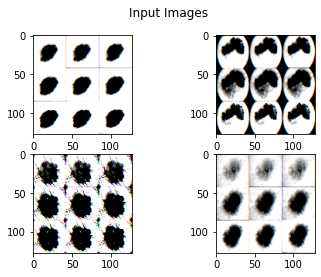

Ground Truth


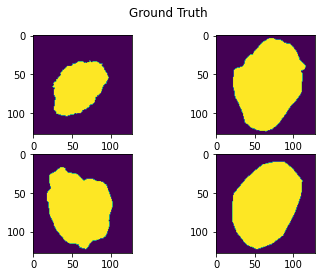

Prediction


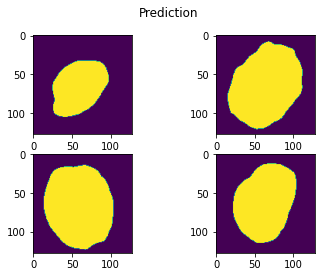

Metrics for MFSNet Model : 
Accuracy: 0.95328
F1: 0.83963
Jaccard: 0.74453
Recall: 0.91641
Precision: 0.96527
IOU: 0.74453


In [59]:
from skimage import img_as_ubyte
import matplotlib.pyplot as plt

model = MFSNet()

model_save_path = "/content/Snapshots/mfsnet/MFSNet.pth"

model.load_state_dict(torch.load(model_save_path))
model.eval()
testsize = 128

class test_dataset:
    def __init__(self, testsize):
        self.testsize = testsize
        self.images = test_x #[image_root + f for f in os.listdir(image_root) if f.endswith('.jpg') or f.endswith('.png')]
        self.gts = test_y#[gt_root + f for f in os.listdir(gt_root) if f.endswith('.tif') or f.endswith('.png') or f.endswith('.PNG')]
        self.images = sorted(self.images)
        self.gts = sorted(self.gts)
        self.transform = transforms.Compose([
            transforms.Resize((self.testsize, self.testsize)),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406],
                                 [0.229, 0.224, 0.225])])
        self.gt_transform = transforms.Compose([
            transforms.Resize((self.testsize, self.testsize)),
            transforms.ToTensor()]
            )
        self.size = len(self.images)
        self.index = 0

    def load_data(self):
        image = self.rgb_loader(self.images[self.index])
        image = self.transform(image).unsqueeze(0)
        gt = self.binary_loader(self.gts[self.index])
        gt = self.gt_transform(gt).unsqueeze(0)
        name = self.images[self.index].split('/')[-1]
        if name.endswith('.jpg'):
            name = name.split('.jpg')[0] + '.png'
        self.index += 1
        return image, gt, name

    def rgb_loader(self, path):
        with open(path, 'rb') as f:
            img = Image.open(f)
            return img.convert('RGB')

    def binary_loader(self, path):
        with open(path, 'rb') as f:
            img = Image.open(f)
            return img.convert('L')

test_loader = test_dataset(testsize)

sample_preds= []
gts = []
sample_inputs = []


for i in range(4):
        image, gt, name = test_loader.load_data()
        print(name)

        image = image

        lateral_map_5, lateral_map_4, lateral_map_3, lateral_map_2 = model(image)
        

        res = lateral_map_2
        
        res = res.sigmoid().data.cpu().numpy().squeeze()
        inv_map=lateral_map_4.max()-lateral_map_4
        inv_map=inv_map.sigmoid().data.cpu().numpy().squeeze()
        lateral_map_4=lateral_map_4.sigmoid().data.cpu().numpy().squeeze()
        lateral_map_3=lateral_map_3.data.cpu().numpy().squeeze()
        lateral_map_5=lateral_map_5.data.cpu().numpy().squeeze()
        res = (res - res.min()) / (res.max() - res.min() + 1e-8)
        y_pred = np.asarray(res > 0.5, np.int32)
        y = np.asarray(gt.numpy(), np.int32)
        sample_preds.append(y_pred)
        sample_inputs.append(image)
        gts.append(y)

print("Images")

fig=plt.figure()
for i in range(1,5):
  ax=fig.add_subplot(2,2,i)        
  #ax.imshow(Image.open((images[i-1])))
  ax.imshow(sample_inputs[i-1][0].reshape(testsize, testsize, 3))
  #ax.set_aspect('equal')

fig.suptitle('Input Images') # or plt.suptitle('Main title')
plt.show()

print("Ground Truth")
fig=plt.figure()
for i in range(1,5):
  ax=fig.add_subplot(2,2,i)        
  ax.imshow(gts[i-1][0].reshape(testsize, testsize))
  #ax.set_aspect('equal')

fig.suptitle('Ground Truth') # or plt.suptitle('Main title')
plt.show()


print("Prediction")
fig=plt.figure()
for i in range(1,5):
  ax=fig.add_subplot(2,2,i)        
  #ax.imshow(pred_masks[i-1])
  ax.imshow(sample_preds[i-1].reshape(testsize, testsize))
  #ax.set_aspect('equal')

fig.suptitle('Prediction') # or plt.suptitle('Main title')
plt.show()


test_loader = test_dataset(testsize)
SCORE = []
for i in range(test_loader.size):
        image, gt, name = test_loader.load_data()

        image = image

        lateral_map_5, lateral_map_4, lateral_map_3, lateral_map_2 = model(image)
        

        res = lateral_map_2
        
        res = res.sigmoid().data.cpu().numpy().squeeze()
        inv_map=lateral_map_4.max()-lateral_map_4
        inv_map=inv_map.sigmoid().data.cpu().numpy().squeeze()
        lateral_map_4=lateral_map_4.sigmoid().data.cpu().numpy().squeeze()
        lateral_map_3=lateral_map_3.data.cpu().numpy().squeeze()
        lateral_map_5=lateral_map_5.data.cpu().numpy().squeeze()
        res = (res - res.min()) / (res.max() - res.min() + 1e-8)
        y_pred = np.asarray(res.flatten() > 0.5, np.int32)
        y = np.asarray(gt.flatten().numpy(), np.int32)
        
        
        

        acc_value = accuracy_score(y, y_pred)
        f1_value = f1_score(y, y_pred, labels=[0, 1], average="binary")
        jac_value = jaccard_score(y, y_pred, labels=[0, 1], average="binary")
        recall_value = recall_score(y, y_pred, labels=[0, 1], average="binary")
        # precision_value = precision_score(y, y_pred, labels=[0, 1], average="binary")
        precision_value = precision_score(y, y_pred, labels=np.unique(y_pred), average='weighted')
        iou_value = iou(y, y_pred)
        SCORE.append([name, acc_value, f1_value, jac_value, recall_value, precision_value, iou_value])

""" mean metrics values """
score = [s[1:] for s in SCORE]
score = np.mean(score, axis=0)
print(f"Metrics for MFSNet Model : ")
print(f"Accuracy: {score[0]:0.5f}")
print(f"F1: {score[1]:0.5f}")
print(f"Jaccard: {score[2]:0.5f}")
print(f"Recall: {score[3]:0.5f}")
print(f"Precision: {score[4]:0.5f}")
print(f"IOU: {score[5]:0.5f}")
        

**Conclusions & Reccomendations :**

##### To Be Filled by Team 

**Evaluation Metrics :** 
 
We adopt five performance indicators to evaluate the
obtained segmentation results, including the Jaccard index
(JAC), Dice coefficient (DIC), accuracy (ACC), sensitivity
(SEN) and specificity (SPE). JAC is used to measure the
similarity between data samples, which is proportional to the
segmentation accuracy. 

The larger the JAC value, the higher the
segmentation accuracy. DIC is usually used to evaluate the
segmentation accuracy of the network. The higher the DIC
value, the smaller the difference between the data, and the
more accurate the segmentation. ACC, SEN and SPE are
common statistical measures for evaluating binary
classification performance.


UNet++ model's performance score is significantly higher than the benchmark score and also superseeds the Unet score.<br>

Jaccard, F1, Recall and IOU are performing better as compared to UNet and benchmark scores.<BR>

There can be a possiblility of doing an ensemble between UNet and UNet++ to see if we get an improvement on the same.
<BR>

Attention UNet model performance is at par with the benchmark scores.

**Benchmarking of Models**

**Comparison on ISIC-2018 Dataset**

The below table shows quantitative results on ISIC-2018 dataset for the lesion boundary segmentation task




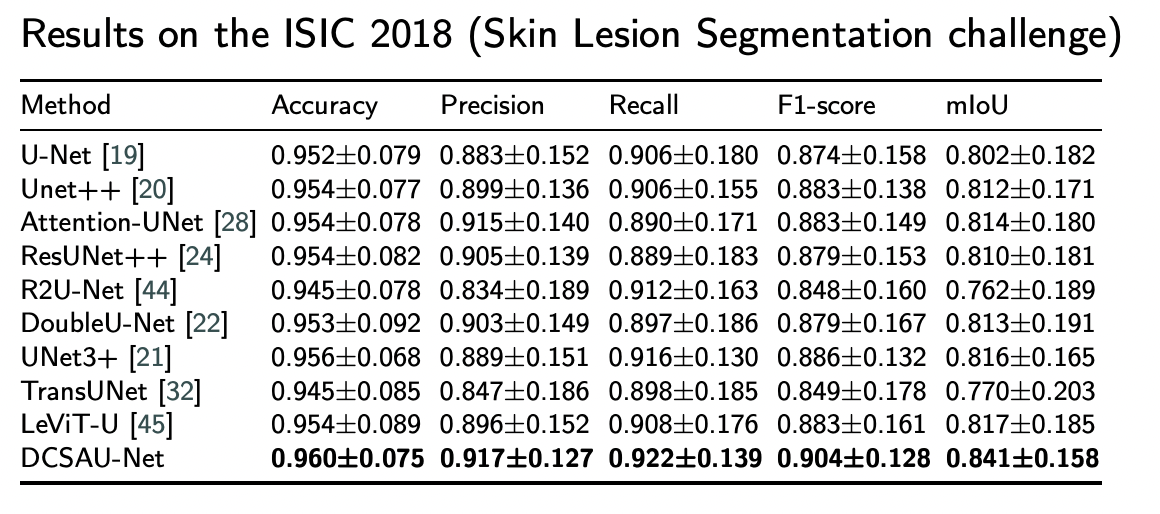

According to the Table, DCSAU-Net has an increase of 2.4% over LeViT-UNet in
this metric, and 1.8% over UNet3+ in F1-score. Within the
rest of metrics, our model achieves a recall of 0.922 and an
accuracy of 0.960, which is better than other baseline methods. Also, a high recall score is more favourable in clinic
applications 

References: https://arxiv.org/pdf/2202.00972v2.pdf

Since we will not be implementing all models, we will focus on UNet, UNet++, Attention UNet, SegNet and ensemble models.

We will benchmark the models using Dice Coeffecient, Recall and Jaccard scores.

#UNet Performance Score (30 Epochs)
---

1. F1:0.87060
2. Jaccard Score: 0.79926
3. Recall: 0.86819
4. Precision: 0.91687
5. Accuracy: 0.94842


#UNet++ Performance Score (30 Epochs)


---



1. Accuracy: 0.95777
2. F1: 0.88679
3. Jaccard: 0.81395
4. Recall: 0.91988
5. Precision: 0.88463
6. IOU: 0.81395



#Attention UNet Performance Score (30 Epochs)


---


1. Accuracy: 0.93106
2. F1: 0.80313
3. Jaccard: 0.70283
4. Recall: 0.90460
5. Precision: 0.77702
6. IOU: 0.78421 (35 Epochs Only)





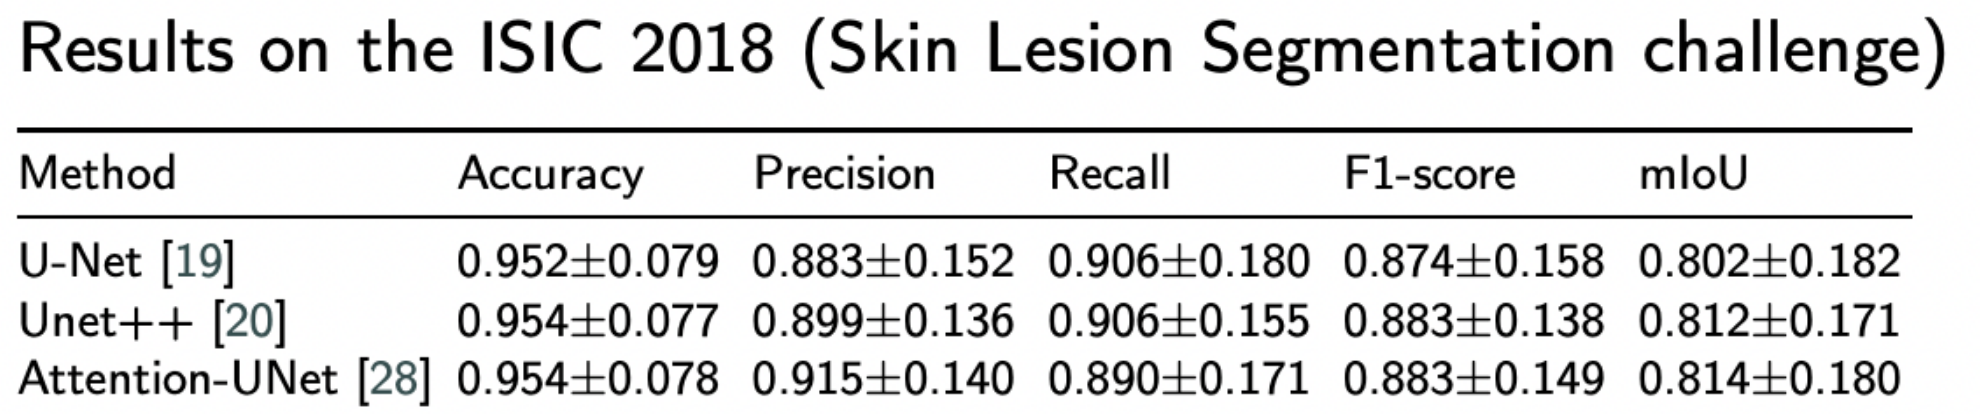

###### Research Latest Advancements on Segmentation Approaches and put forward recommendations - Ask from professor 

**De Nada !!**